# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

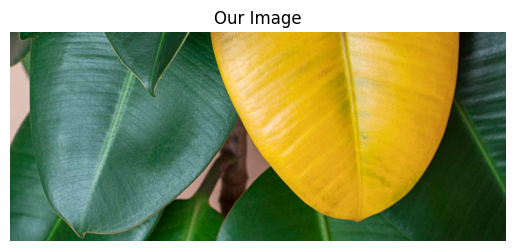

In [236]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [237]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [238]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = '''/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gOTUK/9sAQwACAQEBAQECAQEBAgICAgIEAwICAgIFBAQDBAYFBgYGBQYGBgcJCAYHCQcGBggLCAkKCgoKCgYICwwLCgwJCgoK/9sAQwECAgICAgIFAwMFCgcGBwoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoK/8AAEQgCWAMgAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A+ShB8uFQ9e1LHbKGD7efyq0YGx0/ClWHI3bep6V/oldH8SuqysIFLcjqakEIPBzxVhYe/p2Pen/Zyx2kY9QTVIh1dCqIBjGwnpTvIyM7OAepqysBJyeT3AFSCA5y3etItke11Kaw9toz3pWhHXtmrht++zHPGKXyMj+VXexPtSmYAG4B46Cl8jkOVP4CrYiJODnJpfLx2/8Ar0nJ3J9rYqrbqedvJ9e9KINw5Gcd8VZMTZyeKcIzjAWiM9BOp1Ky2yg7sDkUCH5srjHrVoQ4XGO+aUQ8+w9apT1JdS5WEADZA+tKsGexyfT1qz5AHJpywuOShHoKvmJ9oVhFjII6/pSiAccDnpVoQYHzDpzS+SQ3XindE8+pUWEKclTilWIYPPXtVwwggnHHvSrAoxkcdzmi4nNlXyVxyCPXNAhJJGOT71aEAAJNHkAjoD0p3FzlcQ7uoIzR5WecZGeasiIkgjgfSnCHjaFyc0XF7QrCDaOFzxzSGDb91AatLFg8n68UqxZG4j8AKLi59SskGOox+FKIgPlZe/XFWBEScAdulL5fIBz15Bp3ewc9nYr+TvXBX8cULAoA2jI+lWBCWIGM+uPXtS+SckFe/ShOysL2hB5PXt9O1IIQeKtLC3BJxjjr+lKYR1BJOeafMS5lYQg5I/lR5Kj8Oh9qsCLPbv8AnS+Tjgr17UlJi5ysYNvIGMjqBSpApYHbwByastAW5wPp6ULDg8L9c0nIXOkVzAqknGPp6UCJf4Rg1Z8kjIwPxoEIJyTxT5tROpYr+SOyY9RR5Qz8ozx6VZEQIzgj0o8oj5ew70OQc5X8oA8rigQ7hn2q0IScA9D+dHk4GAM4PPFF9Be0sVfJIBODz0zTng4wAPripxEoPPHHGT1qOa4RGKKh68GjmbDmb2I/IDEEKPU5pfJUfKP0qWFmlI4HbpUrQAMcJn8OKXMJza3KvklgMAdeeKa0C7uRyPUVcFszDd5fy9yBToLCadgsETSHB4AJpSqRS1YKpqUDFnjb7U7ygACWHFWWtmjcq4I5wVI6UNACCQD+Jp3B1SrsBb+uKXyuMHn8KseQTyTnI4/KkEb9SPqDRcfOQeWSCS2T9KQRAHmrKwqRngY6CkMY6jkgdMU+bQSmyuIQe2R9KQRArtwBzirHl7f6AUNFjHp2oTHzlcxADDLnjk0nl/wY+oNWTGBwF5pPKP1x7U+ZgplbyRnDKTx3pDDj5WOeeasmLjHU9uaQwgcZ79BSvfcvnRWMODvyfqBTGh5yO/tVsw9cdB60jREcdc/pTuNTKph3Ekpn2ppjAHA4+lWync9BTHj7Z78UlIrnuVTF83Tr6cUhhG7AIz9KteXzx275oEW4jdilcamVTAACMd8fWmmI54H+e1W/K4yf1oMWWBxyKd2Pn6lNYtp6ZOKBFlMqM4HPtVkwhfmUfU0jQkH5Tx9KGyucrCAA5HX3pGi4xjH1HWrPlEJwM9qBFj5cUJsamVjF3Mf6Unllu3f86tNAQuPTpTDH/Ecj6UgUysUXqOOelI0QwO+e5NWjGfTGOTTWhIBJHTt607or2jKpgxngY7CkMZHOOattE3Xd3pjQ5G1h269qVy1UsVWhAG0DqOMUhix1Ht06Va8ogYx+GKXyycHHX09aV9ClUKhj2sBj6UGHkH075q0sTA8jHtTWQckKPrmncPasrNCF6r9OaYIjz8vFXPLxwcH8KY0RzgDB9h+tF2WqhVEGGGQQDzTWhxxj9KtiI5Kn8xTWgyvI4HfPWle5SqalQp82309fSjyefl7D1zVoxDBPHTrTSgC5X9RSuX7QreWAMj+XagR54PJNTtHnn17HtSeUwOfTjntQ3oUpkDR5A4pCqn5s/Sp3iPXGaUxyHHydT+dDY+axXZACc5xigxAH5QPpUzRNtz146GhY88E9falcakVxGMYA4NJ5GcY7e3WrAi4Ax35oEZY5DZp3Gp2KxhAGcc56etAiU8lRweOKtGHPPGcdcUzZ823dgfSp1uUqmhWZDkHHf86a0YHGOc9hVry8jHTA7U14TjI6/wA6GxqbNVYCe360ogOeQff3q8LZSMbcg0q2yg8Dt2FcSv1PH9sUhBjGM9KctucYxg+1XRbY79RjpTjbEHBGfqKpEe2TKn2cAdfYCnC3I/hxnqDVsQY+UoRjinC2wQdufwNXFkOrcqeTwQq5A65NAgY/K3GB61c+zsARt47cCmvbAxlVBp8yF7QpKq88/UCnCEY+6OnQVKtuvZSSR096mW3JUDaen+eKV7jdRLcqrCc5UH160og5yR05zirnkbCDj9KUQBedvY0J6EurcppESeM/SnGEZwe4/OrYhwcdRml8gsRx8vemm9yfaalQQYPT36U5I8jAAxVoW4JyV6daVYTtO1cA00xOpoVvKXqQfyxSiIEjnr696tCAKAOmO4HelNuDxt9+BWnM2iXUKnkYXcVx6ZpUh6Y4/lVvyRjPf+VL5HBA6/pVJ2F7UqCED5Rn8aPI5xt61cECjoPwoMWDyPxouT7UqLbscLSi3IXKjnH61aWJupHbv1pTCpOcZHfAp82ge16FZbYE8UqW5I+ZCeOBVkQhTgnA96XylxtA/Aii4vaXKxgX5mwOnWmCAbQdhP1q6Ixnp6Yoe3JJIGD79qLqwe1sykkZzuJqQQ4BDLU/kEn7uATkU8Ww6Z6dMHrRzCdTUrCEAZ5/pS+QCACDnvVkxNyR+PHagRchdv05oUtSXUK/kZGMflQY8qMj6VaEIDcqSD6nvR5BHHoOaLk+01Kqw4IwenOfSnCFTnA9jVgW5Azjp2FAhIbAAH4UJg6hW8sHjH1x3pdnYj86siEg4J6DjigQ99vbii6D2lir5HJ447il8rHXORVnyQRgr9aQQ44GDngcU7p6C5yuUGMHGOmPWl8snnFWPI4+YHkUv2ck4ft3NK6F7QpywMQcA9PSqzWrudqg/THWtVoMgjb1HAzR5ODnb260cyLjXcUU7G0ZcecOc9PateLTkaQQOIyDHkEHpVQJjoD170paQ8AnGPTpXJiaVSo/dlYn2l5XY6ONtpEcu0qOVPepotQazuUvbQeTKhydhwG/CoBC2fU+nrSixuZIWmjQkKuXwc4HHP61g6FN/G9xQnKL93RjNTujqVw928SiSVyzNt7mq+0JkEfWpfK5LAfjQIjjle1d1OMacFFbDc3J3ZXaPIyOKNhGT+HJqcoWPGevJNBjwCCOvXj6VfMPmaIBGpboOnBpDGM4ABPpU/l8H5entQEJ7fWnzBz6EAjwfm/A4ppT+79BkVO6ZPHQj0o8vJ5FJSsVzEIQMcAdumOKaISSRxgetThT02n8KXyznIGaabsHOiAQn1JyOtIYiTkHGOlWNmeSD/hSNEBkbe9O4c/crtDkEE8jrTfJ6gt+lWShBwecnrihl46849O1HMVzlU27fxHmmmPaCAc/WrTRZ498mkaIHpwKLplKZUMS5B9OKasYJKgD2FWyhyeB+VN8gZIAovqXzqxW8vHOR170FAR3qw0WTwDz2ApAnzbSPpSTYc5X8v0HX3pPLJHIJ/CrIhXcFI49KQxKQNq4x7U72Hz6lbygTwPfrQYcHjJz0qwYRg4X8MUhTb95D+Pei5SmV/KOOPfPtSNGTz+PJqwYwQQB60NF0OPwougUysYyWOQc/WmlOenfoKseX8xyPzoMY7DjvxRfuXz2Kxhxkk9+eKaYCSTtHuatGMHjA46ZpDFx26dSOlA1UKvk8k7eOuKQwuV/zk1baJvTPPFMaJiBtXt0FA1Mqui8ZPSgoCeTkk9u9WBHhsgZGOuKQx44bPT0pXsVzoq+XyVIxjrxR5SknHf3qz5WGwRjsDSGEZI46fnSvqVzoqeWNu3pxSsg5JA59qsNFnhunoaRkwcBR780+axSmiq0eOFX8CaR4sg7v1qx5Z24A4HpSeVnAx170rlqdiusYJC889aTyTjjjnjBqx5Z6Ac9hmlMJ7Dp7UJ2K9pqVjHhcHIB9qTZuOe5681MYxnOOM96d5fzdwPelfuP2hW8twMflik8tSOW/WrAiLN8o59hSeWM5Axx+FIpTK7Rgj5V4J5pBGAMZx9asmMNywz/AFppQk8fj70FKZWMYAwD9MCkZHBA9B2qwY+AePyppj56Y9FxSuXzIg8rGQeMn0pCCRy3IPrU/lhx6DNJ5ZCjIz6E80ubSzGpnTLbEHLeveljtmx933HvV0W554p4tGGFA+ornbXU+bdYoLbnGc8+lK0IGfY9RV97Qbs84HHFNa1GcdKeiRPtimIjnJPTGKf5JxgdqspbY+/9MetONsSMlRx0x9aObUXtV0KgiBbPPHSlFscZzxV0W3IypOfQU4W54bbkeuKOZbEur5mebZc7tv6dKd9mOQMdPSrxtB0Kn2FKLUZycfzpth7Yo+STgEcDpmgQcZwPbmr4tueBkelKLUY+Veo7CkpB7YzxBs5x79aBDtOCeCe1X/s2SMrn6Cj7IMAgdsgCmmL21mUlgY5O3p1z3pFgYtgqPpV8W+B0x6YFKIOMFec9zT5tSfbFP7OQ+wDPpSrBn5Sv0x6VcEWFKnmnfZyOq/QAUKdg9qUlhOMFQcjsetPWDK5PJ46VaFupGdpA9SKett0yO3QGjnZLqtFDyBn7vOOlH2Ykcdj0q8bds5x+ApRbEMW2gYFHOx+1tsURbE8ng+tOED4yB9au/Z24x+HFC265p87J9sUhAf7px/Kl+zgcr3xx/nrV77PtI+XqeaBaMxwR+fpSU2DqlIW4zgAH8elKLdhg7P8A61XhaHOdn6UC1UKB375p8/Yn2rKP2bggjNH2XcMZ/Kr7WxABXr+lAtiRggcDj8aFUF7WxRa37KD1oEPy5C5A96v/AGUkYKrk8YpPszBhgDHXNJ1B+0RSFvkgY+lL5BA46mrotck8fpQLYk4Ao9oxe0RT+z4GQv4mk+zErnJNXfswI2oMY7Uv2cFSc+1PnZPtCiYSFye/Wl8rBxn61c8jYNvOKBbDpjJNTz6D59CmYMkY5xSNCeh9e1XRalT0znpxThbDG3BPueKPaDVTQzzCc/1xS+R69u1XxbZGMDr1x0pEtuM7R+NV7RidQpiEEE0fZ+Rx06irotiDwvHTpxR9lzgbc9uaOe4vaWKRgJ+b24pPJwME5xyQavfZxncBnj8KT7OSPXP4VPO2g9oU1RlG5fWren3a2TMHtlkR0KspOMj0p4th6ZzyBSC2bk5/OsakIVFZlQrzpy5o7lCW3Csdo4JOPmpBbgjJJwO9alpYG6IhVeSOKntvDmpXjGOC0eQqcEKtOWJhBe89iqftallGLb8jFNqRyF47GmC2cZOD78V3T/CrV4Yftd0CLdVDNIE6e1bUnwc1SGy03SrHTpkn1y/S0iv/ALK0iwM/8TADjHHWvlc446yHIsM62JrJJH2mR8BcVZ/XVLD0Gr9Xt/X6Hlf2coudvfnim+TtOAO3THFfoDffs8+CdX/Z00OTwn8NvDs1jahoNQmubYtfS3TPkl5o03BWjAIKE7WYcHivkT46fs/+N/gj4lay8R6FcRaddyu2k3zjKTx9QNw4DgEbl4Iz0wRXy3AfjHw5x5j6uBoxdGtFXjGbjecddY2erVtV07uzt9Jx54R8RcCYCljq0lWoybUpQT9yWmkr7J30fXqldX83EBbp6cUjW/GNpz7CrzQHv+B9ab9m3E9Pc1+tKVz8nVS5SMDAjAyOwzSLGPutzn0NXBB1BXB9qDAABu+mcVSmUqhU8nsCOnXFIYyRkDoeKtGHGAfx46UGMcknB78U+bQFUKjQkDIFNMRPGO/NWmiP3utJJEBg84qucpTKpjwoAH69qbtJBJ/WrJhy+UHI64pogYnjJHNLn0LVRFeRDnd19Kb5YHIGOOMCrDQ4bJHP8qFh4ztNHMPnSKzJu6ntSCI85U+5Bq35JJPWm/ZwDnJ4PFPmGqhWETDPPGPpS+XgEf5FWBGc44xjpTWjzxj86Sl3Hzld4iQCw7+vWmPCOQeh7VbKEgDb3pph68nj0oc7lKZV8orkjr70NEQQAasGMAkEex5pDGvUA4o5iucgKAjn0703ZyBtGB2qyI1wTj2ODQyEknv3+tPnQ+cr+VjnbTDEP7xwRxk1ZMXBLevGKQxqeMZ/ChyS3HzsrlMH056U0x5G7bjnrVprd1iWYwHa3Q444qOSLaNrZPpUxrQmrxdyrtblcxk/w44pGjBBwtWPLJGAD+NIycc+nrT5luxqepWeLDcgfTFIYx1xng8VYMJXABOe/FJsCnkZouXzEBQj5u568UjxBj93OPWrDRg87eM9zSeSSTxn3J6UJ6D57lXyl7jPpjmkaMcAf4VaaIgHB/SmtGQDQ5FqZWaIgbccH2pNp6gYPtVlosHj8qaE29c59cUKQKbZWMXqBkHjPegRnt6dcVYMZZT8uc4601kwxx1+lLmuXzMgWLqSM00xnJHB/oKsmMD5SMZ6ZpphOcsQPajmGplbyyemSKay44Az6j1q0ICByMYPb0phhABJ4z7UX6ItVCu0W1dw6djmm+XkAn+XBqz5RAwOeDgGk8rGVHGOoNQn3K59SuY8k8frSCMqOgGPep/KPVePU0BMHAHPpSvdlc7O4FqNuVH0FLHacYIHsRV4WhGCFzg96ctu5HIPr161y+0ufJuo0UhakduTQ1qCcDnPWr4tmGARilNoccp+NHPoT7RpmcLQHt0PT1oFqMHH8ua0RaEgKq59sUrWvOEXtyBUqelh+1djP8jbzs6dzThbEYBA69e1X/sjA42Z9hSmzfOAmecD1NJ1EHM2Zr2rD5cYz2oW1KnnI4xgCtN7PJ2kc54pVsG3gt8yn0Haq9q+4cxn/Z8kcd6UWinqMHpWj9hbOCpyfUUq2TL8xQnHtS9qkhKTb0M4W2CefpSi0JJyPzrRNkSMBuR9eKcdPb7oU59BS9tEacjM+yZbd7cnNI9qCfu8DpWolkxP3frnt2p39nkknGAOSfWm6yErsyVtMnlOMU9bXaDkAZ9a0zpx6BRj1p/9mSM3TGccgdql1kirSfQyvsueBk8c8dad9mUHIQZzWn/ZkmfkB56cU8aW7DPA46Y7+tJ10gUajexkm2bGCADR9mxzx+f+f8itb+z+MMpyMn04xSHTyAQRknkCj26sHJNMyhbYGGGOO4pFtio27PyxWu2lSgcpkH7vHf8AyaP7LYjAXv1x+n+fSksQu4/ZVL7GWlvjjbx6U4wAgYBPua0101lByvT8OaF0987lXp04p+3T6icKi3Rl/Zc8DOMcHFKLXOcDp6VqixYfeX6HsKcbEn5ducn86Xt9NCbO+qMkWoA4BBpRbNu+VT9K0zZFwfk/h4PrQtgCTgfkKHX7iV3sZgts85yD3pfsgySq44rV+wEfwbju6AdKcunPtLiMkdxij26WocsmY5tOMkD39BQLNjyV6joe9bH2BzwYwceh6037AQAW67eMdqPrCtYfLK9zKFo23JXj25oNqScgADGRgVqiwDHnv6d/0oWxdvmKZzjmksQLlkZL2wUFSOhwDQbVyAQPxPFa7abIBuKE88YHFMbT3LZOee4P6U/b3W4OMk9jLNq2MqP0pTalQML9TitUafI3Ozp1yKUWUnAMZJ6Y6UfWLdQcJNbGV9mLLgjp6im/ZMDGPbmtdtNIG7Z1GB9aYbIqu5Vz7Gmq66MTjPqjMW2AGAMHsOlL9lBPQY9a0RZFlwEPtQlgcFggwvXBo9uuorSsZvkBc8fTFKLTI+6RjtWg1kwI3DjtR9mbBO3OeQeo60nW7CSluU4bCSRtqqSQM9PatGHwyssaNOWj3KT65FEytBGqxKVOeW/Wui0OexsrSF9TlztHAPPevMxmMrRjzU1f03PoMry7D1K3LiJWsk9dtbHO6fo8dtrqRtOFjV+GPXGK9+8IeAPC93p9rdzNF9o8sAhU6+nsTXiPieHxz4/16Dwb8H/CC6hq0hEjlzsht7cMA00jngKOB754r7F/Y/8A2RfiNf6Ra3HjoZ+yKZZ5DB5UKgAHAVjuPTqcZz0FfkPiNxjQy/DxpKry1Yr3kmtL7J+b3sfuvhZwbPEVKuIdNSoSfuyaett2k+i2v3uT/D34OWOtW5udY0YLbFSFMqffHqB25HWvRIdX+H/wv8O2+hNoVo2L9GsLcQhnknx5ceE6M3PXHXn6c38cv2lPAHwo8P6je+H2m1ldJtmkkgsdnmSKvB2k4XPIIGe+fTPHfETQfEPjn4qT3fh6O4h0rRdCi1iW5W1b7T5JXzMso5VwOig5zgcZ5/nOvKea4lPMJOMWpSXNf7Nv/kl9+h/R1HlwVC2CXM00vd87/wCTPr9oPD/wc+GYstUkga9vfK+2RWEe5YInO4IioR8p27cgjPJHAr5d/bq8EeGvHPws8Q3F1qM9tBp0SavoUbuXK3AUq8LZJODHvz6Mq89a9H+GGr6f4c8D2fwe8POzX2m3D32tDUVw0xkCybgWGWhY741kKhT5XqeNpfgxf+ONKvdN8V6SI9G1aM2MdtOpkkuUKjLxkEbQg3c5G4ueRtGfzfB57XyXjjDY3DyfLQqwlzJWbinrbW1nFtWb1ufSZjk1HOOFMTg8TFXr05Rs3pzNaX0vo0nda6H5MPbYOCvA6cd6Y1uTz/Suv+J/w/vPh1461bwRendLpl9Lbs5GN2xiucehAB/Gufa1K8gj196/1FwmNo4rDwrUneMkmn3TV0/mj/MHF4evgsVPD1laUG4teadmvvM5rY7Sw6mmm2XPzDOOPwrRMB+/gdPWm/ZiexPPGK6edM5+Yz2gKnLDnOP50zySehP9a0GtyVztzz0pDanPK9O9Upx3Hzu9ihJbuuTg4Uc1G8G0ggZwOo7VotbbRgjp2pn2fb2B7cDrVc+g1UZnG2OPuAjNILYE5H8q0Xt+2PzFR/Zm67s8elS5tFqqUTb5z3z2oMO4YxV425GMqAM80fZWA7dMYxTUx+01KBg4AP0zTREV+XHH0q/9nAPTt6U1rdiDheSOtHPqUqnQpeUM5IpDbDnKZ49aurbHOMHr0oa2IB746Gm6moc5nmAjIKjHpQ1uuCuASBx2re8JeF5PGHi/SvBtpdJDc6xfw2doXhkcGWR1RQfLViBlhycAdSRXS/Hz4CeIv2fpbabxPdxS2d1BPLFdxghCsLsrNnupChgc4w31r56vxZw/h87jlFTERWJlFyUOtkrt320Wtr3tqfSUOGOIsRkUs5p4eTw0ZKLnpa7fKtL3eul0rX0uedPDhTgHOOCaY0BOFOeeuRXvnh7wH8Cvg58PbnxJ+0pI0l4upvL4cttNVhLrEDQw5j+cGMLHvDFm28ueWwAffPGP/BPf4Xaf8NPBHinXbOPTL2UI2vW0F8WkvUeHaqL91WlDFX+RVBw2c/xfmOK8fOEMFLnqU6vsW5JVOVWlyN3cU5JtPTW27Sdmnb9TwvgNxdiocsK1H21ot0+aTceZJ2k1FpNa6Xe107NX+BmhCtjj8KQwgcAVv+NfCl34O8W6l4VvlIl0+9kt3J7lGIz+PX8RWY0BTkdB6V+14bFUsVQjWpO8ZJNPo01dP7j8Urwq4SvOjVVpRbTXZp2a+TKRiPGeg9KY1uMZOR61daAkjoPfNI0BH1x3raXLNWZmqrQkuoyS2K2ElupVRwQOc881TaMsOFz9RVw22c/J+dNaAgDHryCa5sPhqeFb5Nn0NqmKqVmnN3a0KZtw0mxR83QAUsltKr+Q0R3HsOtWGgYOHRsY5BFSQy3cNwL3CFgcjctc+IljY1H7OKcbfibUZ4aUf3jad/XTr8yK30DU7jhbRgSM/McVUeIj5WGCDXQHxVdtG6yWqhyMBkOMcVjPDNJIZGYEk5bj3rmwFfM3UaxMLLpbU7scsspwh9VqOTd73VvQrtCMEgexFII/lyV/E1ZMRYAZ6H/PNJ5Z68/jXtJnm+0K5QFunJHOaaYiVIUdR0qz5W7nGfxpHRu5wPeq5ilUK/kncGGM9aY8XBOc56EVZMZ5GM+tIYzjAGcCk32GqhVMe07Sv4mkMQAyRj1zmrPlk4ymPrRswTjn6UXVjT2hVMO45x+R60nlKRggH6VZMZc4PTHemmEg8j9etLUaqFcxkn5T09qayEk1ZaE4xjvR5ecggcdqPUpT0Kvl4GF446U3ytx+vqetWShAxtJ9welN2cElvpx2pXKUysYRjjPYDmkMQHy7B161YKZOBgcYzTTGScA57daVzRSPVV0gbQAuT7dzUh0N8nKn3FdPDph24VSD39qlTSDjOD0r5v66T/ZMV0OWGhMVGFGeuac+iPypB6ce1dUNHGeE6Y7dacmklT9zkZ6nt/n+dH1zzD+x4X2OVXQmPy7QeO4709dDHQoAOBjpn+tdWNHRkDBe+Rij+yRkgqM8nFS8aVHKkt0cu2hFWBCZ56AClj0HJ+YAHscV1K6YrsFb+XNSDTSckoMev4VH1x2LjlcDkv8AhHyp2sCcH6/jTzovnHITtg46V3MWgLd2qlFUvgngAnvVN9DMD7dp4HQis45hzysb1Ml9nZpaM5JdEwfnj+bPNL/YJTAOMd+OtdX/AGUCcbMc9SaQaTht23jtg4q/rje5h/ZMEtEcuNDYgKqZOBgDtQNEYLtK/U44rq10tCAvlng9fypx0rKn5R1zyaTxbRSyuHU5VNCJ+Rk993rS/wBhZIwpPoCOPfpXUx6PkZC4zzkACn/2R82NvGRxj9Kn65bqaRymMlscvHoo2kFcew607+xdmA8Yx2x/niuoGk4w3lA9Dg0v9lAgYjx65FS8WzWOWRtscwdHJO5l9sHg4xilTQwBkpz0IzxjNdONKwmGQHjFPGmBs4z34/lU/WpWNFlsFq0cymhxqnzqD7Y5qN9EBkIEfAOMj8a6kaWxOBHjnnHel/sshiSmc/ewan61Iv8As6El8Jy50RSoDxA55IOMfpSnSiOqcn9fY11DaYuOM9BgGozph3Y2DgcU1imU8tjbRHM/2OwHIAycZVaF0UYO2L8xjn/GunXT+Mbckc49/aj+y8fcRTn07/pR9bd7XIeWRtexzB0QOeQAB68YoTRARjaCe/FdTHpJYZ2HOMcDpT00oKQTFknqD2FH1yXRmTyqG7RykehgZ38jtxz+dPGgnaSFBzntXTjTME5XHv7/AORT49Lx1QAduOn/ANek8ZLuSspiuhyw0VCTiL5fT1H+c04aKBlShyO+O/euqbRiyZMeARTTo43HCYC9aPrt1uH9lpfZOYfRgFGUPt/LFJ/Ymc7oyQDwMV1X9lYG8R8Y67fWj+ygoCkZwTzjpzS+vaB/ZUeqOT/sMbl3KcdiFoGht97YQFA5xXWDSht3CHOQeOtNGkMg3eVk45zxR9d6IP7KjvY5R9GDLtK8AcnuOP8A69I2hegJHfA6fl2rqzpZCDYOpHFNGnKWwoyBxu/SqWNu9GTLLEmro5ltIUoV2nk+lIukLtzjkdP1rpP7NYyFgMnBzz/n1pTpDFc7eO4qvravqyXgE9kcy+kjOCOnXNQjQmecKufmYc49/T1rqTpjAg+Xj3xx/wDXpqaW8TKwUZHU5p/W0rtMzllyla6MWTwRdl1hihaR34VQuck96nh+FfixozKdHdsNgqqgla9D8HXdvHc/atQCq0ZwpIAJzzXoumS2NyhksfLG5Mtzwx6V8Tn3GGY5RUUYU1bu+vofpPDvh9ked0nOdSV+0enrc+abzwpc2wxdwsrZIKnqD/Sn2PhV0gN7cxqYwABnqTXf/GTwvOvixPEFjIiWpixJEmAC3TkVyUenyhyXYNk5+9nA9q+lyrOHm2XQrxdr7rs+qPj884bo5Dm88PKPNb4Xpqujf+RjX+kRs2IoyynOMH7pFcd8YviFc/CLQrDWp/DM+pG4u1RLZMruRfmk5AP8IK8AnLA4NezfCLRvAPj/AOJdv4D1H4kadpl1bTPc6xFPE7NZ2EMBnlu2yuwoAETaWBJlBAwGI+cf+ChH7UfjrxJ4qm+CfwS+JUvinwvo+pJcweIrLdHDlVaP5YuFtwFODkA/Jxkc18bnXHkoZv8A2Nl1GVSVn7SonZUtbW296T10TVt76O32GReH1Otln9t5nWVON06dN6urpe++kNr3Tvtba/r/AMIP+ClVv8KvCesy+HP2ZLKKfU9Q83SZ01GZmTCrhAsqt5jbV5cEYyeOFFei/Gz/AILFz6z+yTa+G/h34C1Hw/4j1G+Ft4k06XUFZzZgAs6zKgP70tsYcEKrAZDA18BaL8atT1dE/wCEl1e2knjtljiFu5lYHADklR8p4Bb3z0r0f4G/Bu5+NS3vjfxpr9z4U8BabbTPceLp9LkkhmuEDE2ytjaHYAYLsFye5Ir5PNuGOC8Hh1mmPk1yyUvibbeyTTbctbWXf5n22V8Tca5jinlmAjdONvhSjGPVppJJJdduljW+EnwP/a6/az8Wr4q8O+MbzRLXzJx4dbVboxxXssUUzlLeLlN6o0n75lBQvnducZ/Y79jO48QaX8JprL4x6M8Xipp7i3l1ZFE4vobdpNn72NdhYKHYKMcHgda+W/8AgnN4n8Q+IbiHx9oGhy2/w48O+FNuk6Be2oE0t3cRpPc3MCFSVhLBVUsQXADbVVyK+ytc+OOj6fY2nhrU1Qi+dJIdQSdAiRptZiy53En5wAoP3edua/nDjjiKGbZj7SShBQukkldX+zKXV6K/aV10P6D4WyR5Rlyox5pylZuTb1a+0l0T6aXcbPzPIfiB4r8Jw+P/AA7450+zuJNQ1DSLuyklCKqyAXHm+TKnEi7flZcHkhhjJzXvC67faL8OlvtS2SR3kYW1iSTAt42BKsW/vYJFcV8c/CGlrcy+FvBV7f6bcNEmo3F3aPCsRB/d7pd43Pkg5C9MZwcfLU0PR/id4gu4303Go6UI0gnezYgRMqLtTaRwBuJLjg98dD+Z4mviqOLk2m5NWVtba/e1+R9rThh6+Hgk0knrd/0l+p8Q/t/+B30/4xx+JYtOEMesaZHKQqgAyRkxN0GAcIpPTk14M2mSBSyx98n2HpX6G/tbfA64+IXw7vYbzTmg1nw9A19arIQryrld6kAnJKDIx/zzX1Gfh1tEdiV8rkHj5ec+lf3z4I8YU894Dw9GTftsMvZTT3934X842+aa6H8I+NnBlTKOOK+Jgv3WJ/eRa2u/iXqpa+jRx8lgwBJjI7n1PtSGxkXoDgn0/rXVPoJUhduCc9etQSaIWU7QcAdMV+xxxiZ+Mzy6qlscw1n8+2ND/WmPZsJOf5V1B0g7cKoz2x1NRzaKWGNmMngVpHFpOxk8vq2ucwtkD8wHUHgHpTGs3xjbg+9dKNCPVowRkZJru/gx+zvq3xX8Z+H/AA80kVpaa9rr6ZFdyTKCJkga4kXbnOREpbpz0GScVx5ln2X5PhJ4nF1FCEU22/JX07vR2S1fQ7sq4czbOsZHC4Om5zk0kl5tK77LXVvRdTx0WJZc47855r1T9ib4R/Dv48/Fu78L+MpJ7uwsFa3uLTTJs3H2hreScNtUMwREjJJwQWdF+8wBxv8Agob8Nbb9nD4un4PfCzWLiRrK2inu9RvbRS8rSIGCKDldoBBzjJJxnA58D/Za+M3iH9k/41T/ABk1PxI1td6fq9tdSRfYVmXVnkkk3RO3yusZhaYuyfQKxKrX5pxjxnic14Q9tklWVKVVJxm1aVtLJW1Tk7JdbX9T9b4I8PqeV8XOnnlONaNK6cFrHmtvK6Saite17ej+ov2kv2OvGnwZ1DUfFPh6yk1LwWmpPb6brfmIzEBmXEij5kYFGU5A5HuK8cksWBwRg5r9m9I+HXgL9ov4SjxRb20NtZeLdJEha1yyS2lyiSN8pI+c9Q5UMpOccV82ftJ/8E1vDMvhyxb4ZaRDo2sR2vl20AmYxajIkefJJLMBM2GIYFVbgbQckfEcCePlCrQpYLiOPJVbUfape41ZJSqJu8W3vZW1voj6njrwErRr1cbw5K9Ozl7KT9697tU2lZpLZN30tqfnm9rsJ2jp1FMa3PvjPFdhr/gPW/Dmrz6D4g0qazu7eVkntp4ikiMCQQQRkHjpWDp3jP4faJ8QbDwjrN5bXF9dX4sorF5gqpdSwSPbiU4O1C4QE4P3ucDmv6BzPiDBZVlNTH1HzQhFy0tqkr6dNfW3yP5+yjhvNM3zmlltOPLOclH3r2jd2vLrZdevTc1/AnwS+IPxG0i/8ReGdAmm03Stv9pXoXKQbgdoIHJJIwMDk4Fe6fCj/gnb471Lw5qWpfEC7ttHjv44YdKvr1A9u6vI6pIkiqdjF0jJBwdjgcEla+o/2EP2cdD+HcfiTX7/AMV2AbxRa2EuqeFLSVJbezKW7RZYksSHIlPRVJ3cE9PpHTdN8MaFpp8L2WnW1zEsB8vTAqiR1UYKgMdpAXaNvGPxr+QONfG/ifO8RKjlk1RoKUZRaV5+61Jczu005LVL3WlbVN3/ALF4N8EuFuH6EauYReIxDjOMuZ+5aacXyxsmmovRu8k3dNO1vlrwd+x14N/Z9+Dui6P4c8YWlv4i1XXraG/8QXbbXuklkCyQxqvKjy87VBJG0ktySOq/ao+Dn7OnhD9nC48YfHP4aw6mYwkUljHcMftN1JIRuRsgp5m5mc8cZ4JAq5/wUT8V3nhfwPpGu+FfCjXeq2F2+o27LbfvbRECCWRAflZgkmSCGBCsMZxir8ah4I+OP7Hmp3N1FqY0t4ZbmynjiM8ttJbLJKjunZW2tEWBKguB2r8m/tGpjM8oY3H15TqTk3OSk+fVpSemqunbdaaWsfrdPAU8FlDwmBoxhThFKMeX3Lq7Sts7PXbz3Pzr0XwtJ8dfjh4U+Dlh4fsbfQotQafT9Mustb2ll5qvNErvl5GIREG49cHjnP11+3v8d7n4cfHD4c+CfDFpay6T4q0+fS7201JhFb2PlHCSQBl+SUq7A7s8CPb7+bfs2fsxeGL74h2Xxgtvic8LWkdk0mgNYC5gvo3YqmCSTbzRum4lVLKuTghjnd/4KM/DvxP8VL7wF4t1LwrdRwaB4jvLaLV1Xy5BOfLKNuxjYdodTncTuXgkk9/Euc4LMM7jg2l9WpwnGKXdxk+b15rPzfqRkuV4nC4N4hSbrzlFt+jWn3X22T+758/bL8EaP4f+KUXifw7qVnc6f4k0uLULZbJiywEZheMksTuDRHPPGfavITAcE9cHtXqjfC/4jp+z3pj+MdC1OTV4Nd1K/bzbNhts5rhk4OB8qmKPtxvPQ5FeeNZup2NGQRwQw5r+2PB7PqeccA4Rc6lOinRl60nyr74qL87n8NeM2SVsh8QcW3BxhWarRvfX2i5pfdNyXkZpt8n7vXrimm2IHC/gK0ltWdvLVCSTgADqfSi50+e0lMFzbvE44KSIVI/A9K/T1VV7XPy1Tm1zJaGYYM4Y9AOtNaDjBHWr7QKDkjHPFIYA3I4FWpqwKqUPIHdeOxpjQHAO3jNaBgAGBzntTDbAZ5quctVdSi8C9dv6Ux4MDOOnrV97cMckYNMeHuVI9vejmiWqpSEGRlx9KRoTkDHHerxhxzj8qY8LdTk56CjnQ/aFJocnaG/KmPE33tv1FX/KDdRj1JprwblJ6c84FNTVtS1V1M/yiT047CgQHA3d/Srpt1HQdqa1vgnK5x+tPnTLVUpGPJP04ppRRwfXBzV424KnByO4NNNsR8rEc0cyKVVFIxkk9DS+WMZIPPtVsWxOQMe/FM8jAB25o5luUqhVaI5P+FM8sj5j19auND8uQBTPI9h+FLm0LjUViqyZ55znqDUbwnjp7DNXGhyMbev601ovmxjHvUt6miqFPy8jJHf9KR4xuGMflVsRc5Y9u9N8kFslOAeDmp5rFqoj6Ti0obeUHBwOKf8A2dtPAFbi6ZkZZeO+OOKBp+44ZOc/5/Svz94lPqfoEcKkrWMQafkhj26c1INPQtkJ+Q4zWyNN5LKDnrmnf2cRhVXt3B4pfWbLcf1WLexkLpoJGFHTuKe2mIV5X6nFbENkTncnQjvUyWPGNv8AD0xS+s3e4nhIXuYJ0sAlmTOTTxppx06H1rcWxAOGXv0p4sDktsAzU/Wb9QWEh0RjQWbpypK4/WnPpoc73JPr71tDTTHg7TgnHQVImmh8Ax849KzeIVzRULKxzx0pD3x6nuaUaWhJUAZzwK6NNJCkg9+vFJ/ZJAyQDR9aEsLHqjn10xchivbJOKVNNCgHa3t610B0w7cBO57f5/yKns9BubttsUJYAFpWxwiAcsfQAckmsa+YUsPTdSpJKK1beyR0UcvqYiqqdON29El1ObXS1XJwfbJpx044yE+metdnb6N4AbV9H8MyeMLgajf28N1f20ejuRY28xbymYkgu7Bd20DhT8xU4B0fiP8ABzxT8M9WGneINNdElXzLW5A+SaM9GBBOD047Zr5/A8a8P5pjPquGxCdS1+VppteV0r99L6a7H0GP4Kz/ACvCLE4nDuNO9r3TV1vezdtdNeum551/ZIK/cHuM0o05WbDevbFdB/Zo+6wwfXvTv7MXOdhyDke9fRfWj576rrsc+2mApgKRj0oOmKADtOfauhbTCV5UDjgGmrpoHOT17mp+tXKeG8jn007bwykY5Ipf7LHJ28/mMV0J09c5QYx0+tC6WrZOzI9h7/8A6qFiWCw2mxzx0kNnCf1z/nNNOlZIXaTn2ziuiOmcgDp25pG03K7s9B2H60fWWT9Wu9jnk0zBII6/rTk0znG0Ek55rfGmllJTHsfej+zju+bn8KPrLuWsLcwU07achSPXvT/7LVm3BR1wMCt0aaQ+8Dtjn+tOGmgnaynpgYpfWZPUHhLHPrpGTkIOnIPQ1JDozs33ep545/zzXQmwU5OwY9hzWf4k034r3MMWjfBz4V3/AIm1q7JWFIIsW1n/ANNLh+irk8AkFsEZGCRy4rM6OEoutXmoxW7bSS+Zvhcrr4uvGjQg5Seyirt/I3/BXwO8f+PbW41Lwx4Vubm2to2kubsJtijAHJLnjp2zn2rZ8N/srfF7xpoza94Y8Hy3cC7vuTIGba207QW5wQRx3FfW37H/AMHvH/gP4T6DB8ZrkJriWbw6pplhOGsn3Ekgptwcfn15OTXe3MPxE8Ha/qdp4M8E2FzpcsgntxFdJCygQoDGqn5Rl1cg9Mtg461/PWZeNGd08XUWGow9mpWjdSk2k3ro1urenmfvGB8IcleHh9ZqzdRr3rOKSbS0V09nfrqfmzq3gzUtDvH03VrCW3nibDxzKVYH3zVFtKTnO4Z7e9faf7Si/DnW/G/hrUfHfh2Y6adMv7jxFcC2EdxaKnk7N2z5htMjt/F0PbJrgPj1+yDpfhDw6fG/wu17+0tMghMl4LmZfNHzEZQADOB94dRjP0+74e8WMlzWVGhir0q09NfhvrtK+l+l1u0j4nP/AAuzXLI1K+GaqUo6/wB63pazt1s9lc+ZRpYDElc8/nSf2Xuw2QSPTt6V0kulryCmAAeCO1NGmEDaqD3GP61+orEabn5j9Ws7HONpKE8rz3pP7JXn5QfQ5xXQ/wBlkglV59Ae1INO3EhFHI4OKpYl9yXh1fY599JDDPljNH9kkIMpjnua6L+zQQMxkc4pTp/bYRxnNH1l7B9Wi9TmG0kZ+ZeD15qO7sRb2zOUPyA7hj2/KuoOmlX3hDj/AHe1Zmu6Dd6pEbGA+Wp4d92Pfj/PetIYi8ld2RhPDWi7LU5TTtU1C8vltZ7AW8DYwzSZJ/w6V02o+MrTwppSzm+BkQYVFOSQfUVnz+E7iC4jjAkYL1ZCMnrXnvxOt/E15JNaW6SlACVRVzwPWvNzjKFnM48svdXQ+gyDPv7AozU4Xk9mZnxH+KOtfELxBFY6HqLwpbbnKrIBkjrxnn/9dZ6+MdQ8BeDfEfj3UpHvUsrCS5SR2JExRSQvTgHoT6DpWv8AspfAWw+J3jv7ZBq1rfy2un3Et3plxIyxyJOvkQOkm0q7hzK+wMCPLUnsD4D+0h43+I2i+E7/AOEzyG0ilsGnvi0gDPGSw8vkbivyEsq4PK9iQZyfiHJHh8ZlWXu88Mo83+KfNa3py6vY4M94ez+pmGDzjMlaGKcnFdow5V73qpaLc4LXfi6/xS8UeL/F+h2LaTB4h1Jru4t7a8EtwIN4dYGA2+ZCjAHCBMYHGFAXe0jxB4Os9LW2sDHJdSoPtE1ta+UWJGVLAkt0I5YnP6V4z4Y8I+NfGF3HpOhzJbwW37u4dZtm2PJyGIBJJHy8A446Cur1HS9X0yOSw1bw2yRyKEDWw+djgZwQuS2DgscDg4J615HDuHjl1Hnp0mr7yd25NLe+rfa7uz3eJas8zxHsqlZWW0U0uVX2tp62VkDahokuo3FvZQKttLNlxbDCEZBPyjGSc/dAxx15zX2D+wF8D734lfCXxuvjDVLzWPDen3FhcDw9f3DeXsSSdfnjEmdh8x9oGBujzjAFch/wTI/4J+678ffidpvjnVPDxuvDnh+6hUxXcsckUly/MIaJj+8ICksqngLzgNiv1K/Ze/ZS8J/DH4ofFXx3qHh2zsfDutXoE8Cz+SkbW8cfzbE4VA4l+UH5SCvPNfkPipxdF0qmSYeH75ckudWtB8yfKuqlbW+6Xm9P1zwx4VdGpDOqtT921KKg95K1uZ66rdW677LX5N/4Jo/EDx1pXgD4kfBK48Z2unw+GdGTSbS6u2FtDbiCe5RpBMvGXVtmOMrHCvINfRfgLxDb2er6j4e8R295Fd6pD5wntITdiNQ2ZI1W4YhWOVGT/EM9Bg/MfwZ+G8Nn+2nrXg3wx4i1G/8ACtt4ivNUttKtLl5rPU5YpYRC9w9uxWReYiMgooVRgck/oJ4h+H/9pNZpY6E+m6wvz/bXaINDJg70z5bbj1B5P3xzivwLjfJ62CzOMk/elabja6SklZaacz1cu10rt3Z+2cN5rh8TgZLl93WKd7NuL1ev2VstNUr2s7G7qPhrw9rPwns/iRo8cU+t2WjtZxagIDG8yqCVD8KdxwGIxjLNxS/BPxFrun+JNE0C0Ie3vLWaPVIXGDG6LuSX64XaQM/6wdABWr4LXUtJ0+TWPHHjGyutG1eVVkge12MkwjjjUoysR99CTxyX4xjnEvPEt74e8ZX2r6Tp1osv2B7Czu4z+4Z28tlm5wN20AMq57AHOQPErRWHr0617Wsmlv8An1Wh0U5+1pzptX3a/rTZ6mjqvga/v/itqMNzbytZylTNfTyfL5bLlkZQMOCQFHoAD2IObrX7Hv7L66rPpOo/COKOOdA9tc2n2kBGOdw3q2F5xgH8qu/D+O8+Iuo3ek/EuADWP7PZZptOlZFR1do/MjKn5SVKkbuQfpx6Jp8N94e8Nw6dZ/atXmtiVVrmZfNkXJ5LHAJGQPoK9vIs0zHK/aTwNadLnld8spK9m9Glba7tuebmeX4HMOWOLpRqcqsuaKaWi2vftrsfIHxT/wCCdvgDUdE1HxL8HPiDJLNaByul3kYcZHVPMXGD15IPue9fI+reF77R759O1Oxkt54j88MybWXPPIP1r9O/ip8Tdd0Czuruw+GmtzTQac8kMwgIijnZWwjFThvQ5+UEjnoa+Mf2n7bwZrGpaZ4q8OQrZ3dwn2bU9NZfL8iQAsmxCBldoYZXIG0ZAyM/0B4X+LGZYnO45Pm9b2ntNISejUltF6aqWyb1ul30/DvErwty6GTTzbKqPs3T1nFfC4vd76OO+mjV+yPDNO8Lahq12lhpunyXE0jYjhhjLM/0AGTVTW7Gz8NWk154huIbGC3J+0T3biJIyDzuLYA59a2vgF8e7n4dft2+GPDV7qem2Gj213AmpXWoXi2/lNLHIZP3jkJtMMisyuf+WY2jL5Pe/wDBUj4l/s1fFRtO8HfC7Q9J1CWwvJZNb1eHT1MUpIUKokPEoyGYnBXONrda/Wq/HmKhxR/ZVHCucLfxE9E1e91Z2Wllre/Q/MsL4dYSpwyszrYpQm9VC2rTta2q167WsfJvxo+NvhrwJ4+8N6Bc3H9p6VeTzJr+n6bcJ50sTo0KKhzwQ5LEZH3McZyOF1f4/wCt+Ak8H+M/g98SNb/tizS6kuLyxtmEmkXU22z8guSCX+z26bphtLByu75c1mfH/wADaVpukxa1pWh2+/7NsjvIX8t7KQtlZMLgMpzgkhtvVQSa5v4Aaz8L9O8fafL8ZLa4u47e5lk1BXDTQ3dyqFo4AMjcrFUTnAXOe1eJn0nmOLq18Um4qN1DdS5YySVnu3zN6b6X2sfT5BhoZRgqWGwrXM5Wc7JOPM4ttvVpLlS17ab3P0z+L37eP7I3xG+H9z8WPif4c0TUPGlxpnlaJ4DsQt3PZou7ZNd3SoBlgFYoOY1IXBO5q4r9j34ZeD/2nrOb43/FW28HaJ8OPCN0keo3KJbRm6vBDGdhdsttIKuRuAzIAoOePBviX+yt4g8Z/s4Xf7U/w08I27+Fv7XnttQSDT47e4tkjb5JXSIbSnzBdylgCpyfXF/Zm+MHhnSv2UfFn7MFnf3c3iPXPEcVzpWiaZpcly6w7V/eF92IVTa5LFSWEgGVAO34atlWEy/h2Ky+pzynVjTm7t+xT+JKL0jyRu+Z69bn2+HzbMcZxFKGMhywhTc6en8XpFtq7lzOy5VpsrH7dfAC/wDBN78LtD1/4Rt/xS9zp6Po0UFo0USwdF2oQCq8eg45HY12MeszRzw2M2n/AGi1ZsPOu3EGBlSwJycnAyBwetfBf7Cfjj4ufAP4WRfDDUNWlaws5Z7fw9e3t5IItUbzfnuLfzI9otSzsq5AI2hwSrYHomrf8FUPhP8ACTxU3g74uNcQXltZTtqd3HYyTIk0RAjEYiX5/MYuobCqdgY7Rjd+FPD1sVnM8Bg4SqTvLlUVzNpa308t9rXs7M/WqlSOEyxY3GSjTgkrtuyTfr56fldFL/gqn4B8A6R8NL/4++MbyDTNR0W2dNPvY9rR62x3eTasMgrICPvYIA3HoDX4vfsxfD746fHH9oPRfA/w/nkvPE19qn2hNUEDSNbyIjOZXkIIVUHzn0KgdQtfQP8AwUZ/4KD/ABe/bb1VNOj0Ke30DTp2bQPDNlbrI0TMqrJNIUU+Y5AY5IKpk4GMk/Q//BNb4Y+IP2etW8PeNfDHwE1PWdW1zQmPiHWrmMLHHGxUots8bHbGzRkNujyW2jd8oB/dq2Px3h/wLHCZtVc68k3TptKUYJ7xlprbdp3WqiurPxrB5fhOOOMJY7LKSjQi0qlVNxlNx6x7dEmuV6XfRH3P8AfhT4G/Zt8B6dY3ek6fYXMul2ttruqT7BNfyIpB+0T8lwrSOFGSFBwOK6Xxx42m0bxFpumWulXk40lRdyalc2x8l7J2wWScEDehUAp1YFeoOT8wf8FEfGvh34k/CIaX8Qvhj4s0Wy0qWK4hbUYlhW3vlnRRIWEjNNFskdCyowUlScDOPVf2NPHPiy7sr3wV420WeSPTxu0q6vraDzEinBZREY2wU2E5VQFQjaOMGv5yxWJpVqcJxk+aV76aK1rW73v2Vj95hhq1Nyc4rlSVtdX3v/w7ufQ6SeGPiXoOxib2yu7XzEd7dk/cyr0DEdfpyBjPvi3PwwttC8KahY3Ortqunvp+0w39sjSM4zubeMA7lwCNvYn+I1t+HPDOmeAtBXRfBFmIbcMZI7d5JJVAzyqhmyo9AOAOgrU1OH7Zo00Ji2M0RBV+dpxyDitYw5knNe8uxzc3K+VPTzPjnWfiDcfA7xzomtaxZzN4XuTcWGrT6LpcrxWkcvlbZZJU+YMsqIBtztDMGH3SfoL4e/En4afG7wTLbeFPFFvrcD2ii8ikmBkjSZFYI6EB48xsOGAPODyCBdPgeB5r2DxJ4P0aewvrdnndLqV/NfK4DQOuwKRk/eOG6DnNZFzrPgv4d3/9opY2Ok6fuiivrmNFiWNdjBS544ACj8BUUo16tW71b0NpujGHMlax5F8F/hX4L8AxeLdf8EJctoukavc29jaX908xitxuEo3McrCrtLsU5wmWJI2bfn34kf8ABPv4n/Fv4lTeO/g3Y2Wp+FPEUn2vTtegvYfs5R+WYhDkAOG4VcelezfHX9mX9pG4vfGFl4E+IsB8H+KJo7gyXV8u2JZGVpsgAHAjUp1IKlGXDZx7H+xl4P8AiL8LtF8QfDLxdctd6Fpl7b3Pg29WJVT+z5o+IRtVQNjRtlSMjd3BBr6/hXjbNuC80q4rLUk6sXB8ybjfR81rq8r3s2+91qfLcXcE5PxtltPD5m+aMJKa5Wk+qte2is9Ukn1vofKepf8ABIbXb/wDqlh4f+OFta+M4YVn0v7JHiJPmwNzH51yUdd4HBHHQ44j9tX9mj45adpFj8ZviV4ZtYL17aK31qTTVTYZOQsh8tmHYAsSCSRxX6d3+l6UkHlxWqxrtIV4lAYKTkjPUA9689/aP8H+EfH3wg1rw74gu7yCGWx2ObGDfIFBzuxglgvBPfapr3cp8UeJsPxlhs7zHEOag3GS0UfZysppRS6JKSt9pI+ezbww4YxHBeIyLL8NGn7S0oyV+b2kfgbk3d66O/2W0fjUbEoT9eAe1RtaZO5RgHvXa+OPAd54U8V6h4cueXs7t4mZVIDbWIyM84PWsSTSpAPuZHSv71w2YUcVQhWpSvGSTT8mrpn+fuMy7GYHEzoVoWlBuLXmnZr7zENsQMHAOOPeo2t/bmtt9Kk2gsv4VHLpMuMhfbp3rqVZdzk5Ki2RjNbtnHWka2IB6ZAxzWq2nsT8ufcY6VHJYlSWCkA9qpVU9hXlbUyzBt5pjWwfABPv6Vpm0IGcdaY1mRknHXhsVXtEJTaM7yCON3fjNNMA29fxq+1tsbLDg81G0UakIXAOPu0+dFqb6FM26jlQcZqNrY7Ccg/5/Wr5txIMrnB9qj8pj8hXB7U+dWKjUZTNsRknp7GkMDAdenXNXDBJtwueDTURgreYOnTI6Cj2iWhamyoYWHOzvxTDAxPT26VeMO5Sw7jjjrTWttwwF4zTuhqqZzwkDKrmmiDHFaH2XIyM/lTPs4BAI+lHO1saRqplF4CDgfT0phtwBgg4x3q80APBHPPJNI1v6cHHWjmKVXQotCDkMeo4xTGgAPB7cGr7wj7ophgyMY7elLmNFVPrn+zWyCF6/wD16WPTvmI46cY71u/2aD0XnPJpRpm8BhGT06/zr8o+saan7eqC7GJ/ZyofmTHHJqRtNB5UfgfSto6Z8vI/E/56Up0115APHQYpfWEP2GphDTjgkAn0yf8APvTxYDA+TH9a3YtNUDlSMetP+wLgsVxjuaj6wP6unuYcViR8rjr1Jp/9nNhv3Xfke4rY/swqcKAeOtTjT12/Ng4PA9an6xZj9gjEXTyoAAx24qQaewUHPJ6n/wCtWwNPEmMIDjr83SklggtLd7y6lSOOJGaSR2CqqgZJPpgCl9YTD2NtWZiWKA4ZQPTipfC+nWfifxE/h+yMztbtF/aElvbNItosh4L7f9kFioywUZxjGflr43/tw6lfT6nZ/DmT7JotmuI9T8t47i6PKjG8AxgsOABuwuSRkLXGfsp/HT9qbTvHJ0n4e+MLqCbVdTcRaQ0YliiWTYHnnXqzDy1wSSQ3A+9hvF4krZzTyapPLJxjVtfmnfljFauT0fRaL/I9XhuOUYjO6dPMISlRulaFuaUnZRitV3u32Xnc+8f2mPhnqv7NyOdTA1aL+zZr9Z9OXdst4sGSSQA/IoyDz1HToQPE/E//AAUA1L4ZfDG68D6L4M0e9m8RaVJaahea9bxtbqggEbpG1q/mBmyzfOeN4wuW46/RvEQ+NPwt1aOSxlhu/EviI6Z8UvEdvYOXv3ur2MKtuSreXax28bEyRkhVVl2kt8nm3/BRH4S23wf8OW+u/DbUppPCGrTw+fPaaeHCXscTBdgKBYxhSWMeGbcBxtYV+MUc7xnEOd4bA5u41eWTXLrTi2rXlJJ6ye8U0k7bK7P2atkmC4eyPE4zLE6bnFPmtztLfljo7R1XM1d67uyPKPhl/wAFFPif4D+KNnqni7VbPWrezFnboDZLH9kgRwsY8wJ8yBdw+cH+8BuJz+o/wA+PvgP9tH4GS3GvaXp8AbMUF9ZXKvEgAMYkXPKJ5gJGRwGRu+K/OL9gT4QeAv2hf2YviL8CrefT/wDhKdc1SG9s9VkMYntYYY4/IfY4yIt7NEcYA+0kkscY9O/Yh1jxJ+zX8d/EXw48aaSYRoWmWjajolpKrQ3MdyQ0xRVLb4gRtUgZC7fWvmuOJ4GGaVKmX0/YVsNJaR0TSatNfNpadrn0HB1PF1cohSx1V1qdeN05bpyTcod7WTbv3PXPEng+98P6xLpd5AwMUrKGYY3AMRkcnIyCODjjrVEaeOCB69ule82svww/aY+F9trPwbmsrhLZiulLBcx+bETIUeCUgkPgo5B3ZGPmwcivMte8Gaz4X1B9I17TZLa4jPKSLjI9QQcEHsRkGv2fgbjelxPlcXVajiIaTjtqvtJb8r/B6H43xjwjV4ezKXsot0Jawl5P7LfdfitTkv7PBcYjAA6cUqWBxjH1Brd/s3AyxGevNKNNGwnbnHb+tfc/WPM+OVDrYwzp5YBgM5HBx09BSnTgTtQDHoK2xYKOAB6elINNHQKNo5x3qfrFw9hboYf9mlfuoBnr9KR9Nwu7b7V0B0lnziM4A5OOKjexiUYb1wABTWIV9xOhboYMWm4c7UOSOgHB5706TTmc7mGee/etwaeg42889qEsQD5nXHTNH1gPYpGGdPKHaQRjPX0o/s09DHxkdq3TYcDCrjua4n42/Gbwv8DvDkOsa1p9zqFzeXa21lpunlDNK7BiDhmGEG05boOKft7CdJdjl/2g/ip4m+GGmaVpngbwjLrOt67dSW+n2iITgLGXd9o5Yjj5eM888Vb/AGFP+CgPhv8AZaPiD4c/GHwvquoajJqU02parpiq975qAqi3IlcjZhlClGwmPucknxb4O/HLRtN/ab8MeNf2jtfm36RC+o+R5zyC0umUCOKGNRgMfl+6uM85+UmnfGHVbz44/EzWvHfhrw9Y28OuXTXsSQRBD85ZtrE8oVOB97jce+c/FZvQfEmaVcpxVNvCwjGTkrxftG9En1st156rY+zyiS4ey2nmeHnbFTlKKi7SXs1bddLvr5aPc+uP2n/23PFfxs1j4f6n+zd4ha5k8I3134m8R6HfW7wNLHBdxRwJI20pkwecxwxB835cthR90/An412Pxh+Gmn+O4tPktra7gE0ckvyhl2IzZBJ24LEEZOCpB6V+en/BOX9nX4jfFXVrPxj8T57uPw4LQW2raeLkLHqzRGMxhgPmaNSinIIXoOvT9Ao7KHRtZ0qw0iO2tNNk/wBHgsLcqsYhUZYIgwOhAPoDX4Pxrh8pySpDB4S8nB2vdOyk7uMmkryTbV7aK19dv23hmtmGYYZ4nEpR59bWtdrRNK7snFLTq7s330611y6lm1ixjdLuLyvKmTpb+jA+uSSPoO1c7c+EPhv4f1a+uL3xav2G4sGjudGvZkbaSRH5oL/MMYI5z7YAwdj4h6f4zuozN4V8PCeURN9+dE3/AC/KvLdQTnngjIPUVyet/CuW1P8AwlnjLxHCJZ9ORRJNZ4eKRY+RgnaSSWOGOMt0PBHwOJr1ea8IfDrd6W+eh9VSpwatKVk9Lb3Pk74y+AtO8GePr7QNFjk+wpIDZPK24sh6HIAzzkZx2rlP7Oyu5Bke9e9+Ofhjr3xL1+aPQ4/PkstQ8mWc4ZdrbVMjMCT12k8Y+YnoK8q17QYNAubOwuNTs3l1BLiSzSG4DmWOCQRSOuOCoYgZGeo9a/qbgLjnA5/keFjWqpYlrlcW/ebjdX+ajzfM/m/jTg7F5LnGIlSpP2Caakl7qUrO3yb5fkcz/ZgxubgnqcUh0zcQdvbk+9b5sEIyF+XjoKU6apJQbQOnXr6V+grEM+EdDyMBNLwMkd+R3PrTW04kjIH49a3309QRtCjoCfSmtp+GGVGO4Ao9uDoKxhPp45bByO/ekOnYBJ4HYc1uvY5XIA69M143+2F8d9V+Bvg2ztfA8NrceItXufIsYLlgFhjKtmdsnCgNtUFsjLdGAYVpGs5bGc6Sgj0CbRpJQXgVmKqWYKvIA5zXiX7SXifX7Tx94R+CPgfwxNeah44uWtrq5tjiSzttyK5UYOHfeQHOdgDNgkYrrP2F9O/an0/4mJrXjfxXp97Br8hNxqmpzWzJbOiNHPYmAOC0SlGK7MrlnbZkgn22/wD2YvDXjX4p2Pxt+GWr2l3rPhnRzDevYXpmWY71dhHDgNkSRTooj+Y79pzgg/mPEHiYsrpYujCjLmivckmmm9Vr1WunV+lj9PyLwy+vVsJVrVYqMmnOMrppKzsuj09F01ucb8Hv2ZZv2fPi3r3hT4d+P7+fQIrG2Sy0m/2pLaQI82x0GdxU/vBk4JHJUMM18I/EOOw8YfFPX/Eml6ZFNY3er3MltJF8yNEZnKYLDkYI571+qnjXw1q+m/C2x+K/jv4da/c6zqdpJaeLL2yAU6RbrZzyLO2w52iRo1Yh+CS2TtwfzL0zwddeE/CWlWtxpssAlsInh+0RMhdcEFhkeoI9iDXx3gRVzSee5jj8ZLmdSNOK21s5duqt62d+p9P43UcDVyXAYPDR5VTlNtrpdRv8m35I4TVtH1SyvX1CygjMZTDoGbJPGWxyOgHQdqXwr8LPiN8TdJ1zW9As7FpNEsVnkga4Ks4ZtqkAjJ+YjPoATXVajbYUglenJz+vsK5Dw38e9F+HcninwVLDqdrrPiK0Nnp2u2M8arZQBgJDhgSGK+cu7gqSCMYr9+4kzTNMvyrmwEU605RjFP4VzSV2/JK/z7n4Twzk+V47N7ZhK1GEJSk18T5Yuyj5uVvkfXvwB+IHiT9ir4Uap8M5vFH9ma3otj9v0W1nlDJql/JHLDHMkbqY2OCUIVg2zaT8qjPsf7Ln7Z/7T/wL+Buq/Dz42/CfXdS8bX+sSN4TuLnSMW95avHGqSmRSGnw+5jtU7y/Lgmvg/8AYV+IHhDxb8XdI8Q/Ft9f8Ywprqpo+nXu8fbJW6s9wFYRwq6wkqgYttwFFfqD4i0nwRp/xYg8cw65eeJ/Fzh7u9uodRjEFlpfk7xbQwtlViZt0I5V1OSc5r+a8xwGDyPMZRzJqvOterJ6x5pq/uxd7qF23J9W1GKutP6Vy/GVs8y+LwEXQjTSpxV72hprJWs5tJcq+ylzN667P7HH7Kem/CTw1pvxs8Qakz614hWO+GlNp/lLC8ihli2HBWZWyMkEdlAxk4v7QHirV9N+MCeKf2gPGen6Z4asvEVpaaDZwvJIsF1K8Zjup1V1DEAXB5yE8teDnJm/bB/am+H+saTongXwZ8TNBs/FNvFHcXSPcTT3Wl3Ah2lFNurLG5EzxFmAHzH7uMr8EeKdQsvihqWpSeNbqbU74X5jne73IdokLJjhQy5LYbnPIJPNe3wzwnnHFterj8ZN0+db8uttrRvZRVla6u7b76+HxJxZlfC9CnhMNBVHHpzaXXWVr31fW2voeyfFT/goLpfwq0e2+I3gL4laX440rU9amm0DwTqtubf+xooEDIv2mOVREdwwUdSQ20/MvNUv2Gv28dXvv2110TxNrQk0L4n3P7qxN2JItN1Tc3kxjcqqWKiKEkABhsYcFa+Q7yS98Ka14k+FMls+oWaXEep2c7uwNnIYyDJJIRtyR1DcHGc9cSXHhv4d6B4Y0vSLONbjV4dZ+12+pW9yIpZYTjhw23IBCkBQCMHbjmvsJeFuSUcuq4WMFKU0489kpLX3dt3F2s3q7as+IfiXmmIx9PESlyxg0+S7s9Nd+6vdLTyP3G8N+K7/AP4XgvhTRrgTZtUu5g8/lssLM/GB1HyOdvIwpAxxXpUWuQhZNl5Gs8MkzPBIxRfLDEbt+DggIT9M8V8hf8E/fj5pHx2tdF8eWt4ZNbstLisdf3uxH2uCKVJ3LMNxDKUk5zjzgDg9fqzSviFpnlw6YsEcl5KFit/MbBdwMehP3g2cZxg+lfykqGIyzFVsLifdnCcotPystP0P6QVehjsNSr4fWM4Rlf1VyLxfpHxA1TU7XXPAuvQW8Dxyfare7IkiZsjA2hTuGVIyGHXPOePgr/grze/ET4UeANP+J2laR4cjbR/GMMscVvH9mEsBs5AEfcRvHmNMpZOQGXIJT5vsv9oj486/8G/g54j8WXWhTPqel2sg09LS0MiySuyxwsMnGNzoxHXarEKelfk/+138cPjp8ZfgZqdr8ePENlfx2NvNf+Ho5rYG7sZpIHjeEuvysrsY2IwdpjwDjdn9F8P+Gcbm2b0cyou0KNSLd97rV8q8tL69ep8bxjn2Ey7KquCqr3qtOSXazVtX53sj5h+OMHi/7ZB4/wDiTDdWMHiyJL6QWN0zrKCE3RrwSFKnITqAQA3NTeAviZ4b8ULGvjv4i3MunW52x2kkJUIoACjOPQAE9eSeByPQtP1zTPjl8CNM8L/FW0gh1G30yL7PN9oCF18soNoClXO359vB4BGCMjyPRfhppHhvUbjTdUiNzYRTlLeK+jG3URH8gI2HIbAGScKdu76/v2D+sYbEyqfzN792fkWYRwuLwkKaXwpaeS/Q9DT4y+GLy9ubzwZplzqUNmwjeAxkyZ6FsHIYZycg4wO2K8g/aN0m28Of2VZ6No5s5dXi86dxMURnOMqoOMHlegA4HHNeveB/gxZ+ENRg1fwnYQ6XZyym5u7B55X+1DaSoDOFYoGK8ED+EcjIOhrH7PurftOXtlpnhrwXe6zq1hbTbLTTUYvGy/eChQQTleBgknAHJ59jGuNfBOdSUYcqV5N2Wm7u9vPzPIwNOphsZ7OKlU52+WKWutrKy3f6Ha/8Eof28tc8CaBqH7MPxJ0u31LwXf2l5JcCa1bFr5i7HSZ1BZIXd0Z3Kuy87RkgH73+Ff7Ovwa+Hd5pHxJ+C/7NGlXepXMMNzerbyIlo5aFgXWeVGaSN2BIUKoPDEIFZT5f+wh/wTMg8Gfs26VrXxn8Eajo2uXP2ia5t/7Dje9x9ofynmWRTJuEewiNQDtXHDHB+5/hd8KdQtjcaX4p1OWXTrVPK02K11K4HnKzB/MlVmJVlwqAZPG7PBxX8p8V5zPGZrWhgYOmnJqUlJcs2vtWWl331b9T+kuH8sWX5ZS+sS55WvytNOKdvdvvp20t6HT+EvE3hnxX4Whg1fT7a1k+zFb7T1G+KHAw0ZyBwM4wQM1+WH/BbXQToPxj0fUdA8LwabpN54f8pWs4PLWeRbiYOzOp+djw2eDzk5Oa/VGXwBZxXl1NDq97GlzIr+TBII9uFClcqASOM5+974AA8N/4KI/Bj4L/ABJ/Zv1hvHs9vYNottNcaNepcLv+1BCTbojEA7woBUc5Gf4TnfgDOpZBxZhcVWhzK7g7au0tLr52Z5/GmUPPOGcRhIT5W1dNvS8Wpa+Wlj8df2Zfjt/wpP4hza5rWjw3WmXNhKl9G14YJEJilCSRuM/OF87AI285LLxn9E/2Tvjr4a+LuoeErTwF4nuYtW0Wzu9O1ZodP8kXWMGPe5QxF9uyQZKk7+MnAP5n3Nv8E/BHxuste+L15q0OkWumKLK00uSNXvG8yMSLuLDYPLllPzfeK7cAHdX0f+xZ8WvgTpv7Rdx8J/gTd+J9JvfiELOx0bWZYI7mXT51jfdI3mHO2NxEoVjyFyxAPH6J4m5dic2zDFYxQl7nZO2lo69Fo799PI+P8PMbhMrynC4KVSN5X0b11u9Fvvpb/M/VvXNJ0Dxbp1l8OviJp8M99qWlXE09vc2KzBoEdAcPs2IczIMEbvQfKTXJ/Db9nn4m6LHJ4l8Japd6arwpaw6Lq9/GwgjgllVAvlArt2MxHT74yARx8jftNfC/9sfwn4/0fwX4Y/bb1XV75pWXX5NLuTp0WhplTGkqwSny1KHdgkEhTjNekeA/2hfjb8EPh/d/D/U2vPEc3hLxFbm4u7a+JutQjhle51GeRi+4u0aznJLRuVAxhiR+RZvkWDwmFwrhiFUlVV3GN4uGtlzcyW7202V9j9Jy3MsbiauIpug4RpuybtJT0u+Wze2l/PTc+z9J1zTTpjXttqLRywTst60x+7MoAkTDdB3GOBnt0qv4X+Lmhatqj+ColuZNVSQtcxrbSbIlO0glmUfKQwwe9fnf+1//AMFA/C/xn8X+G/HHgrxhNp3hTS/Dh1PVlXUXD2l19oKGO5iiONwWNWUHII3dQcV9e/sp+Nf2e/2kLbT/AIyfB7xNq8bXelQ3Udky+QskO0KUZWUsQjMV68EAAkcnycbRzHA4r2M4ONmk+ZNatXtr9qy238jtoSweIw8asJqXMm1az0Vld+V3uez6w4TT5I2YjaGUH0GOK+B/+ChPxO8daR4uuLe7OpW/hTR9MW8ngtLRwLu4bL5B6SkYREU8bgR1zX3P8QNYs9F8OXGoX9ykKK4R5JW2ryeMnsPf3rwH9p74izeHvAut6T4P0uDU/EF8kVrb20gBVbeVljkmTd8rsgdMKOctnBANfRcO42GDzaEnGMm9FzNJJvS932ODNMN9YwMldpLV8uraXT5ny9+xB/wUkl8WPof7NHifQZpvA+vC506PWJppWvdPuJgxQPIMqkQkyhDKpTzFI+Uba+o/2jfH3xw/Z9+Fmo/FTwt4lvb6DTnjMVrf2rSpFE7srSO7RJ5ZVZlYDcQxj24IK1+WOk/tran8J/iHHpvi34NDRbey8QQJBbGzz5zJIA6kB41cnMXzh+cjOF5r7c+BPjb9sH9pv9ma38b3Xia41K7t9Zt5b7QYNLEcdzamUCaweMDlfJZpFIYZwF5bGPT46y/DYLF08RTTSk9bJqLdr33u9F7z2u1Y83hXE1cRSlRnra+7V0r27WWvw+S1Ptv4IfEa5+Knw+0LxPqXmQyapZyyPEbcBWZW24JGdpGOMHB564re1OH+zytw1m8vkNudY1yxXuQPbOfwrzf4B6l46u/hvpmmahotjoGtPqEt5FYOzSRpEJw8sOzhog0TfIDym9SQQOfRtM+IHhvxfbPrPg7VLa/a1kMNzbwSAuko5KEEjBwR1xwQc4r4PD1nKgnLdWPpaiUKrS2uzzPx9+zz8KvjTfNd6/4J0m71RrB3MosjbLNM/MbSMmJTjA6PyC3XIx8e+Lf2RPEGt/GnxP4P0LQtM0TT9B0qOcQLdvMZ7xm8wWIcuVEjQsoHJwxGT82B9yfEfR9e8fwW914F1a+0i4M4STUbaMBYtjHAZHwzqRuX5DxvzXxd+3X42+Pf7HvxN1Dxl4M8SWo0vxssN/qV3Gkaz6ZdRLHBlPPVo5EcgYjwcM5OOMn7PhribiyniPqOX4qrFyjyxXPJQV7XdtbWS3X/AAD5jO+G+F8VReKx+EpT5XzNuCcnbpe2t29nufM3xO8a/Bj4aQ3Gj+JfHlra65pdkktxpItLmS5vEYsFkRVhChsD5wrFFI4b5gKo/s9a94f/AGkPFtv4a8AWWpmAmVtW1O70uRbbS4o0LM8rgH6BU3Mx6DAJrxn9oi3t/iXEfiV8QvHfiC6le9Uyak6Ibi8mlAU2/mrtUKfm6YCjGB0VvSf2ef2hf2bv2Y/gZrXwi8X6cdL8SGaW50vV7ywW5mmuliaMK0DKI0UBkRGLDBLEhia/d8Zxrxrwzw/TwtKr9ZxDtBNq7u95PrLl6XWqtc/Gafh/wNxFns8ZUo/V6HxNJ8sbLRLa0ebrbbWx94fED9gv9mn4Z/BiX4yat8T9S1TSRp8V7BeWgjiW5jlAEYjXY5ZmZlABI+9zjmvnr4A/C74Q/HjVvEQ1bXdV8K6fpkbLp17c6e13FNNHG00wkdFUR7YghA53EnGcYrFtP2wdA/aQ/Z38O/CCHxZr/hjw1od81odVs4V8wTKGkUtFDLlgu5WAiIEZPBK48v7E/YE+FH7MFsmvfCTwD4+1bxRf6HNBf65c3kjpb3TX1o8RXy3/ANYjxhwc7jwPm4FfAy8S+Msty6qpYybxfOuZNK1OCfbl5bt2XWyeyZ9qvDLgjH4inJ4KmsNyuzW85Pzvey336bnxz8QPgPq3guSG9guLfVNKvoRLpWuaW/m2t5EwyrxuOoI7cEEEHBBA5Gbw2ioWDjgdelfqBov7Hl74W+FPjD4R6J4nu49HvZS/he2tZkD6em3JCF1ID7sZDfK2OSuSR8SfGfwV4j0Tx8vgbxl4Am0nxAttLK8i2iR29/CrAI6eWWRZNmSyk9RkdcD9L4G8dXm2KpYDOaSpTloqidot30TT+G+mt2r9Ej8r438AsPl+DrY/JajqQjq6bV5KOmsWvit2aul1b38Nm8PMrnKHNVb3w45XKR9+DXoN34fUPHbSIFeZtsCPxvb0APU/SqkmgrHnEYweAAMYr9/pZtRrTdOEk2rXSabV9rrpc/nqtw5Vw8FUlFpSvZtOztvbvbr2OGGhPGP9XyD1NQPpnz5XIORk/wCf88V3Umk7jgIpP+97+lUpNDEchYcl+qk12wxqPLq5VNfCcZJppVSXBAzkGop7FlXIfK459q7J9GVwQ0a4yM8/mfeq7aAA4JiGOOBWv1mEkcssDXg1Y5Ty0jgAEY3HuG7H+tMG149zDBHUf4V0t34dVVLRRoTngk1Wk8PDDMI1GTyAf0opVIw2egYinVk9Y69zn3jkXPyHjkZ78UwqrjIXPHQDit+TQzIAFQHHTntVO50CS2JeJe4xzxzW/ttdzn5KiV2jNaHKcDr1GKa1tlgQPqa0m02cFVQBsfewaRrF1UfL9TnpVqqmZuUobmY0AOT39cVG9sAeB9B3rRktiDuI474NMa3O3JGCR2qlNsI1D7cXTSeq5HYU5bAFcbccenpW6LIHJK9+hHFH2FGyQn1Ffiftz+lvYWMM6eAM7Rnqaf8A2ae6jpzx3raGnbThVxx0z/nNP/s843lR06Uvbh7Ew/7OAJDD8KRrDOep5HHrW8dO3AKVJI7Gkk03AyqHrS9uNUdDESwH3SoPPHtUxsXfqhI+laslpBaQtc3EyIkalpJJCAFAHJJ7DjrXCeJv2mvgN4VizP8AEGzvpChZItJJut+McBo8oDz/ABEd/enCVSs7QTb8jOo6NCN6slFebsanizWdJ8FeHrzxT4iuFtrGxgaWaUjn2UDuxJAA7kgd6+Mfjt+0/wCL/G1pc2mq6sLLTyvmHR7VsJHDvxvlIG6RRxluRkZCiuh+O3x11b4wag8t3eNa+HoCDa6dIgjX/ffk72+vA6AdSfFdc8cwuJWgs5JbURExToASzLyyhc5K8ZyQMYwea+hweD9jDnqWUntpe3/BPmsfjniJOFNXgvP4v+Ac14d0m28V6i+n/wBu2ltZxQy3cl3eyiNnWIH5UDn55SQwRcg5b347fwp8R7LwMkOmfA/RNUOpacRd3niy3vUmkZBCxARDEWjRQ5LnPVRjaMg8R8OfDV38bfE0HhPwdZQL4juYJI9KtH1BSfNdcj5lYhs4I5wF7jkEel/sZ6p4ssfHOq/s0yeAdOuNZ8fyrpG+7CBtLZMtPK0pORgIrMq53bCF2MQ1fG8V5hhsLh5RbjUS5ZShdL3L8rcr7xvduL3t5H3HBmWYnF14tRdNvmjGdr+/pJKL2TtZc0dr9Uz7V/4JkfBD4/eArltL+LGny6loN5bW9xoc2xZ7K8huGkmkGRGCJAyJu3kEAgdF59C/4Kr/AAI0iT9j/wASC18PaXpa2/iaC50pItQkYfNOBlF8seUfLMg2LkDIGSq17Z8AR4H+AXwRuNCmur+5uPDCJH9kuLZkYb2CwrHkbFU71ACk7QcEk5rkP2yfBHhL9rr4UWngLR/Fk9hr7XAv9IsbiBgtySJEAbAK7dqSNvBIUDnrX8w5fjsJjONqePxVRQg6sZScVokmne3nbV+bZ/SGa4PEUOFKmCwkHKSpuMU3u2tr+XT0SPgH/glz8K9N8N6j43+Mut+KbXR7TQngis9Z1CRfL84biUMYbdIu6WHeFUYU/ezweu/4KOax8VZ/Gtr4y8RaLpumaZf6O1jELPTVhlvIUitxOsjbQzQG4TcivhgAuf7o+efhR8er74Z/F7RP2cPiBLc2XhZfiPBq2tRuHBuZYYjGkSj7pRzgndx8qH+Hn2b/AIKz/GW8Fz4b8HeDvFOi6vpV5oiS6Douh6v539mROcASJHkebIjo+dwBBBB4zX63hsBH/iJn1qtGLpyc2k1dOMV7tt/euubXRLzZ+X4zHTfhlGhRk1VShFuLs1KWsr7aauOhof8ABGT49/D34Y/FPxlpvi3xPpuiaWNFSZBfaksEZeEnCqrN8zYdj8oLEr0OTX378b7PxR8QfDel+Mf+EYmhtViY28LOkkkKFyuH2sdwYIrg9g5HYmvxp/Z/+BXxJ0bxJp2qaRYancX+oxXFvqWkWEciyJbzRvAz7xIhJCyHGeFJ5DDIH7e/s5eB7Hw/8GtF8A+LrTV7u0s7NbMXWrWzJeB9nLh/Q7hhkJGc7WxwPnfECpPhvjSlm2GtzTfNy30slytO17Jrq1vqtj3eCqKz/gqWW4m9oe5zWbd78yeu7T7PTZ7nz8bAqD+7IJHHFMayUZJX1zx1r1r49fD/AEDwr4jVdA1WO5SSNS6soWRSBg5woDdiWBzknIGK89Gnqf8Aln9a/UMg4iw3EGWxxlFWTumnupLdf5d0fmOd5DiMkx8sLVd7WafdPZ/11MX7FlgAvPU49KcLTnOzt8wI6Vr/AGL1Q/N1wtK2nkrkqOnbtXt+3PIVFnNzXmqC7NlZ2q+WRmSQt0z2qZrGc4cDnqQ3FbR0aIlj5Y3EcsB2p0GnBAI8Hb1Ge3+c1Xt4p6aA6U3uzCiihluWt1Rg45wV6ipW09wNyjtwD6/StwaajNuePGB1z1ql4h1Xw54Y0x9W8S65aafaRqd9zfXCxIv4sQKXt7vQHQtG7OM8X/Fj4YeAfPh8W+N9Ns5bYxfaIGuVaaPzThCY1y4BOcHGMAnOASPjnxz4jg+K3xzvPFMmp6lJBrUgk0e0RCIre2tQVRyHJ5J3OduVy5PPBGde69p+u/HTxz8TtSs5b3TrvUZpbCQwb/Ohz5duULr/ABqqKAOfmHQCtuw8aeFPh5I01w92k+2IX1leXSsItzZEYVWCRIoO7IPA2Anqa3ozbh7TsaKhGMkpPVr8189jlvGHwTTxvq0euw+NLeO4mn2jTBZs0jKjOruzhgRnL9cD7vPTHrPgHwRra6NLpHhHw7PPJbRDz2t0DKuWVQq4JLfNJjIHJ7enT/BzwBb/ALSHxIWy+FdoqXcsCiYXV7OYEjKoSzsUKK3zx/KSpGWCjCEH61+B3wE8L/ApNV0n4aTaP4+8TvdxwrJFuW10cCFSyyXA3fdf5yqMHYsFONua+Sz7i3CZTTlDDpSxErNxb0jfrJ3skvX0ufZZJwrXzCcZ4htUUnZreVv5U9W3100XY3fB3iCx/Zp+BWm6pp7Xuq3S2Fppy395aNFI5kfBtraI7WkVSszhiqhhGwDHjG/+zr8KNNXxnF8R/FNzejUZ9LeDS4riV7q5td7FzJLJJwGJdgYwNq/KMsVBrW0TwJqR1FfE/wAT9SXWPELRrmUnMFkQuDHbJgCOPj03HuTyT2WmavbeHUMjwJmTg7gMAHsK/DMdXc8NOnH3qk23KXR+SXbfWy30SP2DD0uWrGb0jFWiuq9X1f8AV2dbb/EvS01Z/BcUqz6nC4VYt+Sw2lgTtGFOBwCRkfQ1598SPiN4kufO8O+ILAW73NgzXFitxG+MME3gscE85AHzAYOAc4g0Pwb4i1fx8s3gTxFNaaXIzPeEL81vMUOGAfPmdxkZ6KpxitDxL8B9OsPGcvjzUYdV1acXRuVeFVbB2Lj5ByuGXgICSCBzg1+aYuGZ1qc6bi4tO3la2/d/gfVUPqVKpCfNdWv537eX4mF8EdN1HT9U1G21v/j3e0ikeWWIqWnc8R5ZvnDgoQOMFhj2+HP2u4PGXwl/ayk+IHg3w4uq+G/CNsbK4E8rRsljM4kcREuy74wzZOAT5Qyp619p/EHTfHb6BNrEV7cSSy6jDd28Uj/ZnE6kbXZmIJAIC7COd3vXy5+3ZpV3qnxOhlmGo2E8+nx313YJ8tvfSgMjRspz5itsBzyQWOM8ivtvCdwp8QwoWamoSafzV9f8Nz5jxBi6+TTqyacXJXSf3fK+mxl+FP2jvA2vXjxax/xKoioa3u7iUNG4yByQPkPfnjHcdK9EtFs9Qt47ywuEmikXdFJE4ZWHsRwa+QNJ0DQDHfaZpGotH9mf57G4nVntiSMx8ZIUEjGSTz1GMVf8M/HT4l/BK5hW3uWvNHjkZ59LuMGJwQfuyYLRHPPHHqpr+v4Yf6xH9y9ez/Rn8tV5SwrvUXu910PrI2mScL0p+haHdeJ7iW10CD7ZJAxWZIG3FGH8Jx0OD06814ra/teSfF/WdO+GvwO8FXl54hu4XutagupxAul2CECSfzgsijkkKxVgMFmU4219C2f7VP7K/wCzd8PYfhv4N1w6ndaSgK2mmwNckyuu8lbl8LKMuy7i2eCMevx2eZ3mOAxccDgaDq13q47qC2vK213te2mtz6vIMky/McHLHY2uqVC9ovZzlvaN90utr66dyHWPhh4p0WMXGp6akKOoO9pFwvHcjv8AqK+U/jX+z/4M8feNodRXV73X/Ft5clbm4twTptjFj5IkO0cDCc4JJUk9c17NqXiX9rT9snVxbaJp8vhHwuzH95NCxeSPp94qCTj+7gc969/+EH7L/gL4URNJothLNcyNumub2czSMcn+I5OB2+nFeRjOKcZk1FPG1Yus0/3dPVLynJ3/APAVfVan0OB4Uy/NKjeGoyVJNWnU0b84RsrduZpOz0PCP2fv2EdB8B6fI+tA6y1xDHE9veIHjiQHLBSwJAJPbGMnrk16unww8c+DPiH4O8SeCtEhuYtO1COC6EL/AGcWNmX2FtsboJwiSSjBXgNnBIO72iy8NFBuChB2VBj6VcuLCO2twV+Vhx0xX5dmWeYnMq051ndyTT7aq2ysv61ufpmByrDZfRjTpKyja3y83dnF/ET9oDwRrsk/wYstFvbXV9Y0km4tbvSZwkvynevmNH5T5SOTo+TtyM8E/FH7YHwk8eeIPB+jeMvscl5L4chOkat5ECoIdrYhZY1Jwp+YHHCtxgArn7cvbLTbr4jeGzc67C62N+LrULWZRgxqS6NkSAx7ZAh3kMDsYEAHIt+OvFvhWXW9a+NekeL7loPBsYfxJBbvHcQ3tiqu52hiQpEYfBX7wkGCCSB8xgM1xXCPEuHx2ETly7039pNSTta2tnpo/wBD1cdluD4gyKtgcT7ql9tfZaaa76XXl+p+LXjibU9Pt3Sw0W5vZ+i2luv7xznnAxx3OTx6kV4F8SLj4l2ul/8ACOeJZRZfa7ovDYm08sKA28/vAoUMTjoTnJJ5Nfpx/wAFG9E+E3hDxzP4z8JaL9o0S8vYJ7SPRLbL+ZNB58UqCIjfC4Y/KcgZTr0r4d+Jept4g1yS+m0qeK1s4WERubcxsxzzlWOcEj+6PunrxX9Z5Rmj4pwUcVZ0lb4PJpN32vfp0Xbc/mLOMpp8K4h0Faq5P4rW1volulbr1euux6v+wJJH4u+Gw+Gmv+ANT1mHw/qVpq+lnQlMepXEjcSQxzEkRQD7OZGO3dukUrywU/evxG+Mfwz+Df7Peg3/AIh0FodDt0ktr3w9p+EN7cD5re1d5G3SRx7XEkvVySeQCK+Ffgl+2/F+y78AtQ+G3wz0TRbbWr7w+Dca3+9F2s7BdrDawCMrgbQpHOWwSWNeT/8ACb6p4zsW8S+LLq+XVIpftFxZmYlZnzhpUO8hHZnJP3duScDOK+Eq8HYriDOniMS/Z0oyutbykmtbLaF3dreV3fSyt9s+NMHw/k6w2GXtKrWr2jFrRX6zsrL+XS3V39U+M/itfGniu9+NGg+ArDw3a6vNb3M2kJffa7VmZW2ndhc8nqQoJbgE8nmL3TJ9d1iCXwpdWWn3ccscw04RExKy7iSAqhVQbs+vLckmq9gfiB4kuY/D+v2sdut9p6QxLJK8zXICnfJiOSTADgLljjJODivS/B3hC88P6JHp+pqjzfMZmVQC/J2liAMnGPxzya/XsFhqWGoRpU1ZJJK972Wm71Z+P4ytVxmKnVqatu77XfpovkcOfhzZ+N4LmfXdd/tG8W7X/TtLsLeK5niDqpD9SY8Y7/dQ45Iriv2kPhMNOi0DVLXxFKl/balFa2bIoQvG37schuq8D5gRk9QK9z1fQZNF0wat4b0xPMt7kSyRrgbl27H5Of4Mjj+Zr56+Pk03jLVbG5sL4x3MkTS28jzKJLVo2+4MYIbcwAJ/hPQnNdVejSlQlpfb8/zOKFapTxEdbPXXpa35H2d/wQ68YT+E/j34y+EniSRrTVdX0eObRJ7uRFMyq67olUNgs0anp3txjO4Z99/b0+OXxs8BeME8KfCbxzeeGNcsLeVtZv54LdknQMrxOpaNm2EKGJ3DupGDx+X/AMGfiL4h8NeOp/HGqkx+JbeONNDuYJBFLbSCTCAFTgYKqxblvlXuCK+qfE3xY1P4oCXxD491ia91F8rLNcytKZFGAASe2McdAOOlfkmdeGmCx3Fv9s1FzU5LWDX21onbZq26fVXP1nIOP6+G4b/suLUakNpJ6cr1av6vS3TY67x5/wAFT/FnxC+Dum/Bjxh4S0+91q8uIYtf8SmK6EN9KJF23Fuoi2IMLhssM7ZCEUYFfC/xk+JvjX49+K7Hw1qOnpb2OmRNdS2VlIG3yOTtEjhsKyrn5eSDkY9PoXWtG8Ga3NFJq+hRloCfJKsUKZz3UjucjPQ89q4zRfhx4J8JXt5LptmB9quGlZ5DkjPQfQADH419bkPDWT5FD2eFhyxcnJrfV+uy202t0Pnc9zrOs696tNN25V0svl/w9+p89L4gsfA3i208D+Onu5rCCQI7XcJKTwh9yQFnVvlVeBsxgt1GMj0Ky17w3btFrPgOzaDSEZJ/7IvMh7eM5JKA5+V+GJGcbcA8YHWeNfg/4L+JUS2fiK05inSa2vIlAkQKwYqGxkKccjp+IFejfss/BLwd4h/aJ8La34quWtfC2iyNEJNS8Py3ltfzrEQLWMKux3YFmy/ygrgHOFrDPqtPKcFXxThzKC5klu/Lr1/zO/h2jXzLE0MNz2cvdbeqXn93+Qv7LX7Nvxl/a5+JMdl8MNIik8NllXUvEUDvFaWce0Eff5kc7y3loBnoWwc1+k/7N37APgP9mLxrD4tsI4hb2MRcgSCWTU70j/j7lbapXaMhY/mA3dsc+S6L+218TtQ+Pum/s8/Brw1pWhafbarBBpMl3o8kUd3Dtf8A0Yr8qgsEYqwMY3FFz1z9v+JzLN4f+0T6e6yGMMYdwJQ46EgkcexNfzhxtnmcZtVpYTGtRhGMZckXdXeqc+nN1t000P3vhXKMryyNTEYRNym5R55Kzts1G+qjpa/XXU+fv2iP219L+GvxQ0f4ZaL4Gvde1zW1iNnHBdwxW1urzeUGmcsXj+b1TB7EngeyW8HjLw7btMtnLdu0Kl57cIqxIwOZERmJkKnHynGc/hXjfwh+Bt345+Nfif4zeNre1t9UtW+w6HbWxBeC2CI4eTK7izNjjG0cEbiMj3r4ea74qOg3l/8AEDR10nytQnWOOaVSTBkbJCVO0A8/hjODmvlczlgI+yoYZO6j78t05bu3RJbebue7hvrd6k6rVr+6tmo9PW+/loSabdX48OWWo3+ow3k4hAuLiBFVXkHDYVWYLyDkBjjkZOK+bP8Agp/8cPh74T+B+q/Dbxh4Xu5NU1azjl8O3VzpgktvO8xVcxyg/JKkZc9uD3DYP0xp/hbw94U0GbR/Dum29rBLcTXUkdsu1GkldpJGA6DLMScdya+Rv+CpX7Onxu+Mvw1sPEHgmNdSsfD7s8umwyu07gj/AFgjC4+X5hlSSVIyODXpcGRwC4mwix0uWnzxu72s1qrvtdJO/fdHn8TvHy4fxP1Jc1TklZW3v5d7Xsl17n5deM/hn4X+Ot5a+Fv7IL6go32l1CEVwVLNsJOcpjcSMdCcc1x3iM6R4d+O2mw/s76pJoOqaffItxfm4cG2u4X3O8EkshYRgRq4UNuMjEcg4PvP7PuvaR8HZNU8WeNPh8NRuNMdGuJbnAWFWWRzG5ZW2g+XzwAVcgkg8ecfB/w38GPi18YPE/xb+LPhi202wjt3v7TQtP1aSCGEO5eWJCpdpDtSQ/KOSMFuDX7FxTxHGtxDj6tOD+rYWmoNppqpUqNauN9bKyV+zvufmnCuQ1aPD2Co15r6xiZuaTTThThfRPeN9362WzPsPx3408Z/Bn4i2q6F4PtNTudfiTxJfajJaxC81OAW8UlwZFB8vaXeRWVAAjA4GCKj+H/7Q3xK+MX7Q2k6hp2hRJYyX/2mJLENKnkyOIzDcsnL7d5wxXcwYDOODY/Zi+JvwY+MvxTsPgfouhCwu9Cjng8N31zPdTfakltQLy1ICqCjrEQFVQd8YGCxwvfW3/BN/V/gF8RD448I2d/4l0nWrBbLVPD2mQPstPLO5B5pbzE4ZQMZLeWAwxX81YxVak6kaybnyp3eu+33Rt07o/fMPKhGMFBpK+22i3303u90fLP/AAU5/Yp+IPwNFx40+Bvhe41HwH4w09J1voZQq2kb+ZIY5GJG0GOUj5uCqt6Gvqr/AII/eKLbRH0LR9O8PSaZY3ekXFklhJHMDaAOrBBvJLAGIDLfN853E5Br3f4/fBe18bfs1aX8G9b8RXGk30cmnQ2wmaO6d5Vyv2ckgKylWZcjgBc8gHPb/s6/Ar4c/D6W41nQtTF7ctFFbNHcIWS2uY93mPCW5QuWyyrgZ5GAcV7OZ4zEZpgMNGo/3inzSb62SSv3dtL/APBPJwtOhg61aUVo48qS2Wrbfl3ts/uR6T4v8LaH4m0u50PxFpUd5ZXabZoJVyGPUH1UjqCMEEZBzXzd+1F+w54I8e6NfeILDTfEOrXqaYYNP02LXPJhVlSZVRwCpZGWZo2yW+Q4wOc/RzeNvCkmop4ZvPFGnx6pMxWGyNyolcgZwFPJOO1SXcfmWzl1+bBV1x2//VXC4wc+eO6/A2p1JwXl+Z+Nn7SX7Bln428G6jq918LtU8GeNdOsLa5sY7u6Se31GFliUyicKiG4WRwXAXcdgyemK37Hn7dniX9l/wAc6BpEes66BrN3ZWHiLQbuyLxQrGzxs6g3CbbgKAeEIYSZJKjj9N/2r/E3hT4Y/CXVfGWtXGltNZwg6NbatYpcJLd7sKqxkqzZJAbDcKpPGDX5t/Hf4pfDz4l3J8a/tB6V4RvJ7S5Z9O03TdDggktvNw3yruMvJjzvLE/gDj9K4dy7MuJcLbERToQulJt3vbZb81nZ6vTvbQ+RzzMMtyer+7dq09bJK1r7va19Umrt/ifqvp9zqvi/UtP+KWnapcx6dDEPN0u6shHcQTAFZQpZQSrBjnPGUBU4NTXnw0uPA/i6fxb4E0C0K6neJJqltFEEMrblAbHqq5OcjoDxg5+Zv2F/2x9NT9kWbxn4sguJdM0i7mtZrSPTprq6smSQmVJZIUZDFtlR42PLAsOpAHtv7Nf7V+g/GK61bwvd6tZ3N1pd+kSXllKDFNDIu5GBwuQrYizgMWK5Vc1+a5jgKeCzCphJzvKMndrutOu3ofT4LETxeCjiYxtCSX3PX5/5npWr+DPClzdm6ntzG06vGwSZlVyxznGcbgQSD6lvWvOPj/8As4eHfjd8LZvhn4h8QX0clvmSy1pVR7qJ9pXduZTkkHkjBJAOc16lf6s9lYST22jzzt9oWOKEALvBIGQckEdW7ccdcA8B+0f48n8I/CnXdc8IeJLKDVbK2YwB5Y2YMOCu05yRyce1a4GnVeOp/VnyzurNdG2VUqUo0ZOprGz0Pxg/4KKfs4fGn4Zauq2U8OoaH4Xt4Z7WbTb37QxuDtVZGUbm3ZcNh84EQPBZd3g37Nv7JV38YpL/AMc/FZr6Ky02SPdp9xGyvchhuxIzFWVdhBAzkg+h5++77xZZJBe+IPGGqwmBBNdalcX3zgg5Lu+fvE89epGK8T+I37Vvjq/8TQ6X4JtrW20/ZItvq00KrDdqSE88o+5vKwxBGG6j+7mv6MoYXE0ZRdW06iWrtZXf9bH5FXxGFrJ8l4Qb+Fa6L19d/wDM+qP2LP2b/wBnL4LfADVvjb+0Z4W0u30SRCdCt7+GJxbsuV+zxRgENKSAwHOeWHHNeifs+3L6h8S5/wBtX4lW1h4E8LfYhp2g6e179me9hTb5ZnTcBIQoVlXHXBUHqfzB+Ln7Vnxn+IPhPR7XxpD9i03TrRrfRNHCy20VvKPmeVrd2KK5kZvmHylQqgAIAPvT9jf4+2HibxR4A1r9oTxFpniXw1J4Csz4X1zXdDR4tNNtE0WoRmRQQsqzLGrNIdzbVYHGQfieI8lp5FhJYuvZ1a/M5JfZjpaMOjlL4pSeyTstGe9kmdV86xTw9JNUaNuW/wBp9ZSWjUU9IxW730sfpZpmqW+saZBq2nsTHNEHTgjcCMjr7VjeOPDfh/xFZpd6voVletb7jC13aJKYjgg7dwO0464rN8TeK/G3ga3bxFbaPp+o6JBYyXF0YroRSx4VSNu4lWXAc5yD8y4BwaveF/G/h/4ieG7XVNLvbd476H/Sbbzx5ttKULeWVxncMMD0Py56Zr8jU0+h+hxbjZmPpHw68Aa34Ti0nW/A2kXkMTv9nhudOjkRFJydoZeM9/U/WvlP/gof+yt8D9N+GmqeKNM8U3fgzUGGbN9I1JLfzpP7qrJnJOckL6DAPIPq/wC1Va+IfH3wM8SaR8LfG2oaf4i8J4v1h0W8eKZvLDhomZCCPlLNjrlR61+ZPjz48/GP4tI+ofGXx1qOq22iiRoZNRkUiJsAbQMAlm29AD0556/rfh5w3meZVHj8NjHSjGSVSKclJ9Y7aSUtVrtrufnnG2f5dlyjgsThFV54twclGUItfFe/w20enkN8M30fgDSrvTLnxhdajeRqkFvrOtNJcQzBfNYGTykDLknAIB7ZbaDnofC/xN+HviPX5PD9zrSRbNMkmGoW8LT27XUaK8lqCgJZwrNjaGyUxjkE+A/DLU7/AOKPjea48S6TNfJbRySLoUUyq91EhYhRGHDuhK4YhX6klea+kP2DvhL4o8beDL/whrnhfVnu5LiadIdPv5UltCZPPhcCRnRmKptDYDOvPAUCvp+I+JsfwBVq0sqxM5ym4SnGb54xlJ3ainqm0veS0s9EnqfO5NwvlHH9KlWzTCwhGClCEoLllKMUknLl0aTfut6921oVdM8Q+Dtd1T+ydD8S6deXBjMohtbtHbYCQWKg5HQg/Q+hxfl06NAAI8HHYZryz9jr9hD4v2v7XPirTZvDctymhanDd3Nm7JbSz2peQeYQ0gDyrj5U4D+YCCuDt4j9tT9pb44+FJL7wB4R8AN4a1DTrx112dbp3kSFeQkasiNGWUgtgkpyAe4/VMh8Ro5ljcRg61J89KEZ3jqpJxTdk3db36qz3utfyLiHwqqZZhaOKw9VOFSpKDUtHFpu12t7pW1s21otdPoZ9LVgQV/MVXl0YM2DGpJPp1FdB4Cn0n4hfB/wp8WPDqM1nr2kRzTAMWEFzyssOW+YlHVlOQCdu4cMpqwNLPKiIc+1faZFxHgs+y6GNwrfLK6s9HFptSi10aaaf+R+fZ7wti8izGWDxSXNGzutVJNJpp9mnf8AB6o5GTSRksE6dDUU2jo/7towcdeMGurl0pSSxjwOvIpjaVj7vGTzxXtrFeZ4Ly6PY40eH4ld3EQyx5wOtQ3egqp4TBPYCuyl0kA7FjB/DpVaXSdwwI8g8njvWkcXJPc5amVwas0cQ+hYYlEA+gFRNosgG0oeD09K7WTRic/u+5xxULaKD90A8dTx61usa+pxSyiKex9jraK3Gw8Z70q2LZGE/E85+taosNoxtwakjsuST6/yr8XdZdD+i/YsyVsGyCVA/Cl+xHncFBHJPpWyLAY2gd+OKra7f6L4Z0e41/xDqttY2NrEXuby7mVI4lHdmbgCkq+oeysrsoCxKDBGPwqXwLpkXxC8S2GheHUkure+jmf+1LZUktovLdoyrsGGGLoygeoz05r4r/bB/wCChni3VtQX4Zfs7WTQ2F9DJBeeI51CzT+YNirbqxBjyScMR5mSuApHzfYn7H3xruPgn4M0X4V+PJUhn8PeE7b+3wITHPZg22+Ibdv75izYKKMgvkgMyCviuPeJcx4YwtGOHp+/VbWqbcUkle3+KUVrpd23Z9fwNw9geJa1apVl+7pJPRpczd3a/om9Neq0JP2uP2M/DviX4Da/4p+JPxOvtF03SLOS5gVpvJsbhl3L/pcWzzJBxhY92GZlIViBn81PFXxS/Z10CCa0srLxXfSW1vFFFPa2sa2k0wwHVfMCuqEZwSoK453jOP0T/bU/aSv/ABz8NE+E+g+BLvSfAkqeT4h8W68Ps8dqsckYxDHIQzYIIVfvs4Hy4DGtT9m//gm7+zD4P8Nf2hq3hSw1SbV0aeO61fM08sG8bHVSQkI2uq7VX+L3IrwMj43zHIsBOrmWJqSqzldQg6dla3xOz5f8GjS6K9z6DOOCMvzvFxp4LD04UoRSc5xnzPf4Vdc2jup63a3drL4u8Tfs8X5+Cvgnx14E8Pay+o6mDBrGlnZcIjsokgaN1yW3RnLc/KykEnIJ9g+E3/BGWbxH4dsfFvxl8QXVlc+IVZItJsFieKAuQ4dtzFi/y5KoQCd2SCRn668MeAfBnwmOsR6VoNrDYDV/tbWUunqfsUEsmXClXbbgMCFyp6sFGBj0Dx8ng7UbNdXg1GNrrRfLe2sNOnGUe4kUrIFQ5DEruBzj7xOec/M4/wAXeLauAeDjPklGUpc/23FtuMdbpKK001aS87+7hPC3hOhmX1z2XMpRiuR6wjJJKUkla7b1u9m210Pzk+Lf/BGG6/Zt8e/8LF8L+KNUuvCNjpsVwbnTIzDci7LFXjQrvMYIOVJ4YttJBbNeH/Cr4A6npfj3Wfi3qV/NFBomny3OjWUB/fyrsfzlY7tqtFGzHKk5IOK/bD446TZeLPgRrPh/Wrp7VdR037M0u/aUkchFO7IwNxHzZGOvFfE2m/smeF/DnhDxB8P/ABD8SYJ9VR5r7w/NZRmcahBcxPAEA43j93IjMSwXKklSBXLU41zXH5PUw9aTqYio4xWiVoK7b0Vtb2fltax6OF4VyzBZnTr04qnSpqUurvN2S69ElYxfjz8f/DPgX4HTtbfEGa01HWdEjvtOkhsftNzeCOWOYq8afKpCqMtuABJJySSeA/4Jy/E7xX40+KN98afi58S7HRNCe2Oi2NxFckxKgeLdKUbCl8eTH5p+4DghiCFxPj98DPEP7NvgBfEPirx7Za1rksE0ccccq+dpce4kReTuYxqN5+Yks2MMTgAfKHwXk0C5nt9b0e9u7TT7FBLOq3nnFpVjdjiNvlQEqc4BwRyBuzX23C3hvgpZLCSrJ1azd5WvyxT1UL26WTbv1a0PkOI/EHE4bO6kPZfu6STUb2u5J2cmr+eit0TO+/4Ke+MPBnjb4/axrnw+0JLOyF40trsfzHIjCxvcKwwA0jDfwR9/AOa9Q+EP7CHxl8AfBDwP+0x8L/F+na/rniWzij+xz6eJ7lYZwZRFbuxwZlKKrMBuQFhkbTXz5pF3qXxGt/EGozoyalKl1Ne2ULbWeOOBmSJXB+bEYyApyzt8vVSf2O/4J4eJ/DXjn4C+HdWfwvHaQ6Zo1tY2LyIYwN8SymKOP7i4Ujds67c16/iFnP8AqrHA4fBzUvdSlF2fNCK91T3dpNa7bWueN4fZTLiGGOxWMg43neMldcspX5nHpdaLZrW9j4l/Zm/as8HfCj4UaL8aPHfw5n1zVtH8Qz6O9xHOkuoTXLXR5LOjYCw4wrMOoHRQK+3vDv7afw91bV9Rh8byS+HrvRztlttT2RpJKW2fZwWcYff8oyByOvHPyP8AGj9lbxdd6v8AF3xT8PtP/tLw/JrNpr2u+AZI1Vrd0vEa4KQxufLWeBCNwIbbbtkdq4f4z6dZaX4fu9Q0kmGG5EMZvdQuJDc/NHI4HmTMXOCqqpYqwaKNg74OPxfiDHYXE4lVKXx1Jyer+FPlail0SbktraaaH7HkWBxNPDezqv3acIrzbV05N9eayf5n6E3N9pnxq8IL4ksr62sI9XsJZNQmt5lmWFkJQPkfMnMfUHB24z6cp4n+GHiHwxFFNd27TwNbxvJdW4LxFiqliGxjGTwe4wea+b/2f/2ste+F0OifAe/+Hpv9M1vUzp82rGOXZYQxWZaNGwrYI2O2P4uem0hfrbwT8T7v4uwal8D7nwiNP1jRrV4tIvzhop0QglQrANHlV29SMYOQc44eGOKMdwtmMW3enUV+W+jvKzaXSXu3XfVdbk8S8LYbP8JNRjaUHpKyukldJvdx97X7+ljzv7ABwY/TtQLQH+DHoCcVkT/E228KarP4V+L2iXPhXWbZyHhvEZoLhc8SwyqMOhxnnB5xg4zTr74z/CPTbX7bcePtOZQMhIpt7k9cBFyc+2K/qGlWdemqlL3ovVNap+h/ONag6FR06i5ZLdPRmsbDOMqBjPTtWZ411zTPAnhXUPFusLLJDYWkkzQW8e+SbapPloo5Z2xgKOSSB3rzjxP+1e97O9l4G8PhVY4W6vzliM9QgOB0PUmvM/EvxC8R6tLc+Ktelur6C1gZ55QpbBP3VjUcfMeAqjk8cEYPW4VacOaq+VeYUqDrytBXOj+IPxw+KWp+HpdT0Ky/skJa+Y9jZqJ5yduTGHI5OeAVA56E18+/ETwl8SviT4auLjxpqN5p9g8RN3OF86ZGZgdrqWDEnfkqp3Hn7uee117xR420Xw2fF/jW1vNJhvCi6No1nKrzhiu4m4whKkKpYhX6YUjcRm/8LfjJ4W1LQ7fwXoU9tc6uUkWz0+4RlMyoPnDH5sfxfNyAB0wKFmUPYypUkrvr1t1R2f2NBV1VqXsum6v3/wCBscB4O0u80fwZd3517UNQm85LfTjeThvM+7GshjT7mWDdOPrjNeep8I9V8a63Lq8GgSQ2trfzteapqEr28c/P+tTJJZOG5A6Y6jitX4WQfFH40+O9SvdK0NdD0W0WYr9kt/s8aS+YpjTZk78hTJnJxk84OD9TfCr9lvx98W1ksL+K9g0i6WJbrWvs/wAsEYdQ0ahSQ0jKGY4zgEZxgFtcRmmCwmXxrYqolHrfv+r00RnQynGYvHypYem79O1vPsu7LX7DPwo+GHwi8KQeNPG/xHuk8N+LpWtR4flR92sYZ0QvI2CUVAgZQAm3G4kgkfY2ueFYvg78PvGXxT+BXw3gl1D+zmvI9G0+TbDPJHEqkovCq21OQuN+xec4x86+Lf8Agn54q+HfijS/EfgXTR4sg0femk/2hdIrWhMbEuA7bVXLEYTbvYAt6n2qfxL4o8LeFrj4fwXd4/8AbYtLCJNOtlR7VUiVHUFmbKkKUL5A25Ixtr8BzOvPMc156M/a875p6csFFO6i1o21H4nu+mx+2YKi8Hlvs5rk5Vyx1vJu1nK+qSb2WyW5D4A/as+Fuu/DGf4hPPKtxa2S3GpNeK6R2zOqsFLMoLHLbQqgszAgcLuqXwh46ufGXiWztPEGpx2rXlq11aWzyKxlgIkZZHdRsjBWKQhASdqEkmvMfjv8MPg38AP2fr/T/GnxEfR5fFmoW91pbalCzQfarRLmdEkUqf3ci70w4BbOeMcfnp8S/wBtj9qL4q6BBH8IPC2qeH9B06NYDc6UsiLcmGDymV38w70RCQgI4BGdzEk+7l/DLzaMpZffl5rc8100+FJWevNouy23fgZlxNDKJKGMSc+W/JF9dfib2Xw9Ndd+n6D/ABr/AOCs37Pv7PPiO68FeGUutd1iCeONZbOMJbMhc75BOQQ6gbMFQVYuecocfWH7Pf7R3w7/AGlvAWm/ED4f+I4wbiyjnu9Kd1aa33DO1gDyM5AcZU44r+ebxx4vubz7BJ8S9LEmo6rdqzSxTv58drvKuFVmCBuSR0B+8exHu37Nv7QuofAT4ceIPtfiqWG48FXEcsV9pOoYYx3AHl7JIwMgyMQT6sc+p+ix3hNl9bBv2FaSq/zS1T02a0S+Wve58lgPFHGLGf7TSXs7fCt15p6t/P5WP2qutX+HWteNbnwVNY2n9t2tsLr/AImCcxxyMyggt95SQQQCcBh2Nfnx+3j8edS8KfHDT/2dp9N87S/7blX/AISnUtVMgV/JLCygQj92FmYruYncCn3TkN0f7FfxQ+IX7X1x4Z+Nfx1tNR1KGz2LouopLaxnzy5EjLCnI2qqxofvyI0smQXCj6W+J/gz9m34r+J4tA+OPwX8PatYSTq2na5HMhkMih/mmCyCXGAAHIKk7+eRn8lyjGZXwnxH7XHU/aSp6LlltNPfTdWW0tr2eqP1XNMFj+IMkVPC1fZqoru8b3h21e/nHe19j4e8GfsueLPjomu32heEZrwQrF9surdyrEjGwA9N4KKexwvfFb2n/skfGDxpa5h+GOp2aFxB5WsW32Zt3sHOWQHjeOD1HBBP0X4Jt/hn+x/4h1Pwl4I+HGsyXOt3MV7PHHfzvZWqGPfFEoD4cojqpJwu3bluAB6R8PP2o/C3jUf2deaObS4VglxJD8sAypdTkngFQDgknJ6cV9PjvFrFwzVxw7jCLs0pR1s7Wu72vfVWseRg/DjBPLV7aLm+rT0v1srXt01Pi34C/wDBIT4o+FPHGp+OPF/x1l0qTVonttQ0zw0pQS2rc/Z5XJw6DCfLjb8gOCTmvrf4G/sE/A/4XxoNA8G2096ZPMl1G+zPM7nq25ycfhXtNpogu3W3treCOR4/NRHZcleDuAB5HI596ng1/Q/BUSSeItUjWUyCJXeIxguwyuNxxjHfOM9xXj5txtnGPjKVWvZPe1op+tt/mejl3C+T5dyqhQV1te8mvS92vkYmq6VoPhO/sfD0m1Li+cpbQonYKxycfdGFPJ71dh0IJn5APqa+fv28fix46+Dn7QGheJtH1Z006XR2lTThI7JqDRupZAqo/wA2MKF4yXBBJOD3nww/a4+HXxU0uylspxFezyw289jbK0hhmdScNjJT7rcNhsDOMc14jVdUVVls+vT8d7dbbd7nrwcJz5Ute39beV9z0htOSJWYjIAPG2vkf9or9pP9qU+ML/4dfC/4Trps8UEklrPO8dxcXKIrlmjUOEUDaMkggbhzX2P4WudD8TRO+manFcNGT5iofmQ5IyVOCOQcHv2zX5cftkat8Wv+CeH7YHiD4n6G0R0jVtJuLqxhlsY1gvRMqrLKpMuTMsiqCgXq24/KSR7vC+KwsMXUcqUas1FuEZXs5dtGk36p6LoeRn+Hr1sPCMakqcXL3nFpNR73abS9LPU2/wBk7Xvij4+8J+Ib/wCIqT6dqes6rcpf6jcNE7C1ibdFsljJDAMjZAIUnnkYrpviN8V/iJ8A/wBmjxxrfwu8L2eo6qmlGGUXER2TRxyYfCKAPkhLEHptbPGMV03wS/trxX8JNB8e2kFnbaBr+jJM8FpGAEvpIzJLE7bSVcGZz5eVBCn5TyT1d1o+kT6rJBNpUNzbTRKJrWaDckqGHaysCQGUjKkei4yM1+S5znWLjxn9fxC5rTT5XtaMrcvpbTt2P0fLsswr4XeBo6Lkaut7tfFfvfXv3Z8BfDz4jXPiD4Y6TrVneyMl1YhplbAwWJ3DaCQBkkBe3TtXzz8YvGt9qt/rF9dZjjZ/LjyxQRhisa8sAOjA+mT3r1z9nzSW0qw8TeFbiykgax8TXIa1dWBtgxCiEgkkFQmDn1/GvOv2oPgr4jtPhndX/hyTUdZuVu1a8aRgZfJByTtAxgbVyAPU881/fmEnSWWKtCNuaHTzWh/EeNjXnj1RlK6jPW/kzyr4R+OI9Z1NItQ1q3gMsq2hiuIwRMu8MxZRztwBldrbugIr2HwT4T8NfGvxYngfw5NNZWpYzXxS/ZSYCxJRcguzFRkbxgZIGBxXyjEH1g2Vtp/h2BJ7G7Ky+U83m3IbGCRuO1fl52hev5etfC/x9YeE/Gi6H4gupIXnnFrIIppWS0DI8cm8hizhQSTywYAAY6rhgcT+6Ualu1/X1DHYS1bnhtu16f5n3NZ/DLwto/hJbH4f38Ng0MawrqMJE7mNf4NzHPY85OCTxmsa/wBck8L3Flo2s6hJdy6hOUtpjtQ+UoUvI5L89eMDOSBgDmuS8RftLfCO38HaxH4WjntXYNFYu9uI4bpyh24cnadxAB55zwDg15X4s/aO1/xlpsNm1i0luVESaXZ2pa4lAVM/IX5ZGAZTtOAWw2QRXvUpWauzyK0oSuoq78j33xv8RdC8H32naZfajHF/aAkWNZDkttA6Dv1xgev5eDfG74Px+EL5vEngWGW7e+nZmsriYkKCNwWNm6AMOATxkcgGsPxb8ctVe503WbrS9d0a60+xjhlh1SUggLubztpOfmVjkAE4QjGDVjQ/jhdeOfBdz4fEMzJGCNMuJrpUuJF+YK+GALAd8jkDoSBn0ac8LVfJfXdd/wCv+GPIqwxtJe0UdL2d9v09dH57GNp4tNL+LGn3ywPdRXgkW2SOMsLT5d/mMeg+baBxx1z0z1Og/GnxVpvii5i8S20VhYPCVht5Zt8rOgyXwuRt2nueOPWuX+Et3b6lYaoL+7WWCRvLfcpTGAdwJ+73ByvXdn0NeyeDv2QvEfxD1vQvFXh7w7HqtrcXFrDfTi5aOIwLIC0MkkqhAW2qCwzlTkEgHHFnGd5XkGXfWsXVjFS5pKLavKy+Fd++6SvrojryjIczz/Nng8JRlJxUYuaTtG70k+i3s9G3bTcg0vxB4g8T2sdzoun3d0kzgW720bOXByQOD6egzXrfwW+BXhv4ieFNW8VfEL426L4aGlsB/Ylw5k1G7BUcRW+QSSwZPmIKsvzAAg113gHwp4S+Injay+EXxpt38FW6XkthqfhrRJFt44YYXlXEa20TPF8xjxvmQMCQRwu31PS/+Ce/7POg6hqHxZ+Cpm0rR4dy6zqni7WjK8IWQu/kyqdqkqoXBckbTnAwT+I5r4vqviVh4U3RfRQUakpf3eZ6Jt9Yxkktbs/cMp8I44Gk61St7bzqOUIx8+VavTpKcb9kfP8A4D/ZJ+Ivxp+ILeB/hZ4a1+e32Rvc6pfFbRbW3f8A5a7yCgYjLADe34Hn710z4e6L8HNGNp4b1tb65lit7X+zbRxNbQTqNhlGFzuOSXYk/QcV5f4i/wCCiHwf/Z4+DsU3hzxZfeLLi7lkFrbR3WFgIkZBGpKtyW48sAAdcgkk4n7H+vfts/tdfE+28f6loFh4Q8Jwz+bcStprbt5DgCLzsiQcAbsBgOuM5rxOJs2z7NaMMZm1NYenFWhB/FLrqn72rS95qN+h7vDGWZHllWphcrm685NOdRfDHokmvd0T0im33PtP4R+DvD+tyWuuyaXBOY7dJbO+ltF3AsScIT8yFcDIwD8wNenXdvbJb+QyBgR0PeoNK0uy0i2SK3fcVGCQMDPsKkvIob1lWSMNsYMpPYjv+FfjFScqknN7s/TloklsjE8IaJHaifX/ALRPN9tlMtml7ZeVLZxsqhohuAYAlATnHbjitWeMWsYiGWXnG9i2cn1NMfTxeaW1ldXIV0mUSPbpgsgfcI23bsgqdp9icbcjGd4htdXttHNvoWoxxSi6RonuIy6qhdSUxkHkblBzxkHtisUuVFJ3nqXbuRzGZYULsqkrGCBv4+7k9O1Y2i+IJftP9gatpFyjyEiGWKB3iKg8FnA2qeememOauat4i0nQdVtLXX9TtrRNQmMNk006p5swjeQooJ5OxHbA7Ka5/wAHeMvB3xjsNVsV0u+RNH1l4Z4dRs2gbzreUMkyH+JG2pIrA8jGccilJX2NL3POvil+wX+zj8V9c1vxH4p8BRtP4h08QavGir5NzIuQJihUhZAD94YyeuTzX5rftI/Bvxn+yL8WPH9zqHh+y1KygVZLCPUYJDALNbY+VLFgrtbEjIQuApLgFs1+uOg/EFvFsuj33hG0t9b8NavBcO/iLT7tdls8eAsbRkZ+Y7wSCdrR4IGeLvjn4f8AgH4r+GZvCPj7w3Y6pbmPZNDeW6yEDJAYbh8p4yCORXXh8fiaFKVFO9Obi5xfXl/W2xMqVGpWhUmvfimoy6xv/WqPzE/4Jx+CfF3xm8F+DfiJ4G1TSrjVPC140mr2kVwYJrOMyJJEkqkCQoRCiq+WJLEk54H2p4Ss/G/g34sP8Ndc+JVv52q6jNqFlZ+H7KchopZXlDXLSu6R87wNu3JPVsVyH7M/7B2k/sm/HjxB4n8EeKNUm0jVLBbQWdzKmH3SI6hlCfNs2DDFgeW7HA9C8KeEpLb416/471nT9W0+SXU4VjxNGI75IbLyY1bnfs3Su67eAyEkgjFTVweGqYqriLv3/eSvs2/h07XewPE1o0YUbL3dL2eqXXXudT8Svgn8P/jI9hqfju2ubq48PXpnslju2jVnDDdvVcK4OwdRxyAQCc2NW8EeG/EjWMt9qmpWY0q/W+tp7XUZIl3qR94k4ZeMYPQcDANdBqFxss/M5yyP5gHQknn8f8adpxhjAimjB+Ubh1yc8/qawdKO7NIzbijR0Az/AGGO01rWob+8S7Lw3ElsGJjL7hGCAqhhjAPX5QSDzUGgeG9R8J6Uulap4kvdVlSWZze3rAyMryu6KSBzsBCA9woq5beH7FNWXxBb2zLcTxCGXywTG+GDozqOMqQcN1G4j0xc1CeytI0Oq3ka+ZMIY3bhWcg4XOeCcEc4549KycXuyIyUWeA/tw/s7XXxu+GciaVpyXN5p0huNLxMyPDISoccAhlZQeuCCB9D+S37Vnw9+ItmZL74l/BZ7XQ9HhS700QMPNu9w3YYt1UgcjAU5GN2Aw/deeZLaLyJVJBJVseoz/QV8v8A7Yfwj0zxT4s0qC++LVzphunf+z9Pe3R0EgyNwAwxIyqjr1461+g8FcR4jAt5fWd6MlLdNuN1ra1/X11ufLcSZHh8bFYqmrVYuOzSuk7pO58lfsMfsweJPjd8GdV+I3ws07WvBljc69Pq9j4ctXd0ZWJXyYkAVSmIkiZWXB8vgAGvV/2K/E+qfs//AB3v/Cnxt+GNj4a1G/1S5ih1W9lltEKTyRkLsJKHzAFIycBgGyM4Pd/sAaV8Zvg/qMPwK8V/tCafeaT4cL3Cx22htHHPZrLIHiLzIPLdWMW7B4VsAuQzD611DQfA/je0jbxfoelahHKnm29zcWqnCZLRsrNkqdpBBBHJzxX55muHqVMxrVFK7lJtX7X01eu1tXfvufY4PERhg4Uai0S+y0tba3to9bv59jU0rTdPsDNY2s0ziC8MiiWcuYyQDgE9FwcY96+O/wBu/wDZ08cX3i7UPinomg20umyxAySaeD5qMB8zyqepP95eOOff6mu/EEnhDxHNN4gSOO3v50jhazRnLybFAMvy5DYXAI4wvJzgDT1ez0nxdoNxYSTJPBcRPFK8Lg+oOD2IP5EV6GR5vWyPMFXpJXWjXlc8/H5fRzLCOjVvZ9fM/IvTrWw1d7nQvEEHn6fMJFu4Hcr5ybRhDjkdT7181/tB/s+fGTxb4+TXfh3pdxPod7HHb6Vp2mR4h0/YCojdeBGhyWyPlGQG4r6l+J+jJ4e+I+qeGoNPvbIR6hJB5V/Hsl8ssVBcdiR+WO/fpv2evij8MLb4rSeCdW8HNq1no6K2oPJeiFBO4dkBUAllJTaeQQXU4I5r+h88zLC4HLVj5dUpK3a3r1ufkuUYHEYrGywXZtP1v/wD5R+DP7Lc37QFxqHhz4m2kmlzeFrNp5Xl1CG2mSONU3iG3I3sAWOWBB+YYJIOPbf+CTHwF/4WH4o1Lwv4d+J2p3fhuzupl0zTb6zEixQyxyLNOWT5AjSxrGdpyc/MOa86/wCChfww1bXvi9b/ABz+COqXfhvRvEmltLpt3pF3IltLYSR+VMHAldoi8RcMikffIZeTXsn/AASs/aP8GfA3TtR8D/ELT9H0Vp9Zge91S91O1glhCXAHlyRqd7FSXI5YrgYONq18NxlOviuGZYmrNSVbk5Iqzktffu9XvaLX2dUfScP+zw2eLD0INex5uaT0Wy5LLba8k+ujPtq8sfjBp3xm0T4LzvZa/wDDJtJGj3VjBLG19GNpi8+YNl3VDj5lCqAMkdq5OX4A/F/9i3xp/wALO8H/ABCl1zwlbRA69o3lF729skZgZWIABeONkBfknyxjbk57Gx1P4PfDb4629vrvxR12CPxsIm8N6ofEST2l+8m93iiZQWjUnZjBAJKFeTk7/wAQPij4x+F3ie68JW1hc+MfDI0W3u7+B1zd29i4aJ5YpWAS4C7A7ZJb5juPIavxmtGSSlJOMdNuysvx6vvc/S6UouThG0u/z107P7lsjxv4naW3iLT7v9rH9m7xzbI+u+Fr+zvwqDba6kY1KtKVUNDcHCAq23DE8DgH8+PBn7Wt74C+EHi39mbxb8F49c8Q3+sNc2/iW5VxDGjIgKqJEG6QEg8MVxuGOuf2N0L4Q/BXQvh/4in8C6Pay6F4mtS+oxWcu9GlAdTtQcKcs2cEENn0GPya+K3hLwnq/jTU/DNq1xLDbalNb6dezQiOdIifmKg5Me4Dkg5wBk5HH7P4V4ejm9GrRxMW/Zypz0bV1BSUU5K199ux+YeIdergFTrYaXLKanBNq9ublu+V3Wyt6+pxX7BfgGy8efFA+KfE/jCz0bSfDyXP72K4aO4urcKjzRGQqREdoJHBLsydVU7P1U+NXiq98D/BDRPiB8G9c8E6Fp8mixTWs/iq0kQm3MYMWwo8ZBEbNlSD1x61+R/7Pnw1+FOkftiNH4/1zUJITO0uni91eSz04SIv7i1kmySjOxKiQHamfur2/Xjxb8JtH8d/s8eEPA/xU8KpfT2gW4lsb64S4MW5+Yi8OFlCqxQOuNwUHgtgePxlXS4vUqrcot8zXKnFatddG3u7vT7j1eFqDp8PKnBKLiuVO7u1ZW2s0lsu/rc+KpfHv7ZHw38b6T+07q3gu21nwfq8sUviBPB8LC7ls4AJTCu2U7AxCZ3jKuoBxlq8h/4KB+ILXxr+0RdeN5fhrql5p/iJ0msriHT1V2t3CeWJNisgZg6KGbGd65Bw2P0g+CPwN+Bg+N998UvAuhanYS+GrM24tmkkS1aaWH944icZ3bCFJ4BOcZxTPibNJ4q1keHms4fssBht7No9xeVtxaRsBQAoG3nOTtb0FLLeJcdhs6liqEIwk6fI2ly2T1ta7Xu6K/VLVI3x+Q5ficqWGruU486kryvdrrqrq+ravo3ozzT9iv4W/DPxd8G7L4CLq1tfWej+E7OSbS7iyS2vtNvJGk2XIuY1beSI9rAE4KoSMnJr/F79ij4s+Dbw3Xwy0NvEulmTOybUES8iRmGFGQBKV5GcgsAO/X6X8IaDbaeYLnTSQEiMCwpGCzIHJDFuuOScerZrtmuY7CIeZMd2MjHWvmsszvOOHMfLEZbXlCT3vZp9XzRas7vyuujPUzPJco4gwSw+YUIzitt01pb3ZJpr77Pqj83NS8NXml6jcaVqNnJb3Vo4Se3njKspIDDgjPII5+vcGqsmj4+6OnfHSvub9ob4E6X8etD2WmsJoOsxRlLTXIbETOoJzhkLKsi55wf518u+JP2R/wBo74Yas9xql1a+K/DyW4N3qdlZRWs9swUkyCLzmaVOCCoUMMgjdgg/vnDXjFl+LoKGb/uqt7XSbg10fVx873XW9j8I4k8Hcdh6rqZQ/a07X5ZNKafVLRKXlaz6Wvv5pJpA4U5PUjB/z/kVDLo+fmxkk/XFdY+khhuVccBiCCCMgEZB5HBB55xUMulnoVOCPyFfsNLHwrQU6crxeqa1TXqfjlbLp0ajp1I2ktGno0/M5I6USCFQe4xUUml5+UJnAPOK6x9JySSMnoOOlQyaUeSUJwMHAroji31OV4OPY+qE09s5Zfypw07CjuT7da2007YNzjgcknjFfKXxY/4KSWtjFf8Ahj4MfCy8vvEVtcyW5/4SA+RboQ7KkipHmSYMAH2/uxtbO6vy7Dxr4qpyUo3Z+uYieHwkOeq7L0PVv2hfjp4V/Z8+H1z4v1lRe3m9INN0iKdUku7iTd5aEn/Vr8rFnPCqjHnGK/Oj9oH9rH46fH3VG1bxOlvoVno7stho8MZdUkkUgEAkGRiFUgsNy5ONoJFUfF/hzxV4o8S+IvG/xfkub3xZqSNcSyeaAkWSFWXcPlhjVDhQzBcAYB2Lnd8L/ss/EHW/AenfEPwzqczx6pqBt7hLmzcq2QVKK23cXxjA/iY4+bmvocLSw2XxU60ld6Xvs+y89/kfP4injM0bjSi7JXtrt3dt1/wDy7wT4a+J0fhqX4uaCs1vbaDdxR2fmWUd0s04DSSyyiTOPLAB+4wzIOmCRq+E/jH+0B8cfjBb6VP4m8Va0J7xL3V9MtppcTmJ/MLeWQRGdzk/KuFDYXHAr0q58bfEX9lTTNV+FXin4btPoWtfaheXt1aM0qo2VeBJckoN6AySLhmIxnCqa7v9hqw0z4LfCvxp+07qXhB7aSfT7/8AsTUtOs5JlgMABjiXdGwWJ3LKGxj92QwIHHw+e5l7DLq2Oq0o1JTl7Oi921LRWdtFf3rK92vQ+6yTLPaZlRwVKpOnCnD2tZbJSjq7q7u/s3a0X4+s638T9N/aDsdA+FHjnwpeWPg3TtUtpdSW8XEt1dTM2ILjB4iFwzY3KCWRjnaQBk/BH4+SH4v+Of8AhafjPWrvTtJ1BrLwl9qvIooNNu4V3+SIxtEQTeSAH4cg4J5PRfsQ/Hzwz4c0rTPDHxi1ey1W0v8Aw1PBfR2lmk12jgRuoba4cATHH7xVX75yeceF+O7L9pPx5+0Br3g34ZeCdCXSri6FydQ1XSWFvLbbyGu2ERLtKDJGxMf3dpHAwp/JaeR5hiaNalQoKFKKjGNRuyTUrzkrrWc3a9uiUdlr+sTzXL8Ni6U6tVyqT5pOCV27pKKdtowSdrvduW7Z9QfCT9qqH4ZaT4s8RfEax8qxu472OBJNUkmhvJxcLDHK8QkbDbEDNsbPD52gtt7rUv2uvg/8TvhHBH8Fvh3q+p+KdbvVS10n+zDZtJCZpJSrOp2rlQyB1JkG5TkY3D5d+AX/AATe8d+I/iyvxYvfHNj40sLbVjFfOEa3SzBlDMcNgKC7EhhySHJB+bH6oWXhnwb8OPBja/8ADTwFppEdr5iDS7eJWmG3Odyj5z+efevk80wOU4afJCo6slu9VFd4pNcz83p5Lv8AR4LE4utTVWrD2faN029rSbTaV+iS9X28y8R/Fz4y+CvhfDrXxn0nSdMGoWko+zWOmTXTWOMlPN+ZvNYjaOEALtyoANc58GNO0iHxTf8Ai/U/AupSaXYx/aY/ENxbzN5jbS4EMQiG1SsjsQowDwB3Pf28Xx+174bzah8SvEltol1eaPcSXMFro6T/AGWQTJs2BiwYGMldrZOfm6giqPwQsfGfwq8Wx/Cf4ipLfab4htneMT/vbZLnBdoEU4Ea+WeY1XHyk9OT47xNSilCDaUvL7k3vZs7OSMuaTSuul/vt6I+Dv22vC3hWT4seI9L8E2c0ul3M7SMj2/AZ1zKADnKbmOCQOv0z8E69pXxA+D1pqPhjxDpl3Z6fq0yw2d7bD7wVtwRCvzbSFIJ64bp1Ff0HfHHQ7rxJbR6foHwh8P6tcLcLFcTeIbVT/obbjKYQBudsKw25BBIbawPPy78Wv2T/Da65qHxD8B2FpdXWjaktoNAmto22WXkJvfy5QwLBQijCq+WYnAzu/WsH4tf2fl9KjicO5SpRspKXxaW1TXW2tm7bn5liPDWjmGOqVaVfljVeqa0Wt9LPpfS6sfE/wCyTP8AD+z+EcOq3mkeIby4TXFi1eRZlzDZq5dSVdRneNg6klWcs0YCh/0c07wJ8Lfiv8Hj8QtEivtBt7O3KeH59W1KeOARMTCZf3chEbSYcZDH5n3sD1r5K8V/DLWNSuTrH7PfhG4kDyRNq+laPp8hls03Kk8cpDgGJwFfAVUXywf4Vz7b8K/gH+1Po/hmfQvBVifJRZLe9toNTthFJ5kY2sYZZGjZTw+1g6kHliRx+c8RcTVs5xf1uMW5VG+rdtrL/t3b09D9Fyfh+llWAWFUlFQSsnZXtu/V7+rb66cJr3xS134D6Dqfwn8La1qttHqmpQahd6lo+os80YEiF7dJ2B3RtkgR5DYZwG4IPqHxI+J37PfxY+D/AIjsfiPqWiahLq/hmPTtK0mx0uOG6mumiuXiEMkamRGAh8pzkKrBeUyueJ8X/wDBOH4laZo8Hivxl4+0SDWHaK2n0rQYjby3bySYjVv3nlbl+QhY1G7a2BXy145/Za8Tfsv/ALXt546+HviPXNRh0W4m1C5utXuVCbd86uIivKIoUKM5J80NxyTGUYTD15SrYutZ04uaX88k7KN3trb/ACuGZ1pqMKOFhf2kuVtfZVtX56fifUn/AATR/ZX/AOFP6ldwfGtdSsINdgGoabZ3Fz9tsAIt/mQNLMpZWVSDgABsgg7kr628W+Jfh7oVrH8cvBd1ZvoEVjIijSdNTJuFky0khVBIv+rCZJOckYGRn4x8KftA/FW68NWHj7S/Ck80ejWc0s8k9zBNDfKZmdEKzKPKkEUSM0asWx0xjB9Q8HfEOXxZ4nk8QeFPFVvY6iN8tzpt7aFI44gf3pVQpWQMAQ0fpwcjArw85zSvicVPESprnnLW1lZq2y2su3XuelgsrjQoQoqb5IRsrtvTXRve77vbtsj2TQvF/wAG/wBr/wAPx+D/AI1fDuAzJeutiLrgTOqhhJGyNuiYqQwXPQjk9K8v+K3/AAS00azluPEXwou4rvIwumakyh1Tj5VlY4PPODt+vSrHg/x7beJ/FWj6dqF/B4etpnSxlls2eO2uYGXrE24jeWVM9P8AVlRjjPqvxO8b618E7d9b8HalfeJP+EgvTPeTlTJb2mAi4jx8oBVQAO2d2SOK9bhzjTPMkpOVKq+VPVdH6x/VWZ5Od8NZZmdVQqUld7d16S/HsfGXir4Qaj8LtUHh3xV4WNpcbckSwBVkB7r13D8cVxHiD4KeDvGHjeLxTPpV408bR73e9YWpKKPLbylbEhB7HAyCSD0P2vrvifwz+0rZ6l4P8RaXLZf2VaJc2msTg/uJFjBkwNqhwDuGQAWAU7RnA5r/AIZAtYYvPm8bNJFt3efFACmMfezuAxX7RkfH+VZzglPFS5ai3Vm0/Nbn5xmPCOYZbinHDx9zpqk1fozxBfCOiahpMOi6lpUFzbRNuSOeFdqdcYGABjOBgf8A16fhj4NfCn4fXF5qPhPwJp9pcX6FbqS3thmRSclOfurz90YHtwK9im8C/BLSlmsb/wCLubuFHZoUCIxClQxVG5cAsoyMjJxmuR1zVPg5YwiPSdR12+kIOGPlRKfxIY/pX0+ExlPHT/cwk9f5WvxdjxcRQlg4fvZxV/7y/Q+KvDHi+Hx1+00vhTx94jl8H/Dm81ySwtTZ2og3GIqqoQqhl3CEbiVOxXG4jK5/Q7Uf2mfhL8HPEnhr9mH4Yz2w1+7uo9Ns/wC0yfsdvarB573kkgKgARKQqg7snJChgT8G/tt/CvxB4nuo/Hfg2DzoLNhKbFiGlbClThgBzggg4wCvrg18uxSfE/wZHa+MPFvg65ksru4kntBqt20c0khXy+53qFz9/HzHHWujOeFZ5zXpyrVZKnGDsrJrnff06rqtmjyMs4pjlNOcKdKLm5rmezcF/n07dmfvZ4y+P3wU8I2Mug6p8QLd5IYwtwljOJpi5AO0eX91juHJwBn14r8/PjD+058dvgd8XLvXfhnpGp+IRdItxp2q6pMqR26rKu7zUVsbAgKENhNrA53AGvj3wZ+1N4tudfs9JTxprNjo75hSDTrVJ5dPeOMbGjiSIK8ezBwwxnd6GuM8WfFv44XtzcyX/j25ltAwgGoxRqgkRC2c7IwGXaPujoD92unI+BMry/DzjUbqqaSle1u+ltVfrr6nn53xzmWMrwlTSpuDdrb9tb3T+70Pv/Xv2yPFf7QHhzSviv8AFnU9H1W2iEsF22kKghtE3tEY1TGZArDLN6N8pZTluN+Ovjew+EHinSPFd9otpe+G7mRYo4LSxQPaTBVKSAhCCAqkg7lxyM4wK+Ofhn4z8O+HvDMnhf8AtfxNLcKzpNHaSLDY3Nq2DnlGIctu5cBAMnjGD6z8WP2iPGHjH4VxaD8E7yOA2VmDqVrayODHEqAMELDcwRg3IY5B6cDP3GBy7C4LDxp4eCjGPRLT7kfEY3M8Vi6kp15tybVm73fq30LP7VfiX4Hanqtq+nWcam9D3F1daT5bBbj5SJJ4GAIbOMyId5GQ3HRf2Wf2YPAnxO8ZXfh2bU9Q/wCEUbVYovEk13epZvevHFJP9nVQGKgKC5OAx2MFbklflvwTpfxK+Jmqp4H8D2El/eahJ5UdtFHucYxuYE48tQu5iSQAASSBX6pfsofATR/h58C7LwhCi3+pxXrXF/f3F19oNzfPAnzBOSgjZQgGMMIySCDX554m8cYfhrJPY0JWr1dF1lGL0ct/kn3vbbT7zw24Jr8Q519axUb0KWr/AJZSVnGPn3kvS++vo/w0+Gnw18GeK9M1z4bfEC9vvDWmaRE2k2F1qryxQwLtaJNiMDtcM0Y+U5JONuw4+n/AGifD7VvBs1h4z8e6Pey6nZpNpVtp8mLlII3YFUiIEjY2rkgfeJwBxn45+G+sfEDwd4zuTeeB5LvE/wDZk+oXVlFBYJbg7wJUdVimZdkeBlWUOccKSPq7UdU/Zd0fwnZ+HfEHi/T7DWdKglk02+OoRs4804khDopLIr8bWXjavOc1/K9alip1FXrLmi07c2l++vffV21+8/pepKjCPsoOzVvhW3n99vl9xx3xH+FM/wAVfEt98VPgx48vGd5YbbUNIvJmjmUpCiEonKy8IcqSuSH6kZrtvDP7OVkPAOl+LG0rTdHufMin1G1naQPmIgtGoz8rbY9wJyV3njjNQeH/ABj4W0/wdd6Z8Pb7QtasoPs90wlmt5JZWAb5xld0gDYAEg3AKRuNO8AatD498RPYWmqRrbXksjS2Npay+VDeNExbKycDhwuTgMBnnPPnThh51ryjeUtLdL38+39I1dbEKjywdox69bW2dv1XzKniW++LuiW2m+Pj4c1bWBp9vJPYyw3RRkEjtthZs75GRk2bACGDjOOce1fDnwN4Y1fw1ZeLfEtil/d6jAtzFFqiCX7LvAJRQ+TlTwTnPHYVr23hDw3q/hO0sNQtlt1t4Zoh9humQR7wyPtZT36+xwe1cv4hh8B+BIdLurHUpZrrRY5obXEmW2SNuKNg+oHUc47Zr1sLgKkJr7d0vv01+78jy62LhUjZe7Z7rtrp/Xc8m/4KGeAo/EFj4b16aGYWtt58Oqahpk4gmhjWJioiP8GSWzhgRgY5Ar4E+N+vWPwf1xtR/Zx8W+Lb3SvFOroZLXUWiEctwsSxidpo8N5eExsI2suSTwRX6Taz4/8ACutWB0fxRbJcWbMZFjEjqysQRkMCGB5OCDxXlI+FPwAsGK6R8OrbYuFj8zqqAEAcAccn6kkk19JSw+YVJxjUjeCVrX6Xvb77bHPTrYKjTlb4m79PJflc+VPCP7Rn7fH7PMtpq3xB1CLVrX7Pvv1+3/aV0+3Z1Cp56sfLlBCldxclXIbAznO/a3+Pv7S/7ZGgeCr7wt8MNWV9JjZrq6ldEjmkBjaOYRgMQxBO4gjdggFCClfXlp8OfhJp6Tf2Z8PtPhaXh5Ej+duVPJPXlQfqM1q2GmaHYRiKzsYowBwBivSy2lPA4pYmcY86vsrKzVtrvU5Mf9XxlD2MbpO3XXR33PmTwv8AtF/tq6ldaN4Cufg5YaR4a0qVVFqkTE3UQVUM8iqVBlC5wpYjK5Vc4x9B+Jba9is9R1XRdAvYBZgyQWd1Iu8KyFkMZU8gnBwcEHGT1at8xWSbWjiQEHIIHSrUNxEVIkIO7kjPWvNzzI8uzmdJ8ip8nWK1fq3c68rzDFZZ7RqTlzO+r0Xokfmz4b0z4jaZd+JtW+LngJdC1LUPFFxO5yWFx50pdNr4+cLu2A4HGBxzWzJ4L1C/UwW2mzyNjOBCTkdc4r708UeG9A163ayutNhdZCDyg+UjuPfnrUemeCPDdsu02MOMdFXr/jX7jl/iHHDYCFF0NYpJWelkkl0/U/IMb4dwxGNnVVd2k29Ur3bu+qX4H5vax+zN4f8AE3ihfEfiLw+0L7GF5CbdUGo8Db53AaQJtBGTgdMV8lfG3wDqtr8bNSj8J6e80r6mwCxQAxK+5Fy8jDYq5YKQSMZGeua/crxF8JfBGtkvLpURyOflHNcBrn7JXwr1KFoZvCkOw3S3OxCV/ehw4fg8ndzn616lDjnLMUk6sHF3vp/w55uJ4DzCldUqiat16+u5+KuofB/4x6E89hrOlzWFxM4khF7c7Wm2YKvGNxDKCwOemM4Pavff2VfhV4btPDafGPxRrwuLuzlMIkeYGJVWPnYiAHPJH3tpAPy96+4vjT+wh4M8dxXGraJYvZ60ti9tbXYIYqrlC3X+LClQeOGI47effDH/AIJxeLPh94cTSr/xM+sGMKIrV4hHCgU5Xd3dh2Y9Ogr6fL+JeHm1+8afntv93c+UzDhDiJXtTjJeW+339EfKvxXm1345a61naeFJNOt47d0sdT1TTwOc5UjzAC0bAkYAbaWB+U9fAPj58PfFfw9bR7afeJ5IC0moWZKxB/MJ8pThcEALke2Rx1/Rj4r/ALOXxJstN/s5vCsis0qsk4i8wJ8wzt29QVz3GMDg814j8Y/BsvgnwdqWt/EDQZp7Gxt2n+y3lgf32OFUswKZLEAdTjnA6V9illObZe5qslLummrLXZfnufDVlnuS5koOg5Q7Wad35v122Oa/4Jz+G9f8QeHjr/irwdbN4S01nvLzWbyNfMuriIH/AEeDcwEgIIDgKxA2gFSAa9c+If7f/wAK/hTda54a8L+Okt7nW9LSO8s/DKtJb2F3GfMRrZsCIR72bCDOWiTlQ5I+JLW/+KHjTQf7N8OXcEegSXfmx6FHqCwQCd9zBRESNxG3+EcfLgjNfXf7Nv8AwSal+I3w7j/aB+P/AMQdE8LeHYLWE3TS6uJXG8qInPlA7Ceyhm4YcqOa/CeJcowdfNVmGe4tqm2oUqaUrOMfL3m29HLlS/z/AHLhvN8ZSy15fkmEXOryq1JOOkpX84pdVG7bZ0+of8FD7b493Phrwbpnwe0mSGKVJta169uh9qlZfLNwNgTzNzkSLuWUA+YGwDla9Xv9M1HxL4dvrfXfEV/o+ha6ok/sDQRLsllEO1HJuHSBCSVAJd/lVug3Y+b3+BHwc8IePLm90nUXn0zSrp411+0nMMJAKr5Cgs2SuRkn5myznoSva/F2wuovD+j6H4I+KGn3F7suLfW4QkMjeahZYntWOAFKuAG3E4Ynkhs+dRwGWYHMYYfK4+yi/ttNzdrt2k3fW2iTjq1fU96VfMcTlkq2ay9rL+RNcivZK8dtL6tqSsnbQ8v8dfHnwVp3iqDSvhroGuQ6hYOEi1PVgsjb12sNn2c+UM7CpCgKqjdz1X339iX9vbxR8MfiTpniXxv4as7yzjYNd3EjNdXpjzIJFikklyrATFQpGFUEADc5PyRH4K0fRNZfTdbe6Fytwy+bMhtoZ2Eg3AsrP5gYJyzEkZzt5Feh6FoWleCbyPUdNuLae7W8ME8ZkJbBPCDKD5CHbIIwBjI6Y6+I8iwWLlOlKTctbJtttpvTn2bXfbZJ9Dn4czbF0qEKiilB2u0uXRpaqG8U+273a6n7m/Af9p34OftF+Gh4q+HuvSQyJH/p1hfQtFJakEj58/KRwcMpII79h3kN5J9tt7SGWEKQxfA3M2MfOuMjBJIJ/wBocjpX5p/Dr44+E5vgbqngHQPGKeF/tVosNlHqurhINRdov3isYlVogu8FiCcbjkcVm6J+3n8UvgX4xh0nwfqqL4btBFZ2UKwy31vc+Ugdgjyy+Y0Y3MFKhdwACglQF/HHkuMqc86S92L1v62Xk723Wnmfo08VQTjFy1lqvuv8j9FdQ8FePY/ihYeN9M+JMtpokVu8Wq+HpdNjf7cfnCymUEFDyvbogBrpLmZC6rKgZc4bIzjpivi/9nH/AIKXfEP4pfEGHw38UB4a0/SZLN7kzW+nXInnVlVUiQb2CPvcEbhjAwSpGT9SfD74ueBfirpsd54P162uJZI95t/OG9Rzk4HUZ4JHQnBweK8mVP6vWdKW/rf7un3HYpSlTUktPS33/wDBOmubSwu4ZXlhEyTD96jtvThSvAPAPUHFZmkWg0zUoJ7O4ngtLW0MP9mwQqYSCw2nAUsNijaNpAw3IOBjUR/KvmiSKELNDuhxJh3I+8u3HQZBznueO9Q22jXWnan5+mpbfZriXfdoVbfna25gQSDkhBggYAY5JIALK+xN3sSaT4Y0bRbG7tNBtjAk9w88yLMxXexLMwDEhcknIGBzVPW9Wbw1YXOsXkVw8Mb7h5ETTNINoyqRqCxOQflAPXjrVey8X63Z6xcumhwTaZawO97dQ3xeVW27k2QhCW3A8glSCDgMME3fHel3eueFrmx0a8gtp5NklpPcxF40dXDDcFZSRkdiOtEFGWi2BtqV2Z1/dWonF0MFlkV2JHAwT3/AfnXM6P4XTXfGU/jS8h2zzqiIAo+VYwQOe4AL49298V5BoHxv8YftDfGbTvgl4N077FoHhtnufGeuQSFo76eFkRbWJ8ZKtI24lvvBGxwuW9w+Lev3Xw8+H0OoaOUS7vdStrOOR1DGKJ5VEsgBPLCMMR2yATxXsVcFiME40Zq05rbqk9r9m1rborX10OKliqWJjKpDWMXa/dre3ddL99i/K4lRkAyS3AXnvj+YNUbi6tdPv3aeZ4vNnC8AnDY4OR0HQY7k15/4x+OKaS4sfD1ji2hwsbEkZAAxjn2rjbr9ouawmhudQ8PS6m5ulL24kVI1Qn52yRksBwvQf1x/s7EOk5pHQq0FJRufR+l61qrTafb2UcbreOwaV5hGQgUncqHluw46bs9Kv3mrwxSyw6jcWz6WkLJdvO5aVJ9yhV2bcbcbjuJyCBx3rwrx9+018ILKDS/ipFq11Yanpisgtb23YiOGRQsnyqGVmXCkAEckgZDGuZ8I/wDBTr9m3WNF1q4tvHBGtM4X7Pd6bOxvHEKbXVYkOwHBBzjtyeK8mpTxMb+5LTyb6f59Dpbi7Wa18z6V12A6fcYd95MW+MKufunDfow/Wvk79qjRdL8K/Eu0/ag0nxdqUep6Oif8SRLiIpKMiFGZWJKqrsxJUgcP6mvYvF174B+OXhnQpNU+LsFrrNusF1df2Bfboorj5H4wzCN9yLtJJYdvvHPy3qt38b/gZ8QfEun3Phr/AISjwrFPK+ipqh8yeW1b941qkjbhIuSQqlWxh+mVz2ZfjK2HnOcY6WtZ/aT3Xft+JFXCRxEIqT6/NW2eun/DnjXxJ8e/Fz4Iwv8AGT9nP4teF9c0rxdC7vpchS3cMQ7TRjKJ8+8YKCQF8goSeR9jfsvftR/Dr496bpuj65EyeIL3RLZo9Kt1kZbIQZRgJN24klWY5YuFaMZJzXmMn7Fv7J3xx+1S+AbrWPCNtr+nG7t7DVraSO0s5hcZlRCsyhJ0Mp2ow6SZAZdwrv8A4S/sY6X4d0DRPGHgbxbPY+MdKVra+1RJVittRjZvMJ2ICI8hlwxBztHy/NurlzDG1syqKpUiuZN62S000dt7bd+p00MLhsNDlhJ6rz3767X62duh7P8ABD4nSfF1NWkuE05NR0/UZIFls2IWe3XIQ/MSzMp3qc4HPB5rH+Cd/wDET4darqPgT4geEre3sIriSa0vrC888u8k75kaNUAiR8hwATgswIGK+MvgD8UPil+wp8eNf8EfGHwnp994a1HxOJ9I1dJIkuEu3RYnmlmWQcMgC7W4JlyTjNfcul6t8J/i5ND44S6td9vA01+r3DwukYMkYVwHABGMZY7c5I5FXm2HpYTGzo0pqUb3i+jX/AuYYOrVnh1OrDlb3XVP/g+Zz/7Tf7Hfw4/aEtE8TpILDXI4h5Gq2gDecnYOM4dcEYI5A9eBX5bfFf8AZX/aq/Yz/aWuvGHg3WtBum16/kjFpcXmTqEU0TBlaFkO5VYmQMxwAM5DA1+yGheNBrWs3PhyfQ1tVjtY5tNXOGaPADoR6qwwcfKQcDODWF8TPhD4Y+JunyaX428N2l4rKAkzRjzUUMGwrjlcMM8HBBIOQSD6OXcRYujh/qtb95RV/dfT0e6Xl91jCtlmHrVPbJck3b3lv8+5+Jvgz4veKtK1uTwx4vtm1Gxh1i4dtKWxW3Fq7PIyRtckIrIWcjcwJ44xur6V+L+heCfjX4T1iHRPgl4avdYOhRS6Ze65YXcjfa43jWWKLzlRIG8pWxIpClg20AkEey/Hn/gnl+zx8P8ASrAjVNV06fWJXikEEcU8rom6Rcs65GAxQMeg2gEcCue/Z5/Ze0/SNdu9Ou/F3iTUbO8F1a6LZG9eJSJAxA2BvLLoDuMigN9dxr6qpWlmc6ePhHkjS1Sezd021fdt3T/Gx5NOlTy+E8NKXO6m7Wjtslp0S2/Ag0bwDcftN/sEeB7jw14TNr4t+F2qpb6joyak1v8ANEysyxTTgEIyfOgLNGCcfNt219sfs1eONM8ffD7S9TvdIjt9SsbFYGimMTzW8fKY3JxtJjYcYB2ZxXz58X/HVv8AB7w7F8OYPGdzFruuCPyo7OWGUO7ERRxSSEjYSwCZOc9cEkg8z+yD4D+NXwO+PF5qnie3mhs9W0ua0Z9SuUNsZd5mRl2sThMZO3B2ngdBXlZrlLeU/W5zSs24R7xk7yavuk9nr8jbBY2H1z6vCLdklJ9mlon52PuGTS7SzingsLaKKK4ZnkWJAoLt95iB3J6nvXwj/wAFH/gr4F0XV7bxxplgdM1C8mYXUtvahvPLEqRjBXkKTnBPXp3+59M8TeH/ABBIkNhqKu8iyfu8FWXYUD5HqpdR+NfEP7a/iy3+Jnxa/sLUNC1O0g0WIBLK9Iied9x/e4G75SCSvU4Occ4rXw/dWGexqQk1BJ81nvG21ut9PzMuK1TnlMoOKcm1y3Wzvv5WPm79lj9ny917466Vd6d4Xe9ghuxLPF5oSW4KhnXcwVkG5gpyRxtOO1fobr3iHVZfH1roMUEEcGm20UckNvMTiZt528oVOG3dXHABxyK8u/Yr8D/DO38B3vx1vdJv5L3SU3pFKih4rhBuAiWM7mU7lwWZgRkYHNdB8PPE+mvrd/C2rWd5e6PpEl9qUwu0KR38xLmKRgeXjULHsU8EkH7qmvR4gq0s1zWtVoxtCC5UrW1e7/JfNdjmyiFTA4CnTqSvKWrd+i2X9eZ6nrj2nh3w7qetpMtuPsiQXESHo543nnBO0Hn0H1rxPV/iJ4f8O+IrLWtT1a1tzqMCrZwSXMaGC1yf3pDsNpcj7x4CjpkE14T+0p+2/wCNE+BcXgW91Cze8urmY3uo6bPNGAgJMcTRkEkhQqlt5yW6cnHhPwFPhnxh8RZdX+JA1i+t7/yYiptXuDKu4bl2tICAoJYBckEcKT13/wBX5ZFlMsXjnaUm1GPVq1r9LK/4eplDN1m2YLD4RXUbc0uifbS93Y/U74ceLfCkFjdWUOrWtxqFvcEXFtDeJI8XBK5A6fKOgyal8WfEnwz4U0mPW/FutWtirDPnXEwjXPoNx/8Ar+1eMXn7RXgP4H/D2zvxoTfaZ2Xy9HkdbaWJmAZn4YqwyQDwSShPQZr5z+Jv7SfxC+N/jtNGuLiO10+NvOaN3855UBLFcKFCg/MM47d+g8PJsgxWbU3jq3u0dXfq7dEv6R6+YZpQwNVYWl71XTTtfq30/M+27L48fC65uRDL8Q9N3tFHJHBHcb3Kvu28Dkk+W/GM/LziultPH/g4zS2sviayM0KB5ovtK7kVmCgsAeASyjn+8PWvhDQ/PsP9L0vT4rJ95ltm8oA5CkAkfxdW4Iwd3SuP8Y6b4ut7Cc6B4ivLBrmRBqBt53/0lVY4QpnGMbew5HpWdXI+eb9nKy8zop43kiuda+R9u/F6b9nzWra8v9SvfDa3WnuGu5Gukibkgld6sAGYlVzyTnGCRivg/wCJXxi0jwv4g1nwl8GUuJzJcLNBe+IdZkuo43LSl1i3QplCsZ2gsq4+6T1Pnvjr4TaxY63d2/jPUb94L9ndY75JGdJeoDHuSVVcsRhWyBkCueu/hl8QbW8tLt4VktVijilndDIMCNcyiPjBTZsB4JRck5Y59LK8fmeUJ/U689Fpq0l6K7T/AKsedmWU5Xmtli6EHe3ROWnnZNHvXhj4savqlnBcyaPZ30V1KFgmtLlrY7dpJZkuAAASrhSHO7HHqer03xBp+p26XIs5kV2Zd4KzICApwXiZlHDDqf6Z8S8IWi6TBa6LfadOLHU1Pny3GmySRyKGbYeoZsMXOF56jLZIPrfguLwd458GDwl4o1h9Lna7Lx6mHWVwoRo2TEi7hKUdkUbSSBkYGBXu4fxV4kwCj7dRqRvreLTt6xtr0vY+axfhTwxjeZ0ealLyldX9JX0+aPXv28/iB8ZbLw9B8GPgh4OmvLvxBZT/ANu62rEJpdoMZAIIG91LdTkKOAWdccnpX7Gv7KOq/DQfEfw1cG71HQLcRS29jPPOGuHQyHcytlSokxuG0ZYZzgGuF8MfFj4+Xvj7XNQ1/wAW33hqxFrHJZWmvaNGsupLcRlZZZiiKwwoaTbkbWKgcKVOTo/7Svwu/Yk+KniHw98HdUTxPda3pi3Oo2E+oeVYJO0rSvBtmTa6PE0IypZxhxnG3b9TXp57iI06uDm3PSUYUnJcylZtVZ6RVlsvW2p83QeSZfGrSxsEoyupVKqi+WUbqPsoayabvd2832PUP2dv2BoP2hIX8U/Efyrfw1BcBre2vpXVrqCLKLLO27M/Crs3fKqkevHqnxw+FmieCPDGjaL8EfGuiaha6NbyxRaFea7BbNJMjASJF1jaQRrKuBt2lFAIxx8N/HPxZ+1rrfiKy+JPwN1jxr/wi2u6aLvQdN0+9mu7TTYRHte0aIblBQoQCMbgRtBIwOd+E3hb9oWGxh1DxJo8EG6NrOw1fWp40YKJCroqvjaMOpYbkJWP5Sckjslw3mOKh9ZzTGqkndRpxV+W97xWurtpotUuxzw4nwtKt9UyvBOo42cqjdr8tvebtZK9nq0ldHun7Vvhf4e6W015NcX2raRrdrZW1pDqFyzyaT+7kZ4c7VWIIzy4KAhiTlvmAG7+xz8LfHkX7OmsfCG40C6h0jWIptPuNQv79bZrO3eWQSIFmPliU7tyshVlLYKk4IwPiR8WfhV4Il0+L4i/E7Sr6PUI4449J0OwkuJJgSC7OQ2I16Lt3NuWQkH03Phh4t8R+NPCtubP4erP4b8zzbbUruOVJgokZlkIxuRmARl25BC8MRk15nE2KeGybD4WlRfsqTTjOouVtpaOK927W+17+dz1eG8FTxWb4nE1a0XVqpqUKb5lFX1UnrZPpraxJ4W/Y1/Y9/ZAsNF8beNdf1zW/Ei2sl+5j1cpbMikEtL5bbI41yvO457bjXlvxI+N3x2/bG+IVx4F+Ckh0/wZa38VrfzaFbNarO3QxiVMeYojTbjJ3d8DaR7TqXg/w7r9/eat8Q9LGp5RmSK+umnimZmTKgKM7Qi7lClMMAT92tnT/Cd14W06XRPhj4ct7G4Ni0mp2UahF8wNuaHLMeWXDHqfujPXHy1XjShh8HKFKLniJK3tKjVo33UI7Jed/wAkj6aHCNbE42NStNQoRd1Tpprn7OctG7drfmM8RfC3TfCXhSx+EXha8aGFZUv9R1KHLPdyLk/Z5lPygADafnOH5IJGa6r4WftLePfgn4usvANrqVzd2GkxTrHpF3O2zc5YrzzuG0htpPTptOTXnL/atJnstW0WCRbiCfzoriGdg0CuA0jqeARvJCg84L8ADNWdN0XV9Svm1CfQPJuIrd44zDGR5T5QOCFXGDkqQRwCTyRX5ji4VK3vSltt6/1+N/n+hUVBaOKae/5flp6WP0E8DeJ/ht8ZLKLxV4NNrMyW0qwXShGltmlJ3q6A8EnnB69fevLvjNpfi7R9V0220z4mzXeoW08z6g11beVO8fzhDiPaNnKISMkqzYA3NXzz4T+Ies/s/wCq3XjjRb+6s47KGa4v7eBGNtdGMK7wMqglSxbggj2xya92+Gvxy8D/ALWnwq03WfB1zFY+I7e2sLjWLVnIuFfygSnmA7mAEu5WOVYMAfv5HlVa8Zv2T0na/qv8weHlQl7Raw/L18jf+J0OvfGv4IzeNvC0l815bW/2fUdEjVFZpo2xMYSTlJGRnUY++rhSOTXCeDvifo9xf3LaJr92+uS6Ypt4dSjSGzmmWGOIvKzowictGp8zn5sg5Uoa9B8B+LfD/hy/m0TVNa0+aHxDfMH4YNFO4jaNGRMbCok6fKehzgFq8t8efCnwJ4d+JGp+B9G8QTaTqRMXlX73BmtVQn5LVlbPllhsYGTIJH3+mOavVc6Sm91p8y6EKanKDWj1WnTr9x0PwLvLX4e/EvUdV8W2VzoE+pxR2t3pWogs7XAdiJkdRsaPaG+ZcKFG5v8AZ+jdKmtJrCK9sJYjbyoGhaLG1kwMEe2OlfOGl6N8SX8dL8N7vxToF9cwQSXenvqlzIXSRQoaNZFGQoDbg5BYbdpGM4g+L/xn/ai8Ca7cx+A9KsvELWUSPJo0M8cbPIQsnlRyNGfM3Kjhc7C4l42FeNcvxCowUJaK9ltv2Y8VB1Zpp3dr/JaaH0ZrOiaTfXgd9Jge4LRv5rR/MChJQ7uvBJI+p9a8u/ad/ZdX4teC4bfRdUhjvILVraRNR0/7Tb3ELA5Eu0iULgnlCTyMggV5F4W/aI+MfxI8MX3i7w/43u7V9Ijjj1vRtTtoLa6hldt2PmAG3CAI4OGDnHoPSvgl+1RrVjaX1h+0VfDRJortEsbjVbUWzy7wz7Cq8ZT/AFXbJUdd2T3TnSnL2co2+7ffv5HKqVWC54Naf128z4Gvv2fL/wCEXxl8RaN4tgX7Lb6RI5sLOJzMpjQpuhd8yA7X3YP94EEgDHqHhzxbN4LuLbVrTw/aXFyokttPW5smEVvIokYOduE37VfbklQzc+jfYHxI/aN+Ajava2+qeEj4gnhf5rgaOJVt42UrvDuvT59pC8/Mar618a/2ZHgTwrq3gB1i1Z4yYrfRtiu8jtyJEwuf3QZtrZGVzySBhi8PUxNVOU1zRS+62n/BZ24fGxpUOX2bs30fW+pwH7LU/iL4w+Jxp3jbwHbSaP5kk8yNakRW23CqY5EI2lmjGVxyrYPHA+srLTNI0qEW9lpqRRLFHGkCg+WioMIFT7owMDgdh6CvJI/jT4H+HOmLpfg74d6jFosIxDLZWRUSTspO31JJABY5yW6nBqrZ/tZza9pDJ4f+GuqrrGfJj03UZEjVZC6qu49SCN7AgcgDH3uOjAYenhqbS1fV2/D07HDjak8VUTUbR7fr69zt/ir8O38c6Lcw+G/E0ui6m8JiivoYwSUwf3bHIIG4kggg5x1xXxr8a9L+Iugwv4ctJbmLUgv722vLiaJPMJ+YnAYHcCXBUEZP1rqP2lP2z/2jPANjdxRW+neG2S0iaWV9NM7WrZUytln+YEbgnyckDIwc189ar8f/AIxftJaZZaJqfxHu9U1Jr77HZ+Tcoga4MQLsY7dU2eWAzqJMHOSM5xX6Dw5kONy3HLOFy8kYS5lLms46Ps9bpNW319T5DNsyw2Lwzy3XmlKKVuW6e3fa299jc1v4ZeJdP0ZdQ8R+FLx7mYB5IwpRCWxufcQoOM9e4HbJrmtW8NXulQmOC9nM4t/ME4XGeuMk/L27nmugvfgx+0toXxGih1jx7rF/qGqrJNqFxJO9xFHKNv7wYODu3lCMY4AJxxXfePtO8I+APgtbSfEu4XTNdGo22m6bLGSqXUkigLGqdBnbI3HHGerHP3+UeJHLnNDL69G3tWopxfNZva6tt318z4/OuBF/Y9XHUq3wJtp6bb63+7z0PNk0OK+0xGdmkSRQSrjB5Fcf8VfgV4Q+J/h6TQfE1mwjYKYp4H2TW7g5Dxtg7WB74/SutstUvFRnlgYfOynco+bBIDDBOAeoGcgHnB4qVJWllRJFIYngKp/w471+ztSjHXY/I04VXbqfL3hv/gndq/h34hN4g034kQ3+m6hmPUY9S0xBPAoA2zRONytKGAzlQrAnI5rrfEvwWb4I/D2aDwJZ6fqzWcchk+3aLFKHibdvaRcM80hUhCqlUwSdo7/Q1jpV1csILdd3GXboAPrWffeH2+1eXtY5bbjruJNRSqwjPlvpvYMRg3Up3jGzfXr8j8zvidqA8MRPpN1ozWV5qYW5Flb2nlRpbsOEMbE7RuDNtxtHGAO3GeEfEFtpWsJcJeahEwciWW1vfJmKHsCD7jpn6V91ftBf8E7vFPxK+Ip+I0Wv+VDf28cT6eypug2Dqu7AOeT1yCTjOcVgRf8ABOOx8PWyX9nZQusSA3ct3KwnnLELtXaNqgA55OTjpXPic9w1CTqR1Uey008x4ThnHVo8ktObu9dfLcT9kP8Aar+HfhnWdM0Pwp+x7Hqt7cX6NdzaPYqmqPG8ZhmSHy0HnRsrbsTOBlnBPQn638ffAv8Aab+OPwX07xB+yr4ff4fDRftV7qJ8SKkd7PO8csUaCMSyoV2EM3mZJ3L8qlQC39kz9lvwR4P0mTxNqvg61iZmjcBrcchEPAyMlQTu55LKrdQCPa/2iv2ir/wB4bbw14Tv7e5cqltdQwXC+bEzxsUJAB4AibPfDkcZzX848UVsNmHFEK+Go/vHL4ptzvvd8sm4qKu7K33H9CcP4XF5fw68NXrNxSXuwXJZaW96NpOTtvf1ufnn8D/2SP2v9O8aT33xo+IHiC+uRCyy6VbeJAVF1IzCQTlTtYFCQQOvmFScEmvra18CeH/HmgxeLtE0Gbw+bWeaKxvdPmjzeqJfKCOCqNk7AQNwADAne2TTfhr4S1jwJp2qapqupapcQ6kHuryJ5t7NKfmCoW+6AVz7DOM9DrR/EzwpqdgnhrTfEcbGzbasBm4BI3bvvMd3JPPOXPXmnn88Rn2OumlCOisrK3p0uzfIqGHyPBKMU+Z6u7bd359bI8mufh5deEb22+xX8+oRMsk9rJ9paNVB+RYwOSepYnGCqKOorrvgV4V+Jmi6wraVq8ui2aqVMOnatKGm81sugUgBlPA2kYwoyCDiu80xrV7aP7PbqsSgc4PTAHGf8+laltrOn25MYs4YwBlVWPo3HQ8EV5H+qUpLmvc9WXEMPhsd9ZfFL4h3mkR6Le6uyxRRCNI3jAMaAABflHp654qlfahqEyFDcE+pHSquk60t0DLFBiRl252A5XjAPqeKklWUyhCuPauqGH+rPk5Ukuxy86rLmvcz7qKaVvM8wkZ4qJLlYR8zH3rTeyhjVpLkbdo4BNYOsa3pVlcBItrAjBBOcHoK6Izc9ErkySjq3Y0rU3F2rPC4AXnJYU57q0X5U1aJpcZ8tHyf06duDXHarMLm7QkTMZ2CCOLpxz07d66b4deDmvpw+pTi4nYO62du4+UAAjecnk7l4HNZVp0qS9/fyNIKpN+7sW4tTMrYBAC8McCrC3pGV3E8ZAqXxP4YvtOvhPHDHHbsSQI33GIA4w3fgkDnuaqarYXGi6QdYvVCRLFvO7suM5/EGsY1cNUS5Wr9i+SpHdEOoa79mYq2QQMn1FGn66Z08xsgE8ZPWuG0/wAfaL40mlGlXZlMM7RPsBIRlOMHjHPWtp7xrVY8yEBV+YAevevfWXTVOKas2eWsbCU207pHWz6ksUPnPNx1HNZsniYTT+SjDd3HfBqC1DX9mq7uCeC3PPrT9J8I2cM5uXkZ2JySx+nailhadKLc3qFXETnJKOxNczSv++hjy+MY96xzr2qSX32YWUm4dFVa6iUW8J2sRkH60trJp4cSBFyB1A/StqVSEFrG5jOEpysnYxobm6ucC6s3Hb51xWP41+E/h/4haTLpeuaPb3FpMR58U8YKyD0II5Fd00tnKdrlRn27Yzmq+o+XLCEjugMcYrN16qf7vQtUoJe/qfFfxY/4JX/B/VYZX8JTXthJ9qE0UcM4CQdchFxheTkcHpxivY/2ZP2e9M+HXwkm+F/izWLnXtOaQTBtRyrght/lqUOGUP8AMA+7ljjjgeo3NlFas7KQ+4EkvyDXPanf+ILLWoI7UmO0IPnSbconHUhQSe3QcV0Yuvicxw8aWJlzKOqvuvR7mGHoYXBV5VcPFRct7aJ+vQ8R/bD+H+uSa3Hd/BHwGbfRViK39haNhpLliS0+I0XLHnJYlcud3AzXyk/iizvddtvD2oaCZLrR2eVNQhtFjjuN0m1FZ2+coPlR8Ec4yG5z+i978VPC2jXcugXM1hPMXJ2QuzyMAOVwcA5yONoP5VFf6f4J8ewW91rXgWzR4nJtJZbRd4OQWIOOhwPxUelb051KVBRnBpdHfVbfN7a69uxE4U6lW8JK/VW3/ReWnfufHHwj+D/xN8d+OM2vhDTFtry9kinudSIZpxJja21hsAJyRtzkHDZOcfZHg39l3wN8K/DtjqXxH8G6TqOoWrp9osUKRtcR+VjzVCxsCd4z82BjcO9bXhzwrZeELX7forWsKtBs8raAyDHGB0xS3HiJX3NOc5YF9pwCceg/GvOxcsVj6qbdoLSyuk7ejW/Xud2Hhh8JStFe89bvV/0unY+Z/jF8NviV478W3A0z4a6Roml211nT5GZWt/LYMSPL25MmUi3N8g68sOK4Wf8AZ++JKOt/e+LGa98tJFjgiLQ+YFA4U5AztXABA+VTyRX2Re3GiapD5F9bpImfutj8vemWtj4XhYNb2iKFYlQQeDx09OgrOqsV7L2aVoq/Tvv95dP6qqvO9W/PtsYv7NHi6z8KfD3UfDnxI+DEuravd3Nyw8QPLCkqecqp8gKnylA/gXIAHAPQc/4A+FviPwXqVpqtp41mt20zXf7R0traGNZLT92YzCsgQExspAZMAEIoxwSfRZLuwY4DjpzisLXZrqCQvBKNgBO0dfw/Svna2T0E+aUOtz16WPmlaMvI+iPA37RN7rsEL3lsv22CILLGG2o7FcEgA85weD0rptL+MGovM0V7bW8SlgFIJzj0r4//AOE0vNGMeoQAL5cgwx45B5+nFes/DL46eE/GWoWnh67jEVxIkKJcSnlpGCr6d5CB+I9a8nEYWnSk+VaG8G5rU9113xi+peHrvTbOZoJJ7ZxDOkYPksQcEDoSDj24qtp3xG0210mHSL15JBBbCN55G3M+M9Se/Suc8Radq+i6cNRtDHMpjDII2OG4+9noRXDa98TtH0OOO5vrYg8mdcY5zk4J4qcPhHiNIK4qs40tZaGb8CPDOg/s3634u1Xw/DLdyeJNYM/+kvhYIlB2KgAGFJZnI9WNU/if8UvEXjOdRd6kDBAxMcecKhPoO5xXIfET9pvQLl2g0i22nbtXcOBzkZ9a8y1P4lTagzSNOB8xPC4719thclxWKrfWcTF876vc8Kpj8PQh7Kjsux38+uX8rk3N+ze+7pVSXXFtRu+aQ9vavPF8fOhwWVh34yfpU6eOnmj2BQvBAznIr1/7Hkumhy/2jbTqdlP4l0273Wl7p8UqsCGR8EH2rM0/wT8NrCQz6T4RsIJMs6mKEKUY/eIxzk9/WuVk1a4kkJix3wQauWur3RUM0gBGSDz+VKplMFHTQcMfO+p6H4clSytp1tr64iLsGZo32hyM4yABnrj2zWwfFaXY23FpCZPL2OwJ2yDGMt7gV5tD4r1RcK1wox0OKuQeKbmQCMRxk9N2Oa8mpkjir2R2wzGLeh6J4c1WSwjk0NyZrCVmkW3cZG/aPmXng4VcnPIABrs/hn8RvD3hW+t9LN7Ktt5ewpICFJGBvx7DA6Z6c8V4xY+J9QtHD20yhgDhHGQfX/PtT38Sabq8nl6naLauW+eVFwpPTd045rx8VlUJNpq3ex3Usa7XTuejfHb4b+EfiFqsPivTdJsI2aUebd2FsXaQl1IDZGM/KDnGeOO+7svBOqeC/hpYy6BNoRu7Z02x28x+YoR8sLCQfNEqgYU8DiuW+GnhDTb+yWz1K9lhUBRbajp9wXAZDlMgfKQOmDmuz8VfBXV59EuLzQ9V82Ty98KSqAAw6nPYHsABgfjXzGJw9BVI06mqjsz1qdWc6ba0b/Q6CTxp8LdMvLPUPCdq2lTx6XLFbSLaM0NtuZQcovAJPOTjJxnrUFx8dr151eOfM8cY+1J5SqHIGCw9j+Y/GvEvElx468KzC4v7B0nR2V/Ll37cDOQOwwQeayP+E+t7qaG5v5NjLuNwM/60E9Pz5/CvRw+SU5+9DVeRx1MbKGkvxM79pvwh4m8bwXHjrwx4rn1BpJ1a6h1C8LMsfzBogCQpU7sBTkDqBkDHiXgjW/2lvhtaX9v4n8BWfjy2vIU/smLW7hpF06ZQFW4KPIWMiou0YPVi3qtezX2vzRX8rafepJZXMZSZCfmBIPoeOcYP/wCuuVvjq1t5j/ady5wC3UD1xX2dKh9Yoxp4hKaSVrroumlv+GPBnNUpuVF8rd22n1On+DGly6DpUWpfFrwOPEVxf2q3N/cQXaNHY3bsyiHybjLJDEpjClA4xk7QAoqx8Qfg3ptjodimg6M8osHubzd4g1rzp24QF7d4yEjjkjjw0bxjDsCoBWuNs9d1KNSv2ttxGMl+n6/5xVufxc9zaiC6vEYgHOT17/zrnq5LWr4pVZTbXbolrol0Su9OxrSx9Ojh/Zxj8+t+7fd9X3Pdvgv8TfGV542tLmSe1LahBnMkIWQRtjevPJBdQSRjoDgZrlf2vEttS8dRLqWoq0otnMqgqufnIHOM87T0NeW2fxq1LwtqC3llcfvovlhcjhF9B7f/AFqxfE3xUl8S3sup6zftdTSD55ZnJJ6cc8125ZkNXBZmsTTioxStZHLi8xp4jBujN3baPVrP9orSfAvh/wAF/D/wklxdvBHcX3iC7COtvbsu+OK3kVgPNJ3lgACuQGyQteAfFb4k+OvFPiXU9M8LWFjpukNFM13FaWckSXE0jHO5WbLFVbgg7evoCNqHx1ashysa56gVFe+JNF1GN7SeBcOMFkwDnBr67LaeFyuTqwoc03dtt7u7f4Xsux8zj4YjMIqlKvyw02XSyX9dzwC80C48W+LID4q8RtY6TanyYjCgeKA5wPkbqeMjuTn0r3jwt4X+EGieGrKDS7C7u7kR+a08Mgt/KldNhVUQkMAM/wB3dk8dKoap4Z8G6g5fUdPF1GVOEJA+bkgkjngknn3z1ra8G6FpeiabJqOkyxWzRRYRTOS6EbcEfqMn/Cvnc2o181xcq+KTu3strbJW7L+tz6DLXh8swkaGG0S77t7tt93/AFoN+Jviq88USzxXEFmplt1jUbD5kT5++WPLHA2jsq4wO9c/8KvBFt4V1B9QufEavulMhaRPnIzwoPYYC9+3bgCPWb24vbySaRg7O2SxGMmqSx6lCcxy4O7uvFetDB0YZdDCR92C6I4XWqvGvEvWT6nsB1/T5LdStmsgEe1XZug6Z+tZtlpOgatfLJqmqNHbsWM3lxGRwAvUjBGO3Pvwa4TTbzV2XZJc8+gz2/Gums7OZZVnjmWNT9444P4Zwa8PFZfCEHGL1PVw+MnKabRta5eRa5ryXx06KPy4RHEsSbQQuACATxz0z/Sm39xY2iO+oaDdz20JRJnt7RpEUuQo3FB8o53c9QpHejSLC2W5a5lndpNgAyeF9Meldfa+Orm80uLw3qaW4hgRFjBjw525KncDnIJ6givBr0cRy8kFZfp5Hq0qtJu8nqekD9nz4QeIvhFdat4c8TiS2mbzmtr+TeLeUpkYIbb1BOQAD1zwc/M2pfsnebPHo+o6qrpcssICv5fQnbtYkgFV4yCpx05JNexWXjOKy0g6HY3KwQPJvePecFvXn6mszVb+4ubbyiY5Y92/aRnk15mDwNXD05QnK93fU7K2J9q00j5S8O/Ebxf4w8MW114S+H+nWf8AaFiI9Cgt9IVAPOCqzqjbi7MARlhkl8jOKt/tH/BT4bt8DvBOqalq0EHjBNJ+1XSRQRhZ7eWQOqzOSPmUSIisdxYLjAyK6z9irUPC8vw91dSty9zHNHaSW50y5h+ysoOF824Akcvl5WRMQ8gqxJZVx/jT4O174l+Kru+1gzjTjdJHb2lvGoVIlIG1M5wf3YwRk/Nzk5z+3eHWcVs2yDDTqxlDlWrdrtq66JJJ72srH4bx/ktLL8yrKm1Jya2vZX16t3e13fU8Mv8A9of4260un+E9B8X3um6do2m/YbO00/McbxJkln2kZYgDcxJzjp2rnNO0HxN4kgjGprei2tgUuY4yeNoMm5hnbGoTceMevc17na/DfdaWvw/0jwbbO2tXVxb2VwsxMrSDAPRd6IGXBDdSSAxAzXafDr9nB760vpL2yu4LqfT1jvNPe/JgllMbuZmmQkMGdEUnnCuFA5wP0DHZxlGT0PaVEubdJWu/P89T86wHD+d51ivZUpvl6t35V1t/wOp514S+DXjT41eJtI17xh4Ek/sGO0skuLezYpdSWflGNLk4BLrkY2feYZKqADX2fPoXgvwxp9z4S0i9it7X7FJDC1lZlXc5VFQp8nCqEQdDgAbjg44nU5/Hlxa2nhvTJp7Ow0QJLb2MH7yNG8qSRFcMnLgICpznJI4JFdjpOs6/qmqR+G/GlxDcWri3hmuHs4l3SLxGzYUNnduIJ+7vXA+avwPivN8VnlZVcQ7RinaMXole69e/mf0NwrkmEyHDOjh1dyd3KW8naz/VW6fM6mTwHpl3odrq3hPQTaSW1tsCszSiIfKAMKAR82D0OGIGRkEZ8Wg+MR8U7TwvqtsltfJ4ea6eQsN08SyEMeecMgX5h2UjqDXrPwSkTRJpvDOvWVywgtTNaW1wqtJbgBySSmMlvL3gYY44Ht8zftvfHj4a+BPi54F/tW/N3quleJvLu5bhWjkuIjH5jwmQsRt3opJjVg7KeVCHf+OZvi/qMefTf711+5a9dj9JwSjWqqD6/nsvxPcr3TPD9hNu8SeH1a6vpvKtbYpGsm1FxJhg3IPynjpvBAyQRka7c2+txfbbCZNJ82NJJDMDsk+8x3BM7T/rM+rK3QYFfPuiftC+F/iT+0Hd6+83maFZ6eLHSYZNWLyw3GzfNMsCKCucBd+SQBjlTkem6j+0FpfxCsbmz8FhNUu0Z1tba5f7K11KZOfnVWw+AfnK9gDw1cmFzXLsQpONRXTaS6uy00636afib1sNi6XKnF6q/kr/ANXOO/aK0PwV8UfC1v4I0f4syaTf27SNJZ6nazW1tqk0Ii3RlmZS0JEuN5PlnfgglMjm/wBh74pHwZ8VNP1S80640y5utMso5NMmgENxPEISxmaFFKFHV02l2BzIcZZznyH496dM1lcLpGtmxsdM8yeLTYbglVjEcizSQ/PKsiqgwyKVY8qqYzjc/Y18b+DLbR4NFv8AxXqGnWUl7Arajd3Gb3Vdkm19kcDQzpG26M5QuR5YYoN5YfG4nFyljPrSldX07Lum/TvZrtoe5hoKNJ0pfNf10++5+p/xR+D2i+O/CUmueFrmSyundLuDULaPZI8iAoqSbPmD4JXeOQOxwK5Lwb4fl8XeDNN+IfibV5NL1UXbafr1lIZJIgGuG2tIoA8o722NJgYGM9K+X/in+1NZi0X4G+FPH9xomhRXayS6rPI8ckboqXMUq4UnymdVQgnfzkAnk+s/Cz9r3RvA3wt1r4reJ9OhubS2hFncWwuD59/GilQqMeN25umSdyyHkEGvWeZYCpiWtlbV9NNbq39P8/HWFxMafu666d+39dtDd+KthrHhz4nprfgW+Ktoxjad1f8AcmUxKCW6jqQCe6sw64Ne6+DtB+HnxUih8Yw6bPFd2P8Aod7EwZEndI1wHU/6xQGBU8ZVsHjiuJ+HXi/4F/GfxZd+A/D2uwXrQ2VvqtuLeLD22WeN7eRtu13Xbggkthuema9l0rTPDPgbRItI0a0gsLO3ULHEGwB6csep9Sa9LLqCqSlO8ZRb6a6pv8jmxdZxpxg01JK19tNDxvRdH0jxh4usZ/EWh6SHjubq3v7618wyXKRRkrBKCMyBSyHDsWBQY5BxRuo9Pn8LjwB4zhTUkntLi40ySaASQTxxujpPCz53lI2JKk7lweCBXoPxU8c/BXwtbQX3izxppWm3Et2XgKSRNI7DDSMADuwUjwzdgAewrxmT/goD8Efhdpc/g/WtXsdYuNO806TctGFja3MRlUO3zAMYjjI4cgjGeK9aGXY2tLkhGTeuyb0+RxPGUIaya+9b9zp/BPwu8Dalq11oselyGLUbKOOG4tZ3glM8sbSMd2fu7V3jA+VjjkdPNfGHjT4LfC+6g8K/EC6vr3xDFdT7LK5jUzW7O5ETMRk5OWVSBkoeuMmux0L/AIKQfD1p7WG38CztbyW8O+XT2XEZdMxphgv3lDMo9B1zXn/ifU7Tx98Vbj4u+FP2akvIb28WKWLW55zcCTAMc0kaOBGuXY7fm27QehXBHL69Km04v7rfmbwxMZ1feelu9ztfiN8BPFnjHwV4d+JngDT7tb+60QG+tLWRYip3xyoxViM4jUpsyQzBcgglhV8F/EO+8G2tyni/4eqb7QHkuJ5NQCZRkVlDFm2+Y4Csy+S0m4Afd4NVfGv7Rn7QmqWY8Kaatj4dgiOxnsLKSZmiCkfLK+eAwxgqpwDzkVwI8L/FPWg7anBeRstrExKL8oJ2+ZGdnG1gxOOeq8Y4rpoUOeCTloiJua5tNzI+Pnx3+A/xS+Gx8ReLlsxrhlafRl0+N1cH5AiyOyNtGJcgMhwW4Klfl+Xvgn8AfiNqvjG4sPCr3PkxXvnQFneRH3Mw8wxxnYQYmkViz870AwQQfuCf4F/DLwj4Ia/13wzJqCaiivFp0ZEaRMhAVnOQRnAOSMEque+L/hHS9c8KaFMvhbw7Y6J4fBSOI2kUQMTHgO7kb3QHPTGAeTxX2WH4lnl+WTw+Hg25aXlqkuiS2016M+fqZBRxeYRxFWekei019d9TE1zV7fwZ8LPDvhPVLfxDH4rNq88V/ptzBCbaIFgpO9/MKAbgc+mM8mvh79paL9prx1p7eIfF3j671CPTJheQ21xMDbW025gCq7OibsAnnnk4zX0l8fLnxLpfxX8SajpV4dStp4ES2vVuUljtY3wWC7T93cCFBAGD3zz5r4pW+1HwneWdyrjz4v3ygZEmTtAJOec465r7DhnJ8JgJ0cfy81WSi25JOzf8vbfofLZ9j8RmFKrhJO0LtWWmnS/f5mf8JLj4van4w1eL4geFJbENY2RsXEqyxygeaHk3KAASwyRtHG04wRWlcaj8VfBdzPrWvaLbT2V9rcVpbRtOEa3hKOTIAu7djA9CeflFdd8N/GUdpZWfh/xO86z3H7uynnBIm4AVScnDdRz1yuOtTfHD4ceIPH3hSC28MM8d3aTmVEEuxZflwVJ7HoRnjg9M5r9eeZSq0rI/L4ZVToVtTpPDHjbwJp+ny20mqBbidmWGRrdysijurbQNoHUjpg5x2teGtT8Ha9bjVtP1AXUDy7RJDkZYdh69a4vwT8LNS1XwSdM+MOg2Vzcm5Z0WJ2V2UhfmlKtguWB6EjAHPJA7TQfDunaFp8Gj6LYRWtrCm2CCFAqIPYCuBwik2pu7PSTnzpcqsjq9UGmG3+23e0RQqSzt/AByap6Da2XjGWOaJ41t49rxrMuQxYAgkdsevufauN17xLeeJdej8E6FDNcJbXSnWgjKv7kL8yKXGGOD0APIwa0NW13X7hZNA8A2uWeVjHc6iyIzpuIQMQcKwAOe2TjjIA+GzvEOhSlRpu76+S/zPs8ooqrNVZqy6eZ7RpehWtppCWd5q0YUqP8AVfNhSeufWsTVfhD4JuN8z2sU5kZd8xhG8YUrnd1zgkdcV5LH4v8AHktimj6jbut9HdwtA63StC64xkpnJyBn64I7535fjpqHhfTpJdaW4mRWRSVgB5YnoF/hHGfTPevgZUMTKWvU+yjVowjddDtPEvhyy1K7Nja394bZYwsTtKI3bG4YcqeQOMc/1rm/Cvwx8B+AVMGkWkah5mlcygszE85JP5daxV+O3h6WeG9kvljhngMoV2KOqDqzBunJHHuKt+Lfi54JeyWWfUo9t1bOunhpNn2twACEJ5ONwP49auE5YRWinYiUPb6to6bX7e0S0/tBESOGFPncDG0kE4I6nGD68fhVGx1PQrnTxdWt7FO0kSyIEfJA27j0+o4/xrwvw/49+IfjSW20XSRdMgvGijtZbvdIyB1yMt95txPOeR3JIrtfh7pPiLwtpiNqelG0uEQW8sL24Qs8bMGA9SGx9OR9FUxuKUHFPYqGEoc92tz27QdQ0mws47maNhG4O1gpxxk5/Q1HdeMNMeZ5IZQdkgQ4/Hj+XPTn2rjNB8dreMlg8zgiPcisGBxjHORjGMep4P4aelXejyQXWmXFgIljkC/aIkDO45ALHs2COcY9s15HtqtSq5Tud/s4Qp8sCl8SfiCbOG0SzEyNLIWd9w2lU5bB+gJ6EkA4FfL/AMWviv8AELQnuLqy1S53POUmW5g+ZlAJG3BK7D/f6ZK+pz3nxJHiG41GfUfD96JHhgaTTxPG0seV2qRhBneVLHb8uSmN2GzXjln8RNS1S51CG38OQz3OmXSNe2d5E6OF3EIAJSTH8m1sE4yP73X67KMBKnQdeaTTaVuv/A9TwMxxkJVlRi2nZu/T/g+h778Ffjnb+I/D0rajLPZyW9kWsL8oH86UYGzHGD1znGBjqeD2Pgj436r4V8QDXtL0vy7xYykP2iIETgIGyVx0ySOwGDjGc1438FmWO80mw1Pw22nQ3srCacyYWN1y0RwehYj5sgY39+ce4S6Ra659o1DQ7q3uUsQf7VtceU9oS8m3aX++pVGORnGDyQM18xmKpyxDpc9k/u7bnt4RyVFTcbv7j1jwp8cPA3xVF1dT6Pc6cbgbLSxki2qhz5jhiqDClgBkkZYn1OZvHfwm8UfF/wCGXneE52a3khZJre3BV1ZT9093GQDj3/GuE8C6/Z6iq6bYlI57cOMONjhk+8rAjOeGyOOh71718FJdStvCFybN5lhkvJCHOCDwoODj1B6968eeFnl9RVYVE2jq9tHEU3DksmfJXgf4cXvha7vIVsHSa7IkubWeJ1aLH3gytyCGJHTpiuugit4YyJo+3QnivafjF4Xhs9NGqW2hCJ9zmW6SQqqkjJyBxliRj1PHOa8Z+IuoaH4OnlTX7hrZraJWZJOXKZ2huOvzcH0r7nLc8eYxhSqJcz006u581issjg3KrB+7vr0Vi1ZarADsQE+grSttcRM5O78K8x+HHxe8DfEX7ZL4L1Nb2fT5X+0WyAsY1XJJYdVBwQM45wP4hXcaHqi6pbtqFvaDZBzMSoEKoB1EgLA9+eclTXRi5xouSqK1t7k4eLqpODvfsa93qAueVBA9MZ7d6yrjUpY2MkZ+UdDu6V0WmX/w38Y6ctt4d1eSDUpVDW1rdoqM0ux5di4Pzgxo7AgY+TnBOK53xv8AE/Qfg54pj8KL4Ht/E2oOB5zaffpK1qdu754lO4YX5skYwevBNeXQzSjU5lBXt020+Z21cFVg1zO1yP8A4SC5TAEuSenPWop/ETs+fN5789+K4v4jftQeDfDdgkXxXhs/DN7DcSI638LQPgJuAXC4bIUlT0JGM5yD8x/GH/goh4c0e3+1/CTWI/EMLzMLmae0aKNWOwgDdt3YDDIHIyOlfZ5RkWPzWlGpCm0n1e33nymbcQZdlM3TrVFddL6/cfYt7ryyQtEZmBIIyD7VzepWniK4JOm+JPKiZ8kuhk75x1GBXy34T/boOvWqXN7ps7yz2Rmgt0VlZUyyiQ/LtXJToNxPXGMmuj179t7w94S02O51+/tpL+QyhtLspDI8WwkHeVBUYCsT83AAyBnI9uXCuYUJW5bnj0+L8pxEL+0sesaz4b0rQYG1LW57aZ1uDKk7QbSuT91ScngADPbH5YkHxt8L+Hm/sa38Qpc6nb2T3KrLJ+8Ma5LcDuVDEDk+voPnrxX/AMFDPBviF57wxTrbwZEUbRklhz83OB68jOD2PFeceI/ifr/x01SW2/Zt0CDTbprQQX+qC2K3snmOVQo7thAVGCV5OWboOPZw2QTrNRxitHoeLi+JqVCDlgZc0r6n3V4i/aY8NTRi7utZjlucIHsLJcyQhh8iMpOVIDKOe9Zdr+0Fpuq273WnaddXEKthp/LKBflLYO7HOOa+X/hf/wAE/f2sbWKS40rUTMtuzPPdyyGRZXwGL5RmJIY4w2M7MkjOB9CfAX4SftH6PpEHiX4kfCzSbjR9Qha3VvEZd1vSd5DRxRo7ghgHDMEBTdznAPzed4PB5ZVUFa2ySav/AF9x9LkWYYrM6Dm733badvkb+n/G3TLuMSO/kc7cSSDG7+7kZGas/wDC07X7O00M/wAgAZm9B6/zqn4m+I/7LfjL4OnUL7w5NpOsw+bYSSeH9KjmgMsMKFpggOApkJACkFeMkYNeLWXi/wALXZmtrr7bse34e0jJaZl5wqnlfk5JPTnI4rwY1KM4XSa1tqj3/wB8pWbTXkz3e1+J1teZjhuzkR7wN3OMgZ+nXn2p7eNb+VRIl0XRgMkN2rxPSfGWh6TfG11SSUGOJd7sFBCEb1PuvOcAdCT0yai8P/Gfw2Nek06PVf3CF2Kzk+YFBAycHAP3Tj0cdKKU6MpNSVyqiqRW9j2u41pry3aIzk7jk4bGMEf/AFv/AK+ag0PTZ5L6KVmEMdqVaMq5xknduA/3j3rz6T4g6XcKo0TVY4LmUsqSXB3KSpw2R34znntmtfw94unuir3txAUY7vNikBV19R6fj6/hXBjcNRrO8FZnXha1WnpJ3R9U/Aj9pDWNFeDQvH1/FeaFueKIywr5qZb5cNkbgGzwRwp4PFd58Yfhv4W8V+H01jTbu3azuoxNFLbn/WIwyCpBwwwa+PpNUOp+Xp9kVm81SvkBwduRxgHAA4P6+1ep+BvEnxA/Zo1O0034/wAoh8N3Fki2MEMguDCd6khRH90gyE8g5HXtXxuJwksBiVVpys97L9D3qNaOJouLWnmUbz9kuLX75p9M1JwjHKh+D9K4z4hfs1+OPB0L3draSXFoBkyqudvHcDp9elfe+h+E9AlsU1Gw8q4heJHikTndldwPHBGCCCCc5q5qHhLRbmxa8u7WObcCPs6w7iRjpivRwvFmMhVTfvR7M462S4adN20fdH5U6lfadpTSJqWpxReWSrNI+0Bs/dyeM57U+01KCba8GoRk7Qy/N69Ovb/Gvpj9qT4J/s7/ABE8Wafonhj4cRah4o+0CdINOt2iFu6ckzFSASvOVbOMZPQA+PfFb4Xj4U3y2XxC8JXEJuZlCNBB5nmOTtXDA4ySpIXPRTxX6VhcXhMXSpuLcZTV1GVr+qV7tPo7anxlaniqFSadnGP2k3b56aHN2lxMCAtzuyOgb8qtxzXeMLIyjrg1znjDxt4E8AXq6VBcXLzzTrD++TarMeQEyfmPQcd61L3xR4d0rTF1TXLyOyjBALTXC4LFAcZz156H0rteBxUm/cenkYxzLBxS99a+ZrW95df6sSDGeu6p4NSlQbxKSPUnFebzfG3wzc2kt7p+prNaJlpZ4lyEXOOTj61Q8WfFyTwgyw69LAjT2cN1FEs+JTFL90lWx3B6Z4wQMZx504yitUehGpBrRntFvrryAKsgyO6mkvr0XkJEqk544fj8K8F0f9o21a5VZdOnVWk2SyJhvLJBIz68A5I6YNdcfjx4Ytgun/2hE0srJsGVJJOcDrnn9a8nE06FSNup20alSDueiaL8Y/iP8J7xbz4a305LzZlsbxTJbSglNwYEEKSCfmGCPzr6P/Zv/wCCjHgvx35Hhz4weG38OaqJzG960RWzyFTby5LDcS3qABknvXwxcftA+FdJ1Mi+c2xjcpJCTn5sdMdiOPwPtmtfSv2ivAN/OLPUmgWQRiRI5E2naVyANwwTj0yMEV8jjckjXvKz9Uj36GYxgkro/TzWdA8B+NIxeeHrnTbxZ1c+dbTrIrlc5wVJHDNya+fvjD8BrvSoWvrOfdvdxDsX8eQMZFfNfgP9qzSvh9qLSeHvECRJJdRj7NFPJskdtrZ2qR02gNj9RX3R8M/H/gv4t+Horm08Rx6v9pUSwyRFcQrJ9yNgPnjLFXKh+eCAxxXz8XiskrqSd4s9F+yx9NxlufEniLw78RNNmYy2lwAWIyqnn2/z6VVfSviJbwNJNpszIVAZzGR9OTX3XF8FtH1K/uppbOV4k3fuyg+8MjGT/TpUmhfCbw1MssOqaVEVYZWNxuwRgdfwr66nxdFw1prQ8GWQ2ldTZ8ASQeJ7b93JFKmepIJx65rLun8QQuWkZ8E4r7o+Ivwi8E2VjcO9gEiZGJkwMp1HGSOfpXzvr3wus7VZ9RM0SWkThVMzje59AvU+mfavqcpzGOZwclHl/U8bMMKsC0m7/oeKSvdOMTSHLHkk9ahktUlBYXZB9/8APWu11PQdPkuzHHFICc5OwgKBznJwB0/ziqF54WghtjfXEqLEcFeOT6ADrz6d8ivfVOrCyaZ5HtaU72ZystpBbsAJC3qMnjn6U1H8pSyOevY9eP8AP5GofF+taT4cnW1vLhUdz8qsORgn73p0IxyeD6VzF98SNFtZGlFzuWNMy7TkKPUnoOP89aznVcHZmlOnGorp6Haw6nIflC5JI5Bqf+17zytiQDk/f5x/n/GqP7P3ibwh8WviLZeFrzUVsoJIzNLcMQRsAyDnPc4B7jk4xXrH7THwxtfgAQz2d0YHiMiy3FoTGR2w6gg5/u4BHHXIrzaWY0cTmEcHT1qS1SO2phXh8HLE1HaEd2eaJezSMAYgxLY6/wCc8VYiuEl3RxoSyAlgM84/n2FeZeAfi54j+K/jW38O+DPCOt3qtdIl4ukaTJLLFC8uzztuMbAQBuYhcnBIzWj49+KXjj4H+PLuL4zfA7VrbSU3G2CXyRlI2m2xPI6mTaDlFJPc+4qK2Iaco8usd1pculBNRd9Hs+h6h4bsrvXtVXRNIsZ5bojAhjRi3/1sfp7V2CfCnxb/AGb9vuSEVPvKnz7cZ4yvGR39Pxr0X4B/DH4PfEjxemj2UEkTalo0Op6QlxqayNfQOEkdgsZ+XYGhGGCklmBHFevaJ8FNF8PXeo+EdU8C6ppOg6aYvs2rvextBcMyyO5H7zcqrtjXJ6mQDjDV8Tj+JaVOq4w3W+i/zPo8LlMpwu/6/A+X5fD13pLlL+VllUfwnIx6mpdS0nWHjR4LeRpCMxqyn5x/snofXH19K9H/AOCgHw98NfDr4Iaf4/8AAMdzb65dvH9jsluFSW4XaC69SGeNeSFOSRgE18RfAz9sy2uvjFpvhv4i6s4hW+a21CK8mIEknmlMrgAEoGTCk4O04znFZYfNXi6LrQXw7r+uhtWwccK1GWz2f9dT6GHjsaPab9RsGVBIEfcMHJ5AHvgGm6j4v1J9K/4SHw3Yy3FkSRIyJkxkHuAeOnp3HNeGftbfHjXdM8cn4c+D59M1q20mMzW9xa6XJFMozGqgtJgqdpAK9BnPepv2fv23vD3wj+KUvgz41/C+/svB2sjyr53C3IVQ7x+YGHyuysAGCkZ25Ga9PE0lh6XtOTmaSbS7O3R2d7f5HFTr+0mo83Ktr26/LQ9E+HPxB1/wP4Ut/BfxWjjstPs4nLXUs7zXDyhywACszc+fI2SWbDbmIAYr67p/wxtzqlvL4oe4tzHEGtltrZ2BV1ZlLMoJUAuc4HrmvOvCH9mav4l03T9C8CqRYapDJfTTXxZgZUEhIjdsEJGdgPPI4yMV9MnxFd+KVstY1cKItIsxbD7KwDfZlIJds/wgA5JxwCa+D8JOPMxr5VLA4qupKy5HZpuy1Sk9LLRbX31PX474VwSxscZSpWd/eV7q3Rtb3/C3Q8qtPhf4f/tWaxtJ45rmGznitLuS2ZIw6I6gEkbgm4bSxweRgc0/T/BFld+BLS6l1VjHbyG8ST7SzFHjZTtUsu8gBMcn7vXniu98J6He+IIxrWnZVb233pGHPmSDkx7QeCVZecDJ6dRXJftPtf8AgL9nzxXby2zWGpXOmzDSLowlN1zI8m1SQNq/Ic5GOmOCcV95mGc0cRRWJVS6tzXvsrN9fJ3PnsFl0sM3S5LWdtt9UvzVjtvA3wm0jUtcis4L5tPa6mSY3EzDauCeD/eO1mUj0Vc4PNdT8Wfg9oXmT6yNYkt70bvIng3B7gI43YYbgQ+xMg/dHTG4V498D/2qvhP4t0G/1KbxfHLCZF2pcWklu9qVsonlU+aRvXesvzL7MBhlre179tX4OfD/AMUSeBvHelrqtrLZRSaXqNhMWaFZVZmDAgbcnYxwDgNkEmvjcw4kyunFYqdX3b20V7a/8Dr0PoqWVYzm9lGGu/a+lzpfEr+M/hd8F9b+I/gOPSodYtLF/seoeILspawoVaRXlYY2xhFOSRgbuRwxr8kPi/qXiH4sfHufxAv7RFl4wOlTx3d7dWrTvbTGR5WC26zQKywIdoBV2QtkhjwF+jf23/2pdT+MPwcg+HmhXlxAn/CTTxW7PKkGn322KPypZEYNM8kZclY8oiuoYh+APEtJ8N3XgPwjba5d2aahtv1jvLa3siskmBIwdWyu9JFVhkrkAY4xg/A59nODnBTw9pOV1FvfXya000338z3cty6vPEN1tIxs3/Xr5M6/4YQXtjAnii4vzDBeySRSmyiffDHuhG7bEC2GaQLtCnO44zwa9itvEVn8Obm31TT9Wk1KFtkk2yEx4lLMCBhtzbgqnJweQOg5yvBUum6JpXhvxrbwJJBHPPOHlOQHGyOEOSSSSrAsOQwbnvUXxZ1WW+1KPxFZ2CNfEPJPaRpiMIskjmUY+UDL59eOeMg/kss1aruNK8ZpvW3Z7dvmfossJBU03rG36Gf+0r4r1jxz4av9Q8T2tvFfpazTRx2FnEfNcxAxI5TDMwwpQkBtzMC2DiuR/Y+uJPh3c6JF8draHS9C0uzh8my17RRNb/aAoRZjb20sYAI7O0g4GR8oB3dP8JQePryw1jWdL+1W2nNJLaPfnZFK6xsJJCpHRQMjg5Jx15rm/wBoa5vBfa/aS6taQiSW2t9DmMUsbxzuQUE0iko3yqxPHy7k6hwarAZpiZYh4O93J80m9WrOySd9dHq3qumpxYrA06VL6xHTlTSS2el7/ftY1/jPpcWq/FzV/wCxfF+m+Jrea7aS2u9Li8qD7L97YsUrAxKBhPvDHy4zhSU8S/FTxp4o+Hj+ENM1K1jS1jCQadJ5TWskH3hvGSSy7gAQdwJ5XqTxHw203xdYXL6NrPhby5biykjmNzMY/LGcbkxltx2kr90d+ckV3V54G0zwrbSWOqXZt5pbhpriUQjagADMFPUruCr17VWMx88HKNGTvNO6trdabq7PEo0qk1zU09N79zR8GfH7xfo/iC28R+FEeALp1skEsEptlkWNeNywom9T1IIy2QSSSSfsf4cftG+KfiX8J2l0nVdYmKuBf6NdXINwYCxMbkF2O04A6ZO0DAU18PzaYvh/wGjW7W8t9IkYjS2nGwMyKzcngAKASOgyMH19C/Zw+K+ifCb4l6RqnjPUHu7VdNkiS3hI/dliW+UKBuG4Fvmzx0PAz6XC/EKy/MFzv91KWu+m15X30ROY4eeJoty3t/SsfUWs/CTwf4wgaHxbodnPPNFBwC64xGJSQVP7tlj3jd1KsAc4wPMrz4RfCT4feIZ7WbwfEhlhaCSSSE3acpLvjDSK4XKhSuCrEbl6rz7NB8btL1jwtceItK+H5knuI5prCwlcC4uY0w5ZQvXbGdwAzwAMkV4P45/aH17wfpVhrl5pFhJqizW0zzyTxTbIpIZJMPGTgPvMeXbLLsZQDzn91wXFODjTkp4ibhKLnZN6pb79etmttex8dXyerWqQdOjFNNRu0tL7f18j3/w8PjanhNda8M/DGwgtllUQ38ejjcu1VAIiyRuz5h3fNnzPbjpvBnxI+IV7pel2+rXFtbfabx7qG7021VPMYhsB8cYxjA2gnuTg14Db/tv2fxP+C2onxp4h1zRb+DxD/aM93o98mLlRbBVtlVCQNyxng7QCwGScmud+Fn7a2k6V4g0XwNFoElz4f0u7jttO1SWUJNPGWKATDowAfjPOQOnSvnavF+ArtX0j+Kfn8j3qHD2Lg5K12vyt/nY+zNR8Can4p01NVs/EwjvUuCl3KbUHeV2biWAA5bccgddxP3s1zcHxysvDa6no/iSzinWx1BLWOdbfY84C7SFyPnZdxGONwTGcjbXH+PP20tG1TwdafDXwbp/lf2tpdvDebZebV5HDTTM+TuXyjKx28rtH0HLeK/jB8E5/F3hbw94i1WBHXUW1W/jhcyS25Xy8l+iMSd0itgkgcLnNc9TiLL6c3TjJe71bW99V8k7/APDCjlmIkr1IvV7W/r0PpbTfsei6uNUkt3khSEkKyK2EPTcD261yvj/+zfEBSz0/ZDHG5W3giUGPazhmBzz15/Hp1FW9Q8e+F/D2njVNU1eL+ybiNpnuZ3Bcn7pUKBuJyCcfzPJ5ef4t/CCTxPbaBp9yJZ7kr5aiVvvsqlFxk9iTx0IHY1+hYDF5M1CrXqQUnaybXy0PlMVQzFzdOlGTS3aT/rQ4vxD8D9BstTF4t626e2VSiAKGGCAXOTlcDv6Uzw78MtNt4HtJtGivfskrTpFPCGyXwflyDyCqnPevZpNB03X7O31jUbgW4kIiQmTCybjhNue5YgD16daz7GwhkuHiS1EbWCrlsYLLgvg+nfr2Ir7unmCpta6M+WnhOdPTVbnl+p/BnTtWubbX7WxWGTzoZnt1JCqykFjjoGGOD2rQvPDdvpFs15cMVX+Nnfp/SvRPB95ZeMtFOpLbeWvnzRbSc/ckKfqAD26j1qLxR4asGs/s17YCeNj8yM2Og65/EV6mDzqE6UZ05Xi9UeficrlGbhONpI8nS90HVYw1lexNIY1dlDgHBGRkH/PFc/408R2PhjTZr2e9jZ4o3MdrE5HmMcBRnGSc85BHT0rrdb8PaRYXBv8AT447Vbckv5DqoRemGOB2yMnP86xNQ+G+o+KpI9dZ4mtWkZnJ2ksoHzsBg5IXjtyR+Hd/b8eVxp6v1Ob+xZNqU3ZHjMPja7v7x303V5LWd0DXM4jKq6YO842gbl+bA9jz0A7b4YeIY31JdfFmZkgizOl0GLFMKV+XZySxxxkYwa9x8DfCv4M6Xe4vvhmktnFNMy3Uw84TKArBJBknnfJwOMkcHmpvHuoeHvglp0t98MtF0zSL9pP3MVtZGV3iYuNpZm+ROFOOQNuABnNfNYv2uIm1GPzbsvv7nuYapRoRTb+5GL4n+IHwttPC/iTQ7jwFcCePYsepW8CtJCQY44wqMMqNu58cA4xgYFfKHxM1Gx07UWh8Jalq90l9KJEivIFSOD5gwh2hjgBNuSWwWDEn5uPfvi9468Z+MWnu9IUWNpdyK95OYv3jttXaQOwIUYHQc+teW6p8M9Y1G0+1QWrs6rllxnK9f54474rqw+Dp4Sm47uTu9b6+XWxjPETxFRS1SjovTzOC1b4lXGmzWd9YWlvbXr3ISxuJ4cljEufNKc7i23nrywGDiptY0zxL4uvrbxLr+q3k891YI0djbxsz5DFAUTKqJCwHT+GTBwwAGvr/AMJYr21tfs2itJfQSM894wKiJcpsVApwVJRScj7zZFULfTda0rVGgudPk8i4LFTuyiuAMN0yuT19TXNXy2pJL2fz2+46aONpxb5yH4cePfF/hnxc2peDb6SGe0ninSyuIEd4QreYFK/KSDsjJUnhQoz0x6R8RPjNY+LLbSfEJvbyz1ia5ktNWglgZPNuJN4ynUKRFBESeP8AXg7cHjihqGs6br0viC10AxSzQSQiW1/d7V8rywXIGWymQwJ5GOetLa+KfF+ppHcaroKXFvCrJHAibpUAbOMsW+Vi3t/qx7VnSyms5SkoK7VrXX497MupmFG0U5Pfs/61R31l440/T9P+0eIYwjJMsDyumMht7kk5GR8gyPfmuj8FaxZ6bdyaTqN5GyXqGArLujUeZgAsRk8HkY3cjjOcV86aB8YLvwJ4yKapFfpZzXSr57wpKUctlXZXyqgK3z8N93GPTe0n9r/w5a6RJdy6dFPq9jBCIbMW7eXe7JFDDeMbHKFj5hHBRee5855FmiqqPs202tem/wCB1vOcvVNt1EtHo/Q2fEOp6Zoutm1udTjtobq6zc29kDtkC5IYlgCD/EePXoSMdJ8PfBeg/Hzxfodl4a8J6d/atzYQw3lyylHnkbIEhYn5cDBIHqcZ4x4u/wAdh4o1aK612KRLfUjHNMxdwVdXb95nksGbcce+D0NeqfBrxr4XspY9T0LVntLu1uRJuR8FQSGUBuvy4IGB/QD3s2wuKwUJ+yTjJ9fX0PLy3E4bFODnJNLp6H2Sv7JXhHw5FpPhbR4/3jRRTalPDAH8yVNqtLCx5VgQcHqAB2LA8X8WPhjqPwu8SW+pab4WW6uY4gTJL8n2u2iiUEPt4BHmOCyhc5Y56A5Vx+0h4+1fXJZta+IgsbmGyFssqxYRfnQv9wZjOBktgk4Ix1rOHxl8fXt3dCw8d3lxFMX82U/JuQ8bhnlQeMjjt1xX54skxkZ885J99z6pZjTkuVfoch4q+Cvx3ubafxh4ZsZba5uYo5Z4WmVXj8yBSgVWIwm7zBnO4ZPXbkY3gf8AaP8A2iPAniOTxH4deXUNKsNXkXVtIeDfJbojYnldFYsg5Q7sY+fGflNdy2oeI7S8t5zrU7eTCEVZJt6GNw2AUJIIw7nHTLHI5rn9B0W9+C+raxrukaUt1a6ppckLiWVo4ld3SUSZGMsGQZBPbDE1Ty2vUUk7SfTpfvr+Rp9cpwSb0R9PfDL4veHP2odLg1Lwbq6StpxeS/0G+VC9xEspVGOFADHbu6Hb5ijg5ry79vDxV8E9Et9FfxXZppetRWUkk8d0xiARcBlJU7GbL5C88HoK+WvB/wC1v4Y+NPx+sPDXwVkvfh14i1W0KNqSgG1a52yrIpCdEwIwr4Ygs+7IAYbn7TX7YFrrnjrQPhP8WvDdvc+JHlg0+G4c/aLZw1um+Rdql2cyoyugGF24JJU138F4bA0eI6dTEVLRjd26ppadLWv1X4M8PirFYipkVSOFV3K0V83r57Hy14A8QyfFj4ia1rPgq31m2t4PEVwyajdPtW4hE0u23jjI2lSGKlcgkRnGSmK/Rz4TeJfjrp3wws5vB3h/wt4Z1XUdNjvJpLg3flziDfG26N4ljQ4OSik7sE/NiuV+BH7K2n/szJrGo+NvhdH4qsJV83S77TpEguLWTc2YIo2VBCW8wHIwI/KbkDpv+NP2T/EPi74eT+OP2fbXxdoGsaj9rjtLK18YQ+W7S74/3pEsoZI1Lg7FD5YgFTyvp8VZhTx2MdOnaMU7KTV1bz1XW2+wuHsHPB4GMqj5pNXav17LfQrp8Rv2mfA9lPLZaz8L/EGn3d6Lt7a3Z3URPED5ClIiiIdykE5IBJLY5Hk3x0/aH+InhSfTfin4Y0rTNE8V2WhrBq2j6lZR3ejTWzva+U0Nwhfy5ChOGkDDaXwV4NbHwn/Y++PXgrxHaWmofFfU/A19HavKYtT0eF0vXZ5nkMbxTMm7a8y/MAVR+SOleu/tBaP+0Xq/wlmistP+H+qRy2MkYWz0m7s7kRqhjKB5FeMlwScSbFKsD2Jrychoyp5xS5eWSbSas7ON1e6ta3U9DO6kJ5VVveLSbTT1Tto1qfml+2v/AMFN/EXxV1u20yTwJ4a8Rt9igmuLjU9OivYbW4PmedCg5QgfuznttB61z37NPxTHx1+KbW9l+zr4b0lJImnS4sfB018i3CvEpxErBVTaIs4wq7N33n5TUPih498I+I/EP7PfwL8JaPa3SXkm9dRns0SNzFAJIgWKxTyJKj4LlmIz3zX0N8DLvxfrPiXT9C16BPEPiTw/dMfEWpXMqERWt7LPlIljUIDtt7eTOchW2g4JWv6ioUqeFoJUkoxS0S/rY/lyvVeLrXqtyk3u76/8FnOftBfs8eG/iJ4Na81b4rLLfaddRW1ro3hXTIre1WQsqxwCHedjsZYzkvnaQcYxUF/oX7OXwZ+Gb+GvD+gReKpdS0e5a+vPtyXF1L5UYZEeRScK8xRAFITGODznyj9on4J/GX4f+N/Fb3njbUbbwvfX1td6vNFZzlWgEyhTHKVdFAOFG5wxCtkbRXk2k/F3xVa+A77wD4Iiul8PQzS39zDZJi7NuUx5c0yrtSPPz9OWOe3HZO0MPzJ8z6La/wDkYU7yrWa5Vpd2bt971vsYkSeJNc1tF8CaZeazpUNpJdSPJbgNbwqVMvmbNyxBW2jcx5BHQ4A+o/gbovjTwD4o8HaVq+iS6ZeeJtQht4Y7e2W7kitZJERbttrbQTu2hBt24+YjIFcDYftHeAbRLzRPBHwYi0nQb3w7LBqjxOkt7Ndi3B8+SRlCki4Dhdy/KrADaQjDd/Z7+Ifij4goss+oX2t6roiS3Pg3T7rV51WC8ZhJ50SKp3NER5gQkK7GNWVhwPlMwxntMLKdX4rNb25er6220+XyPrcpwsqGMjDD/DdPa/N0Wlr9btefkfYd58V7Lwf8Y7X4K/DrxTqnmJ4Un1TxBc+IdPmUab5MgAYsdkYj3AF2EjrtUDdu5b6P8P8A7Rei6P8As3+GNf8AAnhPU9ai1t5o21ex2w2enEJLJPNI5C+XboQY1baFxtw3c/LPxCg8WxHwv8a/HXxItdN8Z+KVay0/TtRsYoYNMCt5kcMysgkLOYY42aWRlUTMHBAr6n1/4S/Bj9oD9mvw7pGhfETSptNHimz8trLUJktAI7tVFp9nHEkbK/lMBt3lgx4r8c4lxWD+uRc7vrdtu2m1rRT1X3X33P2DIcPio4Rp2T2srK+u97y6f0jifgZ8KPiN8Xf2gfEknxn8IC90QWmnwaBdxeGIVt4BsMxmWYhQY3EhQshaRtzAkBVJuzf8E2/DPwY+IPi/xn4a8T2M/hS+0a5WbSdft3lOmecj4dHwCVWRCAA4YIx+bkV9C678P9G+HOleR4s8Wan9j/sq2tbd1mmNrbzJGilxCQUjJCAqVI5ZxjIyfMvEPxivx4vZbrxtrl3pHi/UX0fSEk03fYWOFmjQTrIitKbiSWQhvuqYY0yP4vjKue4mvWqSU1BaPljotOy2W17n1FLLqVKlCPK5W+09X9/U+EfgV8APEfj/AOK2ha/4P0tbnwxqXiKfT9Y0tNVg+1wLFCs0iCG4Yb/kBwQHBKyEgDGfD/2j9Bk0L9oO++H+l6bqmjaPaatPHZy6nof2Y+X5oYM/loCyYcqjEH/VnAwoFfQXxi/ZO1X4VftYat4s8O/E7TvAltpXm+IdAGsSgW0REzl7a2KKwbjexAAMe7aeQpa1+wX8YtM06O+ufjfot545+JCzXJ8Pi8aRrNofMlLOwmCxgEMyx9fmKg7Orfc4fH0qOWVMT8bkopKzi431u7pprdXT9eh8viMNVrZhCgvcjFttpqSdtLaNNPZ67r5nzr8f/wBl79rH9nS5Mvi/whPeraxLNdXXh+Oa6sYA26Jd7iMBDwDtYA4PT18muvjL4v8AD11FYaT4puY7aMqTC8nmM+WBBwMEqRn8OOTg1+r9t8XPDnxg/aC8E+Jf2hPE0vhbwdPoVxJp+k381yi6rdNc+V5UwjBtduIl+RyrctnPGOY/bH8I/wDBMz4q/C7R7vTvhJcWNvqiTR6Z418I6AhXRZESSQRXZi+4WLZET4DK4YEcMOfCZ7hKmMjQrUW79Yp2+56u2t+u+mhticqxEMO6lKpZq2kv81tfTy2Pzh8J/tA+J7m5ia/8TTiR70JHPG5CMDj5GOP4Tux7NkY7dp8TfjX8RxpUPiLXvGOqB7S4ijRJgZFuFVShePc3KxBNhB7uo42muE8ZfAqTQdSmj+HVzbeKobJVuGuNDsZwFtwSFeeMjMUjFWwDwd6/NyK6YeIvBGleDJ9G8X+BNTnvtVvGh0u71S9khjigMiNhRsxM28SqSWIU4KqpBx7FbD5fhsU3yyko6NRtdeqdrI82jXzCvhl70U3Zpu9n6NXue2fsef8ABXDV/hpqNz4d8a315dW14kn2Nvt7RrDd7FWPbv3qsZZSCCuP3hYnjn9N/wBmn9rLR/2gfAtxeWVstjrdsZUudMvJVd4nVgpBKHHcHPuMZr8NbL4ceD7rxTFcaNErYhAntgiqokJXpuGWOG685xxX6Ifsp+JovCWkaB4c+GN5pVjrfhuSeXWbJIsTzK0ETTfbEDYaMfMVeMk4j4HWvn88qcPQpxdOm03Z3fT18j08qoZ46j9pOLS0sup6bD8Z/FXgq78X6pL4CvU1m31NnubCCZXncyPKqTBdy7ogsasoXGSWIBzkeZ/HTx5428VynXIIL9rlU8yK289UeL5GUgAsyhgGbAwRk46HI+jP2k7Dwf4q+FGjfFq00O0vLi4glEF9LasJo4yCxh24DlgAQe+QcdcV8CfHH43fFLT/ABxZ3Gk+Gre1snuoJLyHVbmK3mMBJULOrt+6jZj8o3KSuSTng/qnBP8AZ+PorMYU1zS01120suy7bH5rxrLHYSX1J1Hyq22m/V+fc851LwNpnxR+IsfinxR4nsbK8sPtNvbKtmyNJcb9zz2/OZ3jjEKbihGQME4rybXvhl8dLGyvvCngrQPEOsaG+r+fDDa2dxdXLFRFEsNwgUmORDtbacHHTGMD7C+Guv8AjPWLO71qw8GW2paq1rfNa6v9ttbS2maPbgQSSz+bJEkziIFYiW8wE5bdWR490z4n6NoqftKfC34JXdvqEj2i+Iry3ubm7eKQpi5dIROVjZMIrBwzYIyqENX0WY51hKlJwS1enS/n69z5/LMhxcK8anNdLVXT6benb5vqfLmn/Cf45/DT4S69J8QPBb2V1/bGnQXdpc65brJJEpDOBAGLSE+ZByFOAScEBmX0z9sP4Dfs2fDLxb511Z/E1bvUbNltbG2nt7a1heNYQEVBakyYid5CdyD5ACTuJHV+KPiF4Rj/AG1NF+Inhm/inT7N9s+x+I5TFZ216YpIFW4byQWP7uJmUhvTOAcfTH7b37fbXfwu8SfDf4M+Bll1DT5LWz8QaiNJgv8ATI3liMjW/O5XZ1QovBzke4HwmOzipQr/AFajRbjZK7dl1fZ92uh9/gsohWp+3rVdd7Wv29O39I/Mfxj4V8d/B2ZdO8UWOuaazTIFXW9Oli+fYGKo0gAkU7jhx8vGejKTn6J4m17xJbSXughpZtgMqheRx0BHVQF79MmvpX9qf9u6D9qz4NQ2njDSLptStfFUkkVraMn2K1sTaLFGHjfDb/OSZ9yjC78HPFea/BT4d6fqN/Lqg8MQS6JaTSf2s1sVLW9vsXE0kYIcqMqM9N0pHOCD51XMaNGn7StRtJbq61PRpZfWqTUKNa8X5bHlx1XxHNqAjjvC5s2bzwcLuYMTkE9uB+VbPn6/q1kL67imbc4iVhJt8rC8AZ5+6Gx9TXveveBvg/4y8YRaLo+s6VYajdtvlvXdE05V8tJQGlAUIfndGyMAxADOSa0/2W9a+FXwq+I8Hin4m+BrLUooZW8tI2J+x3AyFlVT8jgFjwwPQnjANOjxDg6lPmdJp9tLhUyDF05WjWT+8+e9Ps/FeiXkb2eryG+2LllmAeEkDG188MMAnHIyeeDj69/4JY/HOD4beILzxTqPii1upNVA0298M3dyFa5UsphkR5DiNhIQisR1cgfeyPMf2jfG3gTxR8dtX1HQtD0SbTfMQ2SWNo1qjKIEbzSiYHmZb6fLj5sA1g/Z/AVvYRaLpsccOqogm+22lyyCZQA8UYQqNrDJORyzMOcc1OazwGMpOhWpNp9V+Y8Dhsbh5qpSqJNdGfs18KPjv8PfGEtvoejeMrO+sbvEGhXby/PcMowyEliJO21urYbrjNegRadNAzywIiuy7SHHBGeOa/Kf9mT9o/wppHxB8NxfEKW8t7uynjC6krM3llRKscZ28BGLLkBSwYA9Mg/q5ouu6H408OjxB4dvEZJIwww4K8jI9ePccda/Hczwqy3GOjBtxeqbX4edj9EwOIliqClNJSW9meAftiap4p0rwWqeEtDsNRv2uUdodTvZbddo5IWSIEo2QP4TnkdSK+YLPXPiT4ynm1X4i+GNM0KVsRwWml6m90dgxgtIyKQfYZ+ueK+/9e8FeDvHkG/xDYJPGw+aOWRlyRxnHTtXz1+0J+y3HYI+s+CHeeCV/ns0jO5AOcg5OQMDgV+o8D53lVCMcJWvGbvq9tfyPhuLMqzDEXxFH3oq10t/+CeAX0WhW96gvJykkkjbI1DbWYAklsDoPcgZ9yK8n/a2+JnhrwlpIi1TWZba7msmbS7e1nYTNKTteQqp2kKpUjd3OR0yPWj8IvCFrqy6nqmjEPbo6C1Z3EEZOSSIc7AxJYlsZJY5PpS17wh4L8Qwx6jBoFtb3ssTxW811YRyPLEUw6nqwQ5GeVOVAPHyn9NklKXKt+58PC8YNy+7/M+Q/wCyDb2sOq/F7VDbyakqz6VBGXSaFcsSZlKADBOcZ5Lt9aw9F0yXVr1/AviK4TRxezvYysUaRYUMkZ3bQwzgDO7IGAOe9fWXjb4F/DG/sFvtQ0CIwaY7Tt59zIVWTduDyZYblXc7EMe/evmrxB4K8c+AtPh+JdgNQuV/tKS21S+m08NaR3HBRFGCTuVsFGA5BHpWGNo06ag4aOL30vro/Vu+nlcvC1as+aMteZbdLrVPyStr8jK0+zT4c+Pkt9F1i7m1DS71f7MmtIeLhclwSuflB3EYIOcnrmv09+An7Uug/tZ/AK+8Fvf2OleKdI0ceZpenfaV22ygKJdqIzbdzKpA3YHswz+XOpeKrzWvG17qWu2ulz3Jk2zS2kRjjkcNjK7vb5QePlArvPhh4q8W/CPxRp3j/wABatNpMvlLm50+63ebiQ+uFClo8FGJHy574HwmfZLSr4r6xTXLUg7x26dGfY5PmU6dBU5O8ZKzPevC37Zvgr9l39rv7Frtxq3iSP8AsMaXFLcamq2tqZrgMzBNjeWqqkOcHnYTjnFd7N+3R4E/aF+K3ij4e/FbwDAfAVh4au4fEPiHw7cPObKba0i4nt1yu6JTEM4zIcHaRiqPiCz+A/7f+ny3GleCdDsviILdjOt5A0CyyFHKy2wRi87KEBZSrlQTgkda/wCx5oHwg8B2vifwd8avi9pnhrVJ/iTC0mm2diYYdctJLjyzataMAUgkaNkyw+VCx+6xz85mcsFVpPFRhKNbTm1lzK/XRW9Hb1PbwaxNKqqfOnSe2itor23v0ta/zPNNY0T9j39m39pvwp42/Zg/bmtoNY0QQl9P1SyN7ayWm6YS77i2HK+UjoyklwhQDquPZdb+MX7Qn7VvwjXxx8LdZ8P6/wCJL/UXTRbTwt42CQRWciKCtzp92gDv8kmQcN/dYoefSvjb/wAEz/2Gf2iPGs/hy58L6Lba/ZJLc3x0uN7a8xK7EGQwugeMMTwR6A14Hov/AASN+JH7H/iTV/ih8IJ7HxSujT2eoeF9MOpSW86NFcwyOsihQJC6xyKp3qRuwp3YYeLUqZZicMq0KrdayXLUS1XlJWv5c33Hoxp5hRxDj7OPs+8XZ384u9vl5HsH7SfwJ1j4veEX+Efi74leK/B2o2fhu0d9INwJdJ1RlDs8NpFGuMJsAL7UY7hhCAwH5nePPh3418FRajDqvgWLUrTTQzwSRorajp67pWjNxGFjmjxsLBpI1ypHGGVa/bEfH74C/Grw3/wiOuWGk+JNbtvCkWt6p4Xtgl1JZgkq6BnCsHSZdhXarglCVG4V8jfth/8ABNBPil/Z/wC0J8JvFUGj+K/FsVu921/qka2LFow8TIZFEsc3CKuzHRgRjOfGynGfV6/s63up26f01fvr6WPUxVKGIw6lS1a8/wCl8nb1Pj/4ZeIdC+O/gyDRNb8d6Tpet6fojx3VteaDDJN4iUS5sxFPJIf9IBOFJQkKcE4VVHz18eND+Jvwj8cn4e+N/HljrJt7WSexntddF5HtZpW8t1QkK3zOSOOTxW2fDnjvwb8cIPCfjCSKW9hvnhmudMuVuIXUS7/MjaPIKKwkY7TxgjjBr6M/4KQ/8E3/AIoWXi/VfjHoHgia501pxLYad4d0KRP3TlEWUqgf5zIVbGSAuVAyc1+oZSsHKnPCVJrmtzU7uKVr666N6bLU+BzJ4yNWNaEXZPlnZSb8tNUlfd2XqelfFP4saP4VvLC9W+uLSV2Kre2QjaJwY1RgC37xwd2z5CpBxyR8p6bUP2p/H/hPwbYf2FE1rLLaSCFwhdhuUkM3BJIGcqR7ZIzXyv4f1nUPGvifSPhjqOiWltNI6tb/AGaElfIVQ2QhOVGQDtJLZ68/LXveuaHctoKWs5zHb2UcdxDIPuAlS7jbkZEZkYHBP7sjvX8Jzk+HFh8LF2lq207Nxb02bWrvf9D+jcN/wr1atWXwdmuvXz0PQP2bPjD8RtQ+JXgjRLPWJLSzkimgkvJwXSz3hQ7RqcAKqhWHzfeAPHOOk/b8+N0HiS6l+Hv/AAkE2qtomoi2vrqW0RYlniMp4fLggiQZ3bZAYyw4r5d8M/GS2+FGqwJGgub3TZ/sV3Hc5YwlGEQkKg8KzGRsA/ciUlfmXOHrvjHxBoE3iK/8WXE8txqFmbR7e/driW9kCxSs7liVG5n3EsSAN2OQK+9w+LzCWVSwnwpu613jZK3yv9xwzpYJ4uOJdny3v5S3WvyfzPQf2fPGHwzvfE+reEvF2q6qn267gWz/ALPtI5YGV1MMzTRHYwdSVfeF3fIQwcHIf8VPhh4ul8YxDX/F/wDaml2GpKkepaZK/wDpdoSQhZTh9wJOWx0iOOCWrwP4LfFDWNIbUNfuHiYWE0McVh5iz3EkhO4GLy/vEMSxXcBzjtkdD4T/AGrJ/iL48Gg+I79Wspbe1Rpr232lplUtt+b5X+ZiO5Py5zkg8mOoZxToThRinGnbmerdrdOl7NnHSxOW1KkKlVtOd0l5/wCWn+Z6Za/AtvEmiPd3MMVnrMGoi4AvWDrHE2EWAbflfDBXDk55A4A5kvvAt7oeqeQl4t3p1xby2EoiRQyRN5JWRVYgECTcxBOSUwABmuy0iy16P4i3qzSucWkaLJJIzRTtGpk+VeATtfYT1GVLAZzWB8YvHvhPw18PvEXiPS2gt7yy1SKIT+SpWO4Y/u1cZAwwRQSCAFcENyDX5tSzLNMbj40qfvKXLZJXUea3ztfbr5XPpa9HA4PBzrSfK1dvXfl/A0fAFto+g+BtK+H2t2Ql1K41q+muM5QbVjiZmCj74Yx7uOcLuA6Co7TTbe88W2EOo6YG87fHbBXXEsRyHO1iCoYg/NxwM9818efs6ftbzf8ACzb3Wtf1O6mt9SnluWs9Wlc29mAxLRRNz5berMMbQ3+yR9j+CtTX4mn/AITO2ntoJ5rFFsIQ7FxH5zNuZQAgUmNlycE8/d2la9jiHIczyOtOWIeko6yV7czvol5dX2TfU4cjzrBZ3SUaeji9utl/X3s3fFXwwtdStY/J1OeBI0EljaiRFS+mXc8YjEoPzRsqsRyrDr6jhv2g9B8WeP8A4IaNdQW6pJ/ZdvqI1CG0cRB49u9PLTsU+YKVJHAA4IHr2qRibTtIujZZWwvEuFtoWAkt2jjmAjJDgqQ57c9AflZiOO+BemaZ4h+AWlwW/jmbVZBoawajq1xcEmNrtmUjkgkKkuEVhhSRnGcj4rLMxng6lPGVHzKlUj0f2ua6uu7it73vZXVkvZx0aVWc8OtFOL1v2tbT5/ged+DLXxfpnhbTdBurHT7h4Jkmuksb6KV2VwpkjGDlXQbgyHucAniuk0y4OoayLfxIjz2iSiS4M5AM8TCJ8NlV3biqseOAynjBx8zX/wC15p/w78eeI/CWpadqT61pGp3mnR3+oDyp3gWQqGbBPJGGDZGc578WdF/ad1rx3bz6Vq1xMk9jG/lRRIpBhZmlKEgcEGRhnrhmBODx+o5twtm+Nxc8UocsH8Lb1s1o1q9Nu2/kfA4fN8FQjGmpe+t10utz1f4n+JotV1qDTdP1iJkFz5iW1lbP8yLlmXOMklihz3B6EDNafhHwjc/2x/bV2szyJaoi20oZecY3EdWb5gO2TkdxjG8D+GtZ8ReDofFPhKazaVWZbV7zUCGRcoGbCgkECJhk8/P8vTnzPX/jf8SdNurzw74U06W9tTHceZLawmfEUaEPL1zGi4Jyex6+vBhsrxGJi8Jg5JOGkr2Vu9/PT8zorY+nh4KpXTfPqrH1b4T/AGq38QwT+HvCtzPbRQwpN/pyoDKY3LqkTRtujUoACQuSfQivOvjB8YdNums9f1/SJrm6lnkUjcGMUxVlOBx8hDucHcflxnoK8/8AgL4M0VtS/tmXx8TNY6rJbtB5eEMbKSvzNk8SB9zNwcjHNdP8Rfh/efEjV7fQrFjBBHqCQnlnZY1xIzfKPlH3sHI+927eji8TTpYyOGq1X7KEV0tZK+l7Ju976HbgJ1Hl7rwilKXzvt/wx02i+OvB1hp174euPDMjS3MrrGsaKRGAnzAsOe+NnQqoH8NXFf8A4Rvw+wjAkhkVY4wF5ZXfec4HTeAeOeBjpzqeEfgZaiwj1bTYHiuJZJVf7VcHKRowXPOfmwQ2Tz+8OMg1ifEDTLr4a22oCSa6D26qbdNnzXJEaOCHxgnLKoXAOQc4IFfCPG4fG4v2WHm277N9b203tvuetNYqFOVaeiszLvdR1vSLrVNR0y3mMtlojsm24YlwRuKhv4TtaXkHOO/rjfA/wrq+n6S+peMLlrrVZcGS5mlMhQSMGAHOAGJY4PXGOxFZfgPVPGfjH4gBtWP2UXH+kG2tIiVlQRMqrgjAAD4I6HP5+4QbJmub1LeLNxYR3BSI4UmEqGXJG3OCQQccH2we7H18RgIfVXZufK209dOl/vfy1JyejTx1RVne0brX8/yKutfEvxDfNaW11q1xdJqEfk25uHMu0pnOPTgNkdznoAayIfE+veC5JfEbTyCT7SstoTzLG2T+8Un7w4Uc8Ada2fGHhtNBQWttbLM8k0SwEkFo/MQE7VJJGS2CoOcZ45ryX4o+LnsFt7WyMTLPLJ5TSM5VEYoADj5cDlcgnndwMZqcqp1MbViqT0/Gyd16dj0MxxFDA0pSa16fO33nuOr/ALX/AI08YQ/2lqnixo9P8PvBc6fYKojWGRAozkFd37xsg87RxzjFWdS/aM+KvjjwVFP4c8ZT2TzWnlSHcxYyDdGqkghicDJPBO7OeBXyrqWpXun+GU1CPVJSssrxFYWyWy2fTBJKnHp6V6x8LjPf+ARbxsXS7s8MpRJDEocgldxwxAIOcc578A/T5xis6oYH2yxU3eVtZO1la69Fb7tD5vKaeAq4z2cqUV7t9uvf5n0h+yl8b7zwTBqvh3X79/7Oe5uJYVUDzSzW5LEKFyzbjywx7joR7x8ZP2iofhd8In+JkXh+41iBLtoZmtwAsBCg5fplVLKpI4r4n8O+IrOT4nLa6ZaxqrwqNYvFUIkOAVMRZgBLLuEYAxgAoMcgn1b49eObbUP2e/A3h/SfEK2Vz9oupr3ZNtWQK8QMJIIwJNuSMFizFh15+h4K45xuAyqthMRUsqcFKLerV5KNlv3va3n1MOI8mwmOx0a9OGspWl2dk3f8P0PGr79obxx4417WtQvy1tPcqsttb7gI5GK+UUJXBJ2njHOctjBJr6S+FHjX4l+Bvg2Pij428QBfDP8AZ8cMEBTMl080mML06l4xu5GOnTJ+UvgvDonxW8NavD4ety/2fWfLjnkLbbVlEUbrvJxMQdx3LwQORnivb/i/aeNLTwL4b+HfiuMSwteyHTrQTBnaGNlAkUkKMB2BO0cgDBywx6HD3E2JoV8RiKjknBa67Sk1yuXdN7Lq9NjjzDLsPXw9KlBRak19yWtvO34H1voni7TfFvhew8Uxxxww3mWeGRnLF1OMqowRyh5GOR75rOtvCS+LdZfVNT08m1dcsSpI2jgDrknHU++at/AnwzHc+A7bRLaxDyW1vHHCBcCb5QgGA2fm+6ST3Yk1634C0aWO2uI30hY0jfCM6suB06EH0/PrX9CYHOfrGCp1Z6tpfefmGKy2NHFThT2u/uPCovh7o+sQ6gJbB7ZFukAdbcsIE3EFeB8vBX8RgeldHH4d+HPh+0W41C0i/se2ttlzqV1K0aL1+d8cD5u3+105GPXtSHhu18MzJq4s7a3WaXzZpNqpGgyS7uDhQACST+NfIX7XHi6x1HxG/wAKfCfiNTp2oaUonmtVFykqCQSSDKsNp8uM/MScEAFTuArmzHiGOEwrnf3tkrq7Kw2WOvWUFt3MLxB+198IlsdQ8HfDbwXp63ttqU0IuLxRIGWNgodC3qFLdsDae9cnrfx4+GNr4pl8K32nq9zH5ss628WQh2oVQdyefw6VT8Nfs8/CV/jc9jp1xJZ6fPMl9BbiZxwYkdl25YKHIYhd2eRyMsBl/EP9nCHXta17VU0eS2k1C7C2F1bRbjJFHIY2nGC7Io4OCOSC3TFfk9LjLifFVKs6dVpxbtoraeXz67n2cuHsqo0YKUL3tfv9/wAjG03x/rfi3xLc289pJDpE9sFEVrF/qWEjIdx7gdc54z2JxXr2jeKfhLqekT+HNO1YLNZ5iuLySIlroHyhjjG3nOB/s547eM/Adb3xBp8tx4ltEV4bqSC1iu1V02jhQqYwjEuWGBnvngZ9Z+H3g3QrDX10vW4YIrW6me7uYrgossaLCuTIc4w7E4yMAHgnv4+RcaZ5gcwnKnV5pSlaXNrdu2m+iu7+XTS56mP4ey3E4OMZwsoq6tp8/uX9aD5/2ePDfjS9lm02aO4twfMwg+6TyQxA684x/wDWqron7Fvw9s9cN74taZbQH5Ftem8sCm7sQG2nHIOAOR19R+EfiLwF4a0w6naanEI7yaWWX7Mj+WzAsfLAYYyBuwBxgfQH0XR9S8F+N3ttOtZI5FvT5yx5IzGX2HHoM8Z/wNftuRcbV8VGn7WslO6uk1b5HwGacMUKSmo0m497Hxx4x/Zj8OaVp2n2Ph63eWG3tkSR5oAJGYv0wc8grk9Ad7Y44GTY/BGTS9RuBaLcQmKRkRUGVcZGWGeR3z78Z719j+IvAEGnfavs1tHJC9w7OgXLDrwMd8Y47c9zXNDwHbefaWrQCCG6JSOYox8slWxu9B154/nX0uOz/F1HL3v6R4+CyfCwhFKJ5x4S8Pa/Z6bJHod8sl5qkWbm7uEUtsCeWEDN3bzNzDODtXuK1h8LfEyWltdvNJHK6MEhEbZwh2kf+OgY9q9Ot9Ah8FatZy6DIHtv33mwyRKXy0KCQEEAsGyrAj1zgYNdn4n8UeCtO0bTNesLW3MkrNHaXjTbYxIyoSrI/oSNp6/J1Hf53E5/XU1qrNen33PXo5XRjG6TueJax4g8O+BfhjdyeNbVzNbTRz2upRtgoDKke3b/ABqdrDB5HOOc15Cfj546+PWiaj4F8JxywaLqfhPV7GytLoIZVv7ZFuCYpN3LsJlXZgHIBUjkr0f/AAVW8U6x4K/Z41jXfA0Nu9/f6haz6bJp8RZWjV1m8wAA7QNqgN0VmTaQQlfmnqPx/wDjJ8GfGNhdfD/4mXVtDqGnwyqqkFrZ2Y+YkiugIkYxHJIBKbR0ryc3zivh7Khy8z1s79ez9DG1JTtV5reRt/s++Kr6X4uyeNF05G1DRxPPKBCX2Y2Isr5HzMZp1+UDG3KkHivUvj3p/hPUvifP8SNH8dNe6hq/iCW9hneUGaK0lEMaSNJC5Efl7ZAcICSykZBGPmjwd4r8T6zrniMHxUthLctK8wAbLlzvZRtwzHcFwD9QCestnJ4t1nX4NJ8MXU9xmdbMOLoqHIBCLjPJIbaMk8g4HavmlnmNoVJq0dlrZ3WzbuWsNhqtKOsnr9/TY/d/9njxr8FB8KNM8TQ6f/Zcep2sV41lqjI8Sskau8+EL7GCMdx+UHHOcFqu/DH9pn4E+NfH+m+BNJuLGO4sozd2F7p8bxWglEREy5O0D/WPgEEfKSecV+bv7On7Qvj/AEaz1D4CX0E8uoWsNxBcXKXUsYtiI3GwL8qqC7IDnIwFHABNU5dYn0TXrebQ7h4vsrm1vf8ASGYxybSGZQOpAwpAOPlOMliR83mHH+NoYulB0U4tXlq7/f0ur9H23PrsBkMMTh3OMnfZLs7dvI/Sz9o/9pD4lWvgybUvgNFAUt1uJNW1WUh2toYghdkV/lJIc4yfT8fFPgl8YPHfjjxPd+Cvil8TNY1LxDd6KraRLauI4PJAmBOwAJ5u5Od4bBQYC85+dfiD+0fr2q/Cfw/8PbG9jiu0t90l7CqmUSxCWFhIwG5lK4YnJHA7c1a+Des+JdDuJ/iPceIY7H7XYR6fFMxPnCQRbhMFPTPDZQAEoS2OcfZZRxnCfElKhg5LkjbmXKryTu5O725dEreZ4+Z8Nzq5XU9snza21ejWi0Xcl8cfsN+KPGXxa1vxHdaLoum2+o+I7d0vbi6iNzexwQP5shJ3BGkLTl2wx3RjCBQSOU8YeEvCXwlvvEupfs8yaj4gtn0l4/F17aa3i202PKsrI6QBjvkSSP5G3bFY9CrJ2/wfvbbx14v0a58dz6nq6XZnjsGglWKQx3Hml9xQhv48Dt+9/PpPFnhn4dfCW8134VaRCNGg8SastpdQFPtDy6bLDKgxKpDZWQvjJHEg3cA1/ROQcaYXNMGqylaKdrPRPbrfXTVWPxLPOB62CxLoxjebV7pa/d08z4X8faT8R/i78QdRn8U/FXw/b6RbGCGDTpLqVY9SW2jCpCkbKzs+H6SEEhmI3GuBns/Dmkxf2HaaGLm9KSqY/NZlnSSPbFweU2uEA7/MMnjFfR3iv9nHwDodvqt3Z+NVvtctbAtZWs8QjR5ipLnKbg4BLBQerDJGAFPL/s/fB7WfFWpnStU8IwSW08qS3l78pnV9rDGG5HzHOR93aOCOK+qxvFeWYXAVauGnGpKDs0pL3XZaPXTRrT7j5HL+E8yxeYU6GIjKnGSunyv3td1+r6HNeH/hLFrV9o3gWLw8mqalOwe9tDGY45lFu8rl8cqojXcSvQFmPIBrY8G/DnUfhZ488L38viW7i1e9hEhlg0zyIrEiUhHtpCwDyMqb1ZlX5wPvcV+nPwv+Gr/Ab4d+Gfh94r+DfhDW4bnw7ql7q5i0tb681qCIyNbpMQoBXZdRKGbjPyjG4CvCLGR/2gLnVvEGoeFPDngfSNPuYxo2paXFMYrW+lmjeCOa3Qqkqrby3SBgqhpFbMmBmvx/+36tbBuNRJxle8m72d97JXS8knp1P2SOR0qOKjOno42skrXVtr3s356ani/7Q3x4+InxI+Mdt8Nviz4H07R9d8JeI9RLahakyreQz3fmwud4YnayYO4k/MOBg5+47jQfif8Asa+BNYu/DH7MejeIRbFdbv7bSNZjS1t5vtCmKSOKRg6qkUTyBFVgZRx0GPlv4+/sgftd+I/G+meKfGPhDTZtQTVNUZY41dVNvJczzvNPNFuZYvMxtVizsHIDLit3Tv8Agol4+H7Xdzr1v4hmsPDVrdW2mtY3G6Vbi0tJpkEMjIgaRT507KW55XPK5rizTLoYyjTxeGjGdFKzjzSeul1Fp372vsmdWX46eGqTwuIlKNVu6lZLTZN6W7XtrdHumoftsXX7TXwe8JeDtegi/tzxtqPnraeU1q+mWUFxiW4jk6bgiuDExydpxw4U+peJvF+heN/iGfA3wm0KxCTaYZpWkjGL5DFeSxyw8BZ0EsSdWQrv9xXzJ8SfHPwnsv2x0+Mctyl1YabrCWl1pOm2sc6+UIys7KVkyw3I7EbQ33jjIGfsn4Y/Ef4L65Fb6/4L1BdWvVW1sb3XLS08xrWf7MzMwyAAhD/Ntxkbielfnua4WjTr2hBqEu/Tyffp6n2GCrz9j70k2u39f8MfCH/BTD4QeKfiv8cvhlpfhm7vZbnXILm+m0e3so7WPT4pIylwojTDhz5UhbJIOM8kmub+AXhyX4T/ABp8aeDtZ8cQWfifT4bGy8Man4jtlis4w5Fy3mLuD48tFBL5QLLtIA2iu9/4KYl/CXx38HyeELnQYzPp8sU11p9zJDcq6TpKsjRMvJDTo4CctlhwADVabUf2aPi14oi8e/Eu6ubSeXwjHdeJrvT5DFdfbLa9+zvGwP8AGQ8Squ7zAgjY/LkV9XiqmNjlFHDVINxVNJNK7TUua9uzV1r0XnZeLhYYN5hUrwkk+e7Wyfu2tfv1dupynxC+GvhDXdLtfCfiW9Oi6jo+6TVhpGnx20Fuz+XEzOhlVUIaPcDhAwAAUZBe18X/AIf2d3J4c/Zb0/4e67FFaTfaNd1S2Cs+o2SyzKZIEDhU2F9gchCXByq5xX1R8c/ANz41+AHibS9EsdUudZe6hgi1DS7z7Dc3aSKirsk3SM22GchklUoXY/KAQB80/B62+M3hbVPEvxT8EfDfUkvfC2jRafr3h/UYBZX2kCVpnWa12ssckJlBkk37s5DAjoqyKm54RYlVrTd4WbTtfqtVZdFdb6atFZpX/wBo9j7K8VaV11t0emr66euhx4g8G+HfjPqXibwv4H1yXQvCmr3On6fFpcca3mo2WxopZriddkwOC+AGGzB3MCSx4T4vfFPwB+1L8ZrvxB8Wr3xB4c8P6ZYTCytrfT47htPkOTu/h3K8z7iXC53AbicV1GlfF746fs9/FLQfi1e+D3ntXtJkuBe2QWOe5mFxFLvkVWVZN87yHcdrkB8HIAy/ip8EbT4t+Hbbxp4O02zn1zU7Dy5fDXheKS4jaWK3jMrvCWIRVIxiPEabMhRivo6lKEakvbySjP7cZJ7XVtt01q+t35niwnKUIqjF3j9mUbb2d/Sz0Xkjw64Gh6L47ks/Dvilb/SvP+yw6h9kEaThlRBKinGM/vBuYDOFJVSMD0PQviN8RPg34g07xX8PJLdLe2eB21PR4is+5UlR1kbLZVkmkRuTG447cfQPww/4Je6dLpekyfELxno2m6zcqk1roH2d/NWydX/esrOGLBxIuxULArkZBBr0zwl/wTe0v4P/ABisFuPFpv8Aw6lwGXTNR0RitxboRKRLIwWGRGVMknk4A2Y4HyOYZllcJuLvLTZrdfdv+B7+EwmNce19dHt3+X4nbXn7SWg+K/2MtP8AEPi3UtLttfugJYY726kSBbgq+yMhyrZfbtAUMB2Y/ePw3pHxh+IOuQH4c2Pw68MXdzdaq81xeXenboZSF35mDcmTbEVBL9F6Z+avrX9sX4M/BrUJ/BWqn4gT+E9OmtZIvsFoIl+1iEI3zyEfIVKKYwd3CDaFIBPzb4L1q08F/HLwlqPgj4lvrKfbrme2vBpqSvPtTaqIMl3mbe2GAByFAGFG39E4AawvC0sQnpeckndKNnazfbTdI+G4vjHE59DDre0U2t3fy077X1N/4J/D79oWy8bq3iTw3rD+GJxLeaHp8lisjK3U29tBnG3eMKyhsoMj75Vfb/jp+y38bfiX8PrOz1bUvE/hm3nkUFodAtLyCysHs2aaJIoWR40xEilMbjLIAGIGR6P4n8Z/s+eBry48deJvifrlnr+r6TcWllc+JPC97Ilo8rRbiIo4xGygxg8yFgXK52sQPBP2vP2sfiF4W+GNr8P/AITfHaTVbXULVbU6z5nmO0bDEsW0xK1uRwu1gGxnGcbhpLOsVnbisJGMIq+sou0u/K2n/m99Ap5NQyhyliHKcnbRSV4225ldf5LY8p+K/wCyz8Gf2V/iLol58T/iHdeLfDiztDcaPYQmz1SV0iMnmSlk2gFmVCvP7uRcN8tdN4j+FXwB+Nvw30Gb4KfHTUvDCSak7x/DRraPUrqC5DXAikDeaDIT5DyHe7bRIOcFc8N4J07x78a/HF78Y/i3axa5btrCjWZIoBMswLJ96IMG8sQjBbBx8oOSRX6F+Ev2D/2DdF8PJ468LeAZIEwH+0aZqly7Dd8rKoWRgFbcysBgYZhkDp8fnmaRwNXWcvaPTRpxdulmkl0tpex9TleCliKa9xcvmnf77t+uu58vWH/BJfSvFvw8W+/4WD4KHjrSrl9NlTR40e0v1hRGVmTKhbgIyyMVJDNKQ4Y818leM9K8Y+Dfi/ff8JT4cj8PJo9+9/PbtbfYm1RPtCbWjAUqxcfMCAUHLDABz+yvhD4efALwdZQfEf4W6Xd6fo02rPq99Y6Ta5tdQM9qYGmZCOUCybzs5LR9G2gV5b8edF/Zf8UQ2/h6++F15f6DcTQyzWGmyRwLOrb7VXjXgsAAHcEo+1EcN+7Kj5ihxHVpyarrni29X8S226WX9M9yeU06kV7P3Wu23z/r7z8rvCXgCT4r2l5da0lxoD6ZaO13qEdtJJDNK1z+7MqxoWjj2Scs244jOM5CVs+MPhT+0R4G03RdM8beBbybSNStftGg3ERBt596GTzIJBw4KOZNxAIHHG2vvXWrLU/2UvgT4zuvgdoOia7pFpph1kya6n2wTQxSQxh0lUKNsfkOwhbJDE4ZRwPJND/bb+O3xRu7PT/hk+mSalqNlZwnwvfyxBYb2dZoQLMOGHkrAiFo2JCvLkAYWu6hm+MxdGVelTi6d2ld2advw+d10OepgKGHqKnUm+a3Tr/n6bnxWY4dT1xILkTxrFKRdIcyMCgVh+7Yru4+TqAFbvgk+n/EXQPhF4yt9W8ZeG9C0XQLLS4Us9K0s3F4XvjsluGumkZn+UlHjjXd95FH3VbP3d+1J+z78D/iH8INL+N3xB+Cxj8QanI8Op3XhMmz+xxTNKkN08TBvMUbFbv95jjHFfnn8XPgL428C61LB4v8N3EVtdWT3K6nDZv5LI52xyq20LtIdcbcgEgcZr2cmzzCYyajNuOndP8A4dfJPsefmGWYihS56a5k+6t/T+fqc3FrsVs9nZRaeXKxvNJIJtyMjZ8qQegwV45IIHQmvt//AIJ3/tkeKvC+saV8KPE2pwy+GI76O3BWNnuZLi5IjhgVmIBXc27Hba+O9fF/jP4F698I9Zbwz4x8QafPYXNt5lrrGk3AkedQkbAhPvKhyMZ4A3EHAJr0H4DfA346fE3wtLbaH8LNVn0m5sC9p4kjt2dLWaCXzIrpdx2OFZZUKrg4lcEjOa9PN8oweZSVFSSjK3LJuyv3u3/SPMwOYYnCUnVlFtxvdJXdvRf1ufsB/bXhrS9OF9f6/amzRXAvDMBEqx53HcTjAA647ZrM8TfFPwTo0Vot34jsvLvVU2wV1cyI/wB0jbnO7jbgc5r8lfFH7Tf7T/g/xV4k+Gfxj+1SR+INViuLyzuIlX7aUdVWeNeQNwjQYXAPI7EV9w/snaP8Ovjh4d0XxD4W8VrPNb6ZCdV0iRMSWT/MDEyy5LMHj5OSCuCQM4HzdXJaeTJvMp2a25VdPS/xdNfLU9unmssxt9Tjo/5tGte3p5ntfiP4B+CPiOryzeF5rZnTcJoYvLfJHcADPqQc/rXjXx1+Dvhb4Z2tvpela7M98zb57FzuWJOTu3gAHnIx2746V9O6N8RfDCWT+GRqK2Utvp5uIpXP3o0CqXDY2kDK/dyMHt0r5J+LXi/wjq/xb1jSY74LfrZLe3dzNeO0TwNIxDRlwQyfMPnVsY42jg17fBOa5ljMyUJ1Jezir8u/4vp6Hl8T4HB4fASmoR520r7fl+p8/ePfG+uyeMbrwTpegtJHawRSymN2R59wYsDIV8uPaNnDMBhuTyFPz98XviJp8/h610O78C2qXl2r3mpJELmJ4JSjRwmQmXEzqF3FtmOcDvn6u+I3wk+F66S/jHXBBf3zXImspNS1QiNZThUjXLD93vC/ITgkjPQY82t7Wz8E+BbbxrrmiaJ/a9nqsV5f6Tc20cy26M4QQRMq7UVjHtznAw/OcV+rYyrGVCTj0Pz7DU5RrxTe58zeHLPwdNabZ/CrEiLy4xaXYixISTubeGDnDAgHj5TVvT9cg0SG5026htbqKa3UQNDKVaH5hhjgDewGQQQRkk9a+8fFHwhstX+CmnfHXwn8CdBvrux0S4bWbmy0SGXTbl/Pm3RRw22X3oyhRIQhAZmyc5r4y+KfhJ9X8Z63H8MfhvqF3Lp8k8+oRWVt5dvYq8QKxqPmZVjbOAzndtPyjnPzeXY3+2VKKW2nS/o7a9D3cdhI5TGNRdfX9Sj4f8bap4L1eKax164t5rO6WW0u0m2SxOuCjh1xhlzkHPavsX4DfHf9mv8AakGm+Cv20vCGj3evwPFHpHjOSIQF0wqqk0kbKyyFmb5/u/Nk4IOfgvRfFVpeut94p0uf7FLcrHKLVwrshxuCsQQrbTwSD179K35R4d0bwnaaxa+JL0y3F48C2j2wMYiVQ7Tbw3DZJXZt9DmvIzXJlipXV4VO6389vxR6WAzV0oq9pQ7P9bn218Y/+CaPjPxl4v8AFXj74ZfFrxP4dtNeRFh1XWZ0vormF5h5nlyQ3DymM7IZF3IPkUjKg4Piv7Z/gj9sT4G6hqPi6T9vTRr6XU7zS9N2Q6tPa3sk8A8yFDAFIgCM7T7mcD98zclub37Kv/BQLxN8HdLt/h98QbCPxf4Klk2zaRqMgkksgFVRJbvIDs2gABPu+mCc19a+Ovhp+z1+0R8JLH4cfBjQvBmqabrifapLWO8e0uFYscXHysGjkzG2SVZl8pgqsOV+Z+t1sDX5MwSaT3UIbLzavfvr+SPc+r0cZT5sLpJrZykt+1nb8NPmfHP7AXx60L9mn4sfb/if8btEtJ57O/s76R7Zrm4AmWDy4ywjYugmgVxg7SJCwJ3HHU+Pv+CrXiP4xeAtM+HfhL4daLrGp2UIln1LVdNDyQpbW4aW5jhCeWFOyY7S3CEZzzj5n/a8/ZI8V/s6+MLopokcmlW7A293pV4L+NQNgZJnG1kAZwCxTG4BfmzuOj+yF+zV8Wvin4iuvH37PnjfQjLokZN3peqX6CSSC732727xzoqyblLJtxg+ZjIPXpxuV5Mqbx7d9NJfZ8tlp2OXDY/M4Vfqtra7dfPff+u55f48sfjT8F/FC+LtG8GnSfPgKajPpduJtPPnMJFC5UrCSxyF4KkAAAAV714Y/b5j/aM8NaF8K/2gtf1Xwvb6bZRmLXtFg8wX7QxAN9oHmJv5hWRDkhZBuZW2iv0A+FP/AAS9/ZO8M63f6pqtxqmqQ61YQXV/oNz543yxXYdLgIGZvLG2NAnI2KCS24k9T46/4J3fsdeKfGt43xC+F/ha00u6sEjhS3f7PMtyzk5jcMoiULu+VQATKTkkV81X4sy2pWU40m5raWievk7/AIs9mlkOLSadW0XvHft6fgj8av2Qfi3f678XIRpVlaPJovhiadUeQE4fEQIbGf4Tgd9x49fsjwBd6T4ntZLa31iFjq8TRyFrneC0sbgTKwACvuJIyOShHVsV8Ifsm+K9JEmpyz+ICutr9kmaM28YRYbaLESxqjEIFG7cOOx29MfTP7LPiDUZ/ixd/DHxXd6cGu7ZW01LWIETKWMiFQOnzAOrDna8hBY7a/nPjnIPbYqtiaUeV0orTq0tXvuru5+rcL47lwUITd+dvXs+i020RxvxW062+Hnxlj1W/wDDN+7yWEl1q1tY3jzh5gUMgZG+WNcsWGFHDctwcb1hp5+NPjy5vdWvEkk1Hm3aSMeVBC6FlKqMZUMwwc8FOf4QNH4+6Bf+JPiN4h11tRvbO2n0x5be7WTcYy+mSPJtb5wFEqXikErlmyueRXG+DvEvh3T/AArp1/ZIgittpvHtx5BvUVWaNo2VX5wE3IPlBCn5dwA6abq4jK6NaN/acijfdK+v6W39dCVBYPE1Iytyczk0/uf+Zlx6H4Q8KXL3jQ/vL2RTpuoKP3e7eimMgkMSFUEOCSATkCrnwm8S+E9G+KFh4P0O+ggUXxurq/h8yNnkkUCWEK3VgQ64ycHZkZAr5p+Mnxm1HSPE0Ol6ram505ZLeWyit5ZVhijO7zE34GGJjB7HcucckDR+FfjXWPDvxGt4YLae5iEguI7p7UsLc/8ALRiSpAyrA4DYIC55r6Wvw1ia2XTlUm25RfptZfd22u2fEriCKxkYwiklLt5/qfdnxp+NHhWx8JTTPdtb/bbCQRm42ASpEMho3BLAq/lEF03ZJ2ZZcH89/wBo74v+LNY+IH/CbXOsvnyFg8QWVnqTNG6RloY7nY6IsS7QiqoJYbQ2FyBX0D8cbWDw/wCALlrnw3eaz4YuYJZ7jU4XkkFhe5WXbKVmyEDXIb5Rs3jBB+Zh8b+O/iXqUlhbW99bKMQSx3N6JGmF0rEqSyszZcIhUMR1Xkg5peHXD+CwVGVSlHm1au7bdu6eiunrdJ7bY8Y5viMZUVKeisnbXf8ApuzXR2Ox8NfFTw98Nbm9XT76/t7q9Y3qGMSXCxLKyROODtRXjZjuCszbBGThiK+xv2Xfi94ouNfs/BljpRk1mPT4S2sXmoI7M0YYeV5aEl0Ma4HCiNFycEtv+C/BXiSG8s7idNetxbvthtTeFES1G4FsjPzLkfdIPI3AgZA9t/Zq8Q+I7q+vNQ8Lb4NMs2kGqSwXG6ZUGxl2yMAQc/LkA4HHOa+n4qyShj8uqRkle27vvpbtf01TZ4vD2bYjA4yHK38u3Xfr59D7y8CeJPFB+OzeDvGHwzu4ZU0mRr3XU/0qCRygiiJkXATJhJAkGWE2MjbJnxO5+Lnw/wDDvwZ0b4G+BNGuLPWNe1GVbq+TzWjkxO8kqhyUaTDF1L/MowxbJZgavgH4t+Kfhf498AeLPG/jvXNfttciZWlMMRWCCK4dlUCMhkRiqAHljsZXGNpPPeNtEOs3Wt/FbSNRW8uH8Y6roWjwX9sqRpChluJlyZHOxZdqZO0Hc/yg8V+LYHIaOGzC2I+C0HHlclF1KbqR2lro3ez0SR+kYjM3XwznTeut72vyy5Xuu/ddTyv9tCfVNX8RR+IdduRdiKVo7SQMzPcx+XEVyy8YCCFcDBzu9K6/9ibwJoPibXJtI8Qy/YftenXFul1qeGjtBLbSqHdiMFfMMYBIzuKjqQa8j+LmmWx17V/Hdt9o/wCET8JWMGnpqdtFus59SIGbaNdw65Kk8ldoP92u+/Zu8R+JPiR4w8OeMfhRqlxY6PdXMun65omoHz5bQlleBtxwXheVUVW+8jx7W5ZDJ+rYmhUjwwqNOVoxi7y2UXbmUetm107uztdJ/G5bK+f+1kuZuXw7t62v6X/DXo2dL4u8f6r4e8Mz+HfC1jc6TbvNIsVtNMyOsW4+U3zH5jtIBI5JDHFbf7K9reWfhHX/ABTq8ipcajoxtrHMIk86TzgNgIzt+YcggDKrnI6c18dvFl74u1ltAuwfNsy5sDIoMjLjJjLAbiu7bjpxnIz81bvwE1TQte8C6n4Xs9Mm06/0u0haXUDh4pRI++MsgO6M7M/MBhtxDEYrwcZRlLh67hyucouTWujas23q9bLZvpbqejQ55ZqoylzcqaV9OnRfeSwSan4U0y41WwtZI2Uq9rAz73IKtuOCCDwc+mcelfRnwj8aeELXwvY29/bxS6pchHuTCv3S4CswzzghVxknnBIXt5ELeDw5Z317cZCw3EdtN9oSN3jEiM0Y3DgHcrAjjG1vcVf+FPiec37zxiJUhb7LOsilvNSR9yjaOAB2APPHoTXzucYClm+Wyc07xe6dr6bP+up72AxMsDXVJPR9Pn/X3H1GniQ+IjBp9iPJjiidYyJEKGJSrtI3+0QDgDsT7VT8X+HLb4l6FNoGrQ27wvDC1yFw3IKsep+U4A5zxtzjArN+CNsupWUdmVd0a4gAJVSYgZDE5yecbeMf7Q4x11tY1m81e+a90q7TT/Ivr1JrcbciKOKNsKTwM98g9R7Y/HngVQxbpUNHB/F2e/rc/Q6GIhXoL2iupLY848LfDzwD4U+KKy+GIUnE0rxWEUVxukUEKU4LjIXk7V7Z5I4HquheGtNnkj0KaRDeWUsYuYDMiJLvjZJAvTB2EnI43RjuefHdEuW1HxLpPiuzZYJbO+SGS3tSQ80eODLHn5GO7gkfMOc/Lx3974ksL3xvHo0Lyx6jd4ksrgjKN5WCUJ/hckYBH3vl54GO3MaGKniIXm5OMdW91bv5Wu9Diy+pRpUZRjZLm0+Z1ur6JpQ1CyuE09jPpT2+buSRjI+YvkZgR1CSIoOcggk4wc/Mvxh0fQ/B3iQ6DbwRefZwKNNBOEC5aUpkj53DOMNjkkg8A19VePbyf/hVOp+NbC0hivYtJe6uY0UYlniPlMuRnAyY2x2Ax0r47+JNvff8JC2p33m3FnYobazfzjtV4tibVYnhflGfQsDxmvb4Lozr4qVRy91e7bu1r+r+TZ5HEuK9nQjDl97dvt/VvyMO5j1e78LW3hjTbAyG7u7e2ltlnVkzIu0hzjj94YhkkBTkZ+Y16Dp2rXXhrxHNoJ2tZCdY2FrKp5QLvC4B/vEZ65Vh97muP01ZdK8FXcmn6VJFePr1tFFGXJcuymVVj7DDKOnHA7Ntrs/Avg7TvEKWlvaSjTLuIRmRJk8yWRk+9IQCNikseSeqHjIAP2uc+yp4Nuovd97pfV8uvV/dc+bwVSr7Rqk/eaX66fqbOn+M10Hx1Ja6tJPZafbR8WsEal7q6Kn5iSMsQBGMEFMx55OCtj4mL8P08EO0+sTRowRZcXjQSxLIyLvU8BMgrjfhWHUEcHzrU/Bt6mrQ60buEaZeXBhs3QbncrI+4hySSQpLZIA9yRx0P7T/AIM8CQ+A9K8W6h8Sr2BPtq2ttfXHkTRSpd4URSA/7Ck42k4VwNpANfIzwWHpZjh4KpJc7s+VPePR2u730erfrY92hicRLAVpVIq62v2fX7juP2UdN8F/AK30fwz4l33NtHqWoFzqWYds/mnbwzFCGUOVYg71IA++zGl8SvjB4u+MHxhur83ymKyv5NI0+wht2k+wwlhuOVUDa7AluQuUO7AwDxGi6z4c034leHPg/eXRvvG+jWP2nSftFzE8G9lKiOWcncHaJIyAykluf4iT1Gu+Ion8bR/ZJobix0q2SfxC7FAbe5YyzQzRStH++Q58p2yu05GQPu3LE5hQlVg5OSqpzeyTfM+WS01T0Udk5aLXfOEcPOMJq3uPlXW2iuvVdd9Pw9Z/ZT/bR8QfBHXNY8Orr636CzEMFrM4KCZpCFG7JGc5HT7oGM4r7a1v9qHxbqXhXTNa0XTxbefJDNktkzxtLtVFwOGztUjvvyOK/MXUvhJfWvxat/GeoJM2l3UdlLIYd53SO6tLPJFu+QK0oUZC8ryAcmvtHVvFjeOvFugeHfDodbWzuFtreZ1EZMaKuSQCBhQWcdxwcnmvs+HeKZZZgOSnWcoz5VGK3U5PXXdJbvTfTc8vEZe8bi3KpTScbtv+6tvUyv8Agpj+1tbR+A7n4NWdtc6ffa7qQgnv0jdo4kgfIBYLxvkRQM/w7+uMH5Q0TSdV0/xTp+s2+u3VmFie8t5PtYhjt2acvJGGjGF4DEcZwfQkL2v7dn7Rfh0fFzwz4LRUvLjw54gbV9Vunt9uGba627SYLESIFyOArA8gMWHnN18RfhxrEuleHpYZI7XU787n80IrB3Gx0C42cjJXjB6ZxmvW4nznH18JGTvK76Wuo2b0/Q4Mrw2Bp4qSTSt9zei1+Z3nhH40a1Nq881j4js9T18GVredIo5HEgiLbplA+6FDAZGMlQMbgD0fhH456s/jnVtMuNYvZJEkexWOdmVvJLOgiy+DwzA84+76tz4/8HtDuPD/AI6vtPPxBGq28MEtvdRC5Uuixzc54ywLIUK7QOcHoTXQ32kWcX7Qt3BpeoW6WFpeS/2TMoDPPifCmRcHduK55HQ9eDn89rZlicHipyp1ZNKDd3fdrW6sr3/4J9ZChGthYNwVm7W7Wfe7t/SOx8PagR4fmvdQuDbG31GIRW4YF3RBhTzg8ZUggYyOldL4L1rxHorw6je6c88wsf3YMRYSjzAUDA/e4APvgetcx4kkh+G/hx9S8TWkfk32uOsDNgCGNQil2XoNxkHQ/NjnHQdj4j1x9B0PTpNCgLXE1pIz3VwR8uDgYP8ADyHJI9B2r4ipmWLVSnODdm7pp9rX18j26MKUouDWttV/XoYvxc+Mk+h+HtPtZ/Mt4WunlZVRUjdskkFd247UDjPPv14zfhv8S/FgvxaeH9RnaSz0qwSOBSxLGSRwFGWxnEakY5O0nruU/N37QXjK88M/HDQvDHiK4u7mPW7SQ6bY27GeOOSWV08wNgZwy7eCR8wBOMivdfgz4P07QbubxHZ6nNJeeJ/sl/5kcCrdWVvFG4S2lkjJSRllLgNksQMZzyf0bH4uvlmAo4ycpWnyySV9VGUU0muiipeTfc8vB+yxlepQjFXi3F+Tadn53dj6y+HvxTvdH8LXMvjqWR7iZzFsI/eLcbVJPXoABzjkv3xUMf7Wfw3a01aK0ZYJ9L0E3rXt6gktxJsfaqqDltvz9MH5Djsa+d/ij4g1uy+Gv9lRXk2nTurW0FnFAWUNhvK+ZRu8ws0aBmJB3EZXjb4n4H8ealbeErbxVqN08txdRC3tPMfdu2u8RRtvByHA28Ntb6V9rgePcwxGGVXCa0UlGz1k27t+95d16nl4jhjCRlJV1ao/eutElp0PqjW/2otb1fw9pSaJa3FtHdXcxuNVgZVltPJMe6Jlzx82WVsj5RhsE4p1j468S/FrVrbQ5rx3tptT3mGVVRYwhZFdDyEyx8wjGNwHB7fFX7THxS0D4D/DSXTfDWu3MOpXekTWcxlcuqGXHmsUkxkbWCqwLEFTuCkAt7z+yF8XtP8AiL8OrG70e++z2thpdnbXd+8fkpd3ZGGVVORjK7ieGyy4X5hXh59nWeTwqziF/ZNpcutnbbR929OpOU0MpdZ5dUt7VJu/r/klqaf/AAUX1DStJ+C0OhajrE8FxbNZQ2twpwqzxqZH4J2FWyoC4BxlclQa/O6x0u98RXtoNRuXtivmSvHKjZYgv8ys3C9W4HbIzhgK9n/bk/ar8QfFz4YHwRpGtW9rqtl4xu7fXLG8lKPBaxyLHbOxUheHyrxku+VQ/KNpPA/Da48O6lYJbXUwutRQLaak4faEd03/ACknAxgZx0G4ZPOPr8jrZvHK5YvHr95KUnyrXljst+jWv3W3PzviCWCq5oqWHl7qS17vr/kUNK8HnTY7XUrW1UXEiMskP2hjKmIvmYqFACuyHaeTjOScfN11rrVlbWFjomlRTLHpsj3UkkycsVYoJG4zkF2GHJ+905wLdsNRGuxxaaySpBE0FuYlceaHBwrdNq7g2Rj5vNbOABVDwatzp/jSOx0lCLjzEIkKEPJ85GGXJ5KgscEKNp9QTpipfWIKp1Sva/qlf5M5qCjCfKurt+R1nw88Y3vwu0q+8WRyzWv2+ERz3upW7QQ3GZInY8ZaQ7k5bk8f3mAPQfA/426P4+8EXHjLxbYz2Vxq+qTSwXRnWTz188qCqqoLRouwFwMMyj+IZHn37VHxNstAvhr2vW/mRPcLDp0Mc6QSWyRquyVzGDiUggYAAG4HawGDj/sra1qHi/SNM+Hvh3UktbC1u72512+n0a2WJ4I3ATfIjszuu9SM7RGQ20ttBrwswyiGJymeMqRs203K7+GKk2lZPqktVZvbufSYDN6mDzGOHg7pXsrbt2s3r+ui3PqVPhzpniK6iufDV/DaWFvaySac4jV/Ow0swLSD5WJIYAAcqfUcp4J8E/EDxfqEaeKdYkktx5l2U011Ih2xMqqAxHAzgAZyzEerVwnw7/aTj0m71XTtLiS6trXUrfS7WwW3YmJdoUySruIUb3OfqAATXpXj/wCJOkfDXxLoU897aacniOLzJEidc3UmVdpYwHH8AfjGW6981+e18XxFgs15ZxTlNe67JO0VdrRLW1m9Hqj7zBYjAYmhzqVkt+2rt/Xqewfs465oHgTwZ4h8Ly6HDDqF1YLLp9/d7ZHaYyxxr9/5QuSnA2g49OnH/G/wqmqaLNrJ15tYu5LQW8MtshVoFSGQSIQV7E7wVJzgdytZnxB8bWul6hb3lzeI8E0SfYfNVsM0hjdAy4AbsxJGPmGfuABms+INXsfDlnfeF9TF5NNO3zvIUnj3fPj5CeSFYcHjGPXH3OU8dYzBZJRw71pq/LJuzjd3b6JtRvZvbuYY7hzAVMbPF0370kuZaO9krea17HHaJ8KXhuW1yeG5uJIrVYyskRyWZSwBUcjspwMjbuBr1X4DHT9F8a2F1r2jia0tLZZb9EuniaQgt5ZDJgg4Ut7AdgTWYPiNbeAYNJTxTKiTXirHcJsCCLaWVlwRyp8sgAEkYUfTldE8eabYeCPFixRB5nkks7S4PyqWDJ5UiP8Ad6fLuzgso9efqMn4ywmGqyx09L3jbvdqz/vO607bnk5hkKrUVQTtZJ3/AEt006n0Fov7VvxS+DdldeIfFutXc2jI1y5hQiSSGPaUjhjd2yoBSMZznA3E9TXrPgT4T/Bz9szwfLpH/CTapocd5ML3RbIXam5ysXzSyhQEclpZBg/MAhBIyQPhn4rfHB734VWeh3wjuptf014kdn8uQ4dHKhHB8xipPccMDn+91n7Nnxj1H4cyXnjbRZonuNLslmeBAIJLiSBAmShwdjFXAViW2oQeeK9DF8bJZ5SlRfs6U462VrSs36avTtY+f/sOMMJKEveknp106b+Wp+l2jxeHvhXc6zceKviLKmqa7DbpbJrx80RiKJwsKnaquCqFupO5jnPGfiyRNMudO1Pxz8OE8Ha34h8W2922i3GjaXb6XNa2cKSRXQ3su2bzV2yBZcFikhGG2592+Fv2T9sf9n/TfFGt+I01W5l0xtPvNM1iQSW6zuAomOUDeZhDJGyFcMzYOMAcx8Pv2J/EXwqfxlJYaZZaXoexLDwlbW0Eurw21iyf6Y0UcsxlieRgxPztgu3BHFfdZXjMBiMpVWnL3p2dpbNPu7XWr2TfmfP4qhiYY3ll8K6rpby2enWx8uftd/Arw58LPiR4c+Nnwq0jU7Ox8Y2E1xcqZj5cEwckmLJDxttkO5OQMDBwa77/AIJ9/tEnSY7b4S6bDPLqfinXDDf3d3ajdaqvkpA6NICr5MkmcKDgKc9Cv0H8avj38Mvi/deI/B+n/DC18SxaP4bWbTbuTTkabTnkkjTeqyYV1V3RuuVKZ7YryzQPhNH4V0zT/jh8MvA81/ceHNZsrSSKxmS2SS5RoGlMttLDvQ5mKELJjeVxkDJ9PE42WPwX1bFQtUSSTv1S0vfb8Dko4T6tX9tRfut3at37WPTP2sf2e/DviS6t/F3xC+FdqdJtZmv7LXrS2Zr+01ANGFLwiRUETiP5sYDZXcqkZPxf4m/ZW1CTW7zQPBt7aeIJ9DuW1XUtb0qcvNLY3BSW3tprcfM0qu7ZZQ2BJ8w4GP0q8XfFZvH+iaha+A4rlNWtrW4S2M2myS2MwiC7oni4MgYhgjgHJ4BOQrfG3wA1jxx4v+Oeu+Lr/wAIp4a159SigubS0kzJaKiyhWWGRHZY8W+xmb7h2kkKwWtssxOJjljmqmsfds3ok39/fZtX3RGKpUZYtRdPfW63bt91/X5H0beeP/Av7Pnws0PSfEOh3Xieyv7GO2u988MpjmSOKOMYkk5I2liFD9MgKoAPjH7Q/wASvg+Php4g+KvwE+IyxXup6jp0Ou+HfOcXGqxeUpWNQzYVf3wMgUHf5bDjJB5b9oj9oP4y6Xdz+Gdbt3OiWiCeAxtFZ3c37u5LHYuBMpLHaY1KjCKCjCvAPEXxL+H3jPTorm3ubGykukZzZQRmBjIJM72MY2tw+Of+eXOcCvaynh5UbVKidr7wd4vrqmtNOunc8vHZw5S5INJ9VPRrpo0+/wDkdX4w+OWteJb3RNL03UIH8L28jW95Z6iZJg1w0ePOdWbBUKSVXHytkDOAT6R8Krb4Kr8TLf4v+GhY+EtPjsLz7X4e8MaUbhvPZFhZkd08kxyKzv5bbhlSuCH3DwiDx54K0GC38LXHhpLlrsbopIZo3LMqKxm3KoO0h2TBJUgDPbHefA2Bviibj4by+OrLT9IvNPnuorVoIbcvJGG3RKqKRkttCqB0Vgp/hMZhhalPDPVwjaz/AL0bvVpdV8npvub4LEUp10muZ3uv7r02v0f6nsXjb9sT4VaV8RdMt9G1LXdRtILO2t4JYXS3aSGGZHWdbeOMQlIWlyFOzdyoyrAD2LXPj5oHj3Q5PFv9s2+umyEwC+bbWQF5s2lbgLMzR/IoG/aRkjn08r8F/sl6N8Q/CPhDVvCnil9Yi0bVoIfEOrXEUZFraCERyQwudrpGy7CYyeTtxtAbOR8EvgLovgL4iaurfEpZ9Iv9Ylk0K7jRUaOcsgngd8qu9WKbMHDqTjGa+NzCnllWlak3zQW2utn8raa/f2PpcJLExre+kk392n6vQ1f2uPip4X+NfwE1bwz4l+GU9rqWnaP9q07Urj99brdRcyfPEQEbIdFILrjBYMM18N/DP442em6be6rqFpu8Rae1qfDeqSTPG+nwxht0cAgZB8xcox5yv8OMg/Y37c3iu1+Hfw/07T/Al6Wtblbmy1iwmnea2a3Yb2Vo5Ruhk3SD5l2MMjOeCPhTw/4mm8VazDpdhcR6fe2gkmsruO4jje2VRgIpyMcAAepPHJr9U4AwTxPDVbmdqUpX0fb4r+Tttrc/OeNMZDCZ/Q5I3q8rWvn8NvTV36Hqni/9rzVPG1lZafq/w60cOLNra41O4Nx592XDb1kkDk7NxyNoDbVCEnBzH/a+neIPDN3Nq2haZNfJ5VrZW0lu7LbI28ieMLtTIZ9uHDccjoa4nS/E3jTWp2i8TXguIZp4kup9XiW6uztVsFJHXKbQMDB6leCM46L4jWGo+AvCWkXVlbs2nazcm6sriO02b/LjXG9ursG3DI4+bp0r7X+zKOBwjp0rRsm4pP01/wCB22PlIZrWxuJjOp712lJtbeWn56eZt+DviP4o8KeAdb0/wrpKy3H2aW3voVmWIEfukc8FSWwmOPmIOOmRX0l+wt+3p4t17VNC+GXji0e3hs9YWP8AtMoeLQxysYJQCMgL5ZDFSflbJ6Y+P4PEx8DS/a7S0nC30DvBcOQGndOZXHTOB1bb2OOhr1L9mSC+8deJ9L0rw3rS2k10fJuIllVHulYn5A7fKZCCFXPU4HJ6/A8RZThJZZOpXp63up/Ly/U+4yXMKs8bGFOpdW1ifrJ4m+G/g3xjog8J6zp8kMO1xA9hdyQmJjzhWjZWA6nHTivn1fh3p3wy167t9Ij1jX9Sh1Nk8MSassf2m3uk3M6p5sgMsJC+aRjGUJBJJBpaZ4b/AGsZvCkPiDWvEcTPZS2908Wsam0GoRRwSXLEMsSOOS/ZiSBjcmOPlbxl+278UvBP7R8ml+I2g1VvDluYdGWV12XKStAZDckLtMmwOA68qWUj5Rg/lmF4exmNoVKtBxkoPX9Ht/Xofc1s2pYOcKdW6ctvXt8/+HP0Kj+Fl5aeIm8Q65b213DPHOJtBs3cQXDSCPDBHbEYbDBkHG58/wB/f55pP7Jfwa8M/EbRvG+ifCZNMvbDWFvbXS9PvJkFnMqLuY/vfK6ICrFRnIA54Pyt8b/+CmPxl1L472PhXwp4R1XTn0y18uxju43trzUJLmFdi+XE+11Ut8g/iJyeoFfQv7Nf7aR/aB+JerfDLWvC+s6RrWh3Ud3FZ6hZxGVLdWETRq3y4wZAcvnKtweRXJjsnzXK4ub+G124yWz79f0Lw+ZYPGaJ67Waa17f1qZf/BRvxz+1l8N9H0LX/hXpsGoeFdO1hb+8uzbpLJZhEKLHNGx+aIM2SwyATyeMnxH4s/tyaxb6jpvwz/aP+Buj29vPqFrqk+rf2r+7/sgXcc8Hk+XgzZAwV5+eNsxkqUH374lm0Hx/p+o+Htf0tm05pPJ8jUYNnmYAPmIRgryQVfIIK8YxXxf8ff2Uf2Wf2egnjPxFotzBptwsy2B1qcXmjzllLC1nDKZEUYyrghgzlvMZuvrZVi8vxUVTrUvfSsnFWb89Gtfk79jmxtDFw96lOy7N6L8PXqrdyxBr/wCxh8S9XvfHfw18FW2saBa+HJv7Ustd0VpoY2SOERxcRu0JzNK5ZUK7gxJ6Y4nWf2xPiX+yzpl3YeEdVmj0yR7i7t7O92XFnbpGIo4oCiCJl+Q439H2IwBJcNd+A/wG8O/Bv4d6t4z8B+IfEA8UWPht9Tu9D0OW1lWezeFGW5jMjbJIv3wIXG7aGTluvMaXYeHfGfw08Q+CPiTJo0Oo694VutQ0Wx1a2S3t7SeOcvlxIiuJoisjHh0IXGw7QT0YOlRWOUajcqPMl729urt5LXswrTnPBvlSVSz1W1+n4/PUw/h1+0nJ+1f4nuPEfxR+FWh3UFxpvnWn2e1Mg06SN5NmdzLuZ26sclQQV5ya6/4A/Fm0+C/xB1fVPEvhnUNNtnty2l65oivcrbxPcyS5nEpXIA/dhm5CocgYIHyv4u8NfGj4E6Zfp4Y8QWuo6bb28UtrrWj6eTbXEO0Sj53RQWQbc7CWXOMc8R+F/j94m1PU/Dg8QeI7iO2t9pnvijSoI3bb+9jHEihcjBBBBIz81fc57w1jK0lJtewkrQSbdkl0+Wn6XPj8n4gwCpOnZ+2i7ybSV2/06/qfsB4euPBv7Xnwat/Fvhe2ax1WWyguL7S4r1v3DSrnBAOFDBSdpBBUDIzXwf8AHbwv8YvDvxr1LRrXR73RrO3gkWa+kt8LNsA/ekyAGZMyL8qZGSEz96u+/wCCfX7QVh451Dxd8LdY1mLTr/Xr5DBqmj5iM8yxIIvLctGYRmLaIwMZlAQD5sfQnhm68SftQfBqVLy4/szXYIZLDUR9oiluFkDFWIJDKkiquOjrvyW3AZr5rJM1xPCuLnQxEL0rr1jdaNd13/z0PbzLLqWe4ZVKcrTV7edns/03+7U+Dvipqr6Z8NbnUbnRYX1GGAy2guY40UzxhUVmjY4I2NI2DkAZ5y2K9n/Yw8aaR4j+Ec8Hx11HwN4gs00uVp7eK1ha6s3aRJY2ebYUdQFKhZGDBg2CQCa83/bT/Zt8Q6H4Zt/EWqwW2n6bPdzRy2sV2xnuJ4yUVEGwhQxBO4E4C4IyQKxPhz8X/Cn7Ofhiz8GaF8MJLSSWTdfX+tXn/H4xx5swUJkbUCFcN8pzkZy1fquKwjzrDU40XzK6futfnf8AI+ApYmOT1pTqrldrap/kl+Z6lc/tQ+L/ANn3TPCWnfDG9mHh/VPEA1PVJWtzLLe2cmJZpX3ZKcHcQNvAABG4g+SeMvj/APH/AONTeKLP4e2ug6Tc32oxXRWTTIlu5ozcRou4qpLks67i6sSFbkAnPiHxp/aP1rXNTOotq6JBJI0Tx3VsrebmJlMhZASRtYAcY4HYCtm1+Nfws0DQ/CE3wr+FEzeJrC4guvF+uW+tyTNPbRP/AKqJSEEe9WG5duVAUc5avUeT0crmq1Kgrv4mrL72/wBDxY53PM4SpTr2t8O7+5L9fvPKfF134+8OeIj4a8eWkkF6sjiS3lhCK43clcDG372MAAYGPSvc/gT8NdK097Tx98XvAtqvgfWbe7trHVtYtZvIivUt5HVl8p13KrRKj7iABOeDjI9e+Met/sbftI/s+2/xZg8MadoXjGaSU3NzcyzQSr5KDkiNpCVy6qNyYPzEYPT3/wDZNg1HX/2N9F+E/grxhBa6hqenXmo2mlXOorcK1kTGPncJsjL+chCONuWJ67q+NzvN6UKkXGLpqUnGTl7tvO6Ulpbez8z7HKMtqcj5pqel1y63t5O2/wAvI5f/AIJ8aJ+z948/Z/16/wDi18JNH1C0uddt44PIiFx5EV5MbaJYAQXhVXRiAGLZDEEkCuF/a6/Zkt/2Hrix+M/7OXxeu4FfXjBY6ELZ2khGyRinm7iWRUDKVbkhgc18zfFTx78WfgN8eo9IXwXL4Qv9I1GK8FksXkw3E0bboZyI9quD94FcD5q+s7v4jfCv9uX4IWWp+NfAGu/274R8P2x8Q3HhrVY1vZJCfs0zPG6sJlYCNxxuwXw3ynPymYZfictzBVpyc6VR9GpLXbfRp9JL7j6TAYyhjcM6Kjyzguqs7/mrX28iH4Hft3fBT9qDT9Z+AH7Wfww0zS5/Ed4sQ1awtypmmyoxKJGLglkADJzgKuOcjwX4zf8ABMb4y/Dm7/4Sr9nDxBe+LdGudy6va6JewmSGKGTcomKyHflNrhgmFJxg4BK/AP8AZcn+OXjjW4vh34o03xPJoOoD/iWXl9Ja3Gr2yyM0r2zHG1gE27Swf95nsSuv4Cm/aK/Y+8WxeNvBtlc+KvDhiZ9QEFsL240mBJDG0VzsLPbMijAUlVOQVJPImClluKnTwM7LS9OV7N+V9U/19LCkljcMni481r2nF6rXy3/rpqO/YE/bP8bfDn43WPgb4zfF7VtE8N3ccMdz/a88vm2sUFlKLVFyMpEzSRjAwuPLORgEfpXqGlWXxBivYfDPifRtQjiC3lq4u4p2u5XXdCSrfKEc7NpRhnOQRwR+Y37Ydz8H/wBpy2Hxd+EFjaWXi62YzX1tY24hTUdpCsWjd+CMKVC4OGxtbhh41+zh+1f8Vv2d/G9vq+jeNLsS2Gr2895pcskiW9wICzrDIjYO0B5BgjgsTRnXAUs0oxzLA+67K8Ldflt81qYZfxXHLMS8HXfMr6O/T+ux89fA7TPD0fii9fyYbd7DT7hPNtYoA1xcsmQGXOWiKI2ME8knr196+FuufDDWPE/h74i3WuwG80yDGk3mgxeTsj8wBkZUKrJh1kZMElCT7Y/NDR/HsiTl9LvbmCZ2UJIbtmVUGQwZSDkMOOvqMYNd74Q+N+s2r2ln4idzoc1/5h8m4wVnGf3qnBCE/KCpUqQo4yqsvw+YcKVMZGT9q02rfJp3+/8A4B9RlfFNPA2hKmnZ312vfS/p8+5+kf7c/wAT7zQfB48eeBAi6RrvhfXbC41BE/eGG/0xp7UbR0k+1i5Qj+ELngMSfkP9ne88SR/DaWXTPC1/bLYot3eeLo52MbSyyKBFK/MZb52wp+Ybn7BhUXxp/agvvjD4Im0nTdfvLxdMjETW24xhU2qlvcYIw3lv50O7HCXQXCmmfs+/EHw18P8A4ZXGuXfgS6MV9brb6xDJeebDalSFErQkKW3gfcJYYKcEgMPGw2RVMl4dVBU7z5krd7PS+q1s30a206DzjN1jc1lVjP3Lb9r9vK69d9SP9oDwLq2neMY9Qt5NP0+88pbi4itSJ7e6uHZvLneSEsgQplsrwT0HJI5rQtf1TSfiNa2ej6qJUutMWO+vIVHlmZFJwVJLAEEjB253bhxycg6rH4g1WSBfFX+iaapuLeY3YXzYAh8iENM5YnbhQg4XgD229FsvGkenPLbaNp1yiguur2ohfzEIO5TuIkQgYG054U8Hg17mHw86WFjRqNNpW7b+t3p0V2fI4qvFyc47M9ET49/GT4XeJ5riHxek2heIG8lp3R4oSw3ASLGCwB28sduCH5wTXjHi/wAHeGBqM2hJ4jnUzzPLbR3KGOGbcDtkidSyuTlRhmUdTu5wOz1nVNCvfCS2Muh6jJqkm1tIsrm28qLfwzbXlzuycc7lxgDGSTXCapoHjjwzdvca9YahLo53NEbm3MqKwbLSRnJAKBxhueVxwOKvLcJRwzlNRUZPR2SXNbb7r2Oevia1aKUZ3S6PpcxPBXhv/hFdSuI7/W7p4IpQI0t7ZVDKC65jMjHaCc9ujZI7H0yz8T+FtAvLTwjdWOLW4bzLi4ur3yxGQVJJbqSxC5GEHIwMECvI/Dt/qdklxqfiLxJcLbbtltviY+ftJUlVcFTgDGCCOSPStTRdK0Fh/bepR3iMIWeO4uiSsRYfIBEDwoYnA5B3ZOOlerXowqp8/wCBz/vYyu2fVGmanotz4st7v/hG7m/t7jSEi02a0uooo9GZFLRSlOGkj8xQxXBxuG3nGZfj7421/wAMfDK5+DA+Gei2tpq6Tw6BeXSmVik02Z442Z8CTcUYkZIZOpHNcV8IPFkkPiKG5upmuGfRniju49/lypxlZGgORu+7t3bWzg5DEV6D+1f8PvGmu+HNLZ7SzhsNGa9lsbmY7cJcG3cxgiRiDlh8zJH1zkgZP5xiqGHoZ7h6VS3Le6u3o43s1rveyfk2973+7y6riqmTVJrdabLVO19bbdV6L5eKfHDUl1H4a+Gvh/4D1/8AsvRvBctvdXscbZW4v5AR5mACpaPy2BZiDmU4HFfWH/BNT4c+EPEfgPTvF2u+JbiHUtN1Dbps1nJ5X2tXYGQSMoLjdhjsYgHy+T8oI/P7xz8TtIuTpmm+BLLdex39wbyRJS8dyXIAUJ91xjvg5JxwBz98/sH+MPhtp/wvtvGOvRaz4Wn/ALUhjvLHVL7zbaSEFVMiKFQQqeSSN3ljqWPIXHeCxmF4U9nh+ZSlO90k5Xbbd1u1LXvo7aG3CtahPPVUryWiW+i0ta3TT5dzxn48eFPGV1+1FJ4UuobdXttSaSCaOaOBEjZvl2n5QAAoJUkE8n+IGvRfAeh6l8MfjTpGi6JDa6tpHiAR/wBqte25MzRwR8nplWWLD7uRhgecivMfjf41tLf9ofxT4S1c6Xaiy1S6UX0mJ0lVZyFZQpXIZXLgjIK8Yx81el+CvDHj/wAa61H4g/4SG0uLbTkhvbKaONJWjDxtEQgJITPlxt05Udckkc+ZTrU8noxxElGHsrPR2baXK1a/WzSvdGmHlTjj5uCbmpt+iT1T+Wh6J8XPiJ4f1C98V/DnQdE0+DUYYoL+zxGdsUbeR54cn5VnVSSFByA82SCMVZ+A9p4Rn1BVluWkkmAjEDfxSsDt2o2Ax3AYHq4x0FeU+G/CGr6HqT+F7/WbCK/vNTFs3mXss0ty0jMrtGpUgR5n++xAJVwM4OMvwxqeuaJ4lniumntdW03UE329wrf6NLG+dpU9OeCOBx2wKww+S4aeUfV6U9knfrLRK/o/V2Fi83r0cyjWqR36dtb/AH6/M+0fhj4z1ew1RdN8RQwrFJb6jNHcmNQWMe+cZIUBvnhkXg4zIPQ4t+IdVXRv2e9Z8QXj38G201GArFETLguikLkjewA68ZDZBPBPB+FLbTfHXxg0XwrNLKYLiG5WO8jhD7gRM0akEENuJXOezNg8jG9rEmlaJ+z5aWHjq4tzol3qN15YgZsyAuYo0XdgfOyMS+AAIzu5IFflmOwNPD4mlaOrlFtJb2b213a7n3OEzKc4SSelmrv0X+Z5l8BdE8VeGPhnK+szIs98Uvdk10JH+zP5Z80k/MwyGyV5XGcNwp94+GlvpmuaJL8Txp8izNpCyzLOA7RbQo3I2SGiJRgAD1ckjLZrwbwl4w1XSvFukeA57uPSYNXZbmO7lulLQrEn/HtE20gMGjCgEfMhBPUZ+g9D8RXvh7XYYIdShOiS+dHPDFcHeRNuDxtG33hsZyjDG3bg9q5uJ4VataXNaMp3ldbOOzX3q3y+/sy+dOFLli37qt8+j/H8T0P7bpfjz4catqmll2UBl1FbbPATyjNuQYGPkh5OBlm98/K/xe1rwibzUtMBZ0t2Dq6wiErOI40IcMoI+ZQcZPzDpzur2PwxLqHhm9Xwrpy3DWuqaq1lLNaFVw7IBE4Y/eBYrkcbgASeobxb9ozwfqWpaxf+IrNXZYLyM3dtGjh7Z1RUweAOWUfNhc57nAE8K0cLTxUacp2XR363Vk+39dzzuIK9aWG9old9V/kYmoapp+inS9UvYE+1y2Mc8LiEn94yfd3KNxwAgIBOCeQOldj4U8Y+GIPCjQXs7TMqx/bdUhiPmOMN+639AhCMpzgYB2luM+cGbRdAuP7Tm0v7ObaQrcR3HL7MqjbEc4U7Co5BK/Kc8kV1GgTP45l1BH0CBIbiMNbw/bHwsv3WULgljknIGDnJz6/f8QYSH1am5p2SutUvtaafj+aPmskxkvrE7NXbta3l3/A7hPhhrfxUTSNW8K6xZLYr508VyJDP5MypFhNseQ8j524LIM5G3AbPlHj3xTrXjK/8RfBjVLrTl8Iy/Z7fw54v0iyiKfalaOW3aaMB2hIyytuwWWKbGGWvYPCWuwaJ4ev7vw1PqOju9sstraPoMghvJFjQNckRDMseVJbc+WXqcSA15b4A+Nlp8R/iVcar4l8BT6Zc6lpM1v4js7OyeFpI4d6FtqMChLOVCZdg3kgOdxI+Ey7+0VVrVJ0+eNJXj0lGV+ZS13as1e7jfRq7uvrMdOnGlThzWc9+zVrW8lt5+emvSP4i0zSfiXo+haNobR6T4euYpb3UZ5UaSbVblmgMjmIhiREhdWAAfc7YOSRek8UaTbX974L8QaJb6RZ+G7C61XVXS2eS3tYi0jW0PD5LuxJfariQH7g3IV4TSLhLr4W3Pi3w/qWl2c/iLxcl5ardWrQ+dDEWhhjhQFGFw8cbLn5iWAHyswI6j44eItQuvgjqfjyziazubrw/b/8ACTPc3xPkXQZBAjsEZIiq7CzMFZcIGClmNKrgoyxNOj1b9ne7TUrq7ad+sp2etpcuyOeGLapyn5c23S22nor+Vzrte8XXnwZ+Ec3i3XfEkGoC0v8ATfJuLq7WW8umlmWSQyE7ERN6kJGikADIA7dD4J/4KL+MD8R/DOpXHhTTlsIBc2nl3Ns0jzkRTFGVQVBcMIwMkcJjjO5fHfhHLo3x7+DvhY/E/wAL3K6NYRXevajtu5N99bRxhEaXykLmdpjKUiUgqnYFhjyzwK2p/GX4k+DrvR9GvLK5025vomuWjDWbl4GeDDiQMUVgyMVbeNwC5zX0GRZfQw1PERq6VKUpSlLTlTSfIlZ6u9O7005kjzcZi6869OVP4JpJR6taXvptaVvkz3bV/hM13+09b6pc3F2LS51SK/ubO5hCoHmKyrESCyyMdzsVOAcnhQDj5y/aE+IusfD/APajvvBuoxvbad4cvZDZrKAwSNZfOEnBOQUaPoOQBgMcA/XP7Rfxl8MeEPhPp3jC+1Cey8S6v4fgaGQsVRZEkIQGPfkOsku8BBwFOQytivzo8YeKfEvi743al4n13xEY5YoQLWNp7eSVG+QoDc79oQRNIwd8Ku1UOOFX1eBYZhxFi6uY42KUFCULNbyTs5R8tWr22tqePxTVw2VUIYTDfFzc2na2ifnome8/8E/fij4hvf2srgfbo9R0XWvtFxqN3M2yKCP7xkO4HZjK4Ax8zjgDIr618f8AhW18PfHrfBppjuGH2qWO3RgYsqshJf8AiXgADOSccDKivyu+DHjHxNY6w0WiMUk09Fu7rUbK6W2gmjEqsYpXJ2FcnIHUk/L15/Tn4An4m/F74R6b8b/Gt0r33iPUlZrRYQscEEaiJNo3Db8qBEAHITcc5xXD4o5Ispx0cyVSMKcoKk47Nys+V6afDzdFsl1OvgXN3jMO8DNNuMnNPy0uvvt33Z6X8X7ZF0nw/pkEM/n6nlZ4IpQ5h3XMjoQrLguI0jxnG07SCTWd+0T4ns/hR8P5dd1XRnubawt1t55oZjGqEKEBJUNtVpMNwMZZc8Guv8c+C9M8e+LdNnuo5TbeG/Jv43WZQzTpboI2z1IEpTI2gnc3UZrgPEd7aN8MdU0n4haaZ9Ps4pENxeWPn2xB3bJMuu1mQADufrnB/FMDUoV6mG5U5KM7ygtG03ZWae9l9766n6bNVVCrJOzadm9bWV/8z5m1vxlYeMPDeg/G22t7fT9V+H2tTTT6bdq/mzWMzxbmDocEJKEZWT732g5RNmXd/wAE8fixr2ua5r2lX+pXEsg1J2tbe4uzKsEAlBdVPGeigY4wGVcA5rg/jL8W/B/ifwNa+AdK06yju7Frh7bXrXCxPbmd3xMFCncmcjy1DgEjawfdXk/7K/iLxxdeKoYPCOk6lpVvLrsB1nVbW1AgsYAf3jSAIDI2CGUbgVw7dyV/pJ5HDMeHK9OpD2dtI83SKk2rddbt2+LWx+WRzyWFz+jUpy511t1bST/JeWlz9TviPqgs7OxulsFvZ5YFkWCJ9ilA+CzttwAAO+QS3YZI88ufhb4R+MvhK0h0fXDBAniK9kuYUDnyyzxOEAKhT1kXIB5BGcg56ew1B/ih4dudJtL212NYmysbyx23KucI0sZKMVLHa5ztBUkAHBxXM+MPG3w3/Z98DXuleLJLuU3mm+bZXNg5h+1uVZZY4sECKbYFKliAw4ST5Dj8gwOHxGEp/VcK37fmVkld/c9NL/g76bfrGLxOGnQdTENezs7tvT713/y+fwj+2Pe+Pj458Q+F9elS8HhiSeC40qacRgwlR5Uq5ZHY5kLIy7jtwWGMhui+B3xZ8W/Cz4QL/bNjcXFjr+nFLLffLKLTMoZsKmXhbCIqzuF3BMqSFGPPf2oNc8OeJ9JvPG2uWGr+Ir3TdSjtP+ExtrVxaX1rJEPLjugxDQ3K7ZAw4CkMRu4Nee2Pxca8Y2Wl3ZiR4GWe5Lr5ABUfKAciIjkl1OeABgHn+lMBlEcbklGhUgvdtdWtqknda3V3rqr20aP54zDMZ4LMqlSnJvmvZ3vo3az01000duqZs+M/ifplzq2qaF4t1LUZZb67lV7hyEkmZEwjErI6SHkgNjjPr06z4SeAPHuUt/CegPd6kxS4lur+US/2btGXkmQNhNxUrtY5xjAAya8k8feOrjVtEl1+y8SaPfwyQxxSW9zcKl1a7TtZ40JXzN68Z54H+yGrrfgppnxu8beCtd07QNWvdI0S2hjvNc1Ga7a2imO7DNI2Ssh2s2F/uqOcE59nGYf2WBvGUYJNJ817dFtp6W66LY8OjVc6i5ouTs3pv38/+AfTOm/EWPwd4yt9S8H6vZ6hqWhPb7L6ztSqSXCKinAIwV3KvJYrn2YirXgmzsn1Cwu5vCF21/eXl7em+jkzG1oLZ5YowiDIbNu5HIyCB04PiHwAvYPCWsvGz/bBe6eRbSxlI4FZf4IyOBhgGywySoYjJBr2r4bfEuCyv5ru4v5rE3/h+VrgSXaIDNBazruZ/LPl+ZHJKvCvkMQwYuWPyGc5XDA03GgnJ21e197bW0V29rfp9BkGMpYmuvbzsm9El10737Jdzw39sD4xP438cJp8mhCSzgJaGKO5LCchSyshU5SQIQrKCpyQOoG7gfgf8dPG3w5utSkt7ueOw1GdVmsrK2T9+pLBnAyGYgSFSAwB+6wIBxwfxD1Vr7xTeXqyXEcN1eNJaKbnGx2I3EM2Vc8hS4b5gAT7M0K01CbVY724lkhszcj93Bcp5UUxOQWYZAyFJA74bpX3tDKMJHLI4acE42Wj/re587iMbiHjZVb63b/rysfWnwC+MHhnw74/1XVte8D3N6t9anZbSzxhmu3GAxJH31DjLkDcN3LFsn6z1jxb8JtS8KaH4w8W6aza3/Zl/bJHJEzQwsI45HEIIYxfdhBOPun5sfNj89f2cfDfj34p6ncWPh3Vprt2RR5dmryXE/YrHtGVYLuHOFCli7Kor62Hg3wxonwxs/DfipLi71hruKTS/DthqwiS1aFz5kskgLAt5kpUt82AkY5IKn8b47yPLpZrStUkqiaTUW78ri11dlHq3tZavY/ROEszxTwclUiuTo3te68tX/Vjvfir4vtbTwB4c8b3WqT3M1vcRymCOceTM5kXC7AGLIkYAwM7WYksAxI0fAuoo3hrU9Z8MLNLFDdwG1hF6sm790EYblIQjzCyggHByeMYPBaV4g8MeLvCosfiTCtxb61N5t3raaePs2jI0qEKsjAKg8gOADkl8fLuBz03wx+Gl1oeuwW/hTSm1CwuZYZY4TfYTyDK7LIQW6hGxknryNp4PyMsPg8LllTCVrqabte3K1zXavdbaq2j67Wv93h8TiK+Mi4WcWlfutH0+41fiX428MX/AMcbTRfFdkrXFzp6TWqSsqETGRowiggBlJjIJ3fLvGAMFjjahY6lpejy/DO00KNISUlkRJESWKHcpMhYLtkcncwQ8HafvHivKtW8SXem/tPWnxTsfBd5q0dhOyT3Me8NbQNKiEMc4mLfP0Oc88jOew+M+lXOi/FLxT480bxCt9p4sWilt5z5TafDKWbajrtBQbGZVyziRuVHJrWeUywtShSvZOmpa3a509Iqz934k1e17/fjPHVKirSlHadtP5Wvx2e17fl03xG0rWtA8IW2kxyIbTwzo8MFxcsu2FoniMUqggY6lWO3BZtuGyGLXtM+JGg+B/Duq+ItJ0b7fZTiO01Cf7MPOvWCxx5JwAUw20MwOSNwUc5zvB/xW0T4oNJ4X0a+gt4Y3NvJcsQWu/It0YyR7JBuWJyxZc4cDG0eacvufhjrPw50nUtK8KaTcvoK6Tb3CSSW8bFpJrWPzSgfAnCffZsEN8ig/KceQpShNUMe+Wpe9m7c0W1fXo76rffutJlJTTq4fWO3ezS0+VtD6b/Ys/ahl8B/CPxDp9jrNtrM+m3llNdQadavCIUibzXGd3O5TIWkBb5QwAHReh1L9vf4i6fper/D6y8PSpusbqz0K8aP96HZpDBK8RwFJG3KleTjAA4Pyn8E/Hkvwbtda+JNvZ2aabd6feMoFuHXyPKwruhON7HA8whQuMY+ZqzNB+PF3431OTxfbas0DfbbOdLia5KeSXLMXPmEAgkqAMjO5Riv0LE8S1qfDVClg6bdSlKSlK/utaJKSWzTeltLR66HztDL3/acp1prkmlaNtV3afnbW/foenRfFbxH4Iux4s8E2yaZrGnTxx6tHbCJlnkUpInmIUyyllRufQYxXsHwg/4KE+ItH+GHiifxL8NNMuro+JZNY8OaVJGoht5fMuZ5pYyVOEiMcQDfeBZdvrXz18J7rQvEPi7XUvtNlWGTVDFd3k0RKsqj5QQGLKRhQBnPfAHTpfi7afAXwzBMfCHhHU4J7WwaKG5l1Z/IlkcHBKhcMGZsDorbwCp5A/cfCvE5XnXCtSeb07zpXlzbPkik9dU7Ju2l9NNHc/PeOqmZ4HNqX9n1LKfu26czdl0ettfxPtn9nb9rnw78c7TXta8ffDvT4tP8Pax9l0S5s9PJhwYJZ3lbzMYBMZ54BMi47tUv7QWn/EzWdOi8efBmewm8SwrDeGNYCtzawshDfZ3ct8socfKSw9FypFfH/wADP2k/EXw58M2/hTQNKurdNNu4Ly/MBLC63xIWWHr907AzFTyR/eAPUS/tR6n43muLDxLpd2LXUjMsVw8ofzVhLMjFiBvCPJuCMMKXA6tz6WUvKMTlVLPYxVKnKUYuEnzJSlZKPRu973TW/k0YYqtmFPGTyuUueaUnzLRtK7v1Stax5Z+0R+098WtWn/4Vj4puLjzY0uLuwk1WGN7i28ydiF3MXZTiMA72yu9uATXl+s+HdY8R6hDrvhfR2kQzRx3cVlBnarf60kKpwpdiOO5PU8V7B+0f8HtC8V+CodQ8B+KEiv7Y/atS03UNqKqtw5hk/hXJB2kkHYTuPAHmtlokTeFtQ8K6lKUu4Lkb54Jjuikj3BjlWCsPmPJ4+X35/YMplkmKpwqZdKLuveSWqUktWuz0a/A/MsynnOHrTpY6L0+Ft6Nxd7J9+j+VzA1H4SfH/UfDlv4p0n4f3j2thOFnv4LMmIIzKRliMYwFJ54GM4BqbSvBPxk0PV7bxRa6VfmGa6SGwuLa3KxTzY3tEJOACvmIdvTDhsgYztTeNo5vh5/whuo3M6ujKVkgYMQVfaMA+i8Z7ACtDwV8Xtd8O28fhzw/dosdulxLDczKNzXDRKil9yMMBlJAw20l8YzV18HjVTcY0Yys2tU1o/O76+RVHG4CVRN15RuovRpu66Wsuh6Lb/tJfGL4G6TrXgzwD8RNchstV1pbnTZIJ4bi4vIFieGW4edEJCs8bMF6jA+8QHr27wZ+1H8Ndb+EtnF4m8QSwarZ3Yt5L2Dw1vS/3EfMu5JW2bE2sSY8qwIBxtPzD8Hr3RvFM7+JfiJqxtnS2a3khs5irFi5ZfKVjyO+c/8AjxBr1/4CfEPSPg3rMN14BW3nmnvJVmOs2rR29qZlWIkp8rJjaHBUg4Xb06/n2e5Zg3VtLC+8mruKsnprrZ/qfeZFjMS4qccReMtlJ6r5X/4Y6my/ap+G3w3k1Twfr9vqes6LrVhNB/wheraSbneh/wBVmWZFYIA8mSMnKKAQAwHxfqvwp8Onx9eXlnoc2nWk9w505ZLlZYbNJAzxxly3zABhkkgkg8Egg/bXx2+JPwq8dePNG8L+N/hLosOoXGjubjWvCt1dKTMGwqzIXTeA0alSxYgHvnFeb/tveNodO8BeHbjwl4e067s7bUHbUr2xty80UZbbECXJABGcAjaWxjO019JwljqeX1qOFw+Ha9tu20lpez829tbPY8Di/LZY/D1cXiKy/c62SbfT7klZ6XW+h8leK7rxLZ28nhNbgTzxmWd3jQ72Efy+Xgc54YgHld2BxycrwR8Rvip4c13T9Pi8R3lnHFDvtUSZk8to1HG3t90HGB0H1r6i074tfsteJdH02zT4S6fpd7p8cDR30Zlju5ZQ27942CmORk/7X3gMEecftUeAvhFY6j/b/wANfHx/tS6uZrprKK3jaCBWZldA4Ix1wow2QM56E/YTxn1zFPDVMNODqaXlG6ulvdXtr1PjIYF4PAxxdLFwqKnq1GVm02tLO13bRI5/4n/GP4j+Lo7qLxD4x/tWUQCK5kuosSqk21mwSoPDEKecHAwCMY9V/YM+LHi/4D6vrdxonhiLWWNkqpP5ai4tGDIomiDHqm9sjBOQpxgMR8rwaZ4kOoZFxbTtc3Yk+baRuGNzEH/ZUc9OvHNfTPwf8ffBv4fwwatrDyjULm8S7WZbZ/MsZ0LHKEHAySG+YNzxjivK4uyzE08u+rKn7SL2SV+z6Wt1PU4PzfCYvGvESqckla7bt3XXfpc/R/SP2nNM8ZwRNJ4aura4FrBLm4kRw4aJXDgqpXBYlcAqTx8vJC/Lfxc+C/wY+K/xpsfidpOsvpGowXQXVf7Nt41U4BKuqsAQwZ1JJXlQTnIxVYfG7RfG3hxdZ1HU4y7XZkns4WSJSiOQpKqBliSHJI+YMeuTXKeJPiJaeJJYrjR750mkcEyWo2SKhIyAD3IAHBHGPavxDCYepl+KdKM1SlK8Xdrpa617X/I/bKsqGKwym4+0Ss1p32eh6R8Mf2TrPxT+0ZB47+K/j3SNVsNL0iG20uXTJdr3ksOI4fOEu1RhDn5CdwQAA5ArufAvgrw5+z38fte8ReP1sJBfwKh1jTBNbTxsWLJFcZcoUK+UxZdhLBSwPJb55134y63ERLp+oTQ3EalpAk7kPknDMuT0AUAn/arEm/aS8X3ySaPr/i6bVLKzghtYtNe73qixDCAAkDghhuxn5uvIFdGb4PF4HL1iMZacJWilHR+qtpbr2OXA4nBYnFuhh21JatvXVeup9q61+2T4a+Hut6l4W8SC8jvneTy/LMckDxtgxTRvvdWJRkONoyRtANcHJ+3z8LvH2vyfCjQ4pNc1K+hMS2Gp6bCsTlWYsZGaXYQVZNpUbiy9ScLXzJonx11X4g6nDFr97Oq2lklrZQvDgNDncOp3Ed8HpnPHNX/Hfhvw14kFtrHhoRaXqunM/wBl1KzDxSRq+7zFLA4O7IJwMH0O5jXz+CxnDVHGzpYrmhyK6lf3W99rX+Vz2MRh83qYZTwyUm3qutvXb8Dz343ftLeC9G8Y6r4K0/4Maz4Vmi05NPjtDrbt5dqqoJQhJ4D7VITJUhjkOGIPrVj8Uf2d/wBqv4fjx54keW01/TdAgtit/O1iLqQW1x5jJJEjgNGkrBd7MTtXKsCI6+a/iDZeGtR1gWPjbxJ9sFrBHZ2t1JF5hiGUI27CMgYIwcnPqeaveH/APiT4Rta+Jfhl4tfUnt75p7C1m3bI5CRhym4gZUbW3dRwQQAa/RcXmPAkPYQWLjSqy+HmlLlfdc0laN/N+a6HwVKPFtGvUdSi50lvaMeZdtIu8reXzM/xXN418ZfstWcaeIYNWktvEbW66WZ1+1W6x2rE4CvuCYmYqSCGMJxggg+ceCLfUJNOZ9Z0OW6ktYJIZ9LeYqZwWVV4VgSUchgB3U5GM49X8JeHLzTPF0/inVtAa2vJ793mmtn3JFIQxOACODngZHbHIrr/ABD4I0CLxcnjHSrtXttRKyzB0CSJKQzMX+VuOSM4J9ulfRYPijJMfiP7MovnesoS6PvFNPXTrptc83EcK5rhKSzOo+VWSlHsr6Sae3+HUyP2TbTR/CvxP0rx9by2UaaZMurFNdvJEEYW5jXazbl6bmKZPO3BycGvqT4G/twW+n6fM/jbSr6GG+u5ZpE02CJbYm4m3M/zncyEO7AfOziPeQSVFfJfijw54Vtry91e11W4S5aE+dDKmYXt1w2MIP7w3E/LknOM1v6Z4u1TX/CD6f4a8Wag0Udp81p57ukpjTCqoIOVyRhTjIxnJFeFxFRyH60qOKqr2k3GNpNpp9E7d77vc9jI62YxoOVOHuRTelrP7+1tlsfZGt+JfhL8Yre70m0Sx8XRQXqFYpUVJLiKNVl80LKh82ZTuUuu3OGHPIPxd+1Z+yZr+kwXPxd+H99caz4bilkmvLHcontcuWdWRgGddzsSAMheexI7nwz8RvEFtpy6rr2i2hvIrQxmd45lyDhmBXC46EkhjknpT7n9qD4d+KfCc0Nz4mube5hQhLCC1DRzDczeTKzEExHcUIHGASSxO2uDLK2Y8G5rThSq3hN2cX7ytfXb4fJ6edzuzTDZXxdlc1XhaSV1Je60+m+67rX5bnwnqcU+p3DWrmQ4bbHkDCjjjj+ea1vDeoeLrfw/ceELSQSWbzef9lkgR1Rk6su7kEjrg5IA9MV6b478H/CzWni8deGdYXSY7qck2V7uCkZPCnk4HIz7eo5hPhvQtIvUuNSubT7NNEr295DIGSVTt+VQCCGGcEYwCB6Cv1zG8acP18meJw01OppaD3TUkndabN7n4zl3BmfYfPlhcReNO2s09HFptWfn2aMX4X3U3iHUbDw7c219d2KjE9jb3QUud4JSMsrBWJXglSMknBr7l+AOqax8DfiloPjXwF4pK2V34SE3iTTLdVeCzaUeWY1iTKq/mwDc6IpB25QgHPxtZXHgPwLqU0l/cq4uRktBF1O4H+L7oB4zg967E+LbS20M32neIb22udakihu4UnKrdpligk2jDqNpA74wAOtfmXFfEPCtfEexVZpSXSDkm2rvW3Tv3sfpvDWWZ/haHNWppyj/AHkmknp9/b/gH1n8YfHfw9/aAlm8MfHHU7LU7bRpE/s/XNFISeNmMit5jMCYGyATtwHCkcjmt/8AZ+0bwf4f+K2g6f4S0uy0jT4NG+y6i899D5t+wVwnmKjqkikyJIQrEHarKu77vycmiNBpX2jwJcW0U85USIboKkigHgsTztPTvknFeV69+0JrVtILTSvE4jNvtjW0tEbMrBs5LHkgByeOP0r5jlyjE5A8TgsSnF6KD+JPZvlV7d+x9LPG4yhmnssTQadrua+G26V3a/pufVf7XvhXR/gh8Y9X+I/w91iO507WYz/aGn6QXhns7xJEw7FPlZgcOH+Rz947id7dP/wTq+I3w10CDVb7xt4yt5tdurSS6s9RlkUTmyZxHJDO7pmRy+18EsrLuJXrXyFF8VPF3ieGK/u7s6jcrFI0rPKGZ1EgK/MMnGeNvbPrWP42+Kln4b8I2fiDwvrMVpdXMf2eW1SHbvQvJlBgfLlRxjHU+1eI+JMFiaCwNSlPnbS59Ol7XstNt7arfud7wlWlX+tQkuVJu2vl9/6PVdj3n4/6B+zP4atde3+KDF4si8/VdK1jRbJorC+iJSVbS5tlDION2CvQ7c5XAXwbw7qn7N/xHsPDth8UdO1TRdag1F7bV/FOmXbPFdWRXCNJCwbEkbERlk4eID5d4y17TdWb4rpDdeJpP9ChC/brcDcCu4AkM3BbjgYz6Yya0fiD4KT4f/DHUmMarG0Kmw8u1wCFYNiTHCkneOoJ65A6e7/xEzhbJqVDA0vazrycVKz5Um9GldO9r35XePZrp8zieGM9zfGVMR+7VFXcbxbb6q+vyUlZn5GLp10tlPqNnIJrW3nEP2kQkKznJC5IzyFYgdeOlXfD+tj7O9peMpjVflTcc8kfdJPynj6cmvV/iMINR07VvCnwsGkwaTfXiPb6XZrmSWQMCG+YAQgjcSScAArnGRXm/iX4d33gvXYtI1e8USXOnxXMbrgRs7cgK38S9BnA5JxkAErDYhVbX0b2XXpuY06iqXvodD8MvE9/b+Kkm0Ge2juGQyIb/mJth8za4A+bJUcEHJAPXFe0+KfjP4M1L4e2Xg3QrjTrPUYoSl5aPPPLbXGOiAOrNvGEUcAYB5J5bxX4feEEfxbYaHrXmQ3Lt59wtuA83kqpckq7KoJ2jAJHUH0zseM73wt4tvZNFh8LQuIleWzv7COGGSLGQQfLOZx908jcOecAmvOzXD0cRXpprWOun3a9/wCrF+0qU1JX0fQ2NT8QyppvkWXwx07TDcoHikhZmSAKx2sWYgBx8y5fBzx0NdXc6tfXPh7+0fDviV7OW6um+0NOzW6lQFATeAfugkBuQQQMk4B870bWdas7oaJrGn6griLZZyzXAieaXuFGGDDocZOM+9dH4ov9Tj8N2174l+GjRtAZJMy7oHXgKGIxh2ymMcnOD71yuioteve9/vZxVarn037WMfxHZfGXXoJJpj9tMrebFFYyxXDQxjndtwCewBGe4bHSsXR/jH8WvAeqv4c0+9v3D+XFd2N3GdrJ3BiLHae2QQQABnrVbwva3+s+JFvNHZ9Hc3KySLJfLE5XIJKudok4ONpz97p3rs7jxHo3iXXLnw5pt7oOq2MVunlWV+8tjO5UD7kjGRG5xlCQPQACumS93kcU16f0jJVVTdpJP9Pz/QTwT461zxnoknhrws5aaYM11DezR4jPIDRbmGwbFxgLjg81MnhbxD4b02PWjrOlakk13Jb3v2S5SSSzcFTsdDwWIxtGOcDIOOOVudO0bw5LP/YnhzV23MxWaWQARxDJ2lCPmB4AJ49DkVL4I8LQQ2CHU/hJqt/ZXzYgvBNNEgcj74O3axG4YAxkjkkUvZRWt7LtoXVnyw9zZ/13SPdvg98SzpF9ct4It9PVzEtvKlmnlShyxRt8aYhbOQdvGV55wwH0p4O0a6svhfr8HxDubvX7q6ilDw3rGVrgFgEzEQQmdwIjBIPm5AJFeAfA+P4K/C2J9R8fXq2NpJaMLeC3vYFm88jCysoLySE9uQFGWDEYr1/RPjhpnjvw3qXhDwfp811aWwWK4vGt/IWRtqAEIuMsQFGDg/OSa/P+IaDxtRqhBqMWnKVrJ27Py6r09T28vxX9nU4zrz5uZe6r3a9V0v0Pmzx5f6L8L/EPh3w74Qj0RRPqUBMdnZrEPMWdPMWN8Z3bdgYjkjII6k+6+DPHtl4XLX1zYQrptpObhtPYkMzEh344yDIGJ6kgdTnjM+IOkDxBYf2Da3lvbtYTCbTpEswDavvYkY7bh15+pOAa81vtb1WSG6iYf6NPIxMhYKH/AHZHOeoyF69evNdlGnTzfDKnNax3berv16dNuq1Mnmfs8V7Sno+x5L4stPE3xD+POrX8nh1LM3+rM4swxCRhmBWNc9FwQB7Cv0T/AGKpbfQvh1HqN5pSQLbeF2ihswcM6s7MA2TydzqquevAzwc/C/wq1LRfFvxZ1jU7q1uILOyA+xtZRli7qQGyxUg7jk855PWvsH4AeNvJF9bzJeWkUVp8zBEjwv2mA7QMkJnBOfTn6eV4h4eeNypYRRtGCj/w33aH1nCeKp0cy9pUd5Tv/wAP95wP7XV1p3w78eW2vHU/sOu+I5stbTpsSFY0KbgUZiHGxSUIB+bnsa5Cw8T3d/8AEPUPE+q30891qF2bq+MiMomeQCQ4H8JOSR24zyK679r/AMS+C59Y0PSNTtbG6hsLNvs940/nJZyvwFMUUgVnZgMiQsMldq1wtxoa6Vqi+JNOjWd49OgjmeGPG1khSNiBgHO5M5wM9fprw9zSyiiqifNytJu2yeiXlZLR6/mcfEPs45lUlB6XWi721Z9dfBzW7XwD428GePtat1lt7K6tl12O5jAdSl2sBhVGGU/cIsmewcfjmft+eD9SmttI+GraxHbW3hDSrYG4ljLpJLMv2iQuflMZzcLuHQYJ5INeU6Hd6/44+HF1fajLdG/s/EJ8+Q3LNJcpM+wmQdQyOgGOvzjp36D9o34j6JbfEzxFpvh+++1291fPbi41C4klLCNwo27mJztGCSWyB1wa8GpkmIWa069JpyV3tovK/wA3Y6v7UTwEoTVk2vV/L5Ih8Mpq+lRRXFtrdzLcSRtdxrHEwDIhYBUlIAXK4Yqc5CD/AGq9Z8CfF63vNJN5Yajaajpqw4tLVAjGXbmNmBOCjDAAbdyNyYbJWvjjXfjl4s8KeI309JmlWeDdYNaHA3hSHyExgBce4GRk9a9N+BHxjEFtbeI5beKK9u5jG1k0A3RSRFGWVnVtzMxZhgH5dmTyajOuFcZLAfWJRUno1a3zW2nr6rqevlefU6slCLsrdf6/A+uPCvjyG88MM2k297I1k8xeS6nVJXKKBFuUnaDtG0EZyVHK5rzH49fEy08U67f3umXNyPt8MT2cuHG9nLHEnzDGBxnk9+c1m+J/ibqzaGfEeitApvM3NylsQsSOV2+YAh4ySeMjBZhjHXznxZ4n1XU9MtYLe+a1vbaJFjHnAqYgSTtbuAQTwepI9cfHZRw6ljnXa3dvTvf5rtsTnudyVFUU9l9/9L8Tb8R2fiq08GHWNfhunkgvYGLQzbdkb/OuQwKlf3a4LZJLgHcauaR8arH4b6Yuj6rqHmZVZYLGKPaiknfgyklsAEnauM7zkjjPIXnjhdQ8L6te+K/E++eKGyW2t2+bLxxuiu3ykHYo27CcsZFOcKQfK9F8SrrWrJYXN9aOGvWbzJJCXZGbhvm53cnrj8c1+kV8qnmGFisSk4wSvb+un3nxtHNHg6kp0PtPrv8A0z6o8XfGbVPDfhaDxro9pfad4YjmjN3qUV9sZIslvnVMMquBtC7woOMgZGfBPEl5cx+Kpv2rvgX4zspdW1HW3sr6yuIGnlt5phIkrAbiqRS7U271ZVL5DAcVrfGXxR4u8A+AW07wnaXuvWevaY1teWkb3BSG0AV2lAVVUgMuWwxbGOFBWuD8I/GhfDPxj/sXVPCF1J/oEdneXt0JWWQFWCzRxSuS6JvULIH3ZbgYKmvDynKHDDTr0IJ35k1o+eCteM1K7u3pfyVlqz6ermc66gqktra6+6+6a8j1X4ifGfw0ul6XY6PDpv8AbFldvdwXEF5cs66rI5OFWQK4z13sSnAAyMg9t8QvDfiKz+GuiLoXj/WNMt31dL3xvML2YGWFYTKYgUA4LByxUbSsITA2lW+StT8eeEZ5tWk0eyuZRHqRYXt8hjNir8hlDBfLGFXkgbSMYHWvedK1Cx8XfCS0+BfhzxVOv2wPe6nHLfXCXIhWN2XDoHJDyR4K4BIXneowZzTIVgKeHlTukpNyur6NXb1v8N20usrM6cJmixFaaqdUrdNdrab32b7Hvvw2+K9xqkVjpd54qsjps1vcfZLIRTM8Vm24JJJEAGVplwnJb7zNjkCqMl5P4T1t/AXjGz8P2vhTVnvIJptM1Zbqyl1BlMqmBjEGinAQfuTtBEkgQkKUPl8ena94T+Hmq6L4Y1OXTNdvJIbTX54tQhNzMhwiCOKdUZwzbh/DkgnDkANR/aJ8WfHDwL4R034ReOfDMV/oGm2kJhnfVxPeWt2BIFlYsuWJiC8IT5YGFIHJ+Tw3D9OtmHs6EopTbVm0paK/tI9HJOSstbrXRvX18RmsqNBzmm3FbrVf4X5O3/Dop/tFfGzxD4w0GFdH1a2ltrW8W5hjvFCCG/tmIjmgZOPnTZGU38gM4C5Ir4/+I3jF/EvxOj8Y6rpWleHb+awdNRcW8sMU0gDFnMahgGfhSEGzuRhyTe8T+Lbm9F7p0tkzsSr3EBmeSORmx+8PJO5SD90AKScdxWHaePdJZ7rwd41tlWCSF0e7mmJkVxuPl7iCyqOBtwdxB5JwK/dciyGjk2HUKce+ys7O1/J9OnRH5Rmec18wxLnLXumy18LdKi1TXLzXdKkisbKWeM31vdSiUWylmwFjQFpFJAAOAAwUEgla/Rj9k/8AaJ1rTvhbY+D7PV4lu/E3iBdM0OWS1ijEFspQyymQnavl/L8pB2/IM7cFfzr+HyXngTVplsorKUTRRTw6hHLI+bc7hvhJQqHx0LLkMgxgA59S+Hn7Vfj+38XaZpPw61OPTf7PsHh86W3JlsLYqPNzJEqgFy7ZcgElwCflSvO4y4ffEeF9i4RlFNSXNtorro3va/dJr12yLOv7JxXtYtrS2nnv1XS/z1P2K8d2l4vhbUb7wNdtd3+oy/ZtPguG8wRNDEWyx5Tlmt2BJC8EjnivCr3Q7r4jfszeItKstStNT16WWObUZNIuN7C+mOwOF3BNwjDF1YhI9rO27GRxXhb9q7xf4h8D6Gfh/qmjPa6UkoNk93HZNcCTakLtJM20SMwnkYAr8pCEA/vGt/CL4p634bl+JM+t6KdFvdG0Rb5LGV4Gk/tC8SNnLSqSs08YjjaPI3ASR7iS5av5qocL5jkdKpL3faQqQkv5naajaS+Kzbi9LrVNt2P2SpnmHzCEJQb5ZQfprG+nS+jXfyPz78d6veeG/GuoaR4hkew1iISWt3CtzsjuPLjZCHVSBJ1Y4UHO4jnJqT4TeP8AxboHgq+i8GWGnlZZ0/4SBJdZBvLy3kePyY7aJnDSR7xuKx7mOAWwqCs/4x674Qu/Gt6NImkurW6hiV59XtLcSxTMiCR9jfLHslVgGQr8oAyQcHzLSvHcGg30Gq2OqaZNe2l2ZYkl0uJUZztw+DnepCj5WG0ckAbjX9XQwX1zAxTirtRdne3pbp5X20etrH4tHFOlXk231Wn+f9X2P2Y/Zb8UeB9G8H6L4WufEt3rGo63oiXt/dypKht0VQ0m88+QfMdV2swPQrxxXGftfX2i+CdOt4vi7dtdeHdY8+z16KH57mzuE3hL2zJCpIRmKQ7cAFkAVQu2vHf2M/2ibu48Ox6X4o0fw8dB1GVLAsLIbL6/dFKK2xTjhCSh4VVQcAYqb/goN46+JCfCK31nWLSLVjqE6X2t6faW632nW88LlIzFdqFltm2yhSGUxnJUBWGD/P8Al/DWMwXG/sa0tJz3urt6u8bLRryVk1HXVpfrrz2niOGXOir8sdrbLb3rvVPz3Tfa58ofG+wn8JLd6ro+pad4k0Ged7OzvywgucjoJ4N28HGPmzt55Jzz5loGu6tpumR6ZJ4NV7aZZJJIJUw05RW8x1JB5XOSGA7bavnx9pfiS1utG1HQreyEA3QJ5ODuKAbEThmBHJycdcYFUdT8XaRqYMdjr0UKWk7GSW4w7bGPzIr7g3lghv7zYI96/pnA4arRoqnV1ffa/a9tL97Jeh+JY6vCtO8Y2XbWy9OvoZ2vaL4Y1KztJvCOhWrTNNIbi2knCux2qSFkJKtjBJTgjjHU11F7f6gVXQ/Euqrb2jwLIls0wlhkYEBlTGAMZ5DMBjJySQDzguPDvi+ztfD+h2Ekj2bnyINPl+TDKM7Qw53YALMc8fWmaZ4h8Ga74jt4rxIbM2LSIEAYIEUksCAcOxOeMjPrmu901OFmcHPODu09P67novhBZbnwlcX9jr4SO0nMsK20iHyXXCnYQoYhlBHAPUHnAr03xN8Rdf8ABXgzUvEHhyG3uvP0dLWdLhtqw2s0ZWTdx8+4HBUMSAxOCM48N0nxDqdrYTeI9D8P2ciaZAEdLabyiqlQSWjJz0IJIH8PBrp/DOvweIfCN3Y6156WWsbxNNFdPG0SrEQQSpAO5Ay/NuBCtkevl47BRrO8ldXWnzRtgsZKjNTvy2b17aHkeqaZYahpEGoyyy7IJCZ1igUbSewccHHHb+IfjasdS8O+G7M6DYWNvqF6m545biOQvuZsMmDJsAwPQHp2POJ4gupLTS7a1v8AUtsdxbtLbrPbhcksSNxBJPvuGT9DTdF0b7H4Zl8QSX6W8km4PILdnEgYYZVPKqcHPbNew6cXHUtSkoX5vLb+vwPZ/hX8SfiL4aknuvBviRdKm1RhBv0y6ELrAqjcv7p/m3ccdzzj5a9h8OeDPHGg6nYy6n593qOpzNYaXDqV/LbpnzBCsX2hssscTS732KCcMM55Hzd8LLu8sZhqnhz4h2mnw5CMmpXHluwZgNoCo+4DdnnHTNfQfwm+H/wq+PfgP/hHL7xrrV/47LzNHqF9dMulWFshLCZ9jxuHLs+1SygM25lIGR8bxDSpYe9Zq0dFJqLbtbRu1rRXV3v0Wp7OTTnOqqbd3uruyvfonfV+h6/8EP8Ahckvh+7tfjBb6Zo+kWkwTQDDdrNZXjeewaZHkLByfKZEmfPG7uePovw7490zUr7+0fDlrY77zRpb+cQwqxlMYPzK6gLtLbgDyWKqcnGT+a8nhD49/D7ULSTxzp8F9qd3BaTaVY3F1BKsscu+GEi3wwkPrH1O9WIIcE/SWn+ONb+DXw7W5u/Hom8Z61Ym71WMWke+3RdiLA/k5X5AGTDDGXGQNig/nOe8J08VXhKFSEnUbUYwXu7Jt6OWml3J/a2Wun6Zw/xHDCyaqQdorVyd35dlfol23Pbf2ZvB/gv7B4ostQa0vJPFV8BDJBd+YqBJIpChUIrK8Sh5RuDAiRMn+EfO37ckfiH4e/2rr3hPVkn0zVbj7He3SQrEsE64KvG8A2zKybOHAfIDAAA46P8AZo+M0E/xmtNb0mCaK3msLqW6s7mONzLMd24KUwrOSx2njjZk5BY8X8efiNoWsLqNlq0Ooppd3YyAWP2r7U8V5vdhO3mhg8mx5A4GGbA5ySx0y3h7NMFxXKrJOcXGEpRevlZdmlBWto3v2OXHZ5hMVljpp8uskmvvv87s2P2IPFll4ts5tUfXodP8U3Go/a47RXMsxt45Y5pVgRmHluz+vysVC+pX6x8ZWPh34v8AhSa48G67a21pY3CfbLq91GZvKgi4lEojI34WIOwfa2I05bcQPhj9kmPQvA3iJdbh1+cXEziCHT4r6O0WVS5UIzfKQzBicbiuCcnIwfryy1LwX4n8Nw/Duzs49EvNfvPteqTxTSqxTzRJdyNtA2NJs3GN2KheDgBa+b4/yXEYfPliKSktU07aRW8rrdpJK2/XvY7eHcdSq5Y6crN7PXftrsm29fkeG/En4m+HNf8ADXiVLLWdS1bUruJYLSM6Zi2eJLomJQrKCVCjljhs5/uhRT+GUfijVfAOvW0N81heWWgLd2MUYUeVJlJGTCs5QFEkHILZH941j/FS88L3/wAa9R0iO0vo4XsQtjLb3RaeSbBJZ3bBjLknEK7F8vHy53Z2/wBnfWGj8F/Y9S1G9miv9EmN7AMO11EqEIpRfnhk+eVlBGWAUhgflH0NTCLB5MnThq3CVpWe6WmittFrb7jzqdadfMGpPRcy0/rzueqfBfxje+I/Cc3iO01+PTrex05JTZTx7UluCqxmJNiS44yp3MNpy2BzXovxD1TTfHHhHR9a0nU9I12KSwFlfaXpOoiKVpo3VvMjnl2bjtb7x2grHuGMc/FXgP4z/E7Q7jWbvXvBDW1kt7Oz3Fu87pNOxVWBeSYh8hlDMOejZORXoei/Grwhr0+n+D/jR8O/s93aWY+wakr71jGzzWEUUW9geQRhDgKV45yVMtzzK41amEl7slytR5ZPk5ozatdN2kk24vmV9PKo4vLsbyU8RH3k73d0uazjfZ7ptWasfS/wMtW1LU9Q1bxxb3Gn6vDZw2NtY2dp9pFy0bHL5RdhAUKzMH4KYJ45zvH7w+GfHGlwaIp1C3g1Fnitb2WK3iLGNVcBWZ2IACyHhdwQN1Ax5l4HvLvwfeQXB8eXUukw3puLiCDbbx6a7cQIyjDIRsdtioFyFYoQSBJq3ivW0trXxRpTWJjd7e7gW6850nCyCKWJGBHBXzMEkFty5yPlbxY5pm8MueW05r2HOpJJNe8k4rf3k0tleyWvW56bwmB+ufWnD95yuN9/dum9tHdnf/GnxtJBBaWenaixjv8ARL0ReSzJK8iKq/vWZ1KKMhjuGMMTuUqWXqPhT4f0rWoU8Xa/4UhvJJFfbBeKYhPtAYyDHynJ3heSCAB8xyT4n4m1yK9n/wCEfSaS2uLuER2N3bFIpYpjsyCZOhTeS7MVCAtnhhXY2vj/AF/wx8Jdd0zwdHp0c1ldRTWaTxkyhHBWRg0jbN2UAxkZBPVjhe/A8TcQZfSaw2JdOU4Km5Xabjoo6q1rNJXunpLXU4MZlWVYyadekpxjLms0mlLVve++ulrbaaHafEiL4YWDaRenw7DZyX9ustypco0EcgkyyxgYkbKqFHHDZ/hqnB+y9f8Aiy1m1zwlqMd7E8qiFEdVZ8Eg/fx0IHHOcgjNfNut/tAweIotJ8Tv4nlvY1vo9OhjUxSR24k+Y7tneMBj0CkqMdfl9E+C3x20e38fv4TuPEZTSJX+1xXs1xsTzy/I3LvbA3HAx/DgrjJr9D4P498Schr+z9t7ZOKTVVSnblfR3TTs9e++6ufKZ9wnwTndNOpT9m0204NR+Lq+j8r7emh6Pqv7Nnxy04fZ/wDhXOryQo33o9KkkC9wdyKQD7+oqOz8AftAxRXGmS+B/E0d1BDmZ00uYYRgR2X7uG59NwxivpjSP2ivgcdK8R6xoNu+uWvhbS5GntbHWJI5y8WweaQS6XEJIKCWLnhS8aj5q7bxJ46/YPvvhDe/HPUPihqNxb/YjBFpum+Iopp23pJhWTy8ROU4BkAxjsev6t/xGDMWlDEYKnzafzdfk9+i6ny9Pwvy6Mm8PjalvKz0X3bd+h8x+ErT4j64dNsPiH4Z1LSvIulNrq6aLNmNFyccIzNlWfCjG7HzEDJFbVdJ1HWPFGq+F/DF9b63eaYjj+yzYyQs8EwBBaJznJKnIYnDKehGa8M8S/tZeJvFCat44+H3jvxFHpmm63Ilrb3EUe8W5DiBmZVIJwDuGDj8iLX7Lfx1W31pG+LXjW4s9akcy3R0zTkkhUCNPLeRR88SAgBlwM5YnIyrxxB4iZvlGMowwmGo3clzR5m0k9bbJxbuuunazMsr4Wy3MMLUdfEVnFLSTSV7O192pLR9Duf+Gffi5darcXM/ggaZ9picGGSSJUxkZIDv1z357deM0NT/AGT/ABXoN1aReJbGGL7ThlMuoQ/czjOA/A56H8yOnA/tQftVyan8Q3PgD4g3V9p9ldBNPub/AEQQLLEGDqpVnfIznsAcn1IHnvjf9sX4weNNBms9d8Yy3krMvnSSwJvUhwcKwXKDP8K44OCMV+grjHjBcko06CT1fx3t5a6nwNbhvg1SalUrSfT4d/NW0PYYvhbF4i1q1sPBWnQ3ckm9ooLa4QswVQ7Y+bLYUjPsax/jp8K/iT4VsLP+0tFmsFbc7F2XdtXoAd3OWbAP+0K+ePB/7UHxO+HXiCLxP4b11ormyhaCGcRocLjbzkHkjjPU10ms/t1fG/4v/DiKx8S+KLiaWzjktXlEaMJFKkZI29SOp6kAZz1rhzHi3irMMHKlyUldpN+9e11fS7Wq0OnKMh4WwOJ9q3Vur2Xu8t7adno9fkezaPrmr+GfBc+nX9tLFexRFb4zsQ8bNtXGxvnfHIyMHdjPfKeHvjA3gjUpHnzIqWsZt2jfIQKflVsHruPc8D24Hzz4w+KPxD1vQbaHXNcErh5GWUovmK52ktuUA8nOc98g9q5zQ/G2r3Tf2HBdD/Smw23k7uDknHAyD05r8sx/DWIx2NqVMRJKMpN8qbaV7Nu7136fI/ScHxRQw2HhTop3jFJN2vpotEfX2u/tEalN4I1m4vo7Dzr2AJBbzPtlkBOCwwOAFKYIIwRn2rm/hV8Q9FvNKv8AxTqMcVu86zxyQzs0jBPKY7kJGP4gMMcnb+NeGz6vqGneCLq/ntpvJtIXE1/PZyOm87WRFKqNjNkkE8HA6A1xWjfFu4g063hWBvKknke8McjFpUO1Qh6jpuOep3+wr08Bw9RlQnBTur23vbRaWvp08ycRxBKlXp1Zx6dt/O59d6b+0v4O0PUpNQSztp5ZGUvJEDtjQqcjO4dyRwMng1v337T/AIHh1Jrfa9tHJGwdjN85iYdOvUA9uc18h23iCK8igFrapb+TEkYSP75B5z/tZJJPufwq1b6okWqQWtrdQzSTXKR20HmEKd2ByeMc/jx04zXJj+CsqrPmk3bW+pthONMbRlZJa7HYaR44n8QfEyfRbea4uEFz50cxI3OC45Ix2znIOOuPf6J+GWj3Nj4VvfEOoadPFLJe3DzzXExAXy4huznkEEBcAZPmDpzXzn8OLGbw98Q9Ss77VI7K/tp0t5Z5ZCA+SThHPBDDBwcZAAOO/wBUfFrxLa+BfhPPcvqU51XW5ft1tG8AIDTCCaUNGuWC58kfKFxhwHPLV+Pcf0KWIzijhsOvdlyK+uq0d9Ftrc+34TxEpYOpXrvWPM+mnS3rpY4+5+O0Oh6/ZadqsAFhEWifJZZLvaBt3rjgZPAGe/tXR6L+0Zo3jXVE8OR6WIrJZMreWreVICUG5ycDAyeee3PSvmn4069f6DJpmu63a24uLqWRkm+0lvlwpUbTyOcnPPpknJHM/Bv9ojSPC3ia8g1ZIBtiCxO5KRg7gM4XBx/ERkA49TX6Nwzw3SqYalisPOScU0uWW2rTtbr/AFY+azriSUKs8NWs4tq6a6WTW/Q+hvjtrOvaRAdQ0W5uLvTntzG8wPltGx4IBJCk7B1Bbv04rzvQ/wBoXUY7Ka+tGjs7svttpVdmUNuXlhnHGD2HU+vEnjP9oL4Jap4evIo9dRbx7jNtZqjDzGJPnPkLwrna+OcHjPGR4ppUWpa9JqWvaS8jWtg28z5GVjyOR+fQf4V9ljcpoV5OeIgk7rWS1vsvLsfPRzmrRjGOGnzaPSL2W7811PqrWviXqt/4EW+1zxHe3bXblbgSX5LyhVUt04TAfpt6fTnzzxZ408A6r4Nil8O6rCLmym3TwjYgmCkgR7gQccvyepxwMc+E+M/Hni+exFhDqNzDHI6rI0cm0SALtCn2Pcd+OOK4zRtVmRJLd5HVmcAgknBP+cV81gOEKmHrudWs+ZS5revRndiuLr0eWFK6atr+aPSPEGuavdC1tdNuJo7eW4GyA3ORGW6Hntwe3Galvvit4q8L6vY+G7zxNdva2F605hWXehbYV6E4PYZ9BXJ38ST2jXNtcziWGAHyWZcZ74yfTH5VzWreK7TT/EkNjc3fmxzRMZ5XjyqjbgH1yCfwr6ejPC017RRUuV7Nf10+8+ZlWrYubjGbjdbp7f1+B7BfeNZPGGi3UFtqr317GjyQNcYDEdkGTjgc4z19RUGl/H7V7fw7BYahNPPcjaxBkCrC6k4JK9wvGCOPeuSt7PQdY0ObV9FvJPt5tmEzwP8AujMTvXbx3RSDycFj0rmvAtjr/jDxNFooaGDz3K3DzH5YwBkscdTweB1OBXk/VsHjKcp1IrljrqrW/wCB6HuSxmLpzjSg/eta6d79t+vqe56J+0xrd9BZGfUDG0V15c+ZRggnkr7Dd7fpXMeIvixoum+NZ76K1zbxF5IpblDt3bmIPB6FTjuPY9meMfgT458D+Br3xPp9lbXdppk32p7yH5wY28tBjI+bBDE+gAJ6jPlF5qj3FmtxewoVL4B8sHOM9PSpy3DZTNTeEa5NYtR7vX79fxNMwxuZUYxp178zs9fLQ+kfBnxg0CUXcnh+7WG3ntw8VvK+3JAyxDZAU8kAdCa5H4zfEeCe50WG5meZIbIGUlVH7zzJGHTp8rKSST1xxjnznwZaaVe6XPHdPKJSpMMokASLdj5mU9QASOPUU74sXesapaRwW1z5SLD5kWGxtAUAj157DHf8a4cNlOEo5k1rr39O50zzLFVsFydPL1ufSfgb43fDTxH4LhsQq2vmy27XBhlZQiLlZE5AILHGSDk564ri/wBtL45eMdbtVht7xbfSoXVLO3MoYiRwu5mweWO0nnsxHHOfAfBWuaxBpa2CEosZLTMByMHPWr3j7xRpHjHXdN8LHxFbW0EjRi9vr0SGKJhydxUA47ZHT1rzMNwvgsHnSxVuZRcnqua22q87aC/t3GYnCvDt2vZaaen5h4f1vUTbweHvG1hco+oyk3F/omnq7IGO398AMuqgnbuO7gnORivJ/iD8LvF/gLUH8Wa1fW+pW7ySk3Wn3TSglX2qXLAbQzHheowcgV33gP4batrulb9d8RyR7H8yI26kyuMgKAM/Lk4OcZGOPQ3vHHwr1HxQ9jpWlOL06fZsbiyNxvZJGY7gwBOSQoxjBAUg8qBX0WEock3Up6R6/wDAPDjNUKtro86+AWj+N9c1y48Z6ZoWn6iksn2OZbyVGdGZc5CscrkZw3HQgd66vQvht4n8bal/aLeHIfD7gEeU13JHc4BCklWY8H/axnB5xXb/AAk+GWr+B5IRfaYFtipbal1Jk/NllfnkZI4AIGCOprsPG+m6TZaXBFodpDbpezKpmjj3hWKqM4Y8kgKOB/Cc5ya83F4l+3fJ10uZTxjq1mobHiXhf4d+Lm1QeHvE0GnwQM4eO6ubj5Z342xNtcjLYBGRwQB04qPxNcfELS7mfSY9Au7aS2LItpMTtVVIO5HiARwTgcDBznJzXbfEmO4tNFjn0K+th5TqYIL62Corpt/en1b5s8YHfsDXlsvxC+Les+bpWga3bXMyQskllHEWLR8FmVGBUglecdz05rRKc2p6W8+halUqLW1i7N4P+NMWmrL4Q0jXIJbhkaZm8p/M3AcpPv3uSQvHY56Yrk9e8K/FDXNSOoeMLDUVuUAVrmaBhJHgHAI+XrnjJ6dO1bVj4l8SeKbGNPGtlexw27f6HHpcKW6bc9WZFJXt/Dg46eul4fv9S1txY+DPi1qOizGJjLY6peSmNGOAxVzFjax6AnPPUmtYupH4rGkXUptu0b97frv+AukX3xUn0r+yPFuu3s2h2SMu/RoYZJSW4IkXOc4H8QzgVNo9/ZeHvE0F/wCFvihqFnBcxiN4VjlhliXJ/dsiMwYc44OPmwcd8+Hwr8d9GguEX4h6la6ZGDI9za3zfZQrtywCkKmTu6gcg++ITpfjrxDi01T4rWcsdvKsiCe6d2yxGMA5Vjnng8Yz3qvdb1tYidHV2cUn2/VWep9DeAfhJ4S8S3MPiKzik1iRb7dNJrU7x+dGOdyusOd45wDvA24JzwPfbW907SbFnsEtbSKKBETylVUdk2gE9N2MDqAceg4r4E8I6T4zs/FPnRfEefS4Z7gKl5NfLEFYkcsgk5HXgAj5vxH0t4D+F95PpMOqeJ/ELajMLYmO7i1SZku1yFLOGOQflyeSp3fhXjZngoVab9pPQ4KsKlCpH94mdp4gvUNnJLNZn98vmFS3zOwJ4x7898cdq4X4weEbnxn8OILHwtYAXIYPHOXLHIAwpHoRvOOB+dbHjLxB9ntkY3Uo8qNY2Cj/AFi7s5X8c+3H0qO48UvZaWotwnmeS7IjnJ3bDhTjBPv04rxMNhquDlCdNegQqzlU5r9TyLwXoOs2Nxe6X4ejvEvLExvqFunzQ3i5HJXH3skrnkH5cjIzX1L8KNPsrbw5NYXUV1F9rtxIk1tJsVPmI2DHMq7lAwdox615H8OddXxydTbWfP8APFs8KPMvzgsAQwYH5gcDgjg885r13wX4ht7Hw5a6THIFaKA75g4B4YHnkZPyj3P516OZYOpj4OLWuj/I9rD4+VDEKonscV4tg+FWj+OrzSr+9PibUr1Va38/SsIpILliN5MbrglWyclSORim2GmaXZ20sGlfaGiYMJp7xgTO4kYgjgYUApjv8uc9AKPioy6b4wmms71TDcKqzTLKW54THt8uOnXPfAq3p+oXNxbJpEDcY80u/wAxU7hj06AdPTI+mWV5dyxjJtt21v6W2SSX9eRvmmdU8W24RSv/AJnSeFry88KRa1M5lmstYTyNXhjkQswVkljZSVPzK8UbYHJ2kfTzb41eMIp/H+r3uhrJFZT6nLcWdvOAXhiMhYIeCAQCBx1/Kt3W9fvCLu2tEkJQmO3SNdzHkAEBeWPqME5Iry7xvofiKwL6p4gtN0coZlfzQ3mbeSQc5969Sng6VOSafyPNpYurVneT0FvdVjvJfPVoka3b5mjQHH+1jvwSAT2Bziuq+GfioeC7Wee5n86e4Hl2z8KIhjBIxhgxVuCOm0kdTXkcN5Na6oLK1cAhtjZJ2jj1x29z25r0VrSDwRHZXtvKWS5tCJAuGA3KDgHufbI6DrW2KoQlh3Tkrp9DshjJUKqadme4eGviZF4ygNvaQGFpkVLpY8okm1hhiQPvcAk46LnGRXO+M4tTj09pfNnTyiUKMCqpgvhRknI78Y9MHvw+i/EmGFLq/wBKtooYy4MhiQuBx26YHA5/Ss3xr8YI9cs1gM3lpAqBXaQ7pGZRu9Pr36/hXydHJaixV6MEo31O6viliKf7x3ZJ4v8AFSW+nTWQnfzWKAOx3IVPPB5PHA698juKyvDmu2mk31tLdW4ll3uokUsxCnbjdyRgEDptPJ5GOOD/AOEu1GO8uLTVZ1mAcKkqtvTZlug9v881paL4rso9di+16ZJf2vytHZwRb26cqD1K4645x3r6yrl6p4Nw5b/qeTCLto2j0vxJ4o8S3Gq6d428DeOrWG/0pZ7jyH00xgDYyOxaErIwBGCuG2k55ycxWvxO0v4mX4vvEGj6RLqOi5nspxNGRJc7kVHg8soRbqTJkFQpOwqAwIryrRviRoN98U4J9ThutFtUuEEMWnQwR+aPlEfmSeUXIbJyr7uvJHOO917Q9AhttYTRNftLGGJpZLpNR0/YSzNzFuibyzkNIQy7QucBcM235yeXQo8qnGzto0tk3tdLXf8AE9ujiJU6Ti5362+S6HkWk3XxKv8AxpeaXoWtyy4n3tdWUz+YRvVVYlV7s4Xdjq/fNexfCj4k+KPDmp6d4j160tr8LlJtXe9CTWUAUl9okVg7bWBAA8s9OTxXk/g3xNrXwu+J+k+IfA80+qtYalHc3lnbwiSGWFsq8Z6sVZNw2jPBycYxXonx1vfHvh34w6t4fuLuTWPDt4kOo+HYb9VDNp8gLII1TAVoyGhO1FGYyAVU19bjsnhjcp9skmk+WWndaa6b2em2mu55VPMlh8fGDW6utbPRq+nzR6voPi7RJ9btbrRtd1xdZmka6fVPEFpJcZbdg/Z3XJWMgA7JMxqR7kV6P8d08Q+Ifg5YfC/XdRbxL4ruNTQwbNOubu4DKGJ3zKd0Ks28k9G2jC46fNvwt1vWta8Zy6na2j6bZxs6raLesDExUqFZOSAeuDgDAwe1emeJ9V+IM/hG4uzYWV5qkd39ltNSSdIZJoAHJzgofvbcA9WJ4+fJ/Ncbk6pZjRmpJODT1tdPor/yrqk/Q+i/tVSw1Sn3XT8fmfLnih9Q0bX0DeHjG0c+9mTUHaJgp+ZCw7DHTORzWHqreCtSn8+9v30m6lLu4kuWngYkkgZ2+YvbqW7ZIrR1jxDraqzxaVK6kkAw2WQx4ygOR25Hc5briqPh3wQnj1tUW18FC0ntbb7SCol+RRk4YO3PCE8Dqfy/T4x91XPkIqUVeXTsbN74vhv9H/4RS9jDpp1u5t5FmeJIMlQQcAE8Y4IGWBBB4rt/g+nwaj0YWOq67cajLcyxoLPTLTZMSUG+N2cFQoYnDEjgE8ZIHD620w8MW8XjDSIrwxvJCJXt9kkEg3KFRsKGGF6bj0HGK6v4M+I/CPh+6hmvzMt9GyCISgOmVb5htCEKCMDg5OT1DccGMo82HcYX+Tt/w3yNKM4xd5Lb5n1D8Kvjfp2nf2jpup+GdD8NaVHo7Wwvry08ye6g3KYkbeC9woCKRtPI+6QwVh6T8N/GVnefBy7s/hfrluNSvXM2rWwnuH8yEmZBEI2VhE7KTCoDAsFVCSSXPy9cfEC01m8vNe1e3uJC1vJED5uWRcDjBxkfw/MrDGDwayY/jb4o026SO0s5kX7RGiXFlM+5Yt3CMScsh67ScE89cmviMdwhHHU3KC5ZXi2r3i7d76y+/orI9/BZ/Kg/Zt8ys9eqv27afqXP2rfFPwr+I3jCPRvhx8C4fDdxc20Edx9newYtJhmPleTgKu2PLnaxVmIdlBUV4J4sshouvi6mbCy2aI8NxdGRpUChRuyFYHjsODjpX1X8ZL34B3Hh6DxHq/wzuNW1mOEyS3kWksrT3G3kSO1vPuC8EAhVG3AXB4+Qr3xnrOsXV1qUt5pRD3JZ18oQ7ee6RleOv8JJr6fhtOGCVOMJRjFW95tt/Nttr1PPx9T2tZyUk772Vl+Ct9x61+z74z+H3hPxDbT/ABG1PxJcPZSNNaWWlmOOWbeG+VZJV2puwoZwpJHGDxX0J8fvjT8D9X8N2Fkfin4t8BeM1hhmni0u5WWwhfzDMUNtFPguAzEll3uyruKli1fCULyPdrqBnk+0TuFBtG2BU6ZYEjjnjv1rvzpun3CJrHiXS9Iu1S3yIpNQMTXBVsFVIG8E5PBcZwT0xh5jw9hsbj6eLlKSlHs191npZ9U076aqxpg81xGEpOhG3LLe/wCff0s1bUf4u8b+FPGt7cXus6o+qJczMzXkFjb2c8zb2beyJIzBz1O5j95uSDXOXPh3QbOxiufCGj6nfwXEQW7e8EUnJDgbETLjBAO7B6jjudHXF8F+LbGLT7n4dz6AbUFUurS+AE3ChTJ5jEcDJ3LydxzkDNW9c0PW/AksOmwWMEksw2WWp7liW5KnKqGSQocgn5mQHKhe5x9DhqL5LRVrf100PNrVI+0913u/l/SObv31rTNLF9bT2GjJFKDCjx7Z53UZwC55HHPPGRxzgz+CLXwF48uzp1/4fmj1SZ38qTS5iFnO0cFFBK9DyARzk0xvBWmeI/O1nUdXtNNa0Xki4in8wdAAintwBzznOeKv/C2007Udaubyz1lPsFjE+1hbG134K7Cz5OAwUtyd2A+OgrspUpVp+zW5jVklRbT1Xbv09fvNqDwT408BWFvrnhvT9SsrO4ge4t5LiEIjIhIYgy7TKwOQcA45x6Utrf6nqWj5tFigt4ZR/pAmSE8sBgJuBxnnufvYz0qj4ln+Ifi+Fdcvb4PHbM6wRHUgyRZBYBFHCZA+jYznis+10rxZDbDWzPHcwRwO7yAqrIVccHg7xlhwpOc4zWVWMFN8uq8ziUJyV3KLlfU5rVbSVtUv77U9YV3mztNxasqSEAFdoPKnBHTdwcjjGU1LXEfTINPt4ftgZfMaN5+QV/vdP4Rxj+97V1HinT9S1Xw3aS29hFbLbh1eW6lWMvJksVAfBYt3wewxgCuZnl1y98g/bYy0nNxcRSIm4Esozk4YZHXPbnmmtUj0YTVWKbtodl8N9W0S2sLaw1vwvGGlkxGLm1eZYAwBEpAGcKecHIPTHevSfAen6TI58L+HPieI725SSJbjTvLt4JVVWaNwj/NJuEfzZCPkhScnB8bl0qGz0521K4MO2YoJI0yZJNucZA54xwD0Irqfgwuof2pcyeHPF91BZvEEuY4ZWYzQ7lLxHodpITrnGM9q4sZgZYiL5XZ+nb/L8SqWMjh1zNXSf9K51nhn4ZfEca3calqGuagkYkmVGgkBuiUYpsfJOGxuG4BlAzjuK9ZuZtH+FGjX3hi2ii1X7bZyxX8mozszsplLxq7Ec7WVJMLgFiM8ZzD4L8XeFbfT006yikiWHiJg2WDFfvYbPOeSeck55rhfFnjZk1t/7Rl+1Qxll2bx867emR35IHXoK4nhK2MrJVPhXTa/b7vU9HDZrhYYb90rVPyvv9/U6rQ9QtvCut2UunKEhi8trhFbzkZwcFsgkHqo4JwQfu1m614jlnP2bU2W5tDK7xyNGQcsck9eDwMg8fhgVxGneM54UuvIuJI0icRrAB9wNvGR79DQ9/LdpLNcSn5l3KoIOPmU/j1/8er3sLlkYT55K7t+TZ51TGtq0dr/AKI6vw54gk0rWEjgMTwyPHiN0BJw2BtycZz6+vbt39x8YriPxm99NIEt7MSHyJlO5pFiTZljnedwQAntgg9K8UsL6S2mtGjmw7XWx/UDPTORjnqc1Y/4SO5NzLfx3SyPIwDsFAUgkk547ha58xymhiqilUjfRr77GuFzKtSp8sH1TNz4j+N/GcnxIu/FF/4lZLu4vnuEfTpFZd0h3sMY+dvmwSSMEdq9J+H/AI01i70R9Ua1WWK/sZ47SKeUia2uWlU+eZ+Mxqpc7C2RnsCWrx/TYNF1HWDMIf3kQJgaPK4br8oHQ5x09q1bS9h8GQTDS0TLWzRXSSsHW4POdw5AwckYIPA54Arw8zyelisNGjTirxt0tt/X9anr4DHzpVHVqSetzl28Vatp/iK/nivZ2mk1KZkuTKZC/wA24MMNwM8gDP1OBj0/wN4qWx8RzeJtZ1G0M0iwRLcywJGpmKr8isvzFsE5ODyDnnArx5Wl1bVGdpkMYOQVXaMD+EAAf3cYxWjJJHogW205FBd9+WAILKu4HDehJznrn0r1MTlEcThuS1na23TT/I5qWYfV6qnc+uJPix4nbwkl14mttJvodU023eE6NeQ742iMyxiPzNjI23YGBDbwdwPKrWT4f8c32k6xrekx+M5LiFbKOa+muLNZRawFBhYSNnyqWwcZ75xXzloevavPO0lr4ikhnVBsjErNCiqTuBG4gDG3jB7Y6V1niHV9M1PwmLq30axtpXu2e6tUkaCNsIjEuUIJGXYbT0GO4GPz+pwlSwqlCytJ9FttbR32Stp13PpVxDKs4zvqu7+/Y+g/h743g1r4fNJYX7eIEgLRqdMQS3HmsCiM2+cfMGJOQxK5zt+UVb+JvieXQPh9dxaPbTXWtFZncXs8ZljWR9oijEpk8xmL4YIWcbFU7Sc15V8Hdf8ABuv/AA61Ky0vWZrfXJrbclxavNBDFIpUgSSHLspBI3KeoAI6YTxR4qubL+0tEfX4/sljfyJpcdvLFNCducP+9O7zwC3OBkAZbcvHyX9j2zZqKaUZ3tJWutO26u3stbX239NY5zwSd9bdHt/wfyOF0bxSbTQbnwNCltJLeS/a3CWlxtspSTvDKc7FVUBxgKM8cZrX+EuqW3h7xxo+i20Es4luOb4oJUkjlwrOADwDjOeduO9cj4Tmu/h7davO8TPeT2LKZmijb7aJFOSDuJHynPQnr06Vu/CbXbfT/F0Pkazb6TNPE0dxcXluNwQMGARmDYJyp4CnI6Yxn9LdKVCnVnRV+vq7b6Lp6P7z5KtU5owUnbp6I9j074marZadr1x4Rm/s+ZLlYlS5upHXcAwTlSjLliQCOBzxjmtjxP8AtxeLPih4SvPhzL8E/A0d1dadHBd6joyXUUs0cfLySFLkIzMjPudlbg44HTxT4z+IJPDHhvUtLsDBJ/aLDzpcugIByFBHLHuFPHOfccr8P/Fit4o0YreS2txbyASboPLWQbeVzweg+8Sc8da9nKqGDxeNxGOnG6aXIn3UV2fdaHmyxmOw+GpYeE2nd81vNvytsz6Z8T6v4W0HwPH8PNGsLOwbULm3kNs9tmRiF2OMJuIY4BG0N97nhs1xfxEkA1dLPT9aiI0l/tEjyQyBJWkKsseQg3OA+0oRxhhjisv49+LtC8QxWED3M6gKkhdTEHjdA6AAqAwAGDuJIPTHAxyKfGq38B6ta2fhbUbi6M0/mancakQCTleVXtwCc8HBHqRXx9DLMXLEPFQT9o5SlZ99t/RWPsp4/DRwzoNrlslp9+i9dT0bxd4ATV/B+qeM7dQbnSobZfJso18mBUjGQVzkMzqxzyMEkgk15Zql/d2cc8YgUvIpHyLkE/n6CtPRfjzpul6h4o2wSGfUrR3uozdGSOZjwAW+UnIbqRng5PII5H7Q2uAmORvKnncQOCBkgjI/Ir+Yr77hTGZhhqUsPjZe7G3Jftyq6+TT163PzviTLcJWqKvh46u/N633M/VJX/s9VcMSvLrnljxx6/8A6/eo/Cmoa9bWd5o9/YiN5QG8qOEFiNuckKPTqep5zzVzXdDOiapd2lxrVvKluqPG+7HmoT6DoR369D14z1nwU1Pwnc63qutXVqlxLHYNHBuJzbsUYM4x1IDY547+mPbx2eUsPQdSC5la+nyt/wAE83AZTOrX5JO2vX8TnZPihqI0dPC7Sw+WkhkG61Uvvbr855UcdsVnaL4kutA1SDV7FS0kMu5QWIDNgehBGM+ors/hx8B7Dxh4r1KSXUDBaBpnhjZuUO4AckehyODWn8RP2d9H8Kaf5Vt4nlebjzTLFtjCFuSMZz8pB6461x/61ZDDFLDzn7zSdrPr5nQsgzepCVejH3U9/Q5bQvi/r+v2niLwzaNtgntGN8wfYCuzAYDPIBCjbzyDz0xxmgatdwWXl3TGRElIUSkZAJ3fzz9KY0mjeE473SopEN1cOR5u7rFkMOMYyeOe2MVU064V4pIFVXJmDfIM4G1uP5Vw0p1FUqulpGb5vn3Hi51K6hCa+BWOws9VlisbjxRcSB1sFWSSEvxJzyT+H41oeCb2w1CysviLYai8Sw65GxsZF3HyVJO4Nkc5yD/OuSXU0bwnqWn3LhoZkAVXJDYIwVz26mtzwD4k0fwZ8HIvC/m2kuoXDytciQKxRWOQASM8YB+vTGKirjMdSg46u7UbdOVrU2o4aEqSSSutbnrFzpqeJNM174lJNLFLNdiSIpISgYqxA2HnIHGMcD9MDxL8YvGMXhrQree+1W1vbONxFd2MnzFw21QAMscAKcZwCTgDpUl9P4o1T4PWWo6VqtuLeGxT7dDgZbdJId2fUApx3H05yfBOpWzeJRLMFntbePdFnJCk87gCeMsAT9TXy+GqSVKrOpFTUG0k9WrKyWvf8jvlWxVKpCEZOLkk29r3d7lDxd8bD4mgn8E+NbSUzxM6xXV2Fd4mDoA8TnkowByvPfnoB53e63aWOsJc6fI7265WQPt3KOcg9R19uldT8RfhNa+K/EX9rWmsi3ENuV8txkhty7BjI5ILZ6dB2OBw+o/DvxZp9rqxsdEuJ7SxjUz3cZBAyTtJ5+vTt7c19Zw5iaGDop0nZPVrpdv/ADOfMefF1Wqmr79bEB16a58UK9xcB4opZGTBxkfNjBA59K9V8F+Pdf8AC/g920+JTFfTCQMUkUSlQuVO5drbcrwP7xySCAPELHwz4gj1KF5omgcoGUyHhsgYH45r1SKcailhp+qahbZ00GCKeFAhm2gNtI+nfuT3r2s1xkatKHOua9m/l/wTkw1P6rKc07WWnz/4Bznj3x1rPh+S3sL23EjyYnaSUc9eDg9uPWk0XVLa/wBOi1C9XynmYO6rxgZH86q/HJRqsUd/EG820AjbgHKdPzB9axLS7lg0i2hlfDGJeN2TWNPEVKy9slZvchQdShGnfRM6uXxJaQX3nRTOI/m+XdkFTjjrz3FcxdzQyTz3ML7nkLqGbkhSPTmlNuskZ3Fj867TnqDn+tQx2StaCR5AoAU5B9SeP8+lY+ynS1sa04wjKyOs+Gvi5dNtJNOxlDIcYXOeMc8f5/E1taP4oTwLqL6rp/2Z/MIDw3EAclSMYHcZDE8EV52dQTRoWltJz84JBxVcX97dW73c1wSOPvdyeg9qzdJe8raS3R0XlCopp2sfQvin9pvTfFfh2XwDFbyafYXtkkd3HE2AuHR/lHcZBAznIIyeKwrbwdpmg+EYtesNQM13bzs0/mkHdH8oTgZHRiST7jtXh8V8IZfOd2JAC5J6Guph8d3o01bMTyFHJBC9CPQj61y4fLIYWHs6C5Yt3fn6nXXxc8TNSratKy8jrbXX4Li4kEKLG7xbWMfG4Z3dvwHeq2s3b3FzbRFRsjYO0pGQwC/dI7dq5q01qLyVihlAPJLH+EDAH9a1dP1OLUbiGPUNpjIAbgjb2H4Ac16ssH7ynAwWJklY2YLa3si+pvY7VK5U5+8cYJxj/Oa4LxXq82n6mAbEtA5WQkxhgCc45PRTkgqOOldZY+NGs9VRpU8yFEaMI4yHBBBB9uawL/UNNmka2uwDGeM/jkfT8KxVGaburo5OaUavNE6bwP4kv/sdpcwRyRqyARW7zeYI8FRuJIzjkAYxjtxXqeiw6Lc6nJfadFGzpbKk8jr5bPPn5UAJGcKCPXAwCvUt8GfBF7XSIpdVjO/7NHuAlYZOzeVOegBIHb5lxxzXSeGPB9lpk09vpkMrLCX2+ZP/AMtX+8+F54UDGPXP0+feJdCT1010KqunUvpqjI16Ro4BJN5bKMb128knIOAAGAHU4/8A1V9Ysll0mO1WGWVoZUlVWl2gru6Nj1xwM9FH47fifQLTSrEG3urqQxAAOCB5z5Ctxk885+q8dKr+H9Iu01EJqlnJtEYXAly6Id3T3H49a8eWKUp83ZnJCjGnLQ+fNU1WT/hHbVNShtY5pLy4RREsZl3qsQxmVcE5Yk/hxXGX/iXTbe0ZtQ1s6bd2IMccsGiRuS4PLb1wADzwGx83SvoTx/8As++Gb/TBDb3c6W8c894YxJ+9ywiDDdjodhbHAGSOgFT6f+zzaWnhy01rTLCK7F5CxS31SASpD/rMKBtGM7d7HJ6YBB4r3o1qVWh7SO2h2Tr0kkmmfKsGra5rkck+leK9TkuGk8rzEiYCYFhgfKMAkkdz9a1dI8Ja74guz4d8U/E6ztZWYiGG8v1nkkdsZRWTdtB92CnHvX0Tpv7L2uw2Vkup6y0MFzebWtbdxGYk5OPlwoYE56cYxzkg5Pj79kvS1tl/4R3QLa5ui8slxcXU5TyogGLc4wMKuORyemKzo4uliJ+zp7+hv7anpyu33HlGnfCGPRbeS81OSHULKOMJEbO/At23AFWDlc4J59B6mn/D/XrfR/EpsB8J7K/t7ib9+b6effwcYTbIEODgYK+v1HZ/Df8AZ38XeGfGLPbJPPbacyqLWaYSxszYyqrx1AkXcAcHivRLf9lzV5fEcHiXUfDl6xmhSMWf2dmCOzDgqGJUhiTtwOM9cgjojCvU0jFy22TOariqEX+9ne/y/C/4nE+E/EN58RvEH/CG6boF3YyWzo3mafeo0aRjJPyv5ZX5SVJ+fbwQOS1ekfDbwP8AFzwvpsq+IfFAnaWMxW/lyJHJErOAAdoCk4U85OTgnPNa/hb4BX2ma3ezSaUYbzT4oWuJWhIXZggIcNl2IyDwBkZ+X5TXSx6ep1RNNvZJZhG7RtcB0cEnkhiO4CngdcEiuSvhMe24uDitHqjzKs8NP+F/n809/wATz743R6f4a0SxZ4xHNvUW6PO8xeNtzEnJLAkk9Tnj3rK0Cx1/WtAudQkgCSRFfKNzuUckhvXGAc9O1ezaj8JbL4iTw6ZqGlWkuzy44pTNGhVucLliowC3J4bHO4Y4m039iT41RR3PiDStGtLrTGs45Iy3iTT98zBAzJtE5Cj5mGRyO4z1VHL8XLC80YOTXkVSq0Y07X1PPPCSaR4V0w3H2CGL7SQ8rW+GDttA4JUcjH4+2aq3/jS10WGaOSQ5mjyg6hFOQcZPOGBOPUqK9K8R/sm/FhnS2nh0a1e0SQTWNt4hsygUZIWM+btbCqxIU7unGWFY/ij9jv40eItOGm6ba6TEtv5ZkjuvE1hEY89cl5dx+cbcdc59a4sBRzOVVxnTk91s9Dqo1aENW/vPOLjWTqt5ay/ao3hurlFkEkgVigBYkEfdGFJJPHy+9XvCOvwWIvGhZWL2xhdHJbL/AC7evBGW46dAe9ek/Df9jD4g6N4b1mL4l+DLIy2Nsl3ousaT46065N1MELNbNFFcMCnL4I2tlW+YqQtctYfA3xJoUdnrtuW1DTZ4klkuLdv4MBgDnICjDKXUnaykHB4Pu18txmWYRVZJNWbdt16r+l96OOeKw9avyLS33P57ffqJ4Nu4brUZdbEhgnlVSA6koXIZsA5BBAPr0J9RVHXodM8T3UOhXlmrHzD5S/aASAfl6ZBGWwv12jnOKvzQ6r4SkieWxWPzbZHlkZNxTJZFU4JDHAXgep+tU9HltbLWLrxJc2qTF48/afMyVO6ORgGPRcqfQgqcHivDoRnife6d0dUK3smznfFf7OOnXU7yaP5rXsMiq26ddrjaAQ+OBlvfHXnmnfEfw+s2haboFvazG6EMMQxGHCKqMS24gY5I69OPU11emeJr+e2EkcLypIu5n2fc5yCTkDdjGR656DNdCfC8Gs6SmowbbhooQWdkAY9cknHGB9OnT0dOtiZe5JXaLhOKac9keCzaDqWh+FGvLq6uFEi7FiK4VFyB8wzx0Xj3xVH/AIVvfXertZS2xjZraJoXdMq+I2zznI5XnPHPoa9t8d+CNO1yzfRL20f7GA8syQ5LgjHI447564wevFXdN8KWOp6bHePhmeIQhCNwG1flcY5yMHv256DPo0H7NJ23Z1PGc0LdfyR8/W/w+tIdJurwKJ8RyP8AaX5UHjHJyvVuMHnHbIrL+E3hifxN4pW20yRozE4UiSYLEudwUsG6DL8ZwBzzkV79eeBor/8A4kr6Q0clvPxaGE4wQDlxj5gCnTpkEVl6V8NoPBeonVbzJudTtn5yUjVdxCYQbcEFRkg9B2zyYqvU9lJRi2zneLp8rTer2PP4/AWteCNTltPG/gaaE6pC72Q1aRlSfdugGxExGwLgYkOcNGw3DFaHj34aeHvFNjD4kmsobe8EEs89k0jRxyMvLgHCDB2s5YtkBeh4FeoaX4K8QfE/W9Q8O6dpcd+NFitrm2t4p90qRGJmdFVGy2SI5D3wXY8V2I+HHj21vbXRtQ8B6hew3FtFIYUtHcMksYUZCjIOcDB5yfzuvleOw0oVIU5OMkr7u1+m3R+SPPebuVlKS5l2tZ/8OfNnwt/Zp1D4qeK9H8K3+u6daWeoX0dlHe24eSJd7+UsnDDcFIYt93AzwcZr0H4wfCq78X/CLwJJqumytqeh2+paBBPcw+W/2azuBeRBtpJBVLwqUIJACjmu0Pw+8ZR6vs/sbVbG5s4pJryR4SjW6oJC0rbgCpBUnPAHGevPtPinSND+PWr6J4O0vxpo9vPpOkLf+IJJWijmGo3sFtDcXEkYK5cBYHZjjcQQXya+lyzJs0rYGovZtXaS6XV076v7KT1/vWOHE5tGGIg73tr3to+3f9D4j8CeEoPDWrzap4f+0o0xje7tdm/DbixHqvIHHTINbXxa0jWNQvIA3i+OylknKpA1wkZ8vIDOVbILBgV6A/L37ezL4HsPh5qN74dubuO71C2v2jkuDHuW4ZGdRIjjIcHjGMj3PUU/EOn6Xd3EVxq9jbzGG6YzQygF42bsFJyOvb17V8JVwmOjmbU6b91tXfoenHH0ai5lK6Z4R4S+GHjeW2bUlvoL4zIrypdWUfzIf4VKvjaQc5IHPAJ7+p2Xw90qy0X7H/aCtLe2sRFztywIZSF+8emF9R+RzttrnhxdIW9t4ljX7MyOkc5JHUbWzwwBzkgYAA+lYfg/UE1jxddz2kwkhhRTb7kACnaMLyeSCCcYHBJPavRn7Vp8lrIyc5VpXeljJ8V/CzSpvCll5MhK2t691FJIjM68u6qxJJIAIHr83rk1wU/w08b2Rgv4oo5JrFw964hRftO5gBg9Tnlep6KMdK98v4YrrT5pPM4ZMrEWJbLArjr7dfX9MyPRxbwwT21oJNysrxyOCu1eRnd9fzwfWvIp4mpJOUVfXb80bRrOEeVnnXxC8JWVtpFxc6JpO6e5MJkO7b5bPJtHC4DDcMDIzgHJyTXEeIvCt74ejstT1OKSFi/CNnLjcRuB4OAemM549s/R0nh6zk0u4vb+VITZ6pHG9sWG0qkZkdj6YLxYIyBlh1BxV1DwP4W8RC1tbcW80rF4pBO6cLsDAgscA784PAHHXpXu0uajSjBwd2r6/wDBOWlXcW7vY8B1+78W6l4L1PTNGRTYsjT3c13JLGEVQCDySfmbcOvzEcdK8PtW1DU52sJNOiS4mw8ckcSgBSAQDs+6OnA79eTX3B4l+B2keJNDex0/WNLs4402pBI1xticbg8p8vJb7x5zxzyABWR4c/Yu8ELa2uox/FHRrkyRN50apOZYpBjOMqAM7sjkj5W5I4OmAweIlCU4xS67xXbfX0N4ZrQirS+Wj/Q+L9QbxHpOpHSfF1gUkAKwLLalt2SeOeeM8Y5q1rOgXEkEP27W0mlCI2yJysqjB2jptAGcZHTNfZXjz9m/4d3szQan4ytbmeCyMMM9naTzOoYknjylUnI/hPHvxWbpH7FXhHV9D0e9h1fVdNvrG12eSttDHJI3nPgGOaSJ3aQBTs3KQo+8wyR62XZficxpTnTSvG3VdfQ0q5xh6DXMmvkfK1tpC2emobmUwTRvyu3fFJkcHMbfNuAxkdx7ivR/h54I8dXtq0um6V5OjX6/umhKmSzuIyMsyysXIBxudU+427BZMD2Sf4Q6JYeK7jwvpWqXes6fYWiXOp3LBYkhkIDJBEkbyx7+DuI4AA2jlGrrPhX8Frq83a7oV3baRJAjf6f4l1OW0cJuZfLjMUazxcEDahVMFcgLX0OVZFSrT/eVUnHWUbpNfPXc87Mc4qRpq0Hrs7X/AA0/ryPC739nzxlFr7CHQE02606ZZYZb3zPJ+zHzC7uxGMADqCMkEDJAB0PEHw7uPCrW1zpfhhktI4tt9ZjT4IbyUMfLjnit7gE3HyqCP3ZUbxhtx8yvXvGPi6CS5m8PjXbO2DTZVdKs4z9qQHBxKMuwxn5ixPzE+uaOr+L/AAppXhKLw/cavrlzd3JEVrp9lJ5NhFEzYDP8u5mUKAnzYyVBrSWKyPDcyw8Zc/d2ez0S8u769jCj/aVSSliGrdlfa2ren3K+nc+fvGejaR4U1+HTZ9Gtb62nBP2u4tEVEfJG7cpG0gjDrxhhjLDk9F4QjsdR8L3X9uQWxDxB8wwouAu0AhQWGBw3J4yRnGK9U8PfDT4VeMtBs9I12zuNPW2MkkF3HA0kZG7dgq54IIJzkEbmzkAClv8A4E/DFIrqLTfitLd2UgUSLd6SqmONSGKqqSHeTtA4GeckdQPCxeAnia/7iz5tbXSa2/ms9zdYzDqnaSkmnvZvr5X3R8qfE3wr4lt7QRG9a4gndvKa5ysig54GcnBA7YznvxXO6Z4N119MXW9X8D3U9lFMYBc2FuwQsBja3YMOuDgnIJr6/h+Avw81aKB9e8QXhi8vLRmEGMruZQSgcGNxuLZyzfMMjuNPwxonh+zgTw94Z1JL23ulWIxYOGKFgPkY4HBYHpwzDncdxHL4UZctaaXpZ6/k/kzqWdS9jalC9vlv/XVf8D5j8I+FvHOuG20L4beDLyR7qHy9U2wLIqRKwwz5+UDEiZZiByFOMsDd8C6PDofj9/D/AIp04aPfLK0V9BLZNEmQrkuRz5XAYEcxkEkbdoz9NaDFrmkX0HhjwNY7tMtXeO80lYneTU/NVkkXuMkHCgg8ZBzvZW4HxJb+MNeuPEOrz6bAkckECRXV7Mm6Vo7dI5JSdzAbirnbk4Ypg55H0WEyrAzhGVKo5uOr918tkr2Xq9L317d/MlnNWrzQlBRUrJe97127XfotbW0XXtzM/hi+8N6M+v2niVdTs/KCN5l0GaJmXcAwUKeQGx1+4wz68Tf3l9cTxCNyxRt3JPJz15/Cui+DXjU2E1vY6lol/LBqd+I7zTDDuSURncTuCngeYAOCRyO2K9E/4Ujo/h6/XVLl7aXTi4kcXkmDlGZGQg4OdyMRxjHQnt5eMyxzjHF4WHur4lvZvZ+jv8n8jueLjgqvscQ9fs+fdev5o8gXTZrdryGRCG8iOWIl/vhWC5z75J/H3rrZdLt9MisLGG0NzePp6XF7bI/IDgbU/wBn5XXPcYyeOB1ereGfCmneLbG3g083TrYh3ikddjgtwGBxtGdp5J5+tZPxB0GGHTZrNdHe51CSbzmvPOkMdnGXG0Au+PMJ3DaMBRxluo9GGGpQwjrtq72XXu/v29E7mLxkp4mNFJrq30109bdfVqxysQjAZI5kmC3ts0QydpRt2446gklc+nI54qO0eGDTWvmT5pmKiKQ42FApVj9ckf4Vs2VvN4gtVmsPD0Fxc20Ylv4YLdlMkSqp3qEO0YwTxjjcfWsOe3bUtIjexPMNqZp8t0Jk5+nymPiuDFUnCCk+q0/ryPUws4ylKPVNX/r8TX0OKZLuzv4VQq6/O6koPvFfrzkfgBVPWNQhlnktUkOGQtIeQu7HB9euRnv24qXyNUsfA9tqgmURi2lbO87lO9NqtnoPnGB7H3xkTySXu/UGKbJpWxg/w88+5ryquHbadj0aVWLg12bJ/DqqZltoiMucKxxngA8469P0qbxXaybbe4STcJYZHWUEY+6Npx1BJyPSs7SboviOCGRwjiZVBO4EHnH4c8ensa7ZPDUV1ppv7OWGR1haQRSuPmCliCQR38yIdPX1NerQw8Z0LLc8yvXnSrarQ4bQxJb39jIlq7YuGV0PHGBkH06EZroLWGXWf+JZIkTW8xJbec/KSOg559fp1qLTbcxrb6o80RQXgjhKzxjeSwLEjqox3I559KqWmpP9oE4iJRAA+BjjJbAPuPf+VeNicLzwbj/Wx3qrLmOm0GRtAvtS0mezMGmajbNDMUu3DCDoVXnBJIDD/dweDWNby6dZxSafftHI1scwOHPluCh+faRncRtBHHPrXV3SX/ieAWVnqFvbTlF+zyO+1Y17qcDPPHP8s88X4r+GPiHw4CbO+gu42Yg/ZXJO4EhgBwc9xn0xXzlLBXxF56P/AC0ue5Sx1NQVmUtE1i+F+8cGqiV4ywRHboTjhccDI4x/OproxSWcOr2aP588iEhzkblZkPTqcOhJA6fXnJHh3UdH1AnVbfPnfMZGJwTjgk+3BNX9K19W0drW6VB+8cLKGPBOAWJ7dFyO+Aa9ulh4KTXVo83FYqE4WjqrkesapqOq2ItZbnfMm3BkJICjIAB7cYHXt0ptnrcuk6kb6G3CtuBjKggBh7dhnnrVS4ltreWa5gdy7MSvGBgk+hOOD+tS2VjA0FxfzkuIQsg2tg8YA79yy1phcPGCaRyqrZ3Zs+IPFWra5exx3bGUgksu7cqksTtweByfxqt44skvriz1K2nUNHaYkTdjlMKBjrnv9OaxkuXeQT2jANIgJ5yQc8//AKqNQWeadLi5d3zGMlWJKDnPT6GpVK0lNdDZ4iTdrnO/2zdJdPIXyrKVIH+fetHQ/Fl/bMB9oclWJGJM8nOcfpVe10S5v1eO1CPliiJkZILdc9OP84q5/wAIbcx2gkKtGzN82cf4/SnUgluhzrx5bPcZ4i1zUbmbzRdswlOcjjAz0/8ArVp+EfE9xopIhkAE2BLyQSCenB981mT+EpVsWmeUDbMQoc/MRx2q1p+jQm3geRgwDrvKODye2OT0FS6HtKdraE06kVK7Z6V8NfiUfDF/Fez30yxTIzhjcYeUsed3PPb/APXXofxC+Lui+IfCk9tFcpPJ5AtsyEYUSAbypzggds+g/HwHUPDt3dvZWkV3HFCEPJlyenLevp9Kbq1laWM7NdeITBEw2lQ2XHbJGfQV4lbhmhjK0MS9JJ/kz2cNn8sJTlQWqaMjx/qlhPrG7TXBihUIoTPIGeTnv1rT8KRpf+G5royMk7ZaN+eCOB+HNMHgbTrvUpZ4tQe4QO20pA2H5x17Zz/Krmn6bJpEQ06wmkYsxCxmFgFwOhH5mvoPqValGMI39Twa+Jp16jkjIjudWu0aGYyhREXlJbqDuwQPTofx96zfEcZ0bVktLSeR0MaujOOcEf8A166200y6Ou/2u9vO7patDJEE2RDeGBYluvIH5e1bmteDLO+mhvLxAkkMZV1Dxjgfd6txjGPpXf8AVMTUSlGDfyZyzxlOjU9+SS9Uc5pXxK8Rf8IgfCkd2SHZUCljwByPanaP8QtTs5vs10jOsXzsc/3T0yO2auz+HbCG58lLBpFz5asJEA3YAyCp6/U96NM8GRale3FpDaOrMm0IsqlkJ4wM9CeOvYVlHBSS0pNX30LnjaUmpSkvvNF/jG+oLHbQWYWVYmjaQHOQW3ZJJ5PUfQYqXR/Gup31uyXD7LOVclVH3iDwG4OeCRzUGgfDfRrR3m1q5ks/KYqXnYHccegz/nirs1hoqw/ZbC3JfbgwhuCuevHf6VNXLHTikqdr7aaj/talKd4PVdTF+JjTzXs2uafcDywwCoMggAfrx/WuS+1azdkXsR2lNsyjdg4yBkfQ449MV2l9q9nbN9gk0p3A+6rL1HI/yatWWr6bZoDJo8Cv5ZX5kzt+meg4pU8PJU1FrbyLqYxz95q7ZwXirVb4atOstyZ9jYkcAgZFUn1d55VMke3jgAYHSvS7zU/D82nzbtOieNgFbagxH2x+Vcbq3h+2v52udPgk8hF6AD5On9K6oUKqikkRDFUZPaxDZTebppZTjDoCM992B+GGpis66CqgKC8iKdxH3iWH6DmprDTmhsJLJFYmTaynGcYYHH44qsmj6p/ZFtDcWrkwSMJlUZzz1z2/+ue9dipNx26EOrRTvfqZ2qOSVdnKg9h+lSxSb7BVR1CgqW49CR/QVoDwnrGoQ5ks/KCLty/AB/H8+KZHplzawSWEa+bHkN5ipjDDr+HH9a5/q9WCblGyKWIpSS5ZXZRmtoyjSbCN0mAR/n8anjR1jZchlMYYcVY1C3kuYAkSDzWc5b8AAOfofzqG2s72KMqwPGByfck/hiodPXyK9pG2pHYo7SKY3JUckDsOf/rflW1bXc07DYvO3bgD+Z/rWdBpN1FKzQhQjqdnI45B/H0ra0/QLp447iCVFGBgbsc/U9e1ehgaEnpY58RiaUY3uSXdnDbxbSSz4yWByBmseVULPLJGSUbgn0rQ1hLy2l8h0LLjkhsj8D3rMW7uJbo2ywHax24VfY/5zWFePLUskXQnGVPmufcDXH2bR0uwkfly7Yt/nYdW8wnqMkOQPlyOSo+pl0nTLC9nuIbfSmE8wUKGu9ixDjbnONp9sjG4+9edr8V9Fs9NaPz3d5o1uDEdrBSmQeMH+Njnr3+lTaB8Tzol7GI73Zd3Cm4Ex6oVduRj0bf0A5PHQGvmvZ02k3FWNo0n7zZ9cfCj4L/s3Qafo/jP9pbxeup395GwOgTX0tpZwQqFWJv3DqS6k5bcQWKbfl2CtyD4a/s9f8JG2jeB/hlFeJeWsieH9Mn1YhdSdXYsIpJlYkLGyOdzKTgkKwwT8j6lrXirUNRi1K31nzUhkyw81XblSwGDg5JIHpyem412+r/EXxT4i8FWHhyXW7ieCCRZnTUraKEW6Rrtj8pwWYjLdeD8wIzxXtYbMsoa9pXpx5krK6Tv6s8rF4Wu3o9PLS3oRfETQdZ+GXi6zn0z4To1lqTGWJdQHmOVdsbCzHEeCu7DDIVTxg4PpOs+MfhV4i8D2X9lfDPStJ1G3tnieeDy3tJAy7VBVjkEEH5iN2Cp2rnB+bn1CTWtUuLz4g/Gj+zo47A2trC6TSnYqukcbiOP/V4QoBwRvXpXSeFfh3oOjPouqeLvjNNPYToIYbbQPDupmWLJydzvCscrLu3fIxbkcHOTtRp0cZVl7PlSbvq4pJdrLXrYyrUqtOjyyd3ts2/vZ7bcfEb4H6DdNLpXgzSJpJrWB7O//skGOaYnl/KkLxlj1I+bLAgEgnOHo/7QXhjSLpLk+EdGhayKfZtunQDcgJRS0gUsFyGkwcjnpyBXjXxf8a+B/h5PJpeheIr7WbOxRRGjW00LhBkEsrxr5bKTjZgDIxjBNcnYfE74PeJtLePWHvTIkg3Rw3jfeOSVfAJYcAY6fOOnbk+sywddxfKmnpa1vw/ruaUsMp0dpNfifXfgv46X3xP1q8sNctbK9029094pmmt/LgtwT8rKkAygBSLGzaxUFRwxB8xPwQ8UfEHU5oz8QbOK20q7gvbuVrCW4ee3MxMwjaQoCVwMbgqn7u5B81ZPw78SfssTfZZtP0bx3cXU0jfaHubuBIYG+VokKqCZBgHf9zOQAAN1dF4f+PNt8HvFkV/4X+HMum2McpW91VdVniupoVYK7GRXKRuCB9xdrbj8pXgelhcRhE08XVu07qzbt5aJaL5nHOlJVf3dO3rbX72ep/C5n8Zavqcnj/wf4Hv/AAI2qz/2Zq1r4H8u51OeFgDIFtwr25kQgfI5whIByedvwT4D+E2q3FxPD8PPClrYPbPbFdMswLqJt2yOaQyNiNyhJYBtxb5SSBkfPU/7YF/401PU7vx74F1rxBpM87RRQz+KJw8COu4ZEQUMNpQkyq2QnYHFcbZftseEvDuq3Pw88OeBrkSqTDtudUluGhhZZNwZWwpIB7rtX06k+jHM8FzNOon8nfy6bfM0+rV6kLRp7La6/wA9z6r13SfBnwautU8MaNZ6W+mx3Sv5Wq2iXU77gqgCWbLpGqsG3AfL8w2lTmvI28XeGfGHiO58SfDvUW8Nz6dBIX8NRbkt7nc2VMiyZQD76rjgn5duSGrx+D9p3xXpGuvqmurNZ20trGz3F08EpJPT/WQsYUYYUjg4JPqKg1f9qb9pkeJZH+G3iizjtru3jubeGbRLFmtbUFlAfMapNgIM4zkEZyBivOlXwULcr73Siv1a/wAiqeAxnM7v0bb/AB0Z7P4H+NfjTxjr+sW+tfDbwFZCa9ZoYdU09mdVSMov2doi7rGNxIOQXKx/eO011dp8Zfh6fBr+E9Q/ZR8Kajb2Y2w31vYE3F2xOd7EIGAIbBXqDyScE14LqP7Rnxx1ae9vPFPxBttTaExCJk0OBI2cwHLNbiPysrg/IUIBUfMec6L/ABw8eaZem8bUtGmvHikl2nRLURspbb80Rg2legC7dvA4+alSxeVWUFe63fJC7/E1nh8XG601elpS/wAjrb34i+HBG9nN8EktbNbRkkFtpzRxrIMbmcMh35IYEE5/eKBwqkb3il9d0S5tpdC+Hqrpl55VtAumIs8KXWziPbFxGW3D5MZyG29MV4J8Ufjnr2vWwttX+HWntcRW7yXF9pVxdgx3GzLtHFI5i+dI1UsEC/dAA4J870j9qD4qXXg2HRLGDUJUNwkmnyT37OLaRWkVmCvkbmEQO4YPydMDjysRPBe0qcsrqSVnZdL20t6df+BEMDipxVrX9dPXf/gn2lonwT8UeJvDsnjTU/DOk2eiyzI8l5rE8W2M42IDH80wHBwdnUZzwTVD48fCn4C/B7wdLb+G9U17xpqokj+0N4Y0CX7BCgLZQTAv8uW+UsEcg8DALV8w6b8Xdc8RaXJrmq6DPOiws2lTjWJ4AFV0+fagXdghhktnnrmqOm+Mda8R65/buq6HJJf6dOA1zHdzyTxImCVDMwZCowRyOFowDy/DUnGEOe+7lrrfXSyXn26Fxy6pzNzla3Z/8H9D6S0LQfhT4R+D13qmtfBC6sdSu75FhuD9snMduYZZBIwUlhJ5QjIUROh80AgFcm3JZfCm40mNfDPiTXYYpXgtoUvvD72sRMijO9pZFdhmNgPk5GCSuTjztP2qvidqd1HeT6/ca7Y6csBnj1VTeJuBVGVjOrbgEZSDzlVwOgx0WoftcfEHxabXw7rGjeH54beSMW8UsMDxRAREAbBbj5Op24H3V7819FUxOQVbVPZqNuiX46PW5yrD4uN1K7872+Wp6Zc2P7Ing7TZvCXxO8Z65YahctMqTy+D5CodsK0aSJMykDauATwMOB9/d5f4z1/w1YfY0+F2kw3cMdxGrWzWsqRBAygDzpFjYFzxnDKCSQMYpNd/aD1PS7m60y3+EPw8jS/0vm7GneVdMoHzqzRqqEAj5f4hgc5AI8a1n9qrVVd7BdJsRbLBK6vaxFFO1+VB4yQVAAHPLYJGK5cRjMtlQvRtzdPc1Xa7f+RrRw1V1U5RbXX3tPu/4J9AW/7UOq6d47ur20+GXhK/tJbl11DRrzwvDcNM4YM4M7qjbsglSoA5GVPFXLj4r+EvHcFp4+0/4Vx+HJ3uIvttrYGSFUnUKcw7/wDVKQoG4ZGQSoAG2vmjTv2xfD3iW9Gh6hoUf9qTCZNRvGtYybh2/iZlAYtjPck9yRXfax4y1lLVzY6jbwiOFZY7aNvlCt90gjnp0HHX25dHHQjJSb5np9mK8/lZ9isRhXJcjpqK6av0+Z61YfF9LP8Atn4ZaemuSw6tBK3iG/traK6Gm3DI6pHFuk8qbIdi7CLJY4UnYhXz6/8AiJ8bdJ8b3Vr8P/AulWtjeWMdqrXiahZC4RVBk8yYPE0jO4ZtmxQM7Su0EVh2fxA8baBOJr3xzA7JbtBE9szxnAQdcgEyAHdkddpAJ5IbZa98SJdVhuLn4iTi3H+rtYbpA6NgkuGKZLb+x+UDHQtiu/EcQV3V2cfJNL8NjCjlWBpwtNpu27V+3Xf0J/DVrb3g1Dw0+iW9lYxaTN9t1izmWTbGkbfIX3IEDMdqvjcS3zKMlTl6T4j8a+Efi1Z+OVgukOs+J5odXt7a2D+fayyGKRBuPKmLbGG+bClcZKAnS8C+HEsJnu9U+INxdTTK0c/2uMZ8ncrou4E5QNnnGGV8EfKCdG+0rQRq9tfwfZd9lEHfy7gAAKSRIynjcJGb5hklSQepA3jmtbMHTWkeW+kdOq/r5nPHC4TBTnyXnzW1Zx2u/tML8PfiTp2naZpTajBe3CzzwXOlwyWr2zyB4ZhbdEYudrBWBjkVgGGNo9SPjTSvinobXXhCxdtFSeWzKaparOyyghWRZJHMqhWGAsZRyhBxyDXmnj/4eeHfixKuh67LLp8TTBrbULe6WV4ZFJCnAyWGWIIyMt/dOTXXaboXh/Q50+12wa+kuM6jPBIYFuypALS4x5h+QNkgk56kA1nLFVp88atpwffp+bt+YThgYxgoxcZ2/wCG8m/yK1/8MtB8RvYjQdfFtEk0glt5WBKKXJCY3twwwcsXBAIBIBYst/h9D4b0a5XT9YjkEM4mREU5Lr8nAGSeoGOc7u+K3b5Y9Q1JrfRbwLbqquxkTgBVG1TggYCMcEjjPfpWLoj31zrDwxXXnJdTjy4lgJ/d7uV289PmOV9MY45+exFDB83LSilfe22ppSq1VF3ehi+D08TtM8ptp3eOVcwzAReWCVZly5Azg5wSDkcZHJ2dak1nTrOSzXTxbxxRxiadWCgnAIyWIxwcH0z3HI3Nb1yeBppLKykuJZgolh2KFUAMgx1wQTz97qMdq0tIuNb8X3lze/2fPJHO4EoQptdQN7YZgTwAMHGcnjiuSGUZfUmoRWvZbHR9Zk4e0mtDzq2hstXZrDxHoV4I5JN5nsdURNyMdof51IXnjkc4I+lvXvCGn+G9LtdU8MeCddle8jYN5evwzIszDIAEcSNtGDywGcZJIGa6fUrTwxHcSabqWmtBMsYKqqqyFdxAJGOe/GAM+2Kv3Os+F7XQdO+HvhzVLqWCSNWl81REfPWPYQqqCCFBbknncQc8GuiGElSpTo1YrW1n16aaq5jOvTm4tX81ra33nG6t/wAJt4T8OwW0nw43vLbn7e97qu5Y8P8AMIxFJtdiSOGyMAnuDWgnxb+M2u6RD4dutAnjgSJJLZ4t52Ah38tQeAoO4E49wc5rrfFNjoHiiyi0jxT44v7x7aAPsKwyq1yyZ5+c7/did3GOdmKzJ9T8OxSx2mlQyJJFaKtu2FaOSI8gAEEnPJ3ZPQn0xdbLatODje0LLtr5O29vMiFenKPwq6fn9+pz2s/GP4k6K7TG5fT7m8k8+7uFtgs0q84wwGclicqCCQT0ycyv8Z/GfjYy6dqPiK+vrq5t3e9nuJGcuCASGGTkEjqeuOwPFrxPZpeTw3uoQpJBJHIjvHETJGxO3AGcHCv0HTHbNYnirw3p/h5Ubw1OwYytHcS3CLH99m2hipOX5zzxkd8ZqoUcZFvlm1Hqk3+R0KthXFRcVf0KPh6+1vRVkfQYbqS2aUNeQhCYiuF5XDLkHJPTkgnrzXYw+O/EC+G4dJXTrK0jhvfMj+3WYkM3XjJwTgcjp649OWTULzYthaTJ9lWOOPbINnC5U/eOQ3zDv9B1w3Uri91fUIY4bydraHajy8BslsBinXgsQRzwq+xoWEr8t4zd0rfjf7jOs6LabRqHxXLFe3GlRahbxx5iuJLSCONY5XjV1HG1QfvuOV4DsOma57XPEc2ixGOaCNRMDgRW+AxIOEzjqCFPJ7j3xBZeBfD9tJDLeeIr0vOWl2rjZId77AuSNpyMEA4xjHJIq5opt7W9udIkEF7ZtMBA0rBMgqN4B/iKED25wTnFFPBV5e+3q9V28wWKw8el7FlBrvifw+VtdjRIGW4+yX8YdWAK7WDHIbJXt1UehrT8E/Cvxxo0kljrEF6g4Ma3F7GTFnDMjKrboyWYD58YIxjg4g0zxhqkumvbpewxNbXADqDuIzwGIJ6bhggYGDnntLpvxW1mbxJbaFqPh+P/AEa2nkUwQxwFZB8uGbvhlLAE98jJJFdGHyy+K551ZKXe/wCHzMateHsXCMFy+hQ174QeKoVmXW9XtIsI6GNJnLlmHB4BypB6nqSo5FUfCHwT8QTFIfC9/Y2It5QkgvJsAELu4wATkYxgk854JFdFq/iCTVLK0SQzCR9ght5pgZItzsyq4GQvIHBAHJ7c1a8LeKX1DUZ9E05FUxszTrkBphuXa2SfvKOSBnv0FYSyWlUxPvSurvqyfrko02l+BJL4G8W2lxcahe+LrWKS3mX7BNJYSOx2qQWzkfOoBzk+g3BtuegsYtU0qS/0OC00Wa3niRvtMOkxgyIgySTJGXHHBP3sjjJNczL4vutO1S6sNZiDQCYvZXcrBifl+bB/2Szcen4VT0f4l/ajKkTZbyGkaUADKk8qmfmAzkYJPTivoMNHEUo8lKs48vS719e55ro0pTu6Sd+tv6/q52Njo908UsWn+F9MsPtS7o5o7LY0+eFGW4z82cqRxySTjEOpeHrnxPaSab4gt0EG3ypbEoq/OqACbLgnIyOVbGWYkMCN2DZfE+0m1BdDiuptscQdJG2spI+6AzDAGRtP15ziobrxm+owD7PvniUK6mPCmH5SCoXJyMbgfQnnHf08PisztNSq8/No4va3occ8JhFOLVLls7qS3+9mF4i+GXiTT9LW8ijW5aKfMKxgb1j+XO4bsDHTgnO4dCCK528vdW8/7PNYedGXGFHQZU7T3AIx1HPPHqPQr/xw0dg9mYxGgZfMSRQfMQfe7nJwB27HnpjLn8caXp2pS3fkWyq0ab5TEFyMjcMDgMQfYncfpXzmKylqacZJeR79HMZyj70LnF6V8PtPi8UJqltA9ojRmV7XZ94lj2xx34Bzx61ma38MdCsZJprfdLGVUyQocblGPlx0wAPQcAe5r0i98aWCRIFs4prmQk7FUbWPJUtjG7G78NwycDmKSHw3qUqWFyGEV5bFpJIzhjjlkyxy3B6+/GRXN/YuYuKjGon5X7jhmsYVeeSa6ep5yfA+lapoUmmKqASSmOUkr0AJ6+ncH0rldb+E00U0s9jdSm3dTFC/zER88cDv9exFe3RWXhiAf2RAiQo4ZlkG75EwSRuPI7f55ovPBliYXbTdTQxSJ8m/IJYEE55Pfjj9KmrkObQSlHVeR0089w/NZuz7M8m0z4Q6ro5e41ESXCFVZyF52FDgc9Pp9PWtWPwhDZP9nsr2aAgLKBICcBiAB9Tx+AFdybSW0eOFyjIzgFydu07STgjrjj6cHqOEszLDaC6S3juJfOKYdMlSGPQ455J5z1GDmsXgMzScNb77CeaU5PmbueTX/wAPSj2tjHaSSpgTfOM7ienXrwMDPrS2/gDxPpyAQTssexWkdYenDDHynnv+favW5b8Q28NzqcKiZFLrHHFjocYGBx9MdveqN14ilguWitbPfBIVf5DuCAY4yDyeT7dM9RioYPM6MLP77DjmlOpbl1fqefWfgnWroLdIlw12+NjsQN3YDHTBGeMdaeNG8RW6qtzasOcN14I4yf8AGu2j8WQaaolt7FXKKu0MmfkHORjPzA+v9anHjYSrEn2mOJX2OGZDwNpPBOeo479celYSw+Kck5zs/JBPE1H7vJdHlHiLwn4suY5LSDTXy2wrv6YJxx+R/D61y6fCPxULfEkLRneSy/e45IP6GvdJfG0azjTE0lS3lYyiDnk569cAE/hVuDUNPn077SwjhGwlkLZC8gnaRnoc5/8A11CwNeas5fgaxx86Ubcp4LqHwt8UtstYIPMfa24iT/WccY98VFY+APFt3CYP7NkUSKVYS8HZkfMMDkZ/kfrXu8moaNDJulclpSAuyLKMmcZ4+7w3Y+n41rjRvHKzEaLpumSTGI7BeXIIX2+Q5y2M9Bjr6kb0ssqd/uRNTN/Zw95ffoeKx/CLxzpaF2tfOYMQwj5wo5BHfkZ/yanTwX4itVWW5tZlWWMqXdOFzwB7Dn9TmvcfDa65Ckp8W2cEMsUg4htm2sfu4zk44PbqR7czuLO8WSyjs5ZfLdSF4JDHBPPQ8EdOehrWOVyUbqVvJmLzmpz2cVbumeCw+F7zRomkNkyxwDeqlehY45I7DB68ZrL1PX9YspVE2nOpZii7l7jgj+Y9cV7/ACabMXP2TwnJHIAEIdgwwc54z7dxxxxVa98LvPfQXX9iwxsct5k6YQAnkEngcevrUVMuxM17sl+Jt/atNazj+J8/RXyyTTf2raTwHaVbC4KkgdvqenFJYeG5Tbwy6dcvKc7mimHlv1+Ueh/A/hXvs3wp8P8AiSZpfsEUUm1S08Ei43ODhiB19uK2LT4G6GI1kD+uFeNGVRjsOMAnPFdmFybEqD52mc1TiPC058qTv+B4FY3Vyb6OKZJFaM4nYLkgDjHt1/lWld/LA0l1eNKi/LtIUhf5+pP4fn6xqf7Mc2oapC0fi+4ZGjyIljRIgpx8rYPXviqWtfsearqMqJZ+LhC8Y/fwi3xuOfvYDYHGfy/L0amBzGjC0Nfml+pywz7KMQ1Kbt8m7fgeYXGtvp9mbaGZcyx+XNJKo3KvOUz9ea5vXb7WLq8knR0jRyWji2jAyCCQB0Hf/wDWK980X9hW61sLFceJtSLPIq7UtF++QSOp9m9+D6V2EX7CV7pFw9r/AGDqNy0cIaQPGAuSCcZPK42gDI5z3wawq4TOa8bSWnqXTz7IMM+am7v0f6nx8934rjBfdKW24AAJwOff3P510fh/xlLFbSLPqM0dxI5MrREE9znkYr6x079i23vLtrW68KytHGgExExQRcqSenzcEHOeg5xXSw/sXfBu20+J/sc5ctvh8y9jZ3ZQQV4HAHXkdCPWqhluZ4P94ppfMzq8U5ZjP3bpN+dj4P1HxBrNzNtiu5womY7XOeoP4HjANdJ4f8YPo8CiaAzOc7oyinPQjqDX1Xq37KPwpurgrbaRqQTYG3PfReXgeh2jnkc/TgVj+J/2X/hRBpQutPRYZd5y688dRuBY9j2I6fl56rVcNNynPX5nZPM8FioKmqb09Dwmw8VWevSbLnRriUqxHGANoIxnJwowG6Dr9Sazdcv2t9YUaZo5eJmw8qOyxqcjjJHOBkcfhXuSfsyeM9K8Ov4t0hfDE+nQW4eWJ/FFpDcbScD908glbr2BI74rrPAf7GvjvxpZJdz+KvAuki7iV7ddX8dWCScpvX935pcemGC43g5x19NYvEVaSsu2tvu+854U3CrzQg2mnZX06anzq+pWUKGO28Ky3Duq4mkvEABJ4K59Ce/5VBod5pdhePHrdjdSmVdwVY1kwRg4zkAcd/avrXQf2AfG2tXMv2T4r/CO0ELF7tL/AMf2LMNoYthQ7Mue3y984rrbb/glX8RrnSm1I/tAfBuCAPuaKTxlDuBPGAqxZJAxxjpnnPFd9Go5O9Wyt05bfjp+pjNYvktCm3fX4tdPm7fKx8U+JLnR9S0qK10TR7p3cbnMTDyxnJxgoCMbVzyRz2xXM2/9qSXsv2Tw9eReU28InK44BUE8nk4x7fl93XP/AATh17SZpINR/aP+FRbJSFrPU7h9xwRgbbY9eOR9RnHOhpP/AAS/1a60x54/jV8PmncBFdr+6+QnOTsFllj970PTuK9N4KFampRkl8n/AME5oYzF0G4yp3v3kfALQ+IJ/tK/8IxcQxyNugkVmLrjqB7fqKZeWmuQ26WVjZ6gN3E5kT5jnPGSM4+77cfjX3h42/4Jra34d0q81e1+K3hmSSCJ5UstMstQmM43FgPNFkF8zHXHXacDnjx5f2afFtr4Vj8TajqK232jIisbi2vHukGdvzRx2TYHfOcY/KvLq4WrTquKlfztY6HjKyipOn8r3/zPmmxn11Ipk1bQrhiQVilZySuDw2M8n2PoKo+Hl13+0Hu9Y0eZrYknbIpG4g9s9/wNe8av8L/EPh+NJLrTtXZWkKlV0y4UkZxn95bL17dT04rIdrLR7z7MvhLxJK7KDiW32ZH0KcjA9q46qqwa9pJafO/3Xub0sdUkpezpPX1Vvv2PNvEljqdz5LaP4cAwB5q20bYGOhOcjJ5H4VW0zQ9dubp0utHuIx1ctCwXp29etd7rl74yvGB0qCCyJGGtt2ZAPvckgAHjt0Aqbwvouv3jLH4g1ma1gKnE8cQlBPTbhXGeO9VRg8RiOXldn5JL9LGc8xqUcJe6bXm2/wADzLXrDWNHvvsy2cskYJCu0ZIAOO4/Wun8E6Na6jCv2kqs2Mxoytk9sdeK9dsrL4DWEMT+IpPFOowqGjnmguo7aNHxweI2JH4joc9RXV6HrX7FXh7W4rjTPDOsXsqxl/7RvdWmlt1kzjbsWKM8HkHOO1e/g8kpUsQpzr00m9nL8rbnj4viKdbC8ioS5l1UXrbvfY8Wv/BNvcXy2EV00jKAFji00yk5HXAcYwfxrZP7N3i5dCfxD4b0r+05opVUWSWUkMzZBPdmHGPTnNe4XH7ZfgSHVb3TbbwjrYsUbfA+lamkMcrKDjKhQVGf7xPXIA6VlaX+1Pout3t1B/wovUtc8q3/ANHnbVisijgHfs3HbyBjcDnHI5FfUU8Jwm7qvUUpbLlUm0/xTt9x4csyz5xSp02krN3cUmvwf43PmDQ/E+o3usQbpJzDckx3cMKurOxDOgwoJUlgCDjG7uOSO+8UeH9Q8KaPFc6Df6ifJiMqz3QCht3yuGIztB+91x1+9xXqt3+x3ZaTqa6tc6dfXQLQpDHpypbsLbZjMgCopfJ+V9xH3gwNaHiT4OzaJ4dfUtL8HeIngiZYne52TeRNtHzLKm3aX5wCTnaBjvX4t/YlaguWqtL/ADP09cQ4DFLnoy2Wv9aHnfhhfFclkbzUStvC6SSxlZ1UfeGejZ5BXaRkZcD+Jc9X8ONU1rxTrNwmlQzXRthKpktlUuyqBkkEh9gByWIAAVmOOTT7PwtdpqEi6v4YvrU3RUSXRh2bmU7WYlQV3bdoyxzxnPFOm8Bx+Dbi11TwrFPBevOzSPPMJixZndSRt2qCqqThBk855yM5ZDSpQTnqr7dTOWcUJq6a1Wnb8zufjd+y3d+H/htZfESZtD1yPU4fs8BhuZFms7hX81h86EHkjBQ/xkKNu9qxvCGlaz4e+Gl5o2h3VybmQmF0juuZI+A9u6nAUggMzEnG1eDzXGnV/H0trdWdl4muCrSwzrbG7JQtGzEkrnA5xjC8ZwO9QeIdU8V+FtNXUDqUPnyN5dlNbygM7MVGctnC5wT7KelTVhHDyTppxSv1/X/MKVeFefs01K+p3Wu/Br4RS+GWsvFt7da3dXsEYvLF7mW3EdwpxjzAT5wG0AsCmTGDg454Twz/AME9/h9468Q/2d4O+MP2OC7t/ttioukufkP7xrcyCMIszbiFYnIYgOqgZGWqfFK0tLie7hSO0uLVX8y6dvNUgkB+oCjBO3GeMknpV7wZq3jjS9Lg1fUTJLbRlJTdXELz2skgG/yhg7c9yB1BJ6NXFGrH63BypX7rXbv/AME64vEU6E5RqKy007/8D7zb/wCGdtH+Ha+V4c8Z6jPZ2qQpFa6zqoMguUeR2YeSm1I9w27AWOHJLDJAa3iv+1tPlk1+5lRJJSirDCsmVyAcZIDrhiPchc9zWUZ9SvGtfE+oXzie9VFeztYTFCkkmGIQE8YBc8EAcEcEgWrXwxpepSTJrMtotuJhMtteQyRhk3gtGXhZHOVGFOTySCOAC68cNiK94R5berX/AAxywqVIRvXlzfK3/DlrSvHPh2/1O08O2JglW4UgXERATJXAPQc4646ggela+i+DfhxY+J31u5uEuL3ZIZL63s0aVgY/kUcsORjHOV3Z5C8cyPg94WtNW0zX9M8bvJEk29tPtbnJteFKLvOWGGVlHGMbSDyRVnRNG1DQ9Tn0u71C/uxcwh4pldHwrgj5t2BhQOFOfvHNYfVnQqpOzb87pm1OtRxCcqE7WWtz0/whpHwB0/RY4/8AhHr1fFF3fTXSeJ/E7LLFGiIwixbtExQHKkuG3bgdp2jdTJYvhRH4k1LS9D0GzuttsJ9NmubBU27wN6qEdAepOSX6KAoyQPNtc8c67Z6kdQ1o3/2MRPBaW4wJlzuAxxk8FSB0JDZ6Ka6C9u7HQ1mvRaOJJPMj3s4EasEbeMZBGDt745yAcnF08fVleEoKMY7Np3elv+D6mVSOJS9opX5tLLbQveI9c8Axx2l94SkgRIrRvtiXNmQqyAtl0KyMsm/aDuYDkLwPmKsHxF0S8mm8LaD8LY9Umu7Jbi/1O0gZ5dORSFGTGqiNcEHd91FYA4OK53X9f+Hep2dvctpFxbWjxmby57rKyygDcFYIMq2QNvPVsEbhtyIvF/g157eMxxWUwYi0ngYxjzHUAKdox0IzngEA4raEH7X3mrSVtF5efcqcas6bvFu39dDodFi8FeMJXs7gW7T3UBi8wwvJuBYkj92CzLuDDH067eaS+AfhnZX9xfLpJVGkSCyt45A0ZG4FMjIGD949SPm4HbJ0my8WafpX/CVeHtOsxPdXdylqr38ckkhR9yShVy4yXwpOA3JXBBAzNN+J/ixrUQ+JbGJNVZ3F0rRSF3UudkxAIywBKlRjpnHJrRYWEIqOl10t+HrqOHNzWi/x/Q6jSrbTZQbm502BNPNu8hCoNs+Gb+997kgdc8Yychq1vBi/COy0K+gvtGezuriyLJdNvCidZPmUvuwQ4LMWY+pIJK1ymna1rEV/B4tmtrq9tbSE3WmraQbFWVflMZ2hudwzgdmAIGRjotL1LxJeCOW0gltIGeV2lvChLglpCjY5JDbQBjHfp05MJGNPEtr3XZ77P0+RzYmcIRs3269i74Z1vwbHaz+EfDmpRXtyS8+I7I7yyqfkZ8ZIwpXg7fYEDHEeONZh8I2S3tj4Mhil5kmnV9skyhcuW6EgBeCyg44zxxel1DwzpV8iazoENvdwwb2ntbNVXcF+ZMjI5Ct8vIHAXvW9NPpusyyaTqOiWM8c8iGFb2JN6jDcEjJGckbewGGJ5NOVKc6lnbV/d/TIWM5dVFtfmc14T8V2njLSbfWLjS50Uqw8+YsEkBV1J38gY2jPQYz6iug0PwF8PdMsob3VfBumXF3CxjiXWbiafbHwzIE3Y+bC4z7YwCSdAaanhOO1tL3R4IAtw9xFFbQbfKRicN1+Y/ewSDkgkE9aoa14itNY1d7CzWKMRSK6zby+9ACSwOMqcMBg4GBn1J29jiMNJ8j28v8AM6ZYyNWKfLyp+Y3Wfh74U1a2uPEGifCvwHPcRFBIksM1jMwdh8yeQU3MhYceZkcdQGxyGnW00nieeaXwPqml2kU4Ty2nMkWTtZ9pYbguQOGY8dzgivQrexinmtrXQ9RtZS5ZhE7j98AVLMA2N2Aue2enpm/rOp654gtdPsNUlnuFsbdIoUVI8Im4AZKnBKrgbjztAHIGB0U8Ti6lNQktemi19XuZOrQpztF3v3b09FsclL4d+H+oslvq0Ot2Rt5Dci3jhjfAUkFWbzQ3UAfKMNkY9KpWmgabdQTXen6xG0CRlZRvMbLu3lso6h+MEdMBicbjnPoEngCafdfwakgdJMR74S0gxkHBAKlfujOcH0z0bJo1zqxSHQtLjgJiDKoUkvyNp29D0YntlunNbyw9XEVOeokrrToc6xFKEXGM7/O6Rwy+Eniik0wXghtxa70nQ+YzSAOhAAY7iCVyOnyL0GMPtrfU5NPZLGYX0MiiK7kCAAMepbnK8+uPUZ79pP8ABHxj4nnsptN06e2aa3cRPLZs0UuDnHyKfnJ29BzySMEEwf8ACmfiPbwHU7GGZrS1l+YR2bBXkY42h8HOQTwOfnB+ro4SUYrXX+nqN4zDKnds5wrpluGaaJobiArFFOsgChtpOW5P948epGenGheXNnper3NzaTE210fOCjorN1BXH3Sp57jHSug0X9n3xVqc13BvlEcoRXSEksZf4FIPOcBecZGO3zEM1n4JeL/CtzImtaVelpIC5Mdqw2Q7FLAAc8DGeTnHuM9kaE4LmW+pzvG4OpNRcjHu9VtbO2hieeOIyBvPQbtwU7s447HHHqe3NUdP16CbX47a2KiR7d4l+zk7QWOHwQMrxg885wevFdTp/wAAvE3iW7MemLNNeRxMTayKzvypJ7AEYAbrwB7itjwN+yN8TptSFzaaPK2phPLeUB9jlnCDaVwFJ65OOuB1pSo1Gm1AtYnA3S5zmE0rxDpcsdxrlsj26oXj3T5bceFbjkggHp1/EZSw1u8ubaPTI9JEku0P5M3RycspJOOpUDr6A8Zr2nw7+xb8bJUuZbzw8ghI2K1wwjRmRgwY7huwTGVHfleTzVrxV+y/8VbXVLGz1zToJsswaaGNVWNd4UjgAnAyR14cDI4FbRwUKqslbvqc88ZTpw11S20Z5Lpfg2w8SxxanqgK3lvI8cF1C6Msky5yH4PAIwQSM896v2vwq0JJWtvF2r/Y3FsT9nSf5WUp8wOSACMgYHOSCa9Ym/Za8e3fhS4v5/DCqI4ZEdY5vmdOSMjoTgHAOeOvXjk/+GdfH181pb3fh1ozBI2MxyOY1VR+8UKOioDnO1jk4GA2O+jgqcYKW/L3epwzzSftOTlaut7afI5bW/2fvgxBDNpOreJ7y2vWXNnJa3MYBBdsKQ7EIcDkjkNxmuX1vwNpvhK+t9B0V5USWICCS5fdiQ8EHntuxjI7AHAr1HXP2GfjZq95HBpFk0KpIWfzHGJUCkEKcdAMnqD8taDfsKfEi91m18P3mp25kjMgml+2KrSNsGOMcZwCTggHP3ciliaXPHl5PuHTxlOFnKb13vfc830XQPDWn6el/rfi6V9ygoiqpCHn1wSRjnvzkZ5FVNU8FfDHW0kvZ9f1SOR41knaRNwkdfm4A4HyqBnHXPIPNeuRfsjePdUL+ENU09vLt4zJcSozMrIWAb7o3b/m4XGSFPU81DP+wj48k1yHwz9kNvcktEkDRSAD5VKjeOMMMjOQDtxnrUOhWv7kfvNpY7CxtJydttF/wx5dD4J8LrOba0jcrOD5MruwDt5fCHBz1AHUZx1zimpLZT3R0uW7hCyxkBWjJRTuG0jPUDax69D1yTX0F4K/Yp8feH0axu7JJGeYxSyQXD4MzDPlgqCCAQVHv/vYrYt/2JfE+vyST6josS3q7/nuXXCyL90EErkFVAIXuxNdUaElDndtd9jinjqXteW0mvR/efKsngG3tbeDTry4tI0t5Wkgk8zcfLdc4zxkqQ7AgH7o49I4/AOni7k/slv9CjmmkG9MOjNlmUcgvuHqOCCO2T9VaN+wf441F7aO7tbQR5WWd7jP7pTESAB0ySGQhc4weSMZ0PD37EXjXRpYrjUNP8NtHCy5SSdgzsV5Q9c5wjEnHI6EjNRThSu7rT+vwNZYmcb8qbufHFz4b0h7CWDSyWa0jIvowrD5WGTknoTgDPoMdKq/2DbzaPFeXjs5e3yZJyv71PMCkDPOSMn3Kj2x93j9nnQfCNgs/jTVPD9hN9r3CCKwRigP8OSTuLE4z0yOBkU/QPgJod5qz3eoyaUdFgLIVtrWIDB4JG1B0Yqd3JzjqOBE5YV1XHms7f0zL61W0vC/z/M+ALzQHs/sMulW4WdoiokHCnbuJQqM9Sccc4xmkuvDusafq0mqwaJLHdwR+aQjOBIpOGA3cZP6bWPVq/RFfg9+z9o8SxWF5p73QiAKvbKpVj8oViDxyOmR93BHrnD4cfCDSmNrdXlrPb2aAK8ajco3gBVOCTtBXg555575ynhY7T19DWGLqJaxVv8AEfBF/qep6rcRS33g+5kLWrB3MB24yxIOV5fDNjjr9a5y4mewvrYSad5TtBMhdIGcEkAqoUbcgYI78sOSAAP0X0jwL+zxZ6Yslxe21+EDPNbPBgypgKpO4Ek529AccDJGaksNL/ZdDCQ+CdNuAtrt2PbqoUA5wAemCcZOc8jPpH1qgpWdVN27FRxbirKCX/b3T7mfnxqngGTWIzqmgyy2M8UId4PKDRvt5wqnGcMc9OM89CDYsfht4wGjTajbfaFiaFRC8UJKl5CSU4yM5yQOCOnrX3u/jv4C6JrCadZ+DdMhieOZSwto5RvyueqnoMEDP4cc29R+Pfwh8L+X9m8O2co3gw2bwx/6OQWYEKx5ORnOPl571p/auBV5X1M/aV3TXvK39eVz4Au/hv41n0yW2fwjeXBRFRRHbyKgGCowSOQS2Px654qyfgB40vdMW+0/wveuPJeaW6jspGXCnJKvxzgA5HqeMmv0D1j9p/4Z6IlvqNx4D06eV3jWWTyCRGgIB3Z4Aw4OO+ePQYGtft0/B/QJYbDRfB9iuUL7JQNiAhWKnsCSgB9MA56Viszyycdamvmae1xMdmreSZ8KJ8JvHqSvBqPhi7RQUicxWjCNQWEqEsMBPwHIHPSqd54Q8WvcRtPpF9DJCw3RIDmVhjaMEEtwoHTv75r7jn/b98N3ulLLP8P9KaFMubYFTsKqSAAfUhh06hunfntQ/wCChvhN9WRYPhP4eaBvkZjYIxjZANqg7f4BkA9h0znFaUs2y2nHmVS3mc9RYiU77/L/AIJ8tw/BbxvfWpij8LXsXmq8slw1qWAHykZJycgEcem32qTw78G/iRqUsfh3TfC93fS221GnGYgrNyUZWyRwQSAP4ewHHvvxS/4KK6pL4Xkt/CnhWx0pJZRDLNDHGWG8H5hx/snnp8mMjgVx9x/wUw13wv4atodP0rThdRI0M0j24OyTanLleQcHaT7njGBXMuJMDzuCquy12er/AFNZUMVUknGnf8/zODH7KH7Rt7ewaXaeDrt45baN5AxbhZcqDuwB36HnAPTAq5of7Fn7SE5FvqGmrYx8uXupFVS3zZ53EY3r3OdpGM1v6T+3b8VpNSSLUmWQRRvF54BUKV6gnnIwGxkDOcnAwK4rxz+198Ydc1SW1RrqS1uIh5HzswkaPMbnk/KwIkz055rmlxLgVeUJPm7M0jSxtRqLhv5I67xx+x98QvD4ibWjbXizQKWWzbc6seCDjOMHaMjIGOffl4/hnqehWxszo1xA6bFaO4JB6naMjlunU88/SovhJ8SvinPrJ8T6Hrs9yqshD3V6gEas6qGYdOmRnjrkdQa9s8QfGbV9S8GrpFxdacmsJNveS9t1DIQgLRFcDIYjr+JBxk9+VcT08bX9hU92T27P5s5sdluMwlL2qjZf12PHrD4QXBWKa805YxKDuAZ5PMTcAQVK8dAOnY4rTvfhD/YUbXv9ipJCmRvbSwBGNo/iyD06duDjPNdd4t+KfifS/CSahf3GnNI5GbnTLnKvFkr8xBOCCVyvXBHBycchq37Rmow6BI3iDWHvIvsyMXhYMGBYjywScpjAP0J/3q9mVbBUavJKVrd0jzKkM1rRVoXvtq9f68yCXwFBqxLyWNlbSRE+YLmwQlcg5BPUAf1b0xXM33wn1C1vH1a08Q6VHI0q7bOe3IG0LyzMxwOBjB96qH4zeB7C5ivI9avpJLmcJdMs5bYDwAyHOeR1HPTpWh4v8Z+FPD2hW/jPT9RF/p07ZPmgDKN/Ed2cgKNuVBGQePXOs8C4+0dRNLezXkRRnndOfs4UXFvTVOz+819N8DwyW0MF9qFgpaPlrSIttYAhsEAq3Ut17duasWPgLwvci4mi+LFg0VpI+YnsmjjbHOwfMc47AjnJ9K8t1D4r+E9dSGwkvmkKO5tzb/uwiBW44/Anjqfy5OLxdcWuryQx62ht7iRg0M7eaBjgFX7Nt/DoDXk4rOsLSmlBOXzPSw+W5pVpycvcv5flc+mLbwH8J7+xTVIviBZ3cabXYwIEDhmClNzEAMCwLZ6Ae1XdH8O/s2XsSaufFN7stmKOFjEvnYbqMHA+X+QPTNfJurNJb3IvhqrPaorOViuT8yrtPAOQR8wHTucZqfTtf0bT9Eur3w/rl4IJn3RwuilYirdQOjZB9uOPeuF8Q1Iyuqa+97nZ/YVWUE/aN3stvwPqfU7v9nywm+03OozSnzdsbSOFkAyTn2zwcZ56+tYelfHP9n+41IKnhkyKzMvmyjIfJ49RknP5H0r5mi8c6dZ3kdhLe31y0kAaMz2uRkKckbc45UdeuTnpzy8XjKeERRz/AGwgxsxEVqXZWyw4IGSMfh+VeXUz3NK1W0YqKXZbnp0+FrU73bb/AAPtC++MPwme3Mmi+DIW2uzFkzvYkA7gPwwBjpg8dKp2P7Sfw9jDWGpeEbZJGgQogULtYHBUjd36YHGGFfLMXjnU9FsL2506yvZ3Rw8Ju7UgBSzHaSc9uxHrUi+JLzXbiDUX8G3Vs5jV1MuxAu5jkAjG5eMgkZ571jHPc5hSlyyt8kVU4Xoc6dR3su9v1PomT9ruw0DXDZP4S0ohCRu8jcC2QOfY9c9eKzoP2zZ7uZtJHhuw3MHBxbqGXA5YYAG7B9/avnzSG8QyzsJNGjZHjxL5k38OASeO+4D357dasW9j4kkAb7FaiTeAkkhZW25x0HuB/wDqJrnebZ3KVvbPQ0jw9lzvGSS+Z9LaH+2LpWpWsdvPZW/mqgIUqFVCBuJ4HpjufyrD179tjxVJq8llbwttKss4iLMjoMkYz7Lj8PUA181eFtH8XpLdqgj5myu5WyOG+6Bxj69sV1GjaFr/ANriF1etCwg2khhlQdwGAQeeD69+Oa7KWdZ3N+z9ppcwqZDlNKbbs7LueuR/twCbUFjksmuGPMod3BwucAc9PUex9aoeJf2to/ENxbw6fbIkgJXcSA27PXJzngnqewrxU/CXXr7xDcXizzLFLyhIOOFKnsOuR7/NVyL4QauZ4BcNMF5XzGJycY+bH5c47iieNzWpHllO6Oj+ycmp1G4vU9L1z4mePUK6zD4rzZrKrtauAFZCMYA9jnA6HJ7jFY8/xO8TXV0kN5rK3An+ZUVuSGx8uBznA/X2q9dfDW2XS4tOmLtM0pEMa/M67n3c8YHDD3zXQeHfgxBbyWzXJigjjBQuWDbsc+hPJJ/zxR9VqSinNlU4YKC91Xf5nsv7GX7c3x8/Zq0O80HwZqjw6bdTrMtjqRaSNZCvznarDGeM/QHjnPu9j/wWu/ad06eOK60bw/qMWeVltpfUdNkox6d6+Pru90Lwzdx2sOolUZXVN+BnA+mMcdOlYd94w0iSUwi6coEZoiTgL3546e1fQYWOCqYdWhd9ztjXxlG0IS5Y9ux97an/AMF1PjNp0pS7+GGg28YMbeVALmPO1t3UynAPQjBBHBBBxSzf8F4filqtvhfhJ4ejz0kN/OCOueARyeO/avzr1fxNbau0cFldqTIuAmSWBz9P85pmnw3K2jyGePazY5JyuDknjgjnH4Vv9WwVJKcqdvm/8zSWYY6TcY1PwX+R97+Kf+CzXxnQNc2vw98LhHxvZpL5vfH/AB8Y7Af4CuZuP+Cxnxtvon2+BPC8YkHyOYrl9vHHDyn34+vFfFnjjUotOiW4luy67dqiPgEfiP1rJt/E97c2ccsV43zhhtHyg5HoMV69CpgZ00+U8yVfHOfx6H2He/8ABVT9oWfFytl4VhVD8sa+G4XyeoOXDEDp6VT1H/gq7+0odP8ANgu/DcBDE7V8NWwxg4PVCO//AOqvkNtYmS0meY5KgKqkk4yPXIqnea1u0xpPNODLktg8jc3Hv1BrodTBRV3BbXMnLHTek32Prm9/4KxftZXEBtF8YaPArjho/DlmCe2MGE+mf68Vit/wU/8A2wGJkj+KhRxhn2adaqpPUHAh+uOa+TX1tpDGyOdq9Se/Wr+i313d2shkOcjqVHyjj3rmjiMJKVlAuaxkYazbPqWb/gof+15Kq3qfGS4yTklbC2HOD/0x96hT/gpF+11Fvhu/i3uKjIZtFsjg9O8Br5ym19bez2cgAr82/H8P/wBaqlxqS3EjqJgSfvAOORyf8/Sul1sJFrQ41SxnJfmZ658a/wBrr9on46+HG8FfEXx/Z6ho73CyGBtDto3yoGPniRW9e/PWvLbDwBp+rtGs+pyxkgDbbyui/qTn/wCvVCHUMSCNplwoYn3/AMe1ammTsgS4MwK7skEdDRRpYGtU5qibS8zHEU8Vypp6kN18NtO0meaSHWbiMysWdwwPGP8AaBxVCHwJFPO0keuSiUMBGnm7lZSMZOAOcZ4/Wuk1ZDqbCMynMhChmIGPx/Ks+O4s7G1aWack7ctu68Y46/SuWvSwaqWitPU1pQrujeT1fkj9BvD3gLUr6HUbmXQreRRFb3DiC9eJ1gZBiHcxCufkO1sclkx97AseEfhDfS6YuoT+AnuxbXs1vcJJKoeF4QzLudiPkk34G09G7EACh8NfAPxEM9vLqXiKaPTzNEsCpchoUOCFgC7SQF2rh8+xAGSfW/DXiu816+ZNYtPtFqZUt/MlyyyIEGxznkk5VupIHXgAHzXXxC5VWe2zdrngOOHd5QVubtszyjxP8K/iH4jis1tdLvoZ47f7TamTAKlY/KZCyfMp3bhjdht5yPlJq34G/Y70rQIHtrvxBPPZm3lWeFLZCzs247zg/IMKmCTnk5JGa9c8Pav4m1LXrPQ7OR4/3/nrLJCdghUMSm7IK7iI259ADk8DT8Aadpt/ZzX0V9GPOMs09uzecQ7FkXDE5A2jHTJx82SRiZU3Wn7Ru782dMalvcjt/keIRfsFaZ4n8PA614zgsNUSOURWVrp4S3yJCEUzNOxyQWyWjOGZDk7Tnifir+xpb2FtJYeBdPtr+4imaWCYqySNvcjyNnKHYFQHK5bJ+YV9T+IPD9tJrFrrFikNv9kZUgtp5WSNVQsrFsHLEjoDkYC53FjiafxL4etbj7bBKPPmn82723WFSSIKdx6Nu/dkH1+bJ5xXNPDxm3GSsvW79So1IUUuV/1/W58MeP8A4P65J4e0Cy1Hwpo9uEW7NzqVlasz3km5pDBIvmKpVc7V+UdAMN3pfDP9nrxXBqOsaYfD93bQ+ZAvyXmYDCPNIzEVKy/LtYklMcYI7/emmQ+FtYuJYX0C0eaR5HX7Qdxzu34VD3JJG7Ixnv3o6jrMN3Pc3Fpp9hFeoYxG7RqDc/IvBfvgMOW3cqCOeDzSwFKEPdndnSsfiEmnL3X0sfJtr+yT4o8SeGjb6N4Dmhubi3Rra/mnMcbcgOhRYjH8i5LFnUHMfIO0Ny/hL9n7x18DNY/4WzpPw+v2GoWksU9tLceSslpsDuzIsgIR2w3IUsR0HIP2Z4r+OEOk6nZWos44LWbUIpLlrc4iKLECqkNjK5XBI/h9RyLPiD9qPQrKOPStXt7OMyWIDBApOyI5ABYEHIIGBz947Rg1tUwVGhQ/eTsl1djCnmkIVW4Tal5XPgrxt+z18QvETSajqegahazNfReXZrIoW0WYGRIEHzAId6su77pUqeTxtX/7NPxG8UaVb6X4e8G3mkNdBEsZ7y7W5lDxnZIJGijRgBggBABtbndgE/Yc37RPw81HWQtppdpdi6jba0kKbbrapyoPJO1Sw5GSVxnqK0Na+LXw0kt4GtLSEXM8wl+dyrFw42pnb8gP3skZGwd8GppYHBV1ZT5mrPp/X3epos3nTi/e0d+/9fefDWm/sNftF6pfi0C3MzXLon2+NJImYBkYhlZjwy7sHABB9ARXoV5+wt8WfDngQw6v4csdZmiEvl6eYAzkKVMbBwMsSjHjoNh6ZGfov4kftO6Z4LS3nPiKEm9j8oQwMcBtrvvGcYA6+wz04FeUeD/25L2XVL1NStrqPTpkiMj3duWAkDEMgbjaQVX5cZ4Uccqc8RRwVKt7K+9+q9SHnNeUFBX062/yPNvDH7CXi/xJoL3VjoVnPfOJM6RK0a78FRvQglQNxUcsD8wwM12tv/wTjiu7KWwi8I6csy3IiSaSY7Hi+8o+UtkMc5HI3Ko+au/8Pft6/CC/8Ix+I9FtNPhuLa4mBg8siR440ygGABgsgHOM7Dj36A/ta+Bl0K11adC93qBuJpGeNuscuQF3HlRuBB4HQdxTp0stpv3Zp2V+jIeZVafxSl+K9EeUaP8A8E5Fn0oO2k6fpMKDdDEku4xnC7GU4+XcQHA5xwOxx1Olf8E57e9nk0+78UW1xLZ/u4J58plfKdfLwd2RwDzgLg8nBqzqX7Y2gWF6fD+v6upW72RxXVrJlUZjwGy2OCRkfKWA9ACaM/7bXg/TvEB0N9RuCgjIVmVVMxADoAeNvz56DndxgAkkcRl0qbcGlIzrZjKUrz5mvVjr/wDYK8T6dZOulX2nSqjMsMc1myRlgFO5l6Kvyk7eT25yK5i2/ZE+NUl9eabqEul6cjWgMTWse0xXCsgPG75VY87sFgp9yT6LoP7cvgO/un0jUdfZLy1tFe2TdnzB5uPl5wTt4OeeOB1rZT9oiS+059NvbozGaXal9IF2BC+QARzyBtH4f3hXXRxWDxUfZcyvb/gGMsVQg1NX+Z5pb/sW/Fu7sf7OJ0K6eO4C+TeR7OCFKOGXqSSR0HAB4wBWi/7E/wATbia1hmuNGsEhg82eGyhUO8ihwADgl1G0ZOecnjnA6Fv2jtNitIrN9XlTUYmDPB9pDeYwkbaF9BsAAHY4B684vjj9pbxXZQ30th4jR4ZVeItHIVMDBjKzHggj72AuehHUBSq+KoUKbg38PaxlCvQlPnjHV+f6HYN+yl4Z1Dwk9t4n1TT7nUn4lvNQsIWkYboy2SoGRsWUAYyC2TzWHdfsR/BHRNce1fxLaWouYJorZHtkkLjZt3kcBcMQSPQivMtT/aK8bzaVY6jq9zKsbiO9udkTRqEIICsuCeOCCvHJ6c55jV/iJrXiLxZZXker3EkktuIY7adQDFIH2lgcnzM7VIAAx6f3vmMbncFCThTbfmelDETelvxPf9C/Yn+AtnqVpear4zKtK3mRWSBF2hIQmdwwFXkNg5+ZsnPNbT/slfs++HraTVdV1m3uoIo1K2kMaxbZ2lb5+DnpsHX+DjqSfiT4hfHX4ieF9Ku9U06+uHlB84kMxyjNGuQvpvDdjyV7Zri4f2p/HuqzJouteJLuOK4sWltzGc+Y7KC68c8txgfNhhjjg8MeJaXJzRpav/gHfLDYqVNNRTPvOb4f/AvX9bZtFml820nhhgKSr5TBhuABxzyCSDnIPy8dOl8M/Ab4NeGJptUsJbVodRmazQTOC8kTEq0h6kvgkE9MDNfEPw51X4v6wlpc28d/sOpOSRvkX7SI0P8ACSrFQH6E4AzyQQdz4k/HH4nWHiq503VdS1O0bSlUpLLE3l70jACITgfdGRznaCMEjNGA4kxErqtDVXt6X8zKeCqxulDX8D7E1LQPD4ns7Pw74YshYWc5eeUPjymEjFsjO3GFXGMcEZzzVfWr34Z6V4eksdUKRQRXks8CxSbnV2RinyjuzMPl5ALe3Hxn4Y/ah19rZ9Jt9VSz1NL1por2RysMkqrkPLgHB3H5mwAAACTWlefG7xla6ml9qtoGSS6CvcNLGQsm8/K4UhWUsWUZ4x93PQ9tXiNUorzf/DEQy7GSnZQ0t/Vj6TufEXgu70mKz0hoY5ZLkNC9vHnc7MFBJOM7VV2OeuSvGTm/o2uFPDyX/idbOK5tHSL7SJ0ZywI3sQPuA5kUhecnIyK+Z7X46pLaSarovh2TzYJZLm6RIiPLRFfIKDhNqgkEAYHqQK4/xB8YrdNUu9FbVCIUuI0jMcwkBG9i20r1XI69wTwODXoR4mwypbJtHlPA451bJNfI+3ZP2hfht4P0S6lmnt40tEEjPMoLFtq/ISCSQGwDnpjGe5o6d+3d4CTSItS1aKLylnkbfbEKWQIOCCcFidyjrnaOnQ/nz8Tfif4gudK1Wa9nVPsKBzI0oBTdIgbAJxnbvYjuQeax9B8UeJNb03yrF4pn8yWSGymdmaUqhJAA425BGSQSdp9q83EcUzqx56MbWdj1cHluPrz30PtfxZ+3fb3WrQXMF0UjivGuZooslRGq7VznBLE/N83HzAc1uap/wUs0+SF7E6Mi3TyC4DDGflZiAV9dvQ+hHPNfAXgi+nOiaqlhqO9LO4MQllVi53orMqkjgBlzxzhCOORVM2/ihPE8cXiDWraY6nNHIfmGU2JGx+bBDKUmUE8/dIboM+Ms+xyrVJJ2fp/XQ9iGSYh0dXp1P0o8Pf8ABQDwlfRQQLp6R3M6Iz2ltbn/AEdlUk4zgEcrwOQykUn/AA3V8PXlvNDsNEnSW3JhlZWG4nIGxcAkncATjpgdDXyP8LNS8KXUdvFqN9YrcPdSWJlukSL/AFgVvM3DgMi/wngZ5OC2LN5pHhnbdWngbU7htTm02QXlxdAbWMjuEQBSxQsquNxYgNJt3ZHGkc+zONBtNa2CeTVlZptpn13p37WWk6nJJDZXMkUcUhkLErsVsgK2BwVBIJxwMY68jFh8eeAl1mTxDJ46vZi8iPb3Ekyv5cYbnGMfNuJHQ8MABXxd4Q8SL8OtRmtm1qOC4uHMcv2kM7Btu1mB++uBk8k+2eaz/jzrWt+FdEtNR0q9jWG7uo5IreM7iN7tgcD5m+fOBkhTkiu6jxBmVKnqrtv5HhYnKa9XExpt36o+z9P/AGrvCel63Fpl940aa7fzpwseQGwAEC9yAC3fknkdRT/EX7cHh8zvf22pyPHFcGNy8xQiMByQp45OAc9eR3xX536F450q08cTLfatJj7HblWmb95tmWNXVcNghd2Aep2k56Vc8R61qulWsNne3SygXVw93NAjMuDt2oQQMANyCCVIJ+Y1lU4ozWpiIqGmx20eHK0oqHMz7Wn/AG07XQPFEdtoXifbDcWD3UVtcSCQQyKS3CZPGCRgd2/hPTJ1j/goVrfiJZNesJhDPaI8Ug87C+c2PmOegG059uc4xXxJr3i3wnLrK+IrbUpbhI7NUMsTfvGEhPyhcnO37p59+latl448P2GkTxWWqmWa7RJo2iJyS7bmSQ4OzGSu4DqV960rZzmdekoLS1r2/H8Dpp8MV6bcW3bz/Q+svDf7bPxI065SKTXw0CQPbyLseQb95diCc5yemDzj0NZ3i79srx54m1ZNSm1mWW0aQxh7SV8yOUZFcdv7pDYGCMk968b+F/x1+F0vhHXvCmqOlzFqCFrGWeLdc2swcElCoBQ7kRdhDKG3Z3ZBPNWXjXQ9Skj0aDRVa5tLfe11HER5rFslHVu/DYbBHzcdAK5aNbH4ZycZv01OmXD0/ZJVH9x6T8ffjj4y8caUNRiv70x2N4m8tJkiFcsXkGeDxJzkgAgdxjpf2U/jH8RPGWg6jZ6f4hnsbvyZHMF7IuZD5RZFUscDLAexYLnPFeHv4j03w/o+qa/oYnVr/baXFpcKNjIrkEhsbRnjOD1x0zgwfDj40+KPDfhTxHpNv4Ye8mt0tmtdSjiVmgTz4iULc4Y5K5wfQcGtovEVqvtJXun8ztwuQ4ONO1R77HsuvfGWfT767uPDK3iySgeZcTEs7uQcrxgYGCxUZxyckAVyWm/tOeLrPVJDd6xLJbeeRdKxKl13qOeRkYbI6ew71zHh3xv4h1vSrrXrnw/5U1zqsivYsm3y4wwKOcggYJPbqOmd1cFrtnr1xd6w2l6hH5d3GPLjNt84HynbuznOBgH/AHa4arxrrPW1n3PLjleEVWUJz2/zSPXLP9oy8tmtLhNRO6dmldJJfmK5KgZ+hA46Z5zUF/8AtBNa6mTFqM8bmV3hKgACOQsAD0LAbun556V4hq+ha++qaZdW7YSC1mEhVMrkzkgkemCvHel8UaT4qvdS3NODKEjKyLGQIx5ikH8Dg578+tEKWI5733uXLA4LminJW/4J7Pa/GTVDp1u1isoH2oYYTb9zN+8AY9s7x07msuy/aSttQ1xYUna5FxJlo3OdhPJK+2MY5z8uOM157HofiafSQljcSW4khSIkwjlj5ZXG48cbeeehOa57Q/Dmq2/jD+03tsO147R3Pk7NobnG0HHTH0/Cqo0K/LJNlPB4D2Tkpp2PeNb/AGlls7qaOeyOoEeWk0bAFTtZSCCME4IHB9Ce9cX4/wDievit4tR0+ae0e6lMcUKFdgCY+XHXnLADnPfNcd4g8K6wcxiVkZLlnchANxZQAeO4OTXWeF/Clzd6ZGV06KWSFghlmgDOVLBW68dPXPIHbr1YfCznBKUfmYqnhKM1L2l12+X9M5+w+MWqaTobJBFLPchtnkk7cIAXztJ6bmb26gY611WifEK9mhhuPEOjRWxEg2uGJ3DLhiQCTjbnnjrn3qnq3wf1efRGudJ0f/SI7hZoxEp2INuTk/eb5hnJJ6flr6H4C1OGwtY/EVobeFH2qiqexOAOcHj6DP411VcFifYOMV7vc158nVVSd277XLI+JvwwttIGs6naSyWToPM2FlLEsEIAwQTy3Xj5hxwDXnfi/wAa/DPUHkfTb68hHIl+zW23zQ5yVK7sA5TqD0Y5NennSfC+jaTLPL4X82CPaNrRkB13ZCnHqVJ6g/N1HFch4ogh3yTWuiW8MeWRmls1Ic9VULtIK85OOuR078eDwlOCaPcjisDKKtHX1K+h/EnwRoEFrdWE19f26zyR3lu9k6tIV24YNsIGCS2Acnft4Kgtrv8AFmLTPGEH2TT9Rnjtp/MgEcBIaOQEYbgFXyV44yBzzwL+j6M7NAl7H57W8ziK3aBQr5AG5lGRwRu6nBJHvVm5l03S9eiurqzkeWOV5poUiDK2Nyocjk9WGMcLj6USwUPaO0e5ccxwEYKKjY5nSvirN4d1PWtDtPBU1zYXkEbNZSJkoXA3nknAZi3Gf4sdga308WeJvFmjWuozLPYMlrEgEylpGGAp2kdB7EjJXGBxWt4LttKVtRm1Uvb3t5GP3iWPmtCu8IuF44C4/Ic84rtnm8H6Fb26JpE/l/u4lueN8eR79TgdugKn2PVSwuHU4e1lZLVvXT7icTiJYmk6dCnzS7f8OeMan8KvjGJL3VINQv4tPuVGyV4wizcKhCplhjO0Y5GV7YzVux+GfiKw8OTxale6hK72paOBpwyxqw2j5dme2M8HH517noHiiz1jT5tK/wCEbuL+NSu25vLkg5UsoC5HyjnOB3UY68aN1dWMXhG7uvDmj2cdwm3aZZfMIDIDlWJ7BgMc9Se3HXUzjhejPl9tJva1nfX1SX4mUcu4nqRSjRjFLrddPS7/AAPmO4/Z78QTRQ/YtIuoXuHCyBbssrBiCCVx8v65JHFdFqn7NF9ZeBbXRp7y4lv5YzF5LysUQZOSFyACB1DDPsK2o/in4j/tSeG203a1swa6jUbVbkbdi9i21h07/hWj4b+IOteJ7KLTdQnFtPcXQL7PlaNySMZI4HPHUdq9GpisgppqFOUm1vdI5qWF4oqWlUqwir7JN/iefW37OMdkqG/kPlea6srKULEgjgAZxkD2oX4RaFCDb/2Y7RW8rZDyY7dScc8ZOPpX1LafADXtL8Jy+JNG1W4uBcWCz2AkjP8AEcyMFUZBQp1PUHOCMGrX7IfiP4V6b8XIfBvx08NrqVnd6VPLAsFq6tcTMsexCwPG0qRkDOHfJxwPN/tHKZKXsqcuaCvZWd/LU7Y5FxBOpGNatFRk9G7q3nofMFp8P/JtfK0nw/cPZhGQNbr8obgfMQewz2788Vo+DfhXJrVncx+HtKNoi5UrM4Xzs8kc43cc/pXf/FjXNbs59Rl8O6fLpOl2+LjR0nUb1gcjahK4DEM2M9cj2rg9R8e67d6n4X16/tvt6WF9vnsVlZDKGPIJXByAx59fpiupVcN7VKUdH+qv02/ExllGLcGnU23te7afS9r+rsEvwu8QR3LrJZQ3EscaiT7PEo2YBAZj6fMfTsKxdD+Fd5fiKwjsJUnQunQYUAk9B+B+hOKiXTviHo/iB5EW8jR0dQ0jMCgG4lRnrlc+vK+o4674eeB/iJr2ipqUGoFyH38ykMqoOXz6DH9e5q6eGw7nzuVr92ZYjC4+MOWErteRLZfCW80aGWXWYokjEpaVJcAeoJI4I56/zqrc+DNEvLpby78W6fCI8EoZlJyc/wBwfh/9asLxDpXj7W9cufDFzqd04ndxGiyEK7KAuP0/Sqln8LPGWnabqtzqMJCQBAqOr73zk5UdCuVYn6HpXS8HgqcXGWqOVYTF4h3cnc6jTvh7pE9w00GuQJbKFBxJng4YDH0A46dMA4qWTwV4Z03UkurrxHGzyS7cQ/N975eeuD19fwrm/COheINS0MagshEIkxJGONvXGe3QA/5FJF4fu5rh5BFKQz7ixB+TGTjB68YOB+FH1PL16i+pYjm3djbnt/Cfh/VVtbXQpJpUUsJpQNp+UYbA4x7f4Vi/8LCsZLp9QXw3F5iMDH2O7Iz+GMj/ACa6fw1d4s59QubbzHMYihMzkKoyxPA5z1/EnpXJaJ4RacSJHG0z/aFxCqkMQxboR07f99d8VhRo1/bVOVJJWsdtfLsKqNOau2733OitfHt1qGnSCG2ijZYm2BEXIHGM/Xk/jVjwLq/ii30S4bXb9ZZbdg6JKuSAcBVGRkjjPHt6VnLoENmfOsFLMzNGyBGBzyce/wDn0xWotrIypPcRhkZVBYgnnt9cAdK9GGGno6krf8P+phGlHk5YwOpu5dRlhlt9TtFWdUyHCDJ3Zwc/4HtXMXFxrqWr6hEZURJs5bPoQOnTOD+VdF4g1DTNZ8To0rM8CWKp8jBSzAAHAPHHf6167pnw38LeJfAkKaNDBHc2NkLmYSAjzmJuHC57nYmT67RjrXyeZZzTydxjiE3z2v5XPpcryCWYqSpNLlvbzPmbWdN13Xr83M8C7Istu3YwNpYk+2QcZ6/nWDqEdob1LSEmRnbPy8EoME8evH/669m8aQM+hrZiKKMzXCFpQAGdcMNp24yBk/TJrl/BvgrSLjxxHcahErxojA+WG6lSBjnnI55r3sjxV6LnV0SbSRwZpgHTqKFPXa79TzS98Mahp88d1HYzeT5ind5Rxg4P58V1Pg7TxqwvLJb0J5dtvVXAHy9T1/DpXtuq6bHo+jCSSLbbrarHCoTdvYICw5/2+/YEY9/GL5Zo9XuL7T1ESqNjNGoGMjkfjz1/+tXvVq0cRR9mtNNGefHBvCVI1JPm7o5Xxppl1qVubZJgwhkO1sEFlyfeqiWK2GmmCKTcYiSmGOecgf5/nmu8k+Gmu+INM/tWyjXasIJZshQxICqSBj1/I+lcq3hDxGLi6SXTnK7sb0jLdjjGOxPv6VxUsZhOeUYTWi/EuphMRCmm4PV3Rzc18vkmMqWZwCST1yw/p/KsmaS4ghkhBXLA5wP9rpj/AD1q9rdo+nxKxkO9ic5JGOnt1zn9Ko39vfyfNcs4LYACt0Dc4/QUp4iUvUcaPK79CtZ+dcxsIxgLgHH48Vc0PV2t4nglcEsSqjIyDn/9ddD4U8MpcyLBJb43rlm+mev5VlX/AIQgS5mNhiSNX2+avILAc+2M1jCrNya6nRUowSUraFDUr+aWOSTKhWAwpyORxj/9dRaZc30geWSM8P8ANyeOvP1+tTP4WvBcxoquN3yqxzjBP5Vry+E5dJSC2e3cySKCQehJAI57Z/z61pCUnUSuKcE4XS0Kdqx5laLdk4xz1/yK2dPvBHGNjcbeFx7+/sKbYeE9RMkaR2jo0hxlk4PPXp0rR1nw/PpqedKp24AXB6kferRZkqdRQT1Ynl3PDmaGwazFdSLuIVd4DHbwD6jHWqXim1eKzhkXc8UhIRxyCcjjj86lsfCus3kQ+yQSAMx2My4DYyPb1xWv4u0KfRPCCSXF65mSIvCQT8rex/AVz18zpOuoJ6vQmngppvTQ+7/D/wC118KbW2jFtJKWmnmSFZU+8f3YDfL04PIPOO/ArnvHH7XGl2M95oOn2kRWSylniuUUR7R5S7VPPXKjjgdsdj8T+GPF2pXaxavc3TG5SUsziUYIDbd4xnHKg/TipfFvixLrXNLL3swa8gHyO2MRKWXkHvxuHsfevicRxFjqq5G+58y8l5Hbqkfavhz9tUJa28moxwt9niRLmbfhixYptAGDknBLDqRjjisO2/bN+yTz+IE1KaMwMWhs0PyMyAvt2qcHeZjkjK/KeBtFfK3ibxBqHg/wFfzS6gommnWR4Sh2+YS7ojHPG1jn3B68CuJ8GeONXSxiF/5cjXoWd0Rt0qIO7hf7wUgA9cc9qnDcRY10XJyuo6IqfD6mnUX9XPuJP2zNc8T3sc82qpb4tzLOofcAzxltwDDj5idvbB5rz3UP2gvEdxHHdpryKIbpnvBCPnb94VfBPznhBz0Hy4HIFfKuheONfm1G51KBWa7kumlhSKQYEbuSSoGDhVViMA8+g619Z8U+IJrq0msr5njvJGhDZb5JA+Npz3+UfmPWtP7QxdXEP2km0/w6hXyGVKkuh9qaP+1b4pudanvodYM00BzYqzHMDMYnzkgZVRnjnoSRkVbT9rrxJPrUejS3mx0RIEEoJSNRGYw4JIwx2/dwRnqcZr4v8MfES+E9vqV3IZVeM28iDD7mZjFuz6CP9QDXoukf2PrPj2a4uLtPtF+MRQuxZ5WUKN2DgbSQ2SO54B5rz8xzGs5qMZvZ3+ViMNlc7Sc9La/5r9T6X8efGmXUNGmPiDXJLa4nkwsgkA2MQWBYbRgAK3I4IwBkCvH9R+IniLV9Esr/AF3xDLFKskn2mOBVmE7KW2hskHa+0Akt0GeK5bXvEEFjpkra1fC2toEjnDtbHBV0KDBB5ALDBzxuYY5NZng++tLnRNTjs7uUW6QPJM6L89vIGzuUYOFUs3PJyrE5HXlxebYyrheWcm9u/c7cNkSlW54w91f5GpZ/Ha68LahDLqGoTyNAsgUjYVg2sHZvlUENy27ngHHIxjS/4aM8W200t7DqRtn2eVc+czFXkUgZwOHXbzjH8I6jp5br2qeAf+EBm1Sz1YT6hDJJbz2cincgl+QKAQQSwVjn/ZHQgZzPDN5pvjjw1pd7FfrE3+rSR7gMz7JCpTaxzjG7k54X250o4zF4ePtbv+X+vkdeI4epVGrR0v8Acez+L/i2ni3wy+sxag4VrqaKMtJJGNq5jTJPY7R91j1IJ4zXkdl8QtasPErajdX9+7wosdvGk7CFWZWzJhUyQpVmUDOTjOQStbV8yaV8OtQttMuIbZhKd/2g7iI2aZgQDliRnzTx+A4B5e58UQ+GLvTLa4dTY6rMqX0yyFm2oDyHGdobMJyQQhUjIzg40sZiqzk5pt3aXmtzvw+S0qE2owsivb+MfG2tarqi6/4su4oPD8L6ldWcUBU3BwkbWwA53BtqMx3YXc3zBefStA8deKPFEWnwahqk0ZTULa21RIpQsVxugScEruCo5HmkyFRuIyW3Nz5QfEHgvw7oFs2l3VtNqU7qLuO0uTtFyl+JI42C5DReXHGSQeWY85Ar0Twv8WfBmlzz+C/F9/Y31q2nJc+GNVS3xc2t4iBkgldQGILB179VCFNzF/Uq4et7Jez0aPSWUYaVT3orl9D0T9oPwtqcXxbtfD2tTSxaWGa0XVQrDz4sO6F3+6HIEfzYxjOAAN1bnjD4d+NZvD6z6FprXcVhfKJFt44pWuImblEcnCqRl1DlW/ebxzynlmn/ALS/hYeHNRvr8tcGKZLm0uNSgV5FcyhgwUgDCgZAXBAk7YAEGq/t06rGjJpdtEyu0tywht/L+7JujBOWIcBmyfmGcHjlTWGdTkSqJqz18+xkuHsIoXUVdbaHqsOn6RrOmXnjTTpdJ89JbkW088V0zwZjDrGxZgjNhH5bI65z0NDQPi98QNJtv7U8SW5AimOLaSBUUokihCBEBtyWYEDkHcvHfxjTv2gry21efxHJd3t1aTak921sLSQZDuSoz90H5V3EEjlgBzT/AIYfHxLb4h6ouoaFd6hZ6hEYms/L+VWfcfM+XBDBtzbc4JPbYASvHEzkpUNLfI8+vw3h6lN20d/kdv8AEj40aroPj5r2HWDeu0pWRZY8Mpjx5kXA+Vo+Sc4Izu6HNM8O/G/ULqS7ig1lmZ43uYUl4bLOvLjJwCWA4zk4PSvH/ip4mubvVHudLtxZmO9kkSaSzJcs4RSo2LgDAI55IPPWo/DOp3dlG11aqs80lmqShnCNldpXB6AEgZXGfmx15GrqYuUOae5wy4ewdOlpa+x79B8X7qNZhfazuBnMTGNl8qRNzD7zYPIGcH0Qc/eGgnx48KrHaXlk7R39q0Lzsx3RyMoCKAG+6Q4Y+4x07/PZ1DWBosDQwNHLHdF1g4ZRgAR5IxwckE8nvVXQYNbingl020UxSRJsEoJRVyuMHgkjj1Oc/iqXt3RlFq9zlnlWHvzqaVj6hZ/Buvwanbw3LQQXpaW1uAgf5hLloh904ABHy5ORjnk15F8QLOy0/wAQahrN48ctrYQO8un2rjEs4nVTsbgN8jZI5y7ZGVJNS+DbHxtNoZ0zxF5a27Wpa32MyyZblixOQeOp+nHaud8baBa3GqXllpdxMb2WImxeW73GbE4jO7coIXk4DHIGTnAwOeOESeqSZ7mVyw/vRcrpHtXw4/aH0n4KSWviXSNeka0v2jkWG6ZMqxDmVJVDfJw0agrnKuM4XgdH8T/iDB4/8A2+tWWqQ5t5i19YyTBWntzGhWQMQAu0FV4G5lxk9z89aJ+zpZ+NLW18LaVeyXF0GikujFKWjd5S6hUPqDHySAMueCAM+oR+B4PB3hVbiazuJtXKLbwOhLKkZiUbvrlSB1HPbgkqYGFWcFKTtr5/dqdeMxGCpW59ru34HAa78Stf8J2N5BZaPJdpDqxKXEkPnEI5lCq5AGB84IB6HI5ya7jW/i4bfS2sNO8F3KWl1aw3ZS7tQNjN5zADDDaCEhAK8sIyTz1ybTRdV8RxvpOqW32iE3gkM9xPiOMsJAGxnHlgMuP4vl7V1sem6hqEMmnWFs91PPKjLctakIsYLEbQfm5O8jjHzdBjbW2JwVOUIqMWzFZrQjFc9r/8McB4L8eeNNSa/s9Y0z7Wsk5VmtroQugGFxulARgwPP8AeJOB68Xe6744hitW0aYmVbzbapt3sygMOecMuP4uQSOvWvo3R/g5rrRTtb6fADOwTDAYXKlBtweCobPsQO3STVf2XNZt0W/tbFzBmMRfZ8sEAxuwc8nBxmuvD5JibSmqWh5FXifBxklyJnh/i241fVvh/fL4z00Ik9ncteNHKQ7MDEUyCCAwPTtz36HF0sfFD/hL0ufDBjjs3EJlW5KlOqZ8vGH6hT27Z+UGva/GnwB8YvZ6lHc2cbJOgUqE3EEupxjsNoYZ57ntXNaf4S8QeHbYG2xAiSuRclCSuV6rjoOOhyeAO9Y0cor4ODc4Wu+2g8NxFQdW6SW55X8PrT4trDro8NaittbyamzXBnbCsdjA4z7kfU47KRU/ivSfHd74k0m7e8ZrtdLRYrmG7AWNNikq2F65YNjOSG3ZINd3oOl6pa2upIljHbvOFO3YdzEKAMenKp17Zx1wa99Y+JhqSG+B8y1VDCUI3MVVV5OBkgAc8gEcdTnR05Sk1yrT/I9D+3YundWE8Ead4hbVbSe+0qSe4VoYxMyGfDCJNwIVk5IHUg45Pfj1HTbrxOmqzQ2WrwxH7NvmENoFGwlW28nAzsLdsAZxgU34f6q6BLWO2cTSXBuUe2iCFMKuwAgj09OMY960Nf0/xJq9zLomp6fGUSB4beaBNjyKSCilguNobHCqOCMdQKyeHTpvTt0Mv7YVFKUdX2/rY8R+IHw18Y+JPF739vrH2qNGYG4mmY7iOhGTk4OAuTzgZGM10Xinw9qGjeEY5zq9zc3NwyKI5UDKg+6chSuRwe+McYAGK9F8H/DOTRr2d/Gc9usEMfmsI3wAoDOMf3vu+/B79K00+Ln7KFpqp03WdSN4GdvLnC9GDFtpUHsAcDj72K9bC4WrVXutK3c8XGZni8RUUqcW15I+fIfhT4e1PX0juNNh8mKyhiURo2AFwz8bsngk59GGOhFdDH4TtZbJXsrCS1toGe2ezD5OSoxjI47HacjIOT6ek+HPi5+zh4t8URW9pay2cUMslulwtt8zBsbCNwyvPoDwpPWvYdb+GPgXww82r32gXlvZq7TpcamBbxyRAFt6luoCqenQccnGcK9CjQrRjVqxXa7tc6aE86qxUqUJSfZdD5Bm+G/hxNQTRRYSRPPAm4vncpXPO7HVj8xHXPy4wOdrSPD+g6Tp95DbaOCDbfZAxIQxKrKxZv7zYBPpnB9ce1a142/Zi03TRqnh3WrK9KkR27zTj51lQfvMKMnaWGVHOCCOhA5KfQ/2dfHd9Hb6h4kiiS0V5LmNZmVldVdcYTqN7c4znaByCQfWWVzgo8kk2+xzf2pjXNurGSS/Qx/hXpfwl07QNQ1OWAG4cta6VbWIR3EgOZH3bcAYJ5wxyCfmyapaW2hXt9a+HHs1TURAyyGJmMrRIARuwMKODxxnn046/SNd/Z0+E8FtqmseMJrmSCK6kSKy2hbiR9zYJU4Ab5gWAGGA4z0w9N/ai+FD+KV8caHBd6Dd2DOIL22lKLfI8ZBMmD8xJ6d1IzznAqllyqSftJKN+5U8Zja8fdhJpX/4AyTRotEtru51/TbqYuqw2tvIMCN8s2/GT3x19R+G38A9H07UtJvtP1DSxb2E0Aa8D26tLJKmZlOT0JZNvvwOcVb0/wCOXwo+KHg+A+JLeCyRtUjjiaJlxvdjnK+uPmLdSc+oNc14z/aD0jwpa3ln4Fsh/pCOZZGTDR53DC5P3hkDvkKeK6KuCjhZJJ3W9/I5sLjMc5OFtdteh2M/w4mhuJrrVrq2jt51Qu6yBQjsflBwdo+bI/DoBxWQ3w18FSX8jf8ACS2Pl+dnfHL8rLnaOp7kfn7EV84+Mv2ifiPqaS6FdusNrIu/cJXJK5ckZPJBLHjtXHz+NPFGoWM8y6hMCZGmkMT4JJJOeOgz2rn9lhVry3N3ktepK8qlr9j7L0T4WeAvEsMWn+H/ABRZyMkgWSEuAcbmGeT0DKSfY9ulX7r4NeB7C9mg/t2xmcRkuEy7RphunXjg/T8Dn488F/EPWdPtnu4b2/KYVTFHvKkjDHv/AHgCeR09K1tB+LnjywOpoLt1+2RLC010pLKoQrtDdF4J/M471hVdGD92H4nXTyKLledRpeh9NW/wm8GCwkjm1+yj+zXEjT+ZIcxoo/iU/dO0qMDPOPc1evfhD4NeP+07TVLSdVb7okCYAK4IJH4AnHc14Dpfhv4hXvjH+yb3xFbz3moxiWeCO8Lt8yb8v1+8CRnkg5zXolv4X1nwsImS+lGmsUhltDO0ixLgjCk4yhHU9entXlTzbL8M4wbTk1f/AIY9WhwdUxKbi2lft+Z3M1t8GdK1OGDxHc29wxWNGjypJY547kHgfl35qjL+0F8I/DmrSWw+FsQigxHHOmP3rRrtHAOMnvnOPqBnyPUdK1TV/Gka3bELLNhQJAXk2ggEjr0JPYnNV/i3p2oWnirU7jUGEKrd+ZGVJy5ZQevcYz3/AJ16GEzmnGqqcUrNX/FGU+E6EISc7tp2ue66f+1F8M9NiijHg8iEzbGikYvIse0sSp3DueCfQnvxn+JP2hvht58K2PgXd5EpEcu4hMfeUkdyUAGfXnnJrwLwTZXPibVEXTYQ6rG7SBv4R0OTjA4GcZ5GfpXqtl8LdZ1fRzf38Yj06NUaM7Svy5/eEcDOPlH4r61rmPEtLARSk4q/kh4HhLD4ptqMnbzZs6/8Vvhjrt7a6FJ4QlhN5gw+SvykAZ38tk5YEYwORkECrvhPxN8PdXspdEudFt7oWzAR7Ivm3Op+7zzkjGMdsdK8e8TeB9et/G7afpLrPDbAG0nimDKQEDqc9AecH3zXW/BPVorjxdCl7beXE8km9NwMflgMSyggENgEg+teDj+IJU8JLEUeVy5b6Jeu3mkethuF8HLEKnVTte2/9fmdHD8S/hr4W16e2uvAhPkK6yPeyFoyS33kOM9M88ZPHBwTdT4jeCvGcry6j4DjiEduHNxGNm1QSu5icb8kDH58YxXF2HhhfEGg3euzGNUv5JTbfuyMLuwCeeeSTn39q0dH8GSS+C1vZ9XkjkkKW0NvEmCzlm5DAYxxg+pYn1NdeF4hqYjDuMUrq99Oyu/yfzMqnCuApTTknZ+fd2R0mq3Xw00BmHhO4S4v2QAR/bBkk5I6jIPyjggj5R06Vm+ZrNlKGu5ZxIts1wUgw7bQvGNowdzZHPXHTmux+EXwrsvGfiWDw5LZLZ3ItJ4pJdQkAWWQQ7wm/jCZ45+6Mn6dt8Qv2XPFfwu0q21bVNEyL3TvMMayZjTCbnCvnGfmAPfJxnJr5nHZlisRg6tfeKaWlurtsunbv959Nl2U4PCV4UqSs2r/AIdziLTRLuy02K0EK2puMS3EMyBEYDayrnA3Nycjg/dxkcV0/gXQ4vF3h/VJ9N0+Ntmmm6trdF3Iz7CFXhRkjaT0B5GOtdZ8T/h/q9v4NXV73TY9LvL66tnW3cBWQ7I94GOoIJ7kAMR6VB8B9WXRtIaSO3RroiRPk5eRUJCg7vbpz04rzMlyDH51joYea5JTTlG6a0Tav6Nr8PQ9DMsww2XYeVRO8YtJ+tk7etmfLPijwHqek2Wo6nfWFzpktxMI8bGU/aBltu0tngBs9cenPNz4T2mnXPim107UrSRrWeXdJZxMDIwCqAc8kYzlTggFeo3ce1fGn4XeLfE2gTeJ7d/OMYutQa2LbI04GXJ4ycEjOc/Nx1NeN/D3wUfEXj3T401sWcMIAuLgkl03kJuyD/CDnjsD1r7/AC7LMZ9ajDFR0+1byfLZdemjPl8biqSw7eHevS/mr/qfcPh/4jeJINGh8OfD+6ms7C0gUW9otskkiL0JZmXdk55/X1rwC98AeKdJ+MdlPb+I3t45ra5SG4eVQVlZHlGB2wpbgAZzjuK9X8M5+Ht/D4lsLye9sp5oppZLhDlopAW54GeCwJxjOfpUWh+Jx4v+OelR+LtLiGhXVxbSXkmm2I3WaFjE8q4+Y7Q/U5yQD6CvvMZ9RwMY/VsPFRS3tq/W6u366ngYKjicbf63Xlzt7X0XmrOyXpoc/wCMPgvB4f8AhUvifX7i6upr0gwwyIX525G0tggEbvxH+8B4APg9f6l41m0q+tzEyjzbNRI37+Ert3AnlskEjAwQTgDt+ofxtvv2WJ/g9ov9h+DfEPiXU11EtYX99fTFLeNoyFI2EA4JXCbTnBBwCa+YvFniH4bXWmXdn4l8Pta+KFtfK0zUQmAkWSWhbHU7u/HDegrxsRhcwz+hT9jT5ZOdm7La9r2WuiPXtl+Tyl7SpdKN0m3q7d33ex4pF8Om8S+MkktXup7f7OyeYoZtz+UFbaOe+M9PwzW/o3wm8f6F4BttRuYbhdMaPZbMu4KqyRgFevAGOevTFeq6b8cfh58PPAS6TJ8Pra41qCXy7e+clcKwyQwHVjz+fPauA+Kn7Tuoa1oUXhXQtVW0sFsktZLeAAHduO7kAEcDH0/GvvqWBq0HChHDR5Y2TcrNtd9EfA1cThK1KdeeLk5Su0o3ST7bnnN54X0FNee9jQAKwdfmDbPm575B5+nPtxNrHw88RRabdeLrDR5by3gRWn+RnVhg/MRwMAZOM9s+9OvLGC0u45llbyvLdS2/ksrDJ+m1h+X0r0D4JeO7i71Oz8HxRxy2eoW4tRDMNyCR2VC+3+IgEYHvijO4YSnl01QgrS1fToZ8PwxFXMovETacdF9/4nlfwa+HOraxpkyC0je43bUSZieAwxyOM8HrnjB9a3rH4fX99cjTZ9KVJIi8c8xAU7xkHoM4wT+XtX3P8P8A4FaP4i8KaLfaN4AktC8bC7ukReZI9i9hwMkjHU8k965/xf8As6Q+F9du7vVbFisihpJJUGwEhRwAfck/SvwjMK2JxWMlODSb0Xkkra/M/b8HgKFDCxg9er87u58qaZ+zzrjE2a6TFJBLAzqzxfdJBOTwcHPT2I9a4/wN4Dg8PeJZdO1pImluZE8oupCIBJk46ew/Cv0K0X4JeHpjofhnVfEsVrc6sbfyUL4kLs4wGwPTHHHAHNZn7T37Ifg/w5qnhzw/4Fszf63q11NBcDcAcshddoJA4CP6fe6806eNrYbDzlzuUmtktNOqYqmX051ocsUlF9X36WPiq2+Evhu8uBFL5SNJvXdH2fd6gckjOM8Gt5/gHoljJa2TQmViiguIdwIJ6/Qcfmea+jNe/YI8e+FGtY9K0q4vtQjUXF5CjqRHuchQv12EnHb3NP1T9lf47JBbCw8JqoZ1EomlXfGo3MykZ4IVWPboPSuGpj8zxWKjSp1OW6vduyO6ngcDQpyqzp3d7aI+JfiB4KfQfGc11pNrJaQ2QIjAYMpXHUn0x7d69F+FXiyRbyf+09RjAUWxSNmILLF8u3I/hKqyk/TnvXa/tLfCfx/aaxbWug/D67NqxuD9qeE/v1UxKVHHJCsh6/xGpf2b/wBmbXfivbjxTrtva6ZpMck1sL0zKXEkaeaqbeM7hv7/AMLd62z/AIfzTMctpVZyg3ZJrm16P773PPy7McJg8xnClCVrt3s7f1Y4G88B6fq6G4mnZ1hkHkxzKApUMoPPb73/AOs1sP8ADDwYFXVYHLN8qtbxqBk7vlOcY4APXPFXPFej6Rpvjvxpo+vS3sQ8OWWbC28oqxKPCSXXoMxliRg5IHTqOTHxRs5SLOxt/s9vEoMrMOrkjvXuZNwxnKqUXXT5U05WfutO2l11OfMs5yV0aqi0p2aStrddbGt8SvBFnf20sJknUkkwKs6gI2CNuP4hkD5fbtxXn3hr4X6abhrUWzyyMnlyKWwEYErkccnp9cCvRvD+vvJ4h0ubxqheSLUITLa4yRAC28MOuSQuBzk5/H2X4efs+eKtQ8bHw/p2nCyjuIrSe0u9Rg3Mkc0SyDJAIA4bDcfdOcZFfQZ/h50VbDVVBJLR7ab69eh42Ucldr21Nt3frrtddOp4X4M+Bfiq70WWwtLcGORiqGWUqW2twMHjOTjj1NcZrfhjU9OXUPCsOktHerwpWLcFYLg8nlvx9fSv0Btf2Xbfwfc2tpqviP8AtC5s7Yy3cDNshW7ZlKRqwyT3PTPPNeOftEfFb4cfAK7ujDolrfa5fRRyNaQxgRW+VDA7gDnq3/fJr5mngqea5lyZbBzlJ3au7fj09T6CrOnlOAdbHTUIJWu/Ppbv6anwZ42+CGv3bzRw6ZHD9imCyITl+5Ofz7//AKoR8FtRn0SObUbVluLmREs4nGCQCOefY9q7XxX8RvEV1LOr3SIL1y8ssEe0PuIOP0/Wqvh3VdT1S/Fpahp5RCSD12AAkkHsMDn2r9OlwlmOFwlStVqRvG7SSeqS0173PyuHFGU4zMaVCjCXLKybelm329CpqHge/s7dr22ttolRcW6pzHxhvm79T+dS+C/hEsGiPcT2jSyDLywkA4O0ccdunetuDWb6fVR9nYyrBKu/YC4Udx075/Tvivoz4eHwzrfgnQvDvhnwsNT8R6x4njW0uYrdCJonWKLymHUFZCxBOBx718fnGVZtSpRlTmves3fRrrZ/I+zy/FZfXnKm46Qul1T6XXq/keB+GvgDZ6raqlhYgu2wqhAy2QCT7Dg/56858Svhh4k07XhKmiN5FsypFKVG1iqrwPXA7e9fpD46/ZOs/g2JfF3i7RLfSNB0yKU35a5TzJwY2bdGwO1UVsLzgt6c15xqlh8GPjp4QstL8C6w800OuLb6fpaWaJcThYXcuke1id+FGCCW59K+fy7EV44WdVyc5X0fRLt6nv4vLqalGmrRTW3V26+h8S6LpVvfT21xdWqpbWzr5adCmY8An2yAPxqPxT4IbW/Dl1e6XZgizmd1kdtobKgjA9eGr7B/aw/Z++E/wg8caD8JPARi1TWdYaNtVRZRugCl1BVAPlHZixwSpwMcij8C/gHod38Zn+E3xs8Dalp9ldRRx2cF1byxXN5O4QRsqBCWQ7m9MgE5wM15clmmmLhG0bcyTau1ftfqbeww0b4dyu72btom1pr0SPlXwBZJqWmR6TqdhEBBGyrIRwp2jcffkDmuq8U/D3w74n8EQ6Hqlrm+t7cLbeWo3lSWYnB+8Pmxz7fj9J/GfQP2cfgj8VfEXwr1TwjDq9tpLGTQtL0WXc8l1K6MY57hWIRV+6wHI2kfeOR87TeNPAngjRdY1Tx3aX1zrV6Iz4esrF9kUalwZnlLAttVcKijGSc5+XB2fDGe5tCOMwDaaafLtq/Pqrb7L11OKrmOW5TN4fFSTW199F3/AE6nxF8L/iPY2ugw297F5It9PneaVyRvKs8qAdeMEdRnmtqx8eWGu+KNHuUiklk0bO4vGiq0Z2xkk7sk5I+UD+JuwGee8D+FLKwsIpzY7GaCX7QOowxKnHOcgHp7+1blpovgvRdQ0sTaTcyySSpJJNa3KokrFeDh4y3B4xkdPxrlngqc5y03v/wT5itisFCcm43dmdnq/iPVPEMUfhqPTZ7zTtR1L7Q3yndGwhUo2dv3QZVyB0XjnFcp4R8DfEfwZ4nt7e78MLe/btNS2uduxh5sdwrP0PB2oCD1O0no1d7Hd38Gj2t7p6xpYq7SN5js0qhujIVQY6YHXhR061n6Xf8AxVW2jt7do0shd/ulueZWG5sA9DjbjBGGC+2BXVRy6hTw7SjueNWzys5xjSUYrbXrv26+R5N47l8Q+E7qGPT7to7i1aeB7VYsKRDKEX5+shGQCB059MnipfFHiSC7W3RGEZVZmdIypWQ4LMMdCe/rivo+XVPh7Jqk954z8E31/qFs0iXMtheR28ZlZNrt5ZgZn52jAZDkZ3d6821nQNEl1FBpWkyRwzzGSWOVg5Tj7nCqD0Hb+I9ep7/qsKdKK5k35X0+9HfRzuNSilUpflb5dfvIdD8Q6xZQaXHZ6X5qrKSpYkBz57joCMZHH4VpeIfF3iO88VW2sW7TQXn2Ah42fjoSX3DgHLOeR1HWneH9BvfJgtIFIkH76LcAcASEMPfjJ9sZruLPSLeLxfvuLZDLCQWlZsu2cEDaP94np25x1PlTwsadW7j3MJZhTSbjFdSvdeK/FWoeGm/4TyeU3txZxxNaWaqkvlhowqnCgjI24BJDBASN3Wh4V8NrNpl7HZapfWyh45UhWTdJMV4AYAAbTuGQB93jknFdvZ+CdRu4Dfw2ckqyxKBI4PzqE2ZBz1GR/wB8+1VrPRb+10uaRLaM+a/knzH2+WikblUk85AH15NbTw03QfLFJaGVLP8AlfJH3X+B5Zq/w2uU8H3tzd6ojLdXiNHArMX/AHRJKAgYA2uCOMD8KzfDPgiyHhuxXW72dfLlcAZ2KyszrgHPUq57fXNehXvhDXL9mTT98kTrIqvP0jyxXnnA4Yn8T7gW1+Ft9eBbdLGcqwaSNipY8BhuOBwSQenoPSuilhp1I8sVrv8AoKpn84W97qcpd+BfD0HhK6uUs7ppYrgNGi3LNt2JIhJ3e3I7ZYDBqjF4Q0bUrnTJLayxa2RH2qUDcViOQAc8n+AEDoZAA3OK9Nt/hjq+meGrqK8miQxPhlj3jehdmBPG3APTH09K4yx8O6tf6lJZ2rPCZY96EMdp2jGxioIOc4yf4scVMMLXjfmve+n5GyzmdWo/e/qxycvgrwXdWUY0y3iXUYjvuI4EZ189rkqmDk/u/L25b1B9q7bwr8N/BlzfSeIvElnaW1lFZeVotis+Z7u5IASUqOQNzM3bG0EBsEDm4tE1rTddvP7T0e8dL1Hs5LiNBlJH+YyplVHXGRxkFhlcjHbaB4F8U2WmrN/Yr3BmuLeW42oBsVI2jwTg4fDliu7gY3DK4XskpuNludf9qQpq7lp6mnpHwc8NeF7G8s9dtBafa5Y4beB8yNxIpWTG0lwVztGBkL7iujvP2f8A4dxafczXzCP7K5KG6jCbY3kAxgAYQcDPHPBycinfEvRvFOteKbfxQsUaTPbboUkXIjZmcIhyQCRuBOOueR2q1rPhvV7uOPStTGy8kl+0OEYhOS3G7fkn7zc9c/7QI1oUEkrq76nnT4gjytNv+mc/4c+EdtFqFx4rjt5ngk1WR7KC7i2h4my4O/O1VK5XGeN4/Ch4b0tNK1a98S+HIfNubiGRIwYsiIHp94cnYVOcbsrjrmvTrLwDqOu38TQ2NmlrPGZLqeRGC5Y7QikN1O3Pr+grr7zwH4X+G9odXvNGhSMTEXZil3xxZCy7skseYn+pIIxxVVaWGdRRclG5588xzDGU5exi2u/+Z84eM/h74hl1lZLZmZmu5JohOm8hZFVUTjjIUE9gOOKl8N/CyRbqcNE2I42hMhTanykKDz05A59D2FfQkPi74da1eL4huLDy7kDO0L8pJYbcjGRnr7D1zit06LoN/eo+gWS7Li7O5oo+Fbau0lRnAJJ5PZB61pU/sugn+9Wn4mMMNxFWioypOx4Jpnwse2t5DNDhBIH2MgAIJ+4PU4OM9MLWi3w0tY47S1s4kRp3USleDjBAJB6jdtz0/UAe7xfDTRrDRd0cwdtOkCK6QZV1HzMckZ44BJzxg5GcDN13wz4Ym1GC6F80cgiLSxyg4Qklio/Mcjjg4A75LF4GEOWE4tvbVHJVy7NW3zwdlueNajFqOjQzNbBpfOjSKBGbOwbsg5z8oAHTjkg9Bg8VfeHfEetahDf3kEcaurySskQU/cAGMc9M9Dzn2Fe4afqXh2WO4uL+xkjjC/u22n96FyAwwMHCr0HJyBzmq1h4w8G3sttpSWSzs+WuhDHnZlsHHTPGTz1DD0rilXwypc0po9Gjl2Yq0YQ1dvyOV+FvijxJ4ZuYH0WyS2ma5IuJ0j3kjZ0JY4IJPQj72TnvXsdxofhfUtPA8S6/NHI0Uc93bs4xHHkoXBIwG5B25H3cnoMYOkWPhq4u2/sa1BW6eP7PHHAcFtuSSqHJK8AjI4z+Hnnxu13xVBrUPgfwe8Pl6pbLb6neoyOsu8lVBD42ABWY+oH1NeWs6o0q3s0lKW6u9Eur+7Y9vC8NY7GUlPFyainpbe/Y9K1Pxb8J/AttJHdWD3VoLoY2EA7S+3Lex2sM/wCycdSa6Hwt4g8PvpVv4hisIFtLi3JUb2TJG8ZVcZ9OMngkAdx4+2jW2jeEL3w9Jdzalc6PMs5lgiVQ0hV3MYHsrMTu3Y39sDHaW/hvWP8AhWl98ONDuYLeC1+yLZajLIWKTIkk0jZzjl1IxgYUg9RXp5ZxTQnha1WcY+5blbvta97Kztyr1u0u5rjeDcPTrUoxvr8Vvkvvu/uT8ibTPije3evvdaa5+zw3EpgvjbFlhlj+dfMi5B6P1BJyDyTWjqnjXx14R8ByWmpeIhd6vrsZFktsjpEYvlUXErMcRKFQn5cegXkGuY+FN7oPi2B0fX1+0R3NvZXEKllVmG4rjI+9jJ3YPapNf+Jdn4d8SXcWqaDLqFnpFwi2qyuEjgnV+oH91iF4+vTNfG4riHiLF42dKnOS5dXFPlT7Jbb3V+6Xc+vw2QZHhMNFuEddE2r+t9+2nZnlfifxV8TdC8dS3U/ivVJ0s7mOO8dZ/LtI4g6715yFBJwep+f163bD9q/SvDmrxaHrmnDUYy2yPJV0bc7Mrs2D8ozhscnJxit/41fCbXPEemzawmqMbaK7b7T+6baZnG7zM9M4ZU2nnIPfNfN7aZYT3Fq987xuk8cSzuxwDjBBH4AjB9a+uyXPJ4zDJud2t15+Z8tm2QYajiOWcNOh9LeCvjL8N/G+gxXeoWsdvO920cig8TbSwCLwMZXZ82MZkwegymsftA/DK11lPClvoSNKJo4zNJH8ozjgHdgg/NgnHfgZGPmbRjNq/jJNJTzkLK0UIhH3eQAQvvx7nr1NeoR/C7Rda8NXepi6ubO50+5SO/CP/rFP3JWzkhwQMjIHBxya9PFZrRor3lZu2tvkeXR4dhOb5U7au19v+GPsD9m+HwL8XfDl9rfh21ubHVPD0CSi0wNk4jeJZ0OMElkeUjB/hPPQVu+DNT0/xDr2r3a6fFG1tbTIsb22THcj5IpMkHK5V+n3cLnqaP2YvDemfDf4V+FfF/igCSEmeGa9iTy5ZIAVyHYffP75uTWlNc6npfjPXtPslEP2e2FnJtXaysCSXwMDecg+ox27/wA/5txjmdfNsTChUapptRd7JWajJLT591c/Ysn4Qy6nl1HnprmaTlpvpdX17aedj4Z+Mfxg+IL+L9S8LNqa3CXZa2lgY705BRTHjGPl24PGcDgDivIJrGS3luJr17lZAzqkbsRlmbDEhT8vQ9f1r1n9oD4ew2XiKbXbm/BhM5im7M8h3HHJJA+TjgDNec+ELu2tPFa6rcaRa38NlKHaxvGJWVScYOCCcZ/yM1+44DMHXwMaid9F99vM/Oq2XrC4yVK3Lr+Hc9s/ZX/Z38SeKtTsrfxDoE9tbXsksDTRNtZHiAIb7pwASp9wT9a9x/bQtvCuh/DCz0fUNKkurnTFNhpkEl75CKojKTTOqn53O2ONQBg4cgAtxZ/Zuv21+0uPEHh/S5dIW8HlXEEDE20W8HGxWHy9eBuweR0NT/FtfDPxG0q/u76I3F8EkjiccyQoMHbEpwEOcrnB+8SQSc1+Z4vNMXiuJadbENqFN7R6N93f5Oz1XqfpGAyWhheH5qlZzqJ6vZpeVvu8/Q+FtZ1jXNUaLTZ9OhsrMKwhSKMLsHKj3Hp1x3rFMd1pcsmo22py2y3EJWYo+Q6kjg9cgkDr6Cu1+KPh1/BOqS6PNevc3CWiByrZ27nPcdOhH/664BNUnKSQyqxkZx5j92AOcc/54r9hwmKjWpKUNnsflmJwk6VVqXzCwttUhJnbUHnt1yv7xuOecc9uTS6npn2q/wDt9y7JBIFKqDxjHRc8c9fxpdTZ4IJ3vIdqzOrRxqvK5ORjPOMY/OrOmQ2d1aQR3sUqJ5oLr12Yzz/Kun2qgrmChOUr3LehwjQ7x2sYmCyZ8t2fC7hnBI59fY1s6JJdwW8n9o3UhZiXkmByevzD15yaz/Dlta28ks8sjvFuViDJlex6euCfpg10vh7SrXUNPS3mYos6uXlOM7QM4JGT6/Xis6uKjThdkU8K51NdbnAa1dm/uLhbdQ9vHcs0YYfMATkj8/rWTbX09vJ5fkj516snGCR+XGP8mtvxvC3hbX9W8OooK2t/LCOThijFd3v/APXrJgvrS5fNxYhVVSQUXrn/APX2FVGrGcFJbM39i6bcX0L3hqbVIGFpp5Nt5rGNniYgkMNuMj1z+te2fDrRtZk8M3fhldRtbm11FI3LvGrOhX94MMR8wJ4Kk5Gcj38l8I6cmr3g0lb0QqYW3sy/dIbdn/6/XFeieBfCfjIaZ/wmGmwLcW1jexwytHyFHQNxycnGefX1rw86q0/YWcknpZvv0/E9DLadT2/Mk2tfy1/A73wX8O/Cui3954isLUWt5BNsV4JGw2YxlMHkDJOG9R9K9Kjlg1Lw3p2ja3YJFDbwgSgPlmZULiQsPUbcf7orK+Hmn3Gmadca7LpkYkt1P2yCTO15ULHOD+WPXtUvgTTtV8WX1tea3eYWeyIDBM7EjRl5BH91l/749s1+Z4mvUxladWUtKfW+u2y/H7z9FwNBYdQhGPxfdZtbnOeJrTR/BHxKh125uDJbQr5qbohiQbGZMfXgZ9D0pnjfwTa+JTYeINeURJeaSJSHjIIbD4bBPUgH/Ctv45eFb7XtK0TXNHthFIrwQFJFx5iIGyQPogx9ePStD4p6RD4lu9AvkjaN9OtYYp4IzgbFB3fKOM/NjHWqebyUMPOMrStKMn1XLt976jqYCPtK8XG8bppd7/5I8z+FPgTUPDeuSW8EW2D7FMGdj/r18wxc46ZEi/hXv0kukWPhGw0fUpZDuEtoEIwQirGWUjPqAcjvnNYfhq00Ww8MwPeRxzJJJMkzYxhcqy9MEY2qe2cfhWT4V/tPWdUeS9XzYpFmFrEueJGkA6Y78GvCzPMa+bVnObsoP77XsbYPBwwMeVK7l+Gxd8DeBtP8feN9N8KW9or3VzcCK1fgeYrbkG49u2cA4/Cmaj+z542+Dfiq70zxTo00KRS3UcMjISoIMjJtbowzjp6EYNfRP/BNP4Ez+I/2htN8b+MNPl+yaPeyvPG0LIscq5YEkg4OZEO08YVs9cj2z9v/AFfwn8Qfi/pXww8N6JYwNDdm3167s7VSXma5kQbmB4+Vs4PZ+DXdBZjPL6lSh70E0n/wPmQqGF9pD2nuyeq/4J8TeBfh5d6p4l0rwbotojNqFmi2tsyjJeQgjb6Enb9d1fXX7OP/AATaufG2rW2ieIdbgis5fh/JrBkQY8qWaW5RBn1RhGx/3vpXT/s8/sg6T4h+JumeL9bml0lvBGuPp93JCiRjfbPEqNzkjJTPfr1557j4dftK+FPgv4g1dDrnmTW1ze6LC8kwZ2tmuIXiJ6DC7JAO3zHpXucG43H+wqqMdXpqrtN3Tt6meb5dhOaDm9NPJPZq/oeI/smfslRxftBrpPiu8NzpehRqbySBSrMbgqyOpU5yVzx6V9L/ALfvwo8M6l8LZfAXhq5t7a7vLwX0cYI3iIFSUAYjO51HC54zx6er/svfs4+CtN+E2jfFG8tZ59Z1nRrO5vJ5pySzKAY+B90AHGPTjmvln9pix8W2f7XujeKX8RPfnxJNcacttHdSPHah4nh2BW+Vf9fngDHHGa9XJspqYjC4inVlpeXz1bj/AJmGKxNHDVaUqcdXb5XST/yPPvjb+yr410G0n1vxf4gtYIND+ysoVhIbiRmeM42n+GMBuSfu56V8veI57rSrY2Ol4EsYkWcQnAjLnGPXr/Ov0W+O3wE1P4ufDy78Z3OtXW6HRzdKILnaHJtJcbwCc/cUY49K+Rk+Bupxy3o0Lw9dX0s4Nw/kWzOUCtlznBwBlc9OG59/17JsywtStDETadWEYxVlZKO9r/j6n53m+V1lSlRinGnNttt3bemtjwzxLqWtX3hC5tBfyoHtVhwJMED5QfwJx9e3Wud0P4V64dZ03TdHRppp5Y0Zuc72yoUgdeT+deleHdLsNUllg1eDbAqNI6lcZULv56f3QOvpXY/BnwdJfePLO80xwRaTxzjHJZlk+Qfniu/G5z7DmlZXV3/kefhckWJtG7s7Jfqe3fstfsheJfiT8R7f4P8AjeZrNNJ8LXsFzcmQkNN5ysg5HBGXAPXArqR+z74b/Z+8Zaz4E8R6w0kgtBZ6bqEsCllhkaIRsNq4J854+nYmsnw/+1N418AeGfH3iPxPpN3aXmrXgXSp3XYNzRSlSG4KAtgZ6f1L7xj8Yf2gvif4Z8caX4bu2ttF8KwtdPJHkSziOFWbOMuMqWBPcZ+n51mmZZ5jZN15pU7dLWukn/wD9AyvKsowdlSjed+t72btr+Z1/wANvAWl2dxpN38Upk03w9pMDG7uFtg3mFAZUYgZxy0anp3PHUfC/wC2N8Z/CnxM/aF1jXvhzpIs9FS98vT4mHJUMfn7dfQ+ua/Qj4o+Lm8afBTXPAOuaSBNdQQWjsIySnmbAQCQRuwARxxn8a/MH4haHa6V8S9Y8NabatvtLqaCFSc5CcZ6cnHf6V9r4YZlKvKvLESd0tF0S0u/U+N8T8ucKFCNCKtKVn3b1svT9SXzLhtVvbTXL3fL5bOqnBCMvPX2H480j/Cywfwxe+NtV15l+yTqRCAdzhtvIOO3fr/QVL2LS7SQ3OqRSOw8wyOCQ24rgDjocj6/lzN4en1DxK6aGRMFltnVFcHHADc/Tb1NfrLqxxGs52dumz0/DU/Ivq8sK+WNO8ea6ve61S176Gr4gn+Hn/CEQz291eSXbGPcg27SSxDqACSeg9OB0rS/ZB1nTfA/xs03xXr1h/aNhZakVFs0jYweF6HBwRnHfbj2rnPD2gi7v7TTpEJQKsm3H3SSR3xjn6/4dF4R0KfX/FM+heFtPlnZ5XJECdAiMe3tnvXxeY491cpqUForO79f+Afc5flcKecQxLevRen/AAT9lfhr4r+Elx4Zg8N+EpLa3igjS5dGIAQTBpBz07fp+FfDX/BUD4y+I5fE2lfDnwLOIYtQuSrm2YGS4AwB05wSc8deK+uP2af2R/CNr8IdI1vULaSW+1HTkZpJizbYTFKkYUMxx+7kXPHJzUP7Qf7H3wtHh6y8jRoxqlvDZm11GQBXjeF1YDd91QdgBAH9K/CspzbL8qxs6lWLqaWV+/dn7VjsFjMwwkKdJqHV+nb5n55/FTxv4q0X4Z+BPGdrYXkervqs1xPqqhxjyVjSMBugAPmYAOP517z8IPiF8YPjD8b/AIceNNC0rNvPIsniC8ulYM6R5inZMDgBS2D/AHiMEc4+0Yfgr8HPif8AA2PwFqGhaY9mwFs0cNui+X5Ewyq44Uh07dwa6bSPAfgbwPbsdF0WGD+zkkUbVwFDjc2OwJY/rSx/FFKvh1Tp0rPXVvv5eXT0M8JklalWcqlTR20S7eY3T/CcC6nba9NY+Yz2vmLK/RjxjPrxmuX+JVzN4Z0C/v8Aw/ocF3qtxI0llFcHZFLLsfh2APGGfj3rqfi78V/B3wX+Fd3488XXjpp+l2bS7lRpZGAHO1RyTz+vpX5gfHn9ob4g/tOeFH8YeBbvxI+tXurj7LpumyTeVFYmRkUbYztEhk2cehrhyjL8RjZKf2e72/4Y9DH42jhYa/E+i3PbtE0Wb46eOri3+KHj82dz4e8Sm8vrG3m2RfYs2P8Ao6ZZdu9cndjovevNI9KvfHFvc/sxeD7ceHobTx48drKx3Ty2c7zRb2PfaspAGcZOM9K2PAX7JXxT+IGlab+198VtekeLX9U04G1tZxAn2Xzbe2jLR7Bt2jk/OR8mcdam+Puh+N/BvxP1Txn4d0Yw6tbsl7psVv8AuiYorxYTNtB5Km7HI64zjvXsRxbp4pUacrtdtlJfnu9Tz4UPa0XXlGyffdp/l/wx80/GXxr4J8Aa94p8L6HevqWp6vqOpQ6tJMcSwqSYwCxyWzh889/avEPD7389jd3qWeY4bvzAGXou7gkn3r0fw78M/ihafFE3Xirwxd3h1LVo5LWee3Zjd7/m3EgYJ5B9yfwr2fUPg+bT4h2Hwn0fwhayHUtSjjmkuLfESxCV7csT6eYMDvuTH1/UcdxDRy3C08LTheNk+e+9lrc/O8FkNTMcbUxlSfK02uTtd6W/BnG/s0fsyar8ZPjbovhZJ7iSC/tzPeXLIxB27C5BBGQrSKDg55z71+kvwf8ACEFp8VfEGvW84bwvoGmWGk2spZWWcW6bSc5+YhmwxNZ37EP7Id18PfGM/wAR/F2piS30W7vLfR7iKQLG0DHZIjeoDpxzxgDtXDf8FDv2w9X+H+nW3hX4LaXBaaWl60d/cwxL+8l3lioAHOSCSc8818B9Yx/F+Z/V8O/cStd7JXu3532R9jClhOHMBKtW3ve3Vu236nL/ALZf7T3hS20jxDB4f06No5IPJtZIJtsscoZ0ncHOdwBIyP7uK+N/B3gS0+Onh2eysNZsZZbKURMJnzceWpJQjOCVywHXgtj0Fdjq+pXvxPnvtT1SAFZtxDuoQ5YqZME4JxuBB+vqaj/4J9fDW11v446lpUvgO/mure+jjjv7Q/uYopphCruf7m4qfxz2r9YoUMNwvld6KsoWu9L9m3sfnGKr1uI8w5arvzXsru3ojxX46fAXWvh9PcxXGmMcRh5lgG9InKhjz6Z/wqp8KPhFomoeAvEXiKbx9baP4h0dT9h0m6uF8zUAEZ3QDIOMKB06kCvtH9pH4CXviHxF4r+HPwykfXtQtrP7ZBCknmSwEoq+Wg5JUsj9O6nOM14F4r/Y9+NHgXxF4Z8Q3nw8+1z31jb6nc2d0qoy3SqkjxMMjHzKQc8/OB14r6D+2cPmWGhTp1UpySfS9t9mfN/2DVyvGTrzpNwje2r323X3nbfsyfAD4J+E/gnqfxW+O3ieyt7zVdHjm0q1uZmTEwZWIAXnOUYH2PbqfRP+CW2kfD3x14i8e2ugeFre8TTLqDVtJS1WVDFJDPE0eHc79rNGvyn0OABwPg340eL/AIqeM7mPSfFtlPbJpsUaQ27jkY+T5sknJ+bPf9K6D4G/Gj4i/CXT7zRPA/jF9J/4SO1aw1ZkujEqwkEEsw5G3O7I9DXx/EWVOtSnCnWcpSa30Wlui1tp6n2GQZoqbhz0lGMb6rV9uunU+gP+Ci/j342fHn4t3HhK812d4tMuXjg8J6dcMyR7Fy8jIP8AWEgNyckYI+vq/wCxf+y14e+BfwT/AOGtvjLql3Y3tleRajpEEKiRm08W6uGVV3EFnkG4kcCM57isP9i6/wDhHpX7eR8VaT4o0w+HzpjSw3b3AmaS4SAIxldsGN3TzmAPY465r2n9r39tT9m/4WfDjUv2Wfg7pLeK9XbQ5tJleJt9vaLKkgKs4wXYbjwv04r4fOcwr1Z08rw9LkppRb5VbTqnul5tt3Ps8swVKM54+vU5pXa953/rySS8j431H9o/wf4I/aYsvjJ4H8Dvd/YY5YhceJsTyXU7pIBcSZADNE8gZOMYjTjtXVar8Tf2o/2r/Fcvhvwqmqxv4kurK81nW47N0kknSJmWGIqAVgTzvlQHGQCT3rsP2Vv+CaFtretaB8T/ANqDxhFpOl3CS3beHAzm7lEbfID8hUBsBj1ygHTORc/ad/bT1hfFa/s6/sSrY6W9xbW+l2lxbXhhu0kVSgjiKDcJGDIOCf8AUkYBapq4jD4nFKGEipyjGznJ+7Gz79bb9vuHSpV4UJ1MRLkhJ3slrK67L+vvMH9qHwD8Fv2Lvhpb6Xd6xbax48u4GUxvGzyJMMMWlJY4cmTcO+Cp6Yz86fCP9iz9oT9ofxBa69oXgHUL201WaZE1SaHETTBN7AuSPZcngEgZBr0b4c/8E/8A9q748eIrbxr4wmmuDeag1rqerao9zIXuBDI27MkeWUmIJu55K9civ130/TdR8G+FdLsNK0lNJisbRyYraNQgURkbWAXIJYgjaCfl96WacbTyPL4YPBzVWbvzS10fovw1McJwvSznHvEYiDhBW5V107/qfzN+G/hjqAu00uG2bYZiryRKTw24kjI4AOefzre8VfDB2vbaO0U+RaRn5RFyGG44yB6uePYetM8M/GmZTaQWVxCqySkXIMIB5ZWGcHA6MPxz2zVjTvGOv3N/dIzBbZHj+bZj58ouSe4wDkdPmPTNZSeDitXqfCQyfNcSm0jovhv4Hn1SN4dVm8hZEjNn5ZX5wCAQSR7R9uxzx03bb4MzalObez1pTceWmEJAUgsu4jHQbtwzkZ6dqzdVuNT0nwJN43czwxWgM1vhSMxI8Z+UdCN0iKfxHavGtN+KHju11/WdLi1me2ke/a3lBdi0eyXeBnrgEYx/9atcHj8vlSn7t7O25WM4SxsZwcpWur7eZ7W/wK0Jr2PUnv1lWWfzFYHKyBiuWx746dOOlZusfBvw/aRu7BI7iaciNQo4XcwwMcADArxy6+K3j7QRZR/29M8NhuMZ3kmR8sQTnjgsxH1+lV7z4veKtUu4p21aYIiN8/JPY5Az3YZx3JrqjiMC3zwhuedVyDGRVnU0R7x/wrPwbot+NNN0st4lpuCyMApYqwK4wMEjHGep/Cov+Ef8E22pprS67G7vErRMWQqV5+U59QTz06duK+d9X+MusXPiJtWa7fKzxzEqzbjhV3HknqR9PTFczqvxH1+UlrSdjDHF5YUyk/KMAYB5PPNFadGo7qIUsiquNpzPsjUf2g/hpBNH4etlijuZ7oQb3mLY4cEEDgZKov0NZmo/EL4Sa5b2dpplhElykshkR2G5JeWH3cAHvz6A18c2cms3+pjU/MnDKwkkLR4w5P8AiRzxWtoWuzWt/cCO5maWboPNI/edAxz3Hv0rf68pU/ZuCt6GtThzDRV4yd/U+o4PHngTT7htRie2fyN25WUHDMwAHPUHcCD3yetb0/xc03wvbNPe6THJDBG8MrMPlWXeu08cEMSfUc18saN/attDFK0krQ3CGLDLxgHcPrjaCPpXbnxLq3ifw5c+D4LNpLmVEFzIDwBG24MOc+n6V5GMzLFYdqeH0vZP06/gell3D+BqN08QnLqvX/hz0XW/jdpmvT3D27rCiMWliZgd5MmEwCePmxnHHJ45rqPAeh+HNVmTUBMCJo/njdwFXcrFmIHXkj8uvr8vx2F5/wAIpeeJYGkzZzPDfRg8oOz+g+fH6V6L+y38RWfxU1xrtw5tl04bkxuAJHGAM49M9eazxec1qWX1KqV5Q++/Y6aXC+Cq4ynBaJ7nqfxC07wz4O1IeGNGs4ZGv3+2tM75wSrM8aj0VdwHqOPaqtr8UtHg0i0Wx02ZrXZ9oiDkjZyEdWx1Ykof/wBdcX+1n4huk8RaU+gGSJIdPhmjl3YYhlxg9x/XNYVt4mvNc8M2nhvTYHS8unw+4nDEYc8/ghryqGb4/FZbSqzSTlv0sj16vDGU4THThZuz08z2rxT8T9BF3PpKRRqiRARNtfO0qSoQcgYxjjuM56Vx6/EC6uPGVwuqyF7T7CEVixxlSrZGOchgePSt+bwppmqDQ7u8kQTxRM1wMckjam1ugI3E++Afw5HQdOttQ1dvNuTh5HwjYAzyDx+PWubB55KvSdSW8V/wP0N8Tw5haEo04xVn/X6npeoatejwRatDNIqeau4bQoOZXfPAHBIBXvjHPevQfEVxoviqfxj4Z03Tln003Vrc2iPtwAkciFhkZHUHb/s89q4jT/Dl9qs48L6dcbohHbRwnOBwSikeuC5x7CvQ/DumWukeK/FeluNsN7bRCyZhyySXKMo+U85Vx7V8NnmazxFXn53zLVK/S8T7LJsmp0KfJCC5Xo9N3aX5/wCR4Vq3hi4a4/sLTrlES1lDCfYPnGUCr17c9eleq+CLa6m0EGxtYzdzW0QkJI/dKdy7l7hu30zmuC8NW15ZePtS0G7jZ/s97NIrbDz8wUAZPI464GOa9F+Geunwnf2+sXZWX7RdhYhIMhcYXJ9MFs/l+GebYqt7BRTu0k1531OrAYSlGtzNWWz8raHQ3ej6/wD8JRc/DrTvME8MZgmkDZHngASZx94Ddt6nOBXM/FrwDP4Z8RQzT3riKFSScEEqq7AvXOQE6/8A6q90+BWi6La+JZvGl6i3E2oi5e3WUZ2YlBU/N1+YRrz/AHuOeB5H+1j4osrfWYr+xYk3MdxuQcBQkm049QSXH0wO1eFlGY4nEZjGhTvorfOzv91jszbLMLSy329RK7d7eXT8zxW31bUIY5NLu1HlMHjRlOcfMMDp13EewwRUtvpdgLm3e2jV1W3UzOjbSSc5B79CRxjr7kVW0o2mo6G+oSTszIQRHg553c8dsov5mtbRImt7aG6J8wmbDJjk/L1/TpX6BjX7LDRcdGrp/mfFYKipVmpap2a/I2fA0WoTzJFazfZre2n3OcA4y6pxkdgevueapeOPBHh/w34uIkkee6ub8m4UxjaEiOAQD1HIGO/4gVpa19ttdKvW0lVWNF8xinYZjPQ9Tken4c1SufDuoeMUs/FOp3r4sJWaSZcjzOFZiTn1AHPua+RVWr9Z9tKfLBprzel1+J9K6EVR9mo3ej8vP8Cs1xa2/iu+uFjxBqOlzKNqgASR7tpHA5bLdef0rd0m9bSvA9hoV3KN2raibqWYhgy5iVF3ZHIYFjzXGWOsWt54Htr/AFlFiZrh5LaVQxCqJTgN1PK56Z7YGa7TXIYW+yxyttRLOBbSQZKhgmQO3PQfy9/Tp4tYLA1qUl71S0PlBpu33RXomcM8N9YxNOonpD3v/Ak1r97+dil8H/Ba2+m66TDGL2aObyH4B81H3hjknn5Tz2z26VL46+HPijxf4O1DxUujMsdyYXdhEciUEEDnJ5C1veENWfTroeIb0MlvJfOuSoG7cAGHU8YJ9uvWvqz4UfDW08W/sradqltbRSRKkkdwoxnzFlAHGOemf84rjw+bVqVepXcbvR/5r5WR2PLaeIjGinZf1b82fO37T/hx/hD8J9F8M7PKuLuUz6lE0boQ4QFQQcfxN3BPA6V8QfFLQrTQdC0rRvtTyXVxereXWMDYDkAAd+MV+m3/AAUa+EF5rvgrw54/0uGaWObQoZbxcNsjIVYgwAU45AzyB+JxX56/tU/DnWfCmr+HvEk0Uclrq+lW9zbkE4C52kN6fMDwCeMfh9dwzRo0pWg9JNyfm3qvz/I8HiHm9rJyj8KSXp/w6PKNFk+w+MLO5hhlDGc+Y7vlS5POBjjtxk19H/BjTLXxZFdX935O3m3mgChg2GJBIB6YPQ1863tg9trqKfkYlDExzgEgfXivqvwN8KtZ+GvgvwxrU9wXPiGyeS6By2ySO5aPAyOMryADg5zXpcT4mjRwcfetOWkfOyu/wR5+Q4etXrv3bxjq/novxZ9M6bok1v8AslTaLFITLp2phLc8gmKfzcEc8YMCj8R1NNnF74j+GC+IbRVFxe2QhuJVPPnRjaSSO+CDnjn8zJ4O1tLvwTP4GumUSXOiJcwI/G54Z5MD/vgy4+o55q/8OdMu5fhNqOgeepe0v4Z1Lc/I+8MBg+gB/wCA1/N9apP33Pd1eb1T3/FH7LSp6xUduS3o4r/I+Qfix8MdRtPCmr+Irz962kypKTIwIDSSbBxn1f3/ACr5+8NeFNW1bx3BoVojLJKn7pQOuV3dD6n+lfaf7UHhDVLrwrc6JpwUebeW11dMi9AA/B+jEH69q8W+Enw7vbf9pa00+aKKPERe3kICAssTMMBBz0PA5/r+55LnLp5JUrVWuZKTS8kl+tz84zXKlVzWlCnF8rcU35tv9LH0v8EPD48N/s6WdpJpslvepOjSoy4cMob5cY4wSODXP6ppi2FhrV0GxcjSlmgbed0Re4VN4ByOOR68+nX2Gy8K3cnhWWCJES38jcqhT94humBgjKn8vxHh5/4SIeINUsZzcGG5tIrTYsLAugJkwCAc/Op5NfDZXPEYqvVrSVuaXNr1V1ofoeLpUaGGp0Y62jy+js9T5W8aeHJYNauNVmUPJI0peSdAo3AjGSeF65yT9eteXpFey3UmpgcTOWOMNjJPavoD9qrQb/wrdxeFrm0e2S1Vp7pioViGYLtP4g968x+GWkp4neXwytuGuprwCAk4wDkHv9K/actxcpYFV5f0rn4tj8Ly4t0F0f4nJanpVuQ1zHPJvkAKKzBQWyMkDPTvj/CpvCV5cWVysBtEuEAxIsicYzn19BXQfEfwnq/hnVI9GuoT50lsZWJ7h2yP0rK8DXz22r+UiqXBKgOcBuOh/OvSeIU6PMtUzzHT5Zcj0aOg0R9Bu5k04o7reO7yQ7hlJOdvJBJHzHI4r0xNB8P2lwbK2i3tNp0O0zAMRMxUHGeDxkfQmuH0rQZNVceIo7JYJQ+9oiQmBjdxnk9Tz7fSur161Sx123jU7ovMj2Bfwxjv3ryMfXVXlSbVr/hY7cBTjCbckmcB+0j4WlsfGUutwwtsu4/tEshQqXZm3E/qP515vAZ4JQqOAy4LbTzgHpX0d8btDtNf+G0mo2kg8yxB2oB95OM5PfG3H1P4V4X4F8IHxj4rg02GbajozSO3AUdOfxx+ddmWY6DwClJ25dH8iMZhp/WrJfFr95Y8OQ3Nzq0N3ZyBPMIX52xgYA5P4gZr6X+B2oajofwy1iyj0wSxXEkEsmIyekqqR2x1H/668i8MfDG603x1o3hy8tRia6yrH7rbSATkf5/KvqXS/DugaALjw1BhEkuI3lJUHyzy3HXI+Yfj7818bxjm+HnShRtzXtL5KSPo+G8rre1c3pa6+9Gjomiz6l4MnvreAwyXt4R5YX7pBDL24yCwz/8AXqXw74L1G2046rAIxFb2LwgK+SHZQmD07gf14rrZLS1t7e38EWJdp7a4iERCkjOQc4HXrit7UtA+x6jZ+HkQ+bcIC0aKRukWTcMDHP3R+VfIZdg8di8JU9lF2b/PZfcfodWng8G4e0lrY4DVtIsfEPwwtrvTIQ02mXjhiQDkHLDr6ZAH4ViafoF7L4mTTNQtyzXVoGTfnjO0Bceh4P8AX16jSta0jQWn0pf3SQs8c6I2MttXI/NenaqM+uxweNB4jsfkjSRY9g4wo4/A5ya9TB8O1nF0Z7t+789X9zRwV8fQlGFXstfl/wAAzvh98HPGnjTwd4jsNC06Sd7G4DFgAPLBCoQfqV9OpB4rb/ZO8F/2p8dtC0PVbdQINdCSwEEfOsyO44B6KDkcdfz+uP2Bl8PeIPhJ8TPCVtbQrqM8Qu2uLhmO0NIvy7dp/uk89Dx9OB+HvwV8RfAz4/3PxH8TXVo62PibUbi4hVh5e1hGDguBn5JQ3QdDjOKWL4exsasaElrJ2dlt5/dqcccXhuX2kH8P9f8AAPqv/gnzonh7UfH/AI8km0i0fQdQ8bSJo0yRMULC2cttY8EbWABB559eZv2mfBPwu8JfGzxBY332a0/4SrSo44JEMSeXNbRvKHJCAnkRgAEsSe3WvKdZ/a/tv2dvhAj+BNLBshuvdPuFAOZkuDAcNhgGxtHJxgj5Tzjz/wCMfhj4wftufCrwn+0roUF7cXN/4j/sS6tVvFLo5dVQ5QJgZzzxgevf77JOHKuVZfJVpqFJtqN+rvpp5WPn8wzajisUlSjzTWrt007/ADO3/ak+OV58Ivhr440TRNf8rxV4k8aytHHYu3mJbrLgyrnoNgUk9BkcmvFf2L/hRP8AGP4/p4H8TyTkapo07wXLspZJ1QTq5Ldc7Mdshq9h/bN+Fmk/Df4C+EfFHjLTln1+Wa7k1aOKRpvLNzGqByTkKA+0ZwfmYfNzivqL9jL4XfCjwf8ACXwn4qGh2tvqV/pVndLqDQbH3TWqqyljycCIjntj1NFbGYfK8pVOjT5ZTv7y017+hUMNWx2P5qk7qNtP669/Q6X4n/EG0+An7PC6ZNqVtbxaRZJb75JVjRYlZEzzwvysOvcgDNfAvxX/AGgdF1/X4rnwfZiW30mZNV0i+iQ83jSrAihuACdnp/AD0wa+uf8AgqeLDTv2QvE1la+VHcJbWSW7yNtJ33Ea43evyj64r5C8J/D7Rfhp+zRZePPH2n2015rOv2B0fJzNc20d2s+xBglmIckqccKcE8Z1yl4PD5fCtK7lKTjbvp+g8d9ZrYqVOFklG9+2v62PpD/gn/4ovvjB8B7vwv46tbmG7vNUu4N0ykFfJiiJUZzgDzBx/tccV3/ief4OfDfxBpXgHw3a2xvtbe+0uy2SJJIGmMbHBPONqevRcdqyPgN8QfhXcaFB4t0SCLSbKWK7mjju7f7N/pJjto3O0nGG8tfm6HPFfIfxI+IHxF0jxtc/Ev8AtG7EOi+NiNKmuBI0MVsJSg74yFnjG7gfL1zjM5dQqZtOtOL5FF6R21b287fkPG1YZdCnGa5nLrvt1+f5nPa58ENI0vQ/E3hxdctLe+0eS5cSsh3N5UTkp8vQseOpUHOc4zVfw/8AE3wd4Z+Ftla/D6L7brVpczS310sYUJbRPblck88senb+dX9pTwl4l8MeKrjRdN1+SWXxJAs+5mZmbLvHKrHoxJcNwT2z2wn7Qem+C/2e7GHw34LvS9zq2jWb3tuoXCmW1t2k5GOTIjEcc5H1r66tCnVnGnKXNza+S9fnseBCpKnGU4R5eXTz+X6n2Z4/8IeA/jn8NIJtK0+3u2gv9KWRIwdsKvGTJkE4GPmPHPHYivZ/D/wt8OeB/gdFq1poFna3djZSQ+RHAil2hmIIwAAN2z04z7V+THwX/a7+MfwOubux0jUZxBPd5khuHkIYKQBtAYAYwcZHcjHavZNd/wCCnXxl8V/D6y8Gy2yQqsEpu9Ta4fbcbnKn5QFOchjgED2GMV8VmnD+Z04LDxacU3rfvY+lwOb4GrP2zdnp07H3DqmhfDPwV8M/EnxS1bwmt3Jpxj1I7oFclBHC2F9sYwOPvD3r8ldd1C+8O/GC/wDit4y0AyiXUnvLq2dQRJFMDnbj5e/4YPSv0F8L/tLXv7RH7KGufDr4bab9q8SL4YhtdSeaI7JWESws4C56hMjnA9Oor4K+L994ivQbHxirQTCzNu0LDJBG8IcrxyMY6+ucYx914WYSi6eOhiPj0jbys/z0PiPEbE4lSwVSj8Kblfz93T8z3n4dfsT2nxO+BVx4s8N+GY9RvNTthJ5k9rhYpQ8gbDEcfK4A9x6dPNdd/ZY+IHwq8Pal8RNY8Irp9rp5kMSG6VjJHkrsK5JycjPHAByOK+qPgP8AtTeF/hB+z/4Z07SLu3DHTrea7eSTD7ztZl4OACc9RznPHWvVbvw34K+OOm+KtV1Pxih027mVoNOcxssO6JTlMjKkkP1znOM8YrvoYvOcqqz+sfwZS0k0297Wt00Ir4bKszpw9kv3qj8KaS11vfqfmL8FbHSPEvxBEOquIbedLmQFl5Xy4mkAwB3K4x2zn3r79/4J1/sh/DzVF1/4vW+i+ZDqN3dWumNcDAiiyu47CBg5yA3XjjGa+f8A4+fse6N4N8HXXir4fayfKi1G+ngG5FQ27xRSrtIALfLuH0PHeu//AGFv2l/2oNK8LJ8NfBHw6sXsrHTTqz3eprNE7RMYkyr7CpyWLZweAfrXg8TyxOLwkpYedoy3V7aHrZFChhcRGNaF5LZ2ufoh4NtpdC0mPwjptiYbPSdPt7axmkkB37FZDxnPAReT1z9a8m8X6P8AF6bx+3jzUb6aa1sL2NNJtWQCLbMzQvMyj7/lrtfB564IzU3wd+Pfiz4l2dnpdwtpaXkq3SapB5waa3cWwZduQu4CR1XLIM+mc485/bI/4KM6F+zPc6d4EfTU1i9k0+N5ikyjzG2TI24oCEAkWNu/3uBxX5bHAYuvVdGEbyPvViqNGnzyaUTu08Ty33w10u/1ywl0i41GOIzxLOqy/aZ5lWSYkMMKJGLHgAc9+K+dvjd/wUM+KvjD4n3PhXwPobaP4d0zxBBpl7rs7YG2dsCfIkwFCoxGeoYZwOvjfw8/4KZ/EiD486dqvxa8i+0SGS3ilsbWMQwNBE7IkxySCwdskjGSOlel+Of26v2YtWsfGq/EPwzbW13pTkaPpmmRDdd7ftNqquykDKERtk4wXyuelelRyevgq7jXo890rWei6fPfrotzkqZjRxME6VRRt3+8+of2aPib4d/ac+BIsviB4fW9udN8MW1trP2yEHNyYpI7gDdkhwUyTx98fh8q+Kv26vCX7Jvw30f4baX8K7K28QaLDafZcQp80BkAldyAMO2w4OD94HrXmvxR/wCCwfiWHQdR8M/A3wfY6THqUzyT3zW7K0WYIlbYA4J+ZWIbAI3A187TaD40+OV9B4+8faxcG21a/aGXWbqaSRIpfK8xYyx3bRkKAOgLV7WUZDiMTXTxK5YX0Tf52PMx+a0cPh2qHv1O6X+fU9h1v9vvxC/7P9p4NuvFswvNLupRpdmQQkamViGJBHIV2UDHGAccVq/s/f8ABRCXRPjLd+Lvjh4Ki8WzTBo7Qwx7niSV1OxVZgMZAwOTyeCcV8f6r4dey1DU7ewna4ZbpXEo6GLBLZ98lAOnQ9K7b4HeF9d1jxXAvh3SLi7uXuEnaKG3aWRcfdOFBKgMUyB7Zr7LG5Vk2FwqjyqzV29n569D5fCZnmuIru71Tsl0/wCCfR37Zf7dHjH4065pnhL4L/DoWF0t8othaW++aOdGHyqFH3lzjpkbh710/wCwf8PtY+I1hqnxM+M/i54/7NuIUgt5ZWWe5aUq755CrteNXHH3nf2FfVv7Pn7EXwr8A/DfwjP4v8PWOraxphvb+K5vIdzPPcSuyykHg/LtGCCBt4rag/ZC+Gmh6Lq1jpVrNB/aEqzQeXOdsDj29Oa8SvnuV5pQWEp0/ZUY6Rtq99Xrrrueth8pzDCVPrE5+0qS3vottFp22PWZlj+Iuirp3hm78nSriZZJRbvjIZ/Mcf8AAsnOPWvmr9t39n3wpZNZPoMEVvENZW4uiykl0UMWj64wWbnjk9c4Fe0/C5tW+Enhn+yJdRWa3WRnMk7YMYOTjnoBnr6AVzXx78dfCD4i+HJ9N1jxFDFeWQeSzkgmPzuBkKR6EgZ7GuXhyhistzuLotypX1cU3ddG15HXnFShjcqlGokp26tLXrqfIeq+G/hlp88+n6l5cDXCu6gvsGcFSOMevT6eleT+EfFMPgLx3faDo19La2i2wl0ma0uyrTNGyuQWB55AwD6iul+Puk6z4q0u1n8Pxs0tvfo82zO/yywD8Dnoc+wB+o8T8UeB/Feppdw2CfZMWMc1l5M6x+WykhoiSw25Q84z93P0/oOtSpqm7q6fQ/Eqdao5rl0a6o+ov2F/Gt78IdF8TfGnxHFafaBpVtJpU+p3iGSaCW9ulkU/3SCq8cA8Y6141+2f8bfi9f8Ai5PE2sfFS6tdQh1K+l0yxtrsGOK2/dGNDtxgYMh55zkfTwHUtS8Xyoumav42vJba0jSOOCTUnkiRcjbtGSAAXLcd8nrmsLxGLrWLw2RuX1CTcF+0+a3yrgkDB6jJPPHTpzXweDyt4LMZY19f6SX3H2WKzSOKwCwi/r1K/inWfFXjLxTd+K9c1zz2vXzMAx+U8dv+Bfoat+FbDwlpfnWWoG6vFn02WOQRoNyzMjKp75UM2e3FNm8LCLUJPDtvefajFcuPNgJ8txnaGU4zg9R9RX0b+yF+xBJ8X7eXxt41uhonguzJbUtYdyHK7Xx5eVYH5wAc/wA6jM84pYdOtVe+36LzYZdlVSo1Sgtv6Z5z+y7+yl8VP2gvGieHPhtpcwDOPtOozbkggXB5dwMAEI+PU8V+kXwT/Zv+Bn7MvgO68FQXun6jrkCfab3Vr+zDeZKgb50JUgBA5A5Bw3bqeS+Jn7XPwH/ZZ8KaG37MWmPqOmXF2NOnk0exDQzmM7j5kxUszqHOAD/y0NeW+Of2jP2v/ij8LbgaT+yVZ21zceIZtJe6m3Hy2nwoCh+eTIsYYMMsQMc4PxleeNzSoquIXJTeycknp3u0/RH1uHo4TLYckHzT8k2te1rnlH7ff/BQHx38ULM/DvwxrKR21lctDJqFhbNHJcYXYQGBIxlSBwPvg5FfL/we+LXiH4GfEHTfiDoWhefqljf/ANpQtPIQQQjqgD8nqck89PrXan4Y/Grwr4tg8PfF34aW2kHN7c2NvfoAoIMu1e5OZLd41HXgDnIr9GfEH/BJT4P+MfFNxqGoeG9L0tLbw9p1tbQWE0h8t9lx50joMDJkMe0558og4ruxeZZLlWHjhbe7JPbW/q0cNPCZnmmIdZaOPe6t8mjO+D//AAVNsPh9oVn4V+Mfhi+vNa1LV4JlvrBoJbe2t7iO2ugry4QbkS6wcIeg5OePTfEX/BXv9kW08BprVh4+jhn+2urWUtuS48uU7tyrnAbHDdOc5r8uP21fCGp/BDUJvAmmeITqmn3MbXejzw2ckaNErJbIzMzHHywINp+YbOeK7n9jD/gm5dfGj4ceI/id4kuI7yLRZbY6YsEkhhuJDBPJJGScjBY2/P8At18xiuHsjVKNdzceaySXn67eh71HOM1hVdHkUmr3v8+25+aPhR9b1nUrc2+FaRwGjAwPlAYHH+etexQ22pRx2+n2cipc394QJdvCqcE8468V5f8ADeOS38QWbrDGUMqozSuBtBGD1479K+jPCfgOFdYgvrqOST7PIhZPm52p8xP1rys5x8MHNc3ZtF5NhnWg1HuvuOn+Iel2fhbwnbeGdScyW0trDDIHCHzCBHcupOSBnbGMHtjPUCvENV+HVvdfFbxhrUEvlWkur3MgjijyApnY/Lnpxkf5Jr2r9p2SAeErK4WQNeRWYmYPgl5pcjkdfueWRwPTkV5/FYTWWsajLLEiQalfSMoZR935iF7YI5H1z6Zr5/I8ViFgPb31lf8ANa/cexm9CjVxbpW+G35P9Tx74lagml28WjwxZWCQNGZEwzqQeSB6gg1h291ZzWpu7uDM81wNiphY1XaSwKgepGMEYx3yMdz8fPALwa2j6cXlhkj3eZgZQDcMcfT9a4638P3drDZwzIdoO7Y4OAueR6ivuMDiac8NGSe58HjcLONSUWtUT6N4E/4S+RIdLs9oJI81lx6n19P0qDxr4Z8O/D28TTLnNzM9ssqhzwrEHt+H616dFqukfDnwlaX6wmW4ulULCmVySW6NjrwPwNeWfEia61fWf7U1eBxLOAUSVjlVycAnjtx2ow2Kr4nEt7U197ZjXwtGhQS3m/uRhS6leWWszQ6ppj2ss0AkjEsZQ7XCspAOOCMEHuD3qOFxbBbiXaweQ7Tnk9D/AFqO5Olrq9tHJEqK8a7ihJ6DBPJznjPXGfQVvaF4QbxRpctvYBftUETyr1yVGCe+AMDNehUlGCv0OWEZSajbU6Wy1d9X0GLT4SmY5Io4GKHKvyPpzmvTh4b/AOEAvVa/tFeW/wDCizRszYBlL/Kd2eM9+R25Fc/8Jfh+l94bbV7KyzbvdxsiTOruGRXPBAHpnoOh/D2H4m/D+TxX4p1Pw5aiJJdP0K0EAKkgbWdgB26gdwD75r4PN81o0sdGgpWjq5ffFfmz6rLMDOeHdVx10t+P+R4Nrl/B4bW4uYLRBaagJ7fUbUKfnZx9/r15z+FZHg/R7DQrCTU9HknkuZ98cMM8IAQCVQrK25gx4OcqMc9a7L4maHFpnh1rq9tVVtrrIRnG9Ai5BJPUke2emOg4zwHqCw6zAbqJUiEowuDg455yete5hqyqYOU469/O39W9DgqRcMUov+rno/xR8PXmp6XZapfggwafEswZMH5VGM5AGPT17cVk/Cqxtb/X0uZiAbJg0RHcEbc85HQdOOuc8V2Pj2aHxhqTadohdFh06FJINvys6qoPuTgj8ua43wJFe+GPGMdtdWcirPIscuSQuGbaOCo+v4jpivNw1WpPLZwejte3kzuxUOXHKT1V9+56JY6u3mJOJ9oh3Ig6Ftxxnjv3/D6VDpdnbNq/2qyfKKi/veoDsSPwPA/z0p+JIpLXxW9pEj+W0zIg28bdoPpjIJrovBXhd3iCywLCyHKyRkt5q8nceSM4IHGBx0zmvP8Aa0sPhnUbspI7I054moklszufhtLNaeJLa+ud22Jo3cueCiAt3Iz0r0jxEkal9Ut1dJW0WK291e3Ft0OeeFPb15PSuN8J+C9kBubeRiykK/lg5HBGcjp1zXSS2lzMrXc0JkBlEbLJnKkqAWGD1O3vx161+d4/EUq+M54y20PtstpTo4W0l5nB+K4LnT/Et7r0dkitcsSXH8DNhsY/E84roLbRmn8M2HngGObEm5F5GNh4JHJ5H5VieP8AxfY3MNralR5wmkFxsGBlTj/H867jwxf6bdPaWmolI4tOjUruYkFcHjr7evaqxWJrQw8JNW/ySsiMLRpVcVUSd1/mek/DG3TQfCaeNftDFZ7+G1s1kQpsgXdKzD23RYBwM7Se1fNnxBa58UacLu8Z/NtNUvEaLOdkW5JAfU/NI35D1r6J1DUNNfwZd2NuUilsYC0UHBXe0MznCkcnDcc9+OtfM/xJvP7C1C8mSfEE0MMoO09XBDfnj6D1xRwpUlPG1ZL4m/uXT8GPiej7PC04P4Utfw/VHP6QxSWWzjVDDLKQdwBBCgsQfwOfwrYW1kMp06C6ZH+9bEvlcbS3APTP+cVxcOqQxXwdbhW8yOUsvJx8mPp2rT8L6kdT022lMr+fGzAlRxjcMHn26/8A16/SMdCbw909v8v+AfB4SEFUa/r+tTUuvEGpW9olopDtIQshI6nGDgjryBXTaZd+JIfBz6dptmGfy2/dsrYJ45I44wOoPb8a59tOjlmt50UtGpCEq3O9Tn8Oor2fw18Ptc1Tw9q2paZpjTR6foq37SIpcECVVOeOBjcc/wCya+PxdSM5Qpwjd6u3p/wD6DA06i53Ulpa33nh+gafdal4fnsriJXW3LS2e6ME4BwCV+YA5bp/jXpnjPwTrmn+B9LvtQhKPqMqSWxiOJAUPKqpIONpXoAPauO8D6je6X8WW0C905RbTWoceYeD+8BK8dR0r61+NF14L+JP7Py6RotnBb3WiWHmoEuE3FlMcUnYEcE5HB/HiqVKeNxrje1oua89tCowVHC81r6qL/HU+dLHwtf+JLfTdKhldBcXsJUeQcMWTY2SMEDgcYya+9P2RPgn4j+H/wAP5/D+oTt9niv0uWtpfmDAHt14OF4/SvJ/2QPhLY+I9d0q8iuRJa2l9FKiM43KYtzY4B7t0wOlfbHiS1azshdWMJ+9tlXGdxz9Bjt+Yr7fhDhlY7DuvX0ir2Xe/wDSPGzbMfqFdRh8T/Cx5H8bPg9rXjb9nKHw9FIqXkPhy9tAvJBXzVkTjBxwPc9hX5WfFLQH+KPh/R47+2VF0Sa2sopEXKvGsjM4yfu4LDgcfjX7Ly+N4Gmsdi8RtsmUjGR6ce2a+EP2gv2S9P8ACek67440W6cwf2kskdsELAo0uS2RjGN3HHrX02J4dWXYZ1MLvb8kkeLVzKeOrqNbb/g3/U+LviB+ztc6n8WdH0/w/CpsFsIZJ2bd97c3HHU8Y6ivpzUfhpqV/f6Vo4tZEsrKJ03gMQAkjKSAc7SdoJ78jr2tX/jHwnbadYWlpZRC5jsxb3E+VVpAE3kH6OOo/rXf+L/iDoekQaLcaSWMepWbJNLsZcSb17YAOck1+c4+licxx9CjWl/D/G6vf8LH1uX06GDwtWpTXx2/B6f5nO6Rob23xLstCdTHG+lJEpHygFogSD+Ln8/z6Xw34b1rSbJdGnA3Xc8UrsfmyimVD+e4euMZrzrVfiemp/F60v7PbDApQyRxx7UBTAwM9jgcfr6dxc/Eox6dBprTnz1QLDIGGTj5v1GfSvjMTkNOdadKT7W++59Hhsc4UozXnf7jW8a/Da817SL/AE26iVlFgu47mxhdw4Izjr3PQ15V4b+E0lh4q03xBFYgzWmoW7+YLfJKOh3HP0JOPevaG+I76hLH5d8xS5shtTI+YHg4B6HI7+tdVpen6XZ28DPaq7S28bKJEHULgZ7+v5/l9xlXClbMcJ7GnOy5bP7v1PHxedUsHXVWUbu6Zh/C74beJG1K1g1pJ0tlhcBmjxhd7992cYP681u6h8FfAj6i0s0SB4bqPY7HeSQDuxkdPmPH6VL4o+Num6Tc3WmeWiyW9ttEcSHKlXxggHrz7H+vmVz461/xLqsS2rHyjKx3I20479AT0BHXtX6bQ4DwmHpQdV3st/kfI1OL69WU401Z9vmYX7Tf7MNt8VtE8TXGl4nubu5iNpEI+i71YooH0JAGOnsa+Zf2Jf2Ydcu/Het61qENwy6NqX2a9Bs3AUtt2sNw3D5mHUDI9BmvuXwTa+JbLS7fXLkeYiantkCycFcLgZ4Hrx1xj1Nauh/CfS/hlqus3OkafHGuu3Xmy7Y+kiBVbO088qee4ArfFZLQnhvq8Z6NWduh51LEzWMVdx1TufIfx5/ZRufF15eeNtH0C8e10nwhJNMqADMqytIzZxgfKDwAema+JvB9hZi8N1cu6GCRhIQckZBAx+PH41+4Okf2R4d8Ma5qmowkJ/ZU8UrMOsLQSKeoOeue/wBK/HOHQtGj0/xHISkcnmosKlcYJnUZwB6Z6D/CuCOE+pUlRi72S1OfMUqtX2lrc12zubDWvClrDdRaQsawfYEih+YAn5Ap5AGTzVRILJ9ajbUJEaKJRgjHBCqR17cfh7V53HfX1usUAgWCO4RTCjMQCcZOMsemMDJ6D16+ieHfD2pXHg3UbfUo3NxDbpLFJ5a7twBDLn0GOfr1rxcTSlCSs7m1FxmkbcvhJ9d0ldKspmP2lXheJm3MByeg5HGP/r15l4X8GzeFfilq/hhIxG1lCyPKhO5v3gxwT0yAen8q9O+HBu7bXNIvmj3m6ZWKFCVLAkHoOpIH+PNfQPjD9gDxF4f+MEnjK8UXVt4h0xrqCeONwqsPKc7gMjPzn5s8+tebWrzy+jNTTtJaaHqYeh9dqRcfstHm4+Ger6pp1j47t7An+xIw87KAQm5wuBjr8wHPPau0+GHgs/EbXfLedY7ma6QM8rlP4HCgHIwc7R0IyK+rPgZovw08G/DHxF8KvG2kH7ZqK6fmzulct5e8FnAQ9BuXjOQPrivFPDnws8X6J4hvbDwv4YvLq7GvWcmmvEmRIm4qcM2ODn3+6ScYr52eDq06lCviYvk6rra92vuPrYVaa540fi/WxlpKvw6+MNqfFDPKv2S0dwEBJke3VuNxwcMCM5/M5r0T4mal4M1Ow0z4heHLu3N9LfwFoSfnLKFQgLnB+bAyf615z+1Gl03xLRJpHt5BDGFiduhS3yDxnIOw/melYfhPxefEWrQ6JO5il0q++0mOGNirIksJZQuQSMZOTzx+X9M8FcD05Ua8JwtSm1KL63e1vRfmfhfGXHX1SvRnTnerFNSXl5+plfFfwrregahc6xdWnl/bLzErNuHlyFpAASOhIH5fSuJ1P4hWRjNrp0jeYEMruexXK7sY7kdeK9j/AGm/iHNJ4K8NiPSisuryx3DxRqOJVY4XcPTnp+ua+Y9V8OalrOtn+yrc+cXnWVAcrHtLnt+VfaUPDvJMHjljoxc5fyPa93d+d77Hw9fxEzzHYOWF5lCO/Mt7WWny7ns/wM/ah8WfCT+2B4f1iSO7ubdY2fzcBlK7uVwQ3Xoa0vGf7ZHjbxxp2o2/iPxBJ9rv7SCQzRuFJmwkUg45G5I+cDoffNeJeFPDFzquhaprs1263UV9CqQJAT8hhflj2wUAwDnk8VpS+CZYfGxUIHt4LeB7sQNkA+UpfB6HrxjNeLX4dwssVWxNKmmm9NNm9PwVz3cLxRioYWhhq9Tldtdd0le/z0PqCT4Y/ED4k/si6X4qS/jOmaPpmq3WTOC7eVNC54yCFzKMDqWJJ/hr6k/4Ji/EtB+zVpnwis5oE1GbxdLqViJVycRtZscjnaPmkGeoI9K8N+CHirV/AHwb8St4lS3vvCFxZyxaWEP72NpBCHJTPIO0KenKA5Gcn6j/AOCZXh34f+HrCKN9IRL+z0uaGBwy/MmQWYrs/iYMc7ieRnOePzTijDYqhgIwqapS9221v+C3c/UMhxGGrYuU6e7jrfe//AseqaX+xc/jPxl4g8VeP7uK5tdYtZ7dFV3kBj86F0JB4Dr5W0beBycZ4pPhv4O0mb4OL4Yu5FNx4b8QGxtVQbftEFtMohLDjBKSDr03GvQPgd8eNI8WeEtStrHSrm1Nnrk1tiVGIk3XEo3q20Ag4JGCeGHPIzU8Y+E2067gm8KaNK0Dag9rdeRNGhUyNEBOPMIyVbbnbzgcAkAH8xxcsZiK3JUeq016WPuMOsPRhzxW/wCJ4r+3hqt1dfsSeMBPL9rbUdOgtUkcHIeCGNs5GckyIR9fTrX57Q/HDxvEPhz4F+IVpIIPA/iSxu5rS4klVyoWEbAzjci7G4AHGeB0r7C/4Ka/EfWPAvwf0L9nTwzYTSalqU297doiytHEsM8hYRrltwZ8gdSDnNfNnixZNQ/aN8AftAfETQYNJ8KazZW0txYnahaOOZIzJ8owEMYBGTnAGTzz9lw3Tmsl9m4XknUlfrrHl0Xmr/cfN51NLMebnsmoRt/29za+mn3ns3xhvta01NRk0u8F1aaV4bN3Zww78JtlmQEkHo7RxYJxn5RxXHfDK38QfFTwx4h+GHj/AMG6lp80WnSahpwv7Zo5MmRV34YAkfISCv8AdPJ6V7b8V/hZ4N8UfBXxd8Qfhv8AELTby0vNJWKzuIriJgVSSKdYiyu2fu7duSST9K9Z0H9o79llPhjaXfiDU9D069uNA2ahYG/jW4CxsyMvyZOAwbDEjGSexry4TqZY6UqUOZ3T66bbrz1PUqJY/njKVla39PyPzj1z44aTrvwy8Naf4h+1/wBueFrq+AvXGY7pbjyymQFXphu5xnOPTX+P7fCLVfgPpfiLSNatX8S2dkl5dqjmRpUYQOVO3G3a0zAZHRSMEcnwj9sr9oPwj4p+LE/h34ZWVtBpFjGltBNZvuFwFyA5OWIOFHyhuOfpXA/DrVrvUbm11zXZJruMvcCbzZAxClAqhQeBjOQMYGPpX3/1dxhTqwjZcrvHreV3b5XPi3iYzqVKcmm1LfpZWV/nY7/4x/HCL4pJpF5aaPbWaaZo1vZn7KrZJjQhi2QDknnv0HJrd8EaTeeP9Oi0u3t5ZIjKpkaJAPKQK8rk7ecYPt92vEPiJ450q11zUNL8NWmIWmYRNIMYUZIHygDPQcAc19M/8E5p9XvvE93pWp+GZXF/o101j57pGFmNrIqkeZwwPmkYByQQfSuDG4HGUcGnSWq7s6sNjcJWxbjOV79kfoh/wTr/AGdfAvwY8OXGqQN591P4ftrjUfN25Alt4pWQ7BggNuAzyDnpzXxr8drLwAfixf654oRDam2kSSMKCUkYHyzjp7c59hX3HoWvwfs+/C+PRfEV1HLq+p6XsnQPt3ylFQKu4gbR/L6V8Z/F3w1oXi7S76e/t/MkF2sc5Dhcfux8p4PAJ9+gr6HwyyqrGtiZ4htyqONn6X/zPn/ELMYQw1CNFaRvdP5W/I8Z0PRvC3iXUYYtOv7yytrKK4mt2uF3i7KZAQEsNqhQMdTnjHPH0p4I8c6dDYXXgpPFpsNUsrNJllBDLOxilMMZbkqW+U7iARxgHNfNJvfBPw1ayghikmuUhmWdCAQxJJGPlAHysAT/ALX1q540+Pnh7w7p7XGmaU9vJrLRJJcJcKGiiSLjBBLZ6g55wD16H9Qx+T46VCenu6Pbsfm+XcQ5bDEQ5pLm1WjMD4ifE/4waZ4c1nT9C+JWtah4U03VWit/MkOEL/IRuzkDDY25xzkBcHHv3gP4w/HXX/2e/DqpdXNhpkwGiX+o6BZiK7itzG5jcyxje4Ct93ttBOTxXgGt6/8ADzVfgjB4F8O6xi91DXWkuTJAwBzGxCjDEthlQ9MH06V9afsV/tLfCXwb+ybPBrHh+C6bQZ5IdTadtvmvBDkOm5SMEADrnJz3xX5nn+WzpzpTjRU7fOze+h+l5HmdOtzxdXlv+K6anx18Pv2gv2g/BniySz+Huo6tcaxOjQfbi8sskUUav5irHyM+Wqk5Gf3fOOa5e5+Kl144vLbTfEESLPdX07Xl5cONzBhv4yOMHccjqW+lfT7/ALUn7J/g208TeJtI+Hi6VrNvrlzJpIt7hfMl+0WUkEjblUDbiRhj5Tnaea/O6Xxxqlzr7O9t+6MnXkYyApJz14FeXTwcqjlONLke1+rsv+CelWxkaKUZ1OZduiPozX/DOsT+DVv/AA4++0+yC2kaX/WSwmR7hTjH/TFRn6fQc9q2mWOgaxbpf6iupz3+mR3E7yy79krMG2jGSGDIwIyDnP0PIap8d9Wj8PWug6ba+Y0KlTMXyFUKgxjHI+/n/erK0zxjqct/bTXDlmRlYlieFGOPXHH+FRQyrHyvztWFWzbL4RTimz1P4l/Brxj4A+HWm+LdWt0SPUbwJEoDZEbQ71JyBjOB0GeDUOha/wDECb4cTeANM1iYWU1wt0lsdgQHALP04PA6np075u/EX9rTxd8YfhlpvgLxLp1mTpixhLmKNlZgqsADukYHjAzgH5a5XwBe6xrPi2z0XTJ5bdZohFNcwxs2zJx0QZwRx+Jr0ZYCpToxSaut35nHDMaMqrlrZm74U8J63q+rPpWlk3V06KsgwPmJKjaMcZ5AH86/T/8A4JW/sV2fw48Op8VfE5F1e6rpwiCvGuyOJwjYBDHJHTJryT9l79hjxPomi23ie8ubi2a+R3RtoB+ZyyEE5wNu0Ed8HleCPvX4KeFLD4WfCzSvA1nfmUWkRDzM43OfUkdeMetfmvFeYKv/ALLRqcy+1b8rn2/D+Da/f1Ycva/5m5rlnE+reVA22CC3SJMD7uOgH51g+O/F+i/DrQp9V1PU44gsZ2CdwMnHvgVd8c3KxaNcGGUBzEW37u+OvFfBnxa+I3xH8Sa9caXqssn2e3uHVd90wLAEghQx+YA+wwPXNdfCWQLOqijOajCNr92vIniPOXlNFzjDmb2Oi+MH7TWreM7+Yf20Le0GRiOQICQCOeR2rzi91O4iuJLpdRH2WeI5ld8lCQTnOcf3awfEWm298slveSOQ6OjBWYZJ59cdq57XtCeH4d3djaalOjJYYSaKTa6kL1XAHOO3/wCuv3ylgsLl9CNLDxUYo/Gp47E4+u51223+Bvy+OtKlhdp7nP2fLHLDDDb354znv3rxT4kfFrTdC8bp4g0uws7xIrWeeCK+gWSIysrRgFD1X7p/H8K5GfxXrnh7WdR0S/uHmWQeVDcOhZ8ZAHI6H5ep7jvXK+IbV5p7fT4pXdAXffu+6OeOM/57U8Vi4fVXJdN/vM8LQqLFxj3f4WMfVYL+bS7fWHQK3nNtdBtPJBxj0yT34ra8Pf8AErtZp1td8siKYWxkgh1YYJ/3f5+tXtWNuPC9n4Xlba9rO8kjbmyBjgk4x6dK+gf2FP2RLD4269H4o8STyNpGmz5liUFfMG3Ib/VuCMsOvpXx+d5jQy6j7Sb0SX322PqcowFbGVWorVt2Og/Z2/Y+0fQ9Bf4qfHAxQWVuDJFZG5hPmupjIVww4XBYHBDdBkE4PQ23x78K/F39or4bfDHU9Mhj8ExaobF7SMFYXKojKuwn5RuyM+7dcc3/APgoh42tPEOlax4G0HxFNp0Vswf7Lp0wjjZAFLZROvy5z049arXP7Aeg+GPhH4e8UeGPG94uq6XdRapHej5JlkeW34H3shVLEHrwOvb5CrGEMP7bFztUqL3VZ+7df8Hc+rg5e19jhY3jF+87rWzPrFtV/ZD+HHwnt9BudI0Kw0y3v7u8tdKaNNplWXcSEXHJBQjjoV9q8e+K/wDwVb8PWlxZeFPgL4eutc1O6eO4urS20wO6Rbhl/l3YI29+eBVPxt4O/Zqg+B89h4w8Gt4u1bT9P02a+N1Jud5/Itogf3RDKHki3EDktn1NS/sn/sdroOheDvjFo/h7TLCO9spbbULZrYTsYBLPcW7hmJIcExr93OOO5NfHQeXUIP23NKV7K+iv36s+mmsZPl9klFWvpq/8j239l74Z23xs8C+JPif8cdAsrweIvEbTadaXdoT9ns7W5JtyVkGAxKLJkcHKntVr9qv9r34e/srWd74w1O9N2+sRRwW8UEZkZ5lVtgHKhV5bnOATn1rlfgKf2gfGWgeI9A+IniS7lsrHWLO78P20SRWzC2iuy4hk8mNH2ssQVlLNlWr4N/4KI/tJeJfij8aRbW2lPoNrp1pJYfYhcrcxqv2jeZgFG0Mc9cZ4IPWvLo4aWOzLkm7pauz0t0SO+VWOEwbqW18+rueM/t4ftS/Ff9qXXNPl8bC2gi0W3lS2s7OMDkuFBYjqTgceoruvBv7R/wARv2df2ApPB3h4XGnznxVcm8UgL5kZihG05BIIdH44z+GK8w+Gnwx+2ahe/ELxAksumrYlWkmYkPcOiZPA6KTuxjj3qD9pL4nfEL4rWupWUV9b2un3oa61aKCVwkkqyABVXGDw4PODwe/X9RyWng6dWnzQXJT1X+LpZPezPz/NpYurCTjP356adtum2mx86eFvDzr4bhuYbF2mL7xJgnGB1H+fWvqDwnqOm3OnW99LF5h8hS7Adyo59cg+/rXLeAPha1r4GWOeGMMsRRC6hScHOeVyOnX61v8AgDQrq08OXNjjLKA0YDKw4YEcjj8vQV+EZziFmsHKH2JNff8A8Mff5XSngKsYz+0r/cZHxnEniPUptMVRIJ4yJFOW/wBW6gAbegIib8/fih400+7t9B023uNNeB2ErLGNzZJQEEDPOfX6e2ei1HwvrNhfTzahbSKzW6yJlRjZgnPzYPdueetek/ED4VReKvh5ousaZZxGWBFed3mmY5/dIpABK9m9sEfh3ZamsLGnbSmr/wBfebYiKnXnNbzaX9fcfKuoQy6n4yk0HUrhyofy2Vg2T1P6Y/XirWs/CNriEyxW0qNFIEQMAFaM9CGJ5yQRjtjvmt/VvCdyPHEM72xR7m+CsuRwSxPI9eOhFeq3On6dpfhKCRLJNwaMzMYVyQMkfXJbjv8ASumtmNajFSoq+m3meX/ZtOpOSqPr+B5Tr3w90HS/Dmk67qemGW4t7hI4oWVzlsA5IB7YGBj1rwL40G5v/iRf2KW+xoplijV124GBjj8a+rfEht9U0AW9hdeWzRpLHOoyFIKgnAx6Gvmf4i6TFperahfXs7OplJe5xvbBHBxxk8dM/jXVw1ialStJ1Xd62v5tHn53hqdGnFQWmj+5HmFhpj3d4HllUjzQmWYAgknoCcn8Oldt4aku/B/iyHbIWVV2y7Rn73bkdRXM6NpJ1K+jthdpbCSbKzzK21F9SFDHGPTJr1T4deFL7xYjatcWccs0d6rFm+7IgwORwccE19jja0aVK8/htY+XwtOdWpeO59I/ADwBol74Yv5tLieOHZHJEqHktj5hzk4+Y47e3at/wvp8F/8AF7UNRu5mEy6VZSFRINjQNIyEA555Bxyc/QVe+ENxbaB4WKrbrE0kUf2hfOPIL4JwT1yw+7/d6d6dpd5Y2l3q+qQxDa2lW9rA4ZcllYyHjrgZ6/X8P5/zHE162PxEtWnZL743/I/YMJg6McLQSVrav7mzy/49fDCHxJqkFlDEYoUjYzJGdm5m2up5HoV5rgW+BbWt1NfxF1t4G3Kdm7rxgkEDrx9R7V654a8Q6n42uNYN4gwlyrR/vWx+7Qx9CT2VeffsBxXkjuri28twoXeQ4xnIUZ9Pp+dfVRzPG5ZQp0FLZa/mz5ivhMPiK86iW70/JHLeC9EOj6lcXlxAz/umd3MbcIOc5wTgAdf8k17wVLrWow3VgmyRQcOMADByD7V1Wu6Ta3djG9tkytE3mcEnIZug9xUPhGVYXR5oPNMUq7w+fnwxBHBUgHgHnPU5rKOY1JydaD97Yv6omvZS23OWsdLu7HxX/wATi2M7RxMzPG3ykFFVD2xyO4+tdtqAbTtNgks4trRwEvuGM5B6Y47/AK16r4B+B1x4umtdb13w7PDaXrqbIxxlkI8wAqCxJOPck8ZOcGovjF4B0SDXZ/C2i6dIzWwaOSaJW7k7QQCVXHTK9eeTV1K08ZGnJr1XQ6MHQ9lGeu+p5z8P/iTLDpq3E0m77RG0b7CeHBHXcOwwOO+cZFdVdfEK4exTTLUAjzSzqGHzFlC5z269jiud+Hnw/tT4otPDpGQ8zsgVNwLbM9iO6/kela3/AAhN/YXiXIeIqbh48Y5RkUE5D8Ac/wCc189mGDoLEuUI9T1cNLFU6cYt7o4HXbS4a4F7sjlSS5fMRhwQzKQDkYPB5Ck4yOe9dbpGurFpjWUkh8wssODk4yCSM13Wifsx6x4p+HWoeLtJTUHjs18wtDYxsgw8oADCUE/c6gDGeh4zyFt8I/GFxdX2r2mkXcttYwGed1ikYIQ6oAcIVHHTnPBrWbnXpKMvs/8AAMqEJYWs33OyuPEscmlXUc94IWmuZ5CrHbkPAyYwMkZUgDjaOOeleO/FFbe+s7a1kUASxSB36ZUZZRn6t1/wr2HwD8GvEfjTTJLyzsZJVIAYeS+DllB5OBjH8qwPjv8As/eK/Df7+80a8SdY2byoLMlAoViMkcLwAeDRlVOOGxMZJW8zvzabxGHd+x80whzdfZreR90acMSOMnafrzmtfwAst7C2nxjDwthgDyckAfzFeoeFvgcLrwvLqxs2ikFnLIJJSyncrk8HaeSFPA54PFS/Az4Iahe/EhtAvEkG+/WORXJ5zIgzk9sjr1r9HlSxWJwzdON72t5s+DoulQxSjJ97mt8MfBVxrNvDYvYySG61MCMKhOTtwxr7j+AHwZk0bwT4hsbjQwXu/CkllAJYSjZa1DKOg7sPxPWuP8O/s36J4I+K2lLHNCIYoZbgYkV/mCqvAKdOecnPucV9KeFbrTF03zQpIeMo+GByAipkj/gPP/6qvhDgvMK+ZVMTi425JNJfLX8Gj0c9zzA4bAQpUHdzjr9//AZ+XXiGzt/DvxUgk1m3QT6fNLBcGNh1IYgBgSvUjofWvVv2d9HPjddas7y+eF1spVWKbGGLdVJ3KewOecZ9q9V/aE/Zh0HXPFFpqfhWSIo9xvurYzy5JJJLfeIXP05NZfw1/Z+1TwprF/dxvAIXRDuyc5wpOOOn3vz6dq9HCcAZpSzm8qd4Xt8t9zy5cT4CeXv37S/XY2P2D9Zfwvrl9p/iZViFjdyqq7hjdt2EBifYdSR7jv8AacnxO8Eaxa2cMc0eZCfPQruCkY/iVmycZ7fyr5C1nwsfCa/2lZwNJLcYV/Jgzk/7TBQfStTS9T1u1sorqSSUoYSVDTEg8EcZP+0DjivusNkdfJcIqEntex4dTNKGZ1farXRXPf8Ax/4f0XRNFjubedWkurogMu4FQY89cDH5HrXiPj21TWYtR8O6tFuiR9sqnP8ACdwOR34616x4D8T+HNUtdLi1a8L/AL8NLhWY5KFenOeQtcf8b7jSbjW746DAwE9xIGbycN83TIbkc1rQxTmvZVF03/QivhuV+1h32PiD4jfBPVNK8byHRVd7GSeeVEL48v8AU+p9KS98Ka/qfhm1s4LljLp87OoJHOArFcDOc/lX0DaWEaC7nurMi4t3ZoswEFlx0BPtnjp09ap6d4Qu49Dm1TTrQR3DsrcYwcHkHjA479/zr47MOGYTxjr052v+B7OEzGdPD+ykrnzn4n8D6v4SuEv/ACJGaaJHVgM4BOPU9gc/yruPBnw28S+PbyGW1xvtgHk37ThSqr90nJ5cDIHeuo8Z2Z1k2ukarp/nzvtMeId24Dsvcj/Jr2X4b6H4W0H4ZPFaJGupXrSJbwxHJVAVbOeoOVHCk8jmvCjwxyZlHmlem7a9fM9aOaSWElZWkjyTwl4Iijk055GQtHcKEkYAkKSM8cfp6V6XaeJ4mtReQ24EgKRxlGLbQHY9vRfpVPSfCU9qyoIdvlKrKBCOOR6n2rpX8GyNNDO7/u5sEAcZOOMnkHnjpX01DDUcEpQpPRnnynUxKjKe55v8b/DojtbLVhCVe7jeaXPVh55PBU5I5J69u1cd4Str6zk8+JAv2eAyASMGKh3x09O/pzXt3xy0+WS9tcErFBbBEbyxhsHJ4x6j6V5df6vJ4Zt7nTVkeaSZUiQLkYXdu+nRu9fa4bFSxeEpw7RVz5evh44TFVKneT/Q+7P2fvgl4B1v9laO/kuEfULiCaW4dz8yPvbbnB9AMf5NdF45+BHw3sNBm8SWpDylpZpG3PksVbO0lto5HXBNfLf7P37U/iDwLot54MtZ/wDRntxHHHhn7kEgb8A/N2616c3xa1fxT4TijNyPKkuUcLLF8wUsWPv92UdemPTNfm2Mw2ZYbFyjKb5W9/Jn22Hq4OtQi0tbEWreHvA+rXGoQpK0djPBbqgkkQFk3AMRk4PRx0Iz19D+Kf7RvgG5+HvxD8SeFtOne6WPWJxGscYOYUldQfkwCcoTnaPpjr+xHia/+2xWeh6VcBPsyhWKYDNnLMSyjn5mNee+Jf2D/BHxX1xbq4v5FlvoirSw6akjo7sMlACNx5bjB4zkcnHTOpUoUvaO702POxOGWKkoRsnc/Myy+D1/4h8S+DtL1B/L3BZ5Ps8JPyfKcbQD8x3dOua+vPj1+x/DofgbxXP4UguLlbeWSSF5Yl3MrQQ8MVUBWz5h6dMY7Z6L/go58Hv+FG/FU+KLe6vLyKXTY7WGW6t3AkX7KYnYnG3OcMdoODnp0rm/jd+1D4x8P/s76Ha2miRTr4tW7DXfzxbI/skceSB8pPmoxznADDrzn51YjMsXiqdSitIvVfNXOpYPAYahUp1Xq1+mh8nfCnw74gfxJpwSFVW0vyWbdkjZtzyDzyfp/X9W/wBmjxlB8ctDs/C+s2KLDomgm3jGWZGlZ4lyRnglV6j3xxxXw3+yJ+zz4g8brbePriGzSwupRJaM3mPvVljLbs5A5z/Fxkcdh9ufBTRbP4PaisPhaMxW01zG86/MyNtkLjgseD7fpkiv0rMsHhcRly5I++19yPlcjnisNiJOb9w9R+IHwe8Dy+N7bVrLTtNVZrWztJ0kt4iG8pRjllJB+QkAgnI4Pc1PEPhOy8H6S/jV/DtjGun2NlJJdXcQb5oUIZgw2nBwOQeNo75rsNO8T2njm/TVrCBdOSym3mWB8mXc7Ky5I6HeOo/xGX8a7mz8UfD7Uvh1BqF1LfNDHH54IAl/dtkbiRwWbkcg56en57SwdavjIUa60T1v0XU+8qYilTwsqlLe2nqfnz+1B8I/GnibXLr4vaVeTTxCGCOC0jjyQrjOGPPzASZ6jtkdq+bY/EHjO2u7iSK8WPzTJCgEOWIYAY5Pzfl71+pXjTTvHt34ai+Fuq+FLK18yJYRfSxztNKqKI0zn92T/tYPX34+N/it+yLqumQPc6Lq6TySKzslzwd+4njCY9Tya/pzg/ivB4jL4UKj5XDRemy1P5s414Qx1PMp4qhHnU9X3T32Oek8R6b4s0DRrvW4VkGnRtv37PlJ5XquRz6fWuW8Iy+FNR1jVJria3t5Y5pRDvTnD5Y4GT3I7UeHPhL8T1E+nXUE3lTFtrJPH93DYxtYg+n8q6nwx+zzq2lag8lpbvEWTMjPCxXcyqfvBiO2c9c9hX31TiHA0+Vp6H5zR4Wzes5qz/r+rHgfxrP/AAi/iZm8PqQxtYJBhhy2z5ugyOe2c1qfDb4gXF5c6n/aNvEzX1sUbcSPLbytu4At1yO+f5Y9N8c/steIdSk/tiSZJJk2oYop1PyAAY+YAZ4zjn/HkLz4GyeHdNvtXudTVJIojJFHKUIfBGPuEZH0z9K+fnjadXFueHkld3t33v8Amz6WOVYqjhFDFQb5Y2vrpa1vyPqD4VwaX4g/Ysu/h9rENxPetZXBsxbxAFZ95ZScsC2PXg9Rz1r6m/Yg07R9I+JDSatd7L7/AIRlLUbyV3FXbcwUMQCcgE9T684r8v8Awj8ffiB8OZUtJPDt/td1O8O6pIjKRkK8ZXg8Z/8Ar1798Mf25vibpniseJNK0HiW1aB7O5mRV5I5DJGSenbbnivgeLMlksFy05XkraP16H6TwlnlOtiU5xaT6rbY+xvivrviP9niF5Ph7ojXEl3rlnLJpyNI7MqSzbmADLnAYtgHPygHAHPqfxq/bc8P/DD4XxavFod1f3stwqm3sbd1LNuBJJblM7eGwRnHUV8yeGPitpvxJ8R6VqPxV8Q2ekqlkJp7KZgyvKZbo4O4kgbfKYEDOSwxjr4F8ffEqa74zMOnapO9vaQYSWK6b5mYc4+YqAcDoB0HpX5pPIVi6iU42cVq+5+lRzX6vFuLum9PI9h/4KG/Hq2Px98L/E7SLOO5e08L4jjnmWQEzrIpDgfKCATwDnjtmvCv2lfi7b+LP2Xfhz4J0iN7XUtH0+dLiWFyCEDMqqOcgnCN142j15yPGl0/iW/j+3bmWGzgTdIWbaETHVjnk57nrTNW8IHU0tbeCEqfKUYjBGBkE+p/H/CvYy3A/UJ0+RaxVvz/AMzy8fiPrkJqT0f/AAP8jH8CftJfFrw38Gp/hxa6rcQLJLvXMToCihQpL+ZtYjaPl2Y6/Mc8eY6vZfEXxvvi1i/MiTb2cxwpCGBO7lgG3HJ4J9gOmK92h8B2c8Xn37SvP5YEkrvkswGBnPXjFTaX8Po473KRscv8u5FZufTPb6+tdLoewvNRsc8ZuslBybPnbQvgJch1nF3CWVtyiUMzAEnrtGAcmvYvhL+ynqPiL4f32tWuqQwXFg0eyKeIqSCSCAXkUDjBxgk447165ofgWyWNbS4iUtgEDc2CQPQD36/SvUfgL4D8X+Irq/8ABmj2KfYrixczSiUJJnKthVZ4w3HXnp74FeLmeY1KceZT1TTPUwWW0pOzjo9DxX9kb/gmmnxPn1HW/G3hBrpY75I4rqRpUQo4O4gh1z0HQN1xX6MfBL9ir4S/CrXLbVdE8DafBcQWqxxz/ZyZUHlop+diTztHPt26U/4U+IPDPwlsP+ETgtLWMB1kK/6tgw454IOMdc4rvZvjJ4UtkbUpr2CNsnCySr09eK+WxOcZzXqO7fK9ke7QynLKUU7LmR5l+1x8Ozq/iHSfENvMTHp0pedGugo2YGCFOMkFQcg8D9PGvih8LvA8vwzvvFduI7a5fE0hEy7JML13Fzk8dMcZ7V1v7UH7bfw90HQL2w0nU7y6vpI2jUWFokqqecfMZR+I4J+lfFc/x+8TeI7O90rUbONYhdlERrFIj5ZJz84ZieCep5z0r9H4YjnlHCUq3N7Pkel/tLfVHxufxyevXqUJR5+da+T23POPi38O72/0q51TS7hUmJliWVwm9WJTDDLYP3PyPYZrz+H4b+I/Hd9p8epXIjitpPmBmwd211HT7wOe2PbpivbJ9SudQtzZHTgsJcsVxnjt168Y5p+i6dpOi7jYwhBuz8q4IOOnFfptfizF1bKeq0v52PzChwJgacm6ba3t5XPnWD4Nav4e8R205mkka3vBNDIIZQvytk4z9OoP1rt/Dr+LfC3g3xJ4c0aaNRc6v9qdZkkZCHAQggEZOO5yOBwOtesXllZX7B5FzjLYLHr+nSq3/CO28jbdzqrdVHoOeD26f57fLVcbU9pKUNLv8z7GjllOMIqerSS+4+cdX8LeJtV127ur2BblJZwZGEYIIGBj7xA/p161LB8EXv7V5ItOKMU43pwBn+8Pr2FfQX/CEadPcCV4C5J+87E9/cYH4f8A1q2tJ8KWlqMR26AqQPkKZX8sV41V1m+Zs9OFCnayR83p8FzZIGhVWLswCxygcY9cGr1j8HNR/s1fMgmyxCoyRBgMnjp1/wA+tfQ91oFoEMyxZ3LkhyD26A0/wBoGueOvFNv4I8CaA11eTXJiKrEzhAByxCgn8cH615GIzeWGestEenRymlWWkTxGw/Z21K/VEtbe4LzSKpeKDcPunggfXPWvon9jn9hO38Ua9/bHirT3aO0uY/LEV+0DBgQ2cKzFvvY24X6ivqf4J/sAazBolp4g+IL+TcCYO6LHgxgLgjYygnnHXrXrVtY+G/hTocWnmb5vLBJeIKMhFGcKSMZHr3r4rM+KcVi06NCT16/5H0mA4fw1GSq1IrQ7VNc0PwzZ2iJFBFGIljEaJwMc9MH9abr3jy0gvo7W2uMbkB27a+TfjH+1GulXaWL3CPtYlVtUAPp3Yc15xH+1nqN1PI80M+RgIq2yA4H/AAOngOGcdWpqpY2xWdYWjJ07n3T488dafFY+XNK0e6DHzkLnj0Jr5T+L0nhSy1KWTcjG4uPMl809Dknj8z0rzLXv2pvFeq/uxLIsWflQ2iAjt/td+/t9K4HxL8UdY1uY3F7cbSBwo2gg+20DH5V9nw7lOKyupzSZ85nWOw+Po8qOr8bX+mx3ZbTpQwLEkBweOnXH9PSsAeILeO3MMzKY2UKw34HX8ulcndeK7y5yZZznI4YnNVJNYnZjmQgYHLHIHrwa+7eOrzha58hHA0KbbSE8WeFtE1ESSyJuBbd90cZPTPX9a4+TwJY24Vo15QFVBPI/E5/wrqptRLAgy5DEgZ5yfTvVO5uQzYkb7zAsdx4OK5qkp1tzenThTehzEvg8TXDXG4OWGBgDjp6HPb9cV9ifAH456X8JvgDP4c8O6j9mvrm1XzAhO4SCNVyuMH+Ad8e1fMELgz7VXkknJHP8/wAKvWmoalHAtlHPKqf3Q5A/LNePj8rhj3H2r2af3HqYHHPB3cFurFP4v3XizxX4ll1iTWLqZriOSOXNwcsGx8pySSOvGecn1rsJ/jz8bY/g9beEYfiZegRboSsd0VZ4RGuxAeSpBXHB9/py9ytw0jLINxBzjI59qkT54RC2AA3QsRkYroxeHhiainNLTRabGOEqSoRcYt667npnwBvdL03R9d1fxfewXd7rDWInke0jEzIk4kKK4A3kjPXtk819x6F8f/Ctn4I0Twfod3aQx28VusEUdzghY9hK9NucDkZr83rO4VV8hnAVQuBkkfrXb+D/AIl63pAiRLp38rPl7GHBI9+2K+Nzfh2OLqc99T6bL83lh42sfozpPxt8E2T3cskFsH8lkIEqkMASR0B6Enpk1+VPx++CeofFX4v+IfE1nYrLbXd9cTQq8gGFJyMbuT1/iGa9UHxV8UX88ym9ljWQ5cRSFRjB6c9OaW31Ai3aUQqAQSwKf0/D9DXmYLIpZbUlNO7Z6OJzVYymoW03MKT4YaCn7OenfDi306KK7e4nuryWLYJC+WjxuJ6AAY+p+teDeH/gHqOqSy+HL6OT/S7pY3L52snIYkHJ6qp/CvpKy+16pd75pNqDO3IPc5OO3XJqyPBOn2pa9tYi1znKSyH7oOc9T9fpXsQn9Wo+yb7/AIu55k6XtqnOl2Pm/RY4UsG0mWQIDfB8KhwI/wB5yB07jHpg+9dF4H0HRbrSU1ASTJ5sSocruD4xliSfl5HA/XtXnUHjNrvV7qK2lfgyQhIgNwGSOx9T/L6V7B8KPDv9qeB9T0qEk3NoouQGjVW2rGpxy/qcdfw5zX5l4c8NVs4zX2FWD9m9ZPtb/M97jTPaGV5dLEU5e+l7q7/1uTav4U0jWVWcoCXsfKdV2jJXBzk555I/Cu78Mx6Hd6dYaFCY9stvGuFyefNCYwD7n9enNeA3fxTuNL1SKM30CxxSlisjHIUghu/9aqQfGuW2vI1tNTUDCDlCQ2GDAHJx1xnqOv0P9K1fDfKJ0JKhHlcj8HoeJ2YUq8fbPmiuxZ1n4LX2o/E24jtBtjt/EyQRnC4+aHeG25yRyPzHfNd34l+Dmpad8IrhdOtZ5LqS9hcSpDjCCNlOQTkcjGc81c+DvxT8K3Wty6p4hnt0MMkN0DNGIgzqkajJOcYBI/qAMV7x4EsdK8ZfDm+1Mx280EV48QE8W+PeULA/e4b72MDPv2r8mzbg5ZW6kKicXfTtqfqmVcSQzahCdGSkra/Kx8fJ+zl411LSUhs4tlzFaTEQNa+S2AAefl5zk/X19fGfil8Fb7w945j8C+OLG4h+yHzJZgm3flRgA7SM4I7/AI9K/V/4d6Ro9v4oEk1pDEsEQ/1UeFCFUwRydvy/p0xXyT/wVceKP4i65rOn2RjN1HbNHcQ2sojmcCMMTgbcjkHAz/48a+FrYargK3JTd79ezPpp+xr0uea07H5p+IfB1/ovjIRQJ8haVY2QZ9QfyyK+lvg98P4LPwbFP9oUl3EmWXbjIUYxzxz7dK4rwxZ6TrerWWqanEzLE8pRtx+YgH9QR69sfX33Q9NVfDFvbGw8vGN5bOQhcMv4cjqO/BNcud5rWrUI0Vv1KynKqNGo6j1XQ5+xuLmK0baN0aBRgDJ247jt0+tMutdDeGll02T53uYt6rkEKFzznPqefbtXrHg39nnxTrdvDdeHLmyI8ma4uEuHZ/lVTz8oB7jH+8PevAPEEuo6Z411DwXIkam3hgZQH35JZ1JyOM8V8hSoLEYlwW8bP5H0E60sPTT6PQyrG08R2utXz6eJEtmvZFKHILkgHsPu8da7u60zUdL0m1FwrOJMFisZGC0a88/gPw717L4d+F+g6j8DdI8a2Gms6Ra2v2+6MhkiRFZYyCryeki8KMHp646X4H/Bvwn8Y/jlofgJYIJLY6YZpItsnLrDEwwIyQcnpwAQOh4JzxmZRryaa+C/4HNTwFSL31f6nzPpd41reOtzHIEUICAQMEg4BOPX8/5e1fsj/Ayz+J/ijW9Gn0wyzQWjXNqGaXDFZFz8qOjHj0DYx0rofiJ+yxd6Z4f+Ks2m6TcrJ4dutPmVftLIiDzSd+FXY4McuQDg4BAGa+yv+CcfwNk0h4/iFe3MlrFc7Wkie8cKsbBiBtDEKRwMjAHb34JupiValpzW+Widzrw+FdCd6uqSv990e4fCz9lvwl4a+H+kxjQ4YJPskbmC2luolaQjcc7Jk35P978RXl/xF/YZ8A+J/FEcxiNuLm8ecnHmICpckkzO/Hz5+XbnIBzzX0z408SppEmkx6UBJaySkTtESTtAwABjJ5P+c1gaR4kEUOk3bMjXtxBcxOshwInDZLHnI4TGO+etfRQr1aSiov4bGbw9ObcrbnyjZ/8ABMzw/b+JrN01hZ4orlhBeWFjBaykFZcgyxqVYdOChPfPHNTxl/wTui8B2UfiUSSqttNNNH9lvWZizIig4aFAMBcnHfIHXFfXF349utKu5UuSWmt7K3clSoGcAn5iP9s8HP4VmfH3X7XxBpWn+BEkt0/tISG5UnB2hDgHaQfyxyOfSphec27vV7GrcqfLoeR/DH4NQ+IPgba+Dra98y2msh9puLpixUOzEqCq843t94jt1xmvAvFnwe134feINeWZrOex1aWSIx3V7E7RxsxPyLzj5jnHB4NfXv7M1rafD+SW3a+hmtl0NnR1jOFKSkbQTjJHA754+bjnnfGfirSvir4nhtPIIhe5j2yTW7Rvu8vJ+8WUn5sYycZwR1Ferh3CrKzjsc1dNVLpnz/+yH4X0fQkOj+M9HtZC/mJEYZ2mVlJZ8grkDBI5xj1r1/x18N/Aev63DF5dv5jGPMsti0/3oMkL90AfNycH610vjP4Paba+IdN8XKrpGbGSJoklLJkLIMFQPU8nHtXxf8AG/4k+IPh58XoR4PuZF+13SiCC1lZSjBVXbhDnB9q+vyPIKGcUXCFlpfbqfOZtnUstnGVRXV7adu57/8AFb9n/Q/Dvwxlt9L00yX7agqo1rCit5ZLMRwm4KS3cjpntz8+aJ8Kbbwt8WtR8WXNvhrhvOiY7DgvliSM5B9zzX0d+yv8T5PjDqEEHjWSYWSicbrm7kYOwGOXPKdCMgk9uh55n47+AfFmr39zf+BYWkig3D7TJKX8wcY25U5bAx1HbjmvoMmxWGymSwWLSTjJu/TsePmmDqZhL63hrtNLTqcbo3iFbjxJdfaL1cQJhmd84V+nY/3a7dfEyWdsLdZcrnAJbqeo5wMV8ujVPiC1/wCJLe+tr60urXUlt5YpotjBo8jHK9ME9ezZNeg+Ltc1WWytpdPnBkjukLH5icYx2I55r91yzJ4ywkaqXxK9+9z8ezHPIrFypN/DpY0vCnxF13WfFrS3N0v2MTupyF4wG6ZGR0685/Ouot/FseoaobKNwzyKX2gnccdzgAf/AKutcd4G0i00N3+1zJOJr15QrDBUNn5RjHr14rrr86TZajHdQldqrwcls9PUnHQV0xoTpTcZRM/rEK0OZSNCbRLLxNbeTqKfdPGCPQeox/8AqpmlQ2cVmmhXg2ypM+VG4rtOAvPAJyOnpirWl63YSWrrDcqMdRvyen1rKufE+jyzPO91EZEHQyA9D0AGcGvns0wssW2rarY9/LsTHCxTvdM6nw94X1hH8oXH7qBEEbeaEP3h7fN1P5cU6w8B3uo6lN9uuJGVZ+qQ5HbqTt6+36VneAfitF/bY0oX4JYhWVYc4OQR3zzkV6FeS+IL9ZrnRtPd2iO+ZUiYlQT1wew9eK/MMf7bC1GpuyP0PBypYmmnHU4vWvhppmmtLJa4xKcuWGVY+4JIpLXQ9N0vTJII0hTKDAjiCkj0OBTrP4j22prqWi3ctv5izAlopI3dQGI52sdnQcHHWuU8TeL9Xs9dg06ztkkSQZcjnAOB3PXn07+9RTk6/uzVmVUSpaxdyt4l+GVp4r8Qw6lLCR5EJAcoQG4I+8FPt+XWoLXQL7StZj0m3u3eG2iciMzuyZLjDfd4OBjp0+ldFpXidltmikHzbCCQP8g9qht7yS3uTcxDLDjG7354P9ff611xy6dSLcGc7xkabSka+geHbaS5RHjAPlHJVx1A9Mc9P0rXeya3vLaR4fkHdVJzluPYcdzWZomrXY1JZkhbBb+FD3+ldi08NxZqRGFIOc9z615OJwNShNNnpYfGQqLQ4T4gWP8AwkMTq6s4UNgkjPH4/j9BzxXh3jmwt9LtluwznzH3SBeg+8O2e23rX1IYbWS1dQqKWyM/n15ryv4rfCF9ft0mtp1Qo+MbCxZT69Tn8fTjiuzL8ROhVUXomc2Moxq0m1qzwPwX4nvNR8QRRadAXAbDk7srkP8ANyMdh0z25r3yHxDr+i6VDpckTqTGMBo8fI2B7/3Rz+veuO8E/AeHwjrU+sSpFIJDuG+2IcHBydx4744/+tXpdpbWWvXEccyyA+WsSnOM7QMY7dh0/wD1vNbVJKUVohZcnCHLJ6sn8A6R4rvtUtWh8PXLWUsyRPerA3lxsdx5IGDwO3PtXvPw/wDAz6F460u61hY1CLLJM3zdFbgfMAfT8jyKk8D6l4G0T4a2Fjc2mZUiSVpZVJKMEYHaNnueh57++JP8WH1fVZrpVESPbGNCsjNtIUDPQEnI6/Wvia08zxNRxirR2PpKUcFRgm3qcV/wUK0z4Y/FCG00uJbEXgkSJ5jbQyMMMeFO5tpwTkMOcemceJar+zz4N8R/DTQfAN04C6HNI0EiAIPmd2YFVA/vHjOOa2fjt4e8Sa148TUdL16f7HLcKzQXF3Ix2rk7OEI6nOCfWtXSpGERz94LjGeOD1HpX6DkOUYHDZcpvWUtXf8AI+MzXGV8RjnFKy29SD4a/DTRfhx4Vs/CuixxiK1UhXECrgk5PI9/fvXXW6yoe+T1IB9c1k6ZdTNckFS6n1/yf8itOPVre2dUdgvzYIC/rivUq04/DEwpO0dTYsdU1fTbfbZ3skS5w6BsbuehHf8A+tWVqOr6gk5vkum85n3bg5G78v5Ve+329zb5idT/AHeKzXt45mZGlAJ5IBwMZ7VxQo0+dtrU65VJOKSZc1H4m+Ir6MrKkQO3G4PKW656lia42+0pr1RvjzkgkMGH59K6qLTbBlLrcvu2/wB4nI9OuP0p0+k2jAkSZYDCnBPb6it6M6eH0grGdSnKt8TucFJ4XVyxeMur9QXY5/A9uelZeqWljoKtsh2joxIAyB6c13epi1th/q8Y4we/p6kfSud15rdMzcFwpKqwB5/p36V3wx831uccsFBapWOG1HxLaIht5rMRq8vlMGBAII5HA57fl+FcVr3gnw94yv5LKS1jdJ4nAkLMR6EHn3/z1r0678KReKNKSO/t5VkFyuWDGMrj26jj8/xrOt/D3h/wfcCOe7aPYSpLRebkg85OSc8V6FHM4U6b5bqaPLr5ZUr1UpJODOK0z9mPwtq8c2oS6WgS2igC7IQxygfnJPHbJJ575PNKPgTaafOyWxMI80OyOiqF49VXn/PNek+GviV4VtVe3iktSpJzm4Ubj2zxxnJ9en410Eejx6zD9rsJY9ojBeOOTJXv/wDr/wDrVy4zO8RiZfv38zpwWQ4PBL/Z42XVI8eHw1mS9MiagWaTKMwmfDDj5TjAq1F8MoLdlMEbhwmMnc3f/e6ZPbpk16Zf6PHp+9rsAKhwzSPlc/UnB+lZ015pqSsjNCMc/KykdvfiuKeNT1bPSjgUtEjgl+GUE0zebFIxbhj5JxjHbnH6VYk8DFQoiiUsFA3FgMAYHp/niu+s7jTLs/Ou3+7sjB/P5cdR6irl/plrawiNkQMyhl4GeRkdB+Ncksyp03eO5v8A2e5qzR5qfCb20w8xBxwcgY9+h6f5+le/t3t7hrQSgEElQB0PBwcHjkivQF0Zru4ZkEgK8gA56e4AHtXdfDD4P/b2uJtdMyQSY/185ZG+ZTgIrnHTPI6142YZ3VcNTvwuVUoTujI+A/wM8SfFwwTXMhtLeKQM92mxmK5DHCswzwR39eQa+qI28HfBHwPDoOhJvuXgxcy+WpMjBQCxBcAA4HtWR4OgtfDmkHTdIVcxqfLOF+U7s/wj0H6Vm+I9P1HUrhpdQuWeJgdsDvvUH156V8XWrSx2IXtXaK6H0NKEcNTfIry7ngvxi+N/iqDVpptF0+VwHOJ0ixxn/YcV5Z4j/aP+KGpWL6XOZokcHJWWZWP1+fH5V9IeL/hR4Rm0rzr/AEeMSs3yypFyAR1BIOPyrxbxx8FbO0kzZPIQ3QSOg9+wHH4fiK/QMpxWUypxi4K66s+Wx1DME3JS3PD9X1LVdWuHuLx5iZCSTIxPr1JPrVE2rySDeoUgc5Qf1OK9Ku/AEkE4j8woCvKrCjc/98j/ACaZF4LEWAxLDJI8tYxkn6DJ+tfVrHYZLRnhfUqrexwUFkykCR8qOcbByfzPHH5ZqWOF5EAd8jgsRyK63UvD0iAKrkgdSGwT9cYqna+HpGdhvVRg5IYnj35A9+aTxdJxvcqOFmnYx4bCQvkq2c8qqZ6fy/8Ar+9XbbTZGUqi5L/ejbOSe3U/59q6TSvDcUvymQjA6tIw+uM9vetyPwisTKqjeWX5kYbgR9T1+tefVzWhB2vqdkMvm9Wclp+jsqFrq3bOcFS2Bx9B+H+c1pQachj2Rw/NjHyt0/l3rqbPw8kJLqUyCMCNUBFdFZ6BJPbQQm6kkEgIXEobp6AYHTHpXjYzNluelh8A0cj4I+Gf9sauk2saqqRCRMqCpJXuCCG+vQV9k/AzwJ8MfCNlFOfD2nh12yRzyxKZN3JL5IB/+tXiPgb4VXT2/wDbbRjCqxLSTFSvAPQEflXX+GfHc10NQ0i0um3WqrEEUglzg4xwST1wOvT1r4XOcTHFN8sr23PpMuoujbmW56n8VP2hvDvhCJtC0uAGXA3LbRqAAQf9sE/gK+bviR8S/GHjyVYYo7lEG4AOCO/BzjHT8a9c034bT+N5JLq6mvGLQny4J9QQ4xkZI9Dxx156cVzl78D4NN0+3nTTmEksRkDRSKDnA6htue3A9a58tr5fhGpSV5GuNhi8QrR0ifOviDwE99ZHUL93YZ5H8LYPfv8ApXL3HhS10+2W4kh/1rEqNnbPXPevorxD8NZ7XSQ8unTmHb94wBefXK5/Mf8A16+fvix4mt9M8STafO9wDbqyJGIjlmA5UZAzziv0DLs1niIWi9EfLYvAxhK7Wph3OlW8twcRpjjO44Pbnj6VYHgtb1QscK5ADcNxjjoMCuh0Lwzr1le6Xe+I/DUtnbatavJbXE1yWeQiMsMxgDaSBnGT04r2bw78OoBbWzPJJ9oumVIlhOVVwo3DnGMbgDz0PTqK0r8Q0sOk07/1/wAAijlTrPY+bL3wK7BlhRAxHmBt+AMZ/X+dRt8IfEK6b/bLWBeDAAb5hjvjn/CvYtM8NRav4mvIm0p7lbeIB3RTHtYuwCnI74PvzXsumfDSyl+BdxcT2lzCxjclHuHCHapwctkduoHenW4nVDkS1u0vvJp5IqzlfS1z4fTwXPdTiGG1aQk5P7wAE0+88GTWMZmuYGXaxBYIxA6cZ6frXq/wj8E2Hjv4m6d4Pu5VI1CRoH3zlBgq3O4KfT0POKr/ABM+Des+GfBdxLM9sVtNRktAVgkT7mfmG5M7cd8+/Tk/U08ZD62sPKVpNJ/ff/I+fqUZRw7rRV0m19x4/dvb6f8AJhNhPB2k889ACfw/CpNHvfMv4khReRvUoGHf/bOOlc74nuNcjsYdywo0lvvHlyq44JByFLbfz/Gn/BzxD4fudYiXxBcjds2+XDx8x2herDA3Hr0HfpWWcfWMAlLeL6rU1ymrh8enGPxLdPQ7XxRbNJCt4iqF8sAruB9P/r1zP2owPsDA5GBx/n3r0bSPB994vsrpdLidmgtRIERd4A4HVc9yBjturzPxHez+Gr/7NfWj7gV3Iycj1GAOK58sx1PG0pKDu4bm+Pw8sLVi5KylsaWn2lxdIXRlwP8Aax/MZ/Cuh0lTbKU3R5I5HXFT+C7W11rTVubeVEGCQSA2QPwB/wD1Ve1DT4bER3QnDAtkrnkDn0/H+dctbHQnJo66WGlFXJrdfKiWZQSDyS0eAecdeldV4Zhg1mVI5JEOYycYxn2zWHY6po2o+G5oppYYbi0jON83LjcTgDPBGPesvR/HNlBZJ5OqGJzHgbJNrHHXGDxXz9fE1KqfK7M9ilRhFq+x6v4X8M2974s/4RsSJ5qyiMosgTHAIOXJBB68ev5a/ivwTP4Z1h9Ku7NonDADdOX455GBz0rA/Zx+O/gLwt48u9Q8TXc08s6xeUzMZfnBUEYeRAvyr/eOOuDzTP2sv2krPxd42jn8F3zxRMjKVgjhkDuF6sY5GwPYkV86sdif7RdKa91Lc9dYamsLzre+x+bnwT8Wa5f6rpzajbwtcXAkWby/kIUyHB+TAP8An0r690Wz1L4dvrvivTLgSOPDrwG1+yfIQygs24liOm7HQkYryL4N/AHWfiD44u9e0nSdUvo7ezWEqtkZhDJGAxBYnagKkcNkjrnFfS1tpGo+PbCx8F+GnFvJqOni21GS/CRRRhpGTaxGPkzx3OT3+WvveE6+I4dwledVJKTum1utT81z+hh+JKtGnBtuKs0nqm7LY+Z/C/giHUZtYvPGMUEjLpctx5JlDrEfl2sTDLkHJ6NgdeDjFcrPo+iNq1jaW8scCTQtumiuTJk4Y5wSNhyDxnFfpF+1p8MvBWn+GdF+A2g6B4cg1nUZIprkJHCMosQTaCpR+oOMjkZzk4FedeJP+CPOtaba6T4hsxDcNbWTG4DFo0TKkjfJbtO7kZxkxJ0wc19jlniJgMVh4rFp0akk7X1utkz4zMfDjG4XFOeDtVpxaTWzvu1/w2vkfLfgv4Q6jd6Dq82nak0xjgRVYQtkHKNxtPcYween1r0b9mf4o+NPh3YP4R8WXKy2VzdNtWVdrhht5LnDMBnGOcexru9E+A2s+ANO1++ivIpo7XTY7mcWFw7RFTI0YO5ioDA8bcFuc9c15x4Q+I2keJPHcHhTUre2MH26ZCDbBgjbOXbK88qO36c1txDUxGZ5PKp7tWnDdpWa0uunn+Jtw3RwWU55Gn71KrUWkW7xetn18j6I0/4lQWF9LqlrsfdCUVg5MaY4PbPQDBPPOPrzXxr8H6N8RvA2p6T4lsLO6l/s5pkWdfn/AOevykMoBwAec56AE4rvbj4X6TdXSeHdH160MrW8s1tb21ucwlVG4EKoBPPQc9+mK8V+Ntx498FeH59P1Ww1kJLYmFlTTpdu0oVyXVGTB75K59a/FVw/iszpz9hq1066H7LXzrCYCyruyfXprofOHhT4G2uj/CSLXLXTr9JNNvJZpCHTcFEgKllK7iMNkA8/rj374Z/D3w7PoGlXUlkUlksk85pJ/NIbAYn5uAclgRjvjtx0nwP0vw34l+Gd5pWkvDM9vEVMFvaOxDlBxgAqpO3u2D05PFa2k2f2Tw63h/T4tt5FK6C1JZHDBs7drYHIxx1wa+Pq5ZGlVkq+63v3PoaOK5qadOzTtaxxfxt1TxB4Wme28Iy3CW8bx/Z5o5AjMjLGW+YAEZYkYGPTmvnT4feBvEXxZ+O9mkkd3FJcTxpJP9nkISIyYZjhHJGWIJx1bn0r9Fv2f/2Sb/4xxWWt+L9HnMdqgaNZJFVVcb1ONsigkeWvQjnNcbb/AAC074ZftCazoen6Tdfa4rGCWzhErTyTql3AzMjO74ALEMjN3UgEEivk8xxVLA1ZRpK7kmr/AKHsYbDvEyj7R7a2Pbfgn8ENH1L9nG4+HNvcG0f7Vj7Vp5MQlkWSNshQFUgk88AkqR2rC/Z3/ZrtPglp+u+IZLezi1z9w8V/aeaFdHDZXbIMbjlh1I9MdvX/AII6bNqjQaRbyLHCdXee7iYpEVVJfujH8QYDsc7Tk1Z/ackk1rxEngvwk5dbWyS4uY5Y3wqlwqnd1z977oz1wOM15UMC2lKTt38/6Z3TqxVayW+3kZmqaJoT+GfE9ibF/tuuafZpeERIhaREKgFtoPHb72Oo5rt/C123gn4MhNKvJXvls48xDfLtkwMgYOR39fxrkodOufh7oD3N5dpd+Zbq5lmd1Q4U/L846DryM4J6da9C+F+hNd6R5t9a+fbXJLoszLjBwQFAJyvPfB46dK2w0JTqtRCtb2VzyfUfiv401aBdPfSbpLa0ZpPNmkjiY55IXbGuABxzg9cgngXLHxXreo+K49O0m7keFJUECCaIFPMyzbQU+UdDk4z2wTXvZ8HWCWshht4lcgctGDgccA46fjTNHtrTT5HW5ntECkbtsOz7o6ElselewqCUbI4/au97HH33wsv9TuZryRZ42nRVkeQRyL8vQAecT07gDkVlf8KzvNSuRPqN9MZrZZUtrlrgsUUggY89Wx0B4bqOvWuM/av/AG9Phv8AB3Q72xFxBqV9HIqxWVlqcbOOcZbbKCRyMjGRnocV8/6F+2N8VPEt7pl3pupSQQyobh7VXkOxQXJXLN90AAHgkfjiteSUaSqRj7vfuZx9+Ti3qfXWg/Day0q11DTP7cecXQcNJLHFKW3EHgoFwOnB5HrUGjfs63NpdJc2V9BHC1x5soawYk46ZLSEDgDkDsMV494f+PXxQOo6P4lvltPsV35efOVHJLSlCyE5IwAAQVJ57V9c/DzxDF4j8Ox6jOIzMUxIYt2Cc8dVGDz6UsPjFKo47MVfDzhBS6HlvxC+FXjK78KXOg6bJLIrRBopDdKoViV+VQxAI68Ec+tfIvjz9hvxe+uy+JrzRdSm/s8rLvt2t8SlSuVCRiVUIAyWY46jHNfo/qf2KJd0yynC/fMbYwPcgAdPWvK/jj4rj0PTX0nQdQmiN7aS+b8xkBUqQMB2wCeccYr6nKuI8XlXLToNXlJfi0j5/H5Nh8zvKp0T/A+Fvhf4i1fwj4T1zT9Kgl+0WV4mbaaQJIC+87txwmcdOneu7+CfxP1LUJNO0fXED2pDC8kWVd5+dQX+VsDhjyP8RXEHxD4i8D+NNWubye3CXUqedFIIZH4I2jlt2OTkZwODXF+I/GvilNWudSSGW1S4SQoyWwjBD84CjgLkDj2r9aq8CvP5O9RJSd7+u/mfnq40p5HBXptuKtb0/wAy38atI0HS/jJ4ht/Dsb+Rc6zLcSAT78s2c5IzjBP3RnBHtxlu7Kq+dEG5B5UHt6Ecf5+tc5Dq2o3OuyatfHJaHLMw4ckkk8D9OOtY+vfFfRradrdtVhDKpOTMBn6fNX9A5bgo4LLqWGi7qEYxv3skj+dsyzF4nMauKkrc8pO3q7ndr4qs7OPdf30EKLjLSOqjn1J/P8an1HxvFNYrLZ3qyowOHjcMOnbFfL/j79qQabfPYW+mWlxAoG+ea6xjP+4Xx6/MM+1R+Hf2mFu9LhtJ9OWMyu20w42dOME4Pv0/KqSwsq1rq6K+t4xYfmS36nrXxU/aH/4Q/wAN38NnLDNMsBeSC4jYoQCOoV1zx2/SvC7f9s29SFoXgRFIOYYxGsQyeqq5Pftx61z/AMUfGlvqUktwLhWW4BV4tq5fnHYZzXk+r6Sz6kYbKLELkMUBxx14zk5/A15ebUqLqr2SPQybGY32T9rJ67H018M/2o30rxFJq817DBLBIryRz2zAnkAgBWycY6ZPFfph+xh8YPA3xqs7iCy1DTb1JXERFswZcg5wVY5BIJOOSMH3Nfjt8Dbjwz4R8b6LB42umjs7q/hS5aGSNZBE0ihjumBTheclceor9L/2dvHPwq+G2u6dH8PtYku0n8TX5e8kCK8waERx7yqBZeWDcDHBHvX4R4p0qOX0oxUXzSV7rZeT+4/d/DPEV8w5nKStF2t16Wa+/wDA3v2z/CHh/wCDnjO0k8HanY2b6pcI91bQpMkrxnq/ltHs2+pGDz37QaQPDfizxVpuku1tPHcRhJJ1OcFULcHg54OBnnGO1eF/tpH4n/Ezxzaa7rfjDU5LLT9QurK0hubeJ8DftAVV8tXjOFOOW5wXJPHqH7Ivwl8b6veapHqkn297BQLaS1tfIiR8yKThXbauDgjdxjByenyc8fh3w/QrwqrnjFp+etl9y3Pq6WFrxzmtRnTfI2mn8tfx2NfxFFp3h3UJIJJtiGNvLIHBxg5xx2OKy7Hx7oXn/Zp9QUZJ2KsfTpn7pP1+ldN40/Zp+J+plL6UX0itY+crhAAo+XkNvJKkHJXGRxnGTWN4i/ZE1Oy1Ox01pZzAkHm3TXUQXILKCFDTc43HkY6Z7ivIXGio+7zanpy4dhV15TtdAvbIQLeW96gDqu3DAbunA9+eldFPPI8SrG7naBkFjxxXpfwE/Ze0uDw7YPJo86C5snjkUyxgB9xwRgE8Yxn7x9cCr/jH9mPUbC4RbL7Vhsh3SLesYAzyXfJ/CtsJxHh8drUdjCvlc8NJxgrnisl28Tbd4zjjJzn61n3+qLNb+QYt27jB/wDrV1viT4XeI7DUGskt/O2nACKASRxkgHiud1PwNq2kos12kkYLfKrjaO/fJFfQUcRhp2fMtTzJ06sbqxz89jHOhiijkUt/EE3FfTv6etT2Xh4286tbXUgcNuTy41UA/pg/Srz6Q8IHnQY9dxB7/rVmKzmjOUidmA65A/CtJVFqTGmxU1m9ttI/s1pnBJAJDbTjvx0PWobFnjQsCTg9N3I79vrVqOzDNumBHoTLzj86fFbxltqzZxjgsOlYxlGCdkbezm3du5m6zD9ptiZFLvt6jt/kVz9rY3cV6DJENh4Zt+Pz/wD1/wD1+0u7eCO3M1xNbhAMguwA/UCs3bCZwA0aleeCM/yrtwuKkocqOevQjz3ZBpemRR4BBGMZG0D/ACaz9asL17lmgUkjldgzXUwRxJbFnuBgLlmJz/Suc1/xTpcBeNbiOU/dDqE4/wC+iB+tdWFrV5Vm0ZVqdKNKzI9Oe7tImjmzx3Ixnj9PSq+qatIVDEsFB/h6k9sD/PWufuPHNlpId7/VU2nDN5cBwg9Plz+leXeO/wBq34XaBrsWj6r4oh/fEbY5NMmkYHrkbU447n1/Cvdw2AxdWakoN38meNiMfgsPB800rd2ke32PiC5MYjNyfl657D0qyfEhs4WecrhRlj6DGD/WvnjXP2pfCltaG48P6tHcK6ZQFGUhv914Bj8zXA63+1b4ovRLBbmSEgYXy7zYWyBz8sYOPxHWvpcLwXm2Pd1DlXnofMYrjvI8C+V1OZ/3dfx2Pfvid+0b4X8LxuJ4yxRgoIkySfTHA7ev5V5x4V/ac0rx58R7Twrpskqm5ufIIeZXDOOy84HHt65r5H/aO+MHjjWLuzkvPE+sCGWRUFpb3p8oycnLZDEn2A69q539n/45XfgL42W3izxEt1/o8xkmlmbdtwf4j5LkYHfbkY9q87M+HquV06tJ61UtFfc6MBxVSzOrRqR0pSfvN9D9XfiLdaX4L0PUrWeSON7bTA4EkZBLOhK45CjkEg4boSAelfFXj74t+L7/AFa4htbtVdnOHiiESltpOTyM88cgdfpXoH7VX7Zngb4k6HF4g8B+J9OMN7BbIIvtDeaWSMKZNz28f0wAuMc7ga8e+EGuaf4r1OC6h1bezSBXaNyVABJOCoHcfT8s18tgoYrC4CNfERalLo/68mfV4mvhsTi5UaE01Hez8v8Agoj0n4h67b2AvmuwWW5RGyQdwJx93d/QetfQv7NP7UbaVZjTtY0y1nEpxLKlqqvGCxXdlrgYwD1wenB5r5A+Il9feHLAQ6wotBc3B3llLAgcg4AOO2fTPesjwX8SbS2kja4ldhEyruWQjPBPBAz06CvbzDJo1MJG7u5f52+7Q8TAZ7bFyjbSNt/RP79dj9JPi54x03xP4Eudd8P6lZfaBfTpcTC5IMyZBUAK7c8juMgcbu/zTrPxA8R2d01xf6bIQ0Zl/fP5qgNgBvm3FT1+Xrx909Ky/wBl7W7jxd4hfQUv7lYb11EUWo6uwgdldSFKlRzjPfJ9Oa+rfiR+yml54zsfC3h/wTpsd1qekRS6ZEpuY4XeNlVw8b7mBDFTkfuyDgH1+KxGOwuV4h4bESuu+1j6+lQxGNoKvRW/Tf8AQ+evg78S77XPG2kx6lqNzDp39qWYvwrKCEdkz0B5AYcc+47V9Z/Gfwhp0ul6JcfCW4N2L6QKyy7InCBQMsGKEtkjoORyPUcp8Ov+Cafxen8Jq2s/DjQlunmjWW6fVLkgxeWGBCKyqWUqo2hyvXgEYP2R8KP2bfDXhLwjo+hax4bgD6dbPEoJYELvRugZgAcdMngAdK+IzXOVUrqWFl39D6TAYFqm41lqeU/An9m7Vtba81HWNLvooo7yRInmhjCyqpABQ+a2FyD/AAjP5V7PpfwJ0+CCLy7K5AblgJB6+y//AF673SdOstFtXsrJCEUfIC3TJ6D/AOtVu7u2tLNfLZidoUDdjJOO59zXlSx2In8Uj0I4Wktkc3b/AA403R4WWKOVDyCHYMB9STVGf4eR3vjKKEOq26WJZk+zkgtlsHAx/Ousnc32kETEYlZ/l3E8EH/Gr2mWMNlCt0ZyrmMq0YOEHzFicHPPPrisY4iqpN3LlQhy2SPl39vfUb34afDvRdT8L2rSTHW4luFgCoUiALMxLNyMDpznNdFF8IvDvxJ8DWGpeGZ4Lhbu3Vkd7dxuJABwwUHrxyBXd/GDwrZ/EnWJPBmt2zvp8dusheMbSzMpXaW5yOuRjHNcx8BdHv8A4KaPH8MdQgKabp8n/EoledZHMJJIQsirnb0HyjAwOgr36WMU8thCm7VINv8AxJ/5fkzy54ZrGylPWEkl6Nf5nzV4q+HMuneI9U0WeO3RrCYLwzOMkZ4Izjr3PBrmrjw/NDKYzGPm7MSv/sp4r7V8YfDzStf8S32vySyMmrQxx+WbjIVk4JwQcDn3+g5rzrW/2e7K3WW5jksyBMCZLlChIPYMCfbsK9bD5+nFRn2X3nJVy13bij5z0f4V+IfEtwy6bon2tVOXFuYxj23MMD8f/wBfN/Ebwb480TVk07w/8N9cu2+0iMQ20ZmK/WWFCrH/AGdvPPPBz9xfBLwJ4f0K6vxqenW88zbUWRoQw4XjlvrW7H8HfBWt2974n1Twlo1zO1++1brS0fgSgLklcnj6j04rx8bxTjqVRxgrpHdQyjDuF5bnxz4D+BXizxZ4sm8Jar4L1LTbpbSS5QyaxbuWAlUB/LCbgCCfkOSM56cDqfHHwku/AXhmfXtaeS1iheOEukQfJJ2kfK7nknk7enSvtGw8EaRba1Df6ba2sMUNoymOOLaH3N6dBggc+1eHfHr4e+IfGOiXej6zcWiWM2vxuGWGQl7ZVbOfKKMG6gHdjgEk9K8mjnuYVsQud6NnY8Bh403ZapHzp8L9C1Pxr41tLaxjVIbWNZQ9wZIxMueQjqOTwRggnPUYzXsQ+FunxT6GW1jSkF5OIMTzEStIyE4JIOenPGemB6eZL8TrH4WaYPA/hGd49dls3XUZ2tzMkKgyfIEkIWVmwF2qzHn7uK8j+H/xy+OHxC/aS0nTdN0651m10Mlth06KIxsAFaJpEjdkH3iD8w4A6HIvF4nMp1pSkuWMVfXTQKFLBqmtbtux9h/tAeI9I+AvwLutVlmScJtSKCyhLNIzZwFCkH/gQ6fz8m/Yi8NeKvHnneKfEOhXQt7nUkMd1czqVaMR71KhGZm+8OScYx6mn/tHfBDxr8VvgNocGo+C76wvLzxfFPeWFtfQbLeJfM/eNI6J8xGPmwhw3Univq7wzoWkfCb4aLDbXVyPKjENtFfXzSIdqFQFBJwMDPA6dq4q+Ii8shyv3qjbl5KLVvv1Noxk8Y1b3YpW873v9xcjgt9D0qOSzhWPba/OkchA+Vc8ljxz6jFXNO0fTv8AhGoHvbMeabZss/VSxyfrVX4danqGtW7NqFibaJo3zOjgZOevPsM9+lcv+0p8ffCHwh8G3Osah4u0W2kt7UtGdWv44kZh/DlpExXmYeNWtUUIJts7JcsE77Ii8aJ4KudOOi3V+hjkYC4aGSAhAe5Dkjjrgg5xxzX5/wDxU0LwzD8VryK0hTVLb+12RJmJBVd2TuRORjGemK4X9oX/AIKK+PvEeoLfaPphmih1dYtPudN8S3iCZ9owYzC4GzBOSc52+prifgV4t8U/Evx7Pd+IdZubNxAZ50e6kdg27eQA7dG9eTz2r9MyrB4/KMFOrX+B7q99fkfIY/FYLH4iNKi/fXl/mfc/hax8P+I/hhp0cVo8V3Gs7WmZGVtgVkI2iQYAPYgrxyB0ri5/iFefCl5YfHlsJbOzvY2tzYILhCwlU7XWDO3G3G0gNk9+lebeAPG/ixvij8O/hH4IsJbu91Wx3ztcah5cyRtcSFuMOGIVd5DYJ/IH3f4teGfD3xj/AGlLT4d6XYlf7Llih1LUFs1VZJyDngpjcAAc9fwNWsTg8Kp0q6vCSc/NatL72ZulXrONSm7SjaPrdI9P/ZK+Fvhrxd8PLXxwunRXsmrSG4lla9yXCzN95SVIwc/KQCM4r0b4sfDpYfgrqGi6La2lk6wv+8deFBzktt56HqK7T4Y+DLH4deAdL8L2IPl2VmsSEqFJ56kAAD6VF8SJR/wil3CbaSbfCdqRPtb8CSMfXNfCUcZUeNjUv9pP8T6n2MXh3F9j8tvhl4kj0H41aG14Gk+y6gqs1uhZixxgoANzevGOa+zPjv4a034h+AbS/ewvoV1GxaKFL1z54l2ZEnAbAG0HkjjuDX5w/GDxLN4T+JGrw7PK8i9YoFmYED0wrjivtf8AYI+MOm/Hz4RXXhaWHGo6agWF55C6EYwcBndkBPoB0GM1+x8aUKmCqYbMab00T8r9T824XxEMX7fBzXV2+Rm/GT9nrT/iJp3gG8tI4Zplg+zX/nXblJFIXsXUDJDdOv618bfHv9nDxJ8KPivqPhyXSvKEJLQOilothJKncrv2Gf6V+mPgW0kGkRWV3DCzW92xYPEzBWwT8vAx1PauP/ab+EXh/wAT65ZeLhY2QSSwLOF0iJ3kC5BUO2cnBH59K8rK+JqsZ/UsT71O0kr9G3dHp43I4Sj9ao+7P3b+aWjR89/sTeH4ryxmtrudgHV/MCwnDb2QDGcMMkDsfoMZra+OX7Gtvd3t7q+mXl/I1y/mLELa3dUJGSAQS/tyB05712PwD+F+neDdbXUbG+TyhtjQIgXam5WGcKo7DtX0/qXh+3v7aN0BkjfIkDAMQCM8cdPavDeZYrh/N51KD92dr+Z6ywVDN8vjCqvejsfmX4X8G+KvDF03hg2t0Lm2JBSWIAsMk8AE54zwvPHSuovPh5401bSxPa6HdExtlwYGXA2FuRt/XPb6V9hav+zh4Ov9WudQk0yzlaYfvUk0yI78cg8jkg9+ta2ifAD4ew2KwS+GbKZCgV0udOWUHAxnDgjPXt3rrx3ENGpPnpLfcwwuVVIR5KnTY/PXxx8O/iz4Sh1K7Twfrc0LW8ZT7KQuRtck/fY/wk7cduoPFeb683j/AMOqkh0O8toRas873M2JVyG5IHQ5OACOlfrFrnws+Dmm6XPNrmk6FaQmD5pZtOtUChc/Mcx9t3fgYr5T/a0svgRJoN8PDdnp15MzxW8d3Yaf5jcnPWIgAAjJI6A9OtGWYjHZxiOWlScn1aTaX3JizF4LKqDlWqxiuibSb+9o+OfDnjXxFPexzQ38gaSRD/eJB9fXp6V6F4e0yW9vreC9iL/6RIZZJYiUUbUB3HPQFufcgd65ybw5pWheJJILSeGa3js0ESc784UscszAdCMbc4J+tbFv4juba+ku7W1t4wzthvI3HB+oHufxPWv0PB+FnEOZVJe0tCL6t6n5hmXjFwrlcLQk6jXRI95/YT+Hei6Fo8WsSWTebM808j3CplGYqCo4GVIHvnAPIArP+NMI/ZJ+JA+KHhG70+9tNUVYX0aXUVguGkwzZwuGkHX1A/2cV618KHktfCWnX14I47l7QGYRptwWwcc4P+NaviXQPDXjERDXNPhmMEokiZ4VLK2CODjPft6V+j1clwdfCrCVY3p2Sa22PzGjnGYYbFrG4edqt2099117/wCaPif4z/treJvin45/4WLdwR6feWkYFtD5Y8tRuHyhZGck446jgZ9a9m/Zn/4Km/EGTVbL4a+KhBLbujobmWGMSLn7oVF28jpk7vXB61X/AGqv2Q/DnjLw6+veHZVS7tnDBXt/mK555QZbt1B/Dmvib4reFNY+HXxFkhurZi9mkZj820mhDqVBIAbaxGMjn35rPGcJ5Bj8JGm6KXKko90l5/8ABOrLeNuIMDjm51LuTbkukm7an2R4p/aR0HVfB3jrS59TtRc3sM1j5s+pwyF4wJJFcxMCGfcBypHJ6HOK+UPh34+vG/aA8P3epJLHanUykjsgPzHKnI25zwOv445rjLfxFbXHiK1TUgkVpdajG15ES4URn7w6k4weuc8+vXr/ANpC68Jad4i03/hVekjTo9LtA7edceURJ50mQPNI38YHyk55zg5FeT9Sp5VLE5bSvyYiLl5Rklb8dHse79flnDwubVUufDTUbdXFvmv02V1959ZftSfF/wAYaB+0P4Vvvhxqd4bHVfCyypax3TJvny0LHa4wMBVG4Lg8YwQK6X4leIfiRbfsxp45+LjWa2+uL5enxvaFpQ4cAucfMxAjfHIU46cZPkvww+JegfFfwH4K8T26wXOpeE47tLuy02VUt0hkSMMcHkSFwCMHn5uMV6d+1x8Un8Yfsa6Npeg2kUjeHLuGCeO0G908wTttY7SccABhhTwDyQD+VYfM8XlWKoUZU05RlySb3TV7ferO5+s4nA4fH4KvNVHyy95Lpyu1/ubat0PMvgRrPhDw14lsdf0qKDEt5AbwSSI0hJO3BOU29cEEt168199fAH4FfC34o/FC58U2viG3ltIlSV9Dt7SBQGaMqJWMODhvmPzAHIA5xmvzn1/4PXGk+F9A1GZZbKS+EUyme6AaQtLsDqiMQoxtABUYODx3+v8A9g3xF8QvhDbWOku+reIE1/SrWQCe8NuLcliv7uOaOBGHzH518zoBk5BPyvE+Kw2ZXxVOWrdmvTzPpciw9bAwWFnHRbP16H3Doa+GfhtfWfghUiZpRiF0QjIyfl+ZiTjOTXlHxA+HfgWb9oC1+JGs2ge4m8IvazRLHw3+khgWZWB4Ax0bHBOK2fBfxVtPHfxBm8Ka7oIsdS0mQGJZbh1mGVA3FHTDKcnDdD+tYHxN16eTxnZX89olva6bG5+0ySoFZd+NwLEYPucAYJ9K/PK9D2ltL21R9RTai1dnpfwS8HQaJ4Wn1loYkW9aXykWI71Bdjy5GW446Dp0zmuO+J2l+HfD82reJbyVbe5lnsLYzyMkW+IXCEglcE8DoMED2Na/jT42aR4N+Gc/jceILePTrKxMr3FzOZBliCMeWX3E5ONucnGBX5yftif8FGrLWvD11pvhbxNp6CWYmd3lvDLO2QciOQxoACOnzd/lFfSZDwnmnENO9CD5Iu0pW0Xqzw834kyzJKiWImlOWsY3V36I+qP2rPijpmt2/wDwiWg68FFj5i3V1DEHIQJ9zerFmyexPHXmk+C37eWgDRrPwhqctrFJp1jaxCSbUlLSfKu7Kgsw9uG/DrX5d+Gv2n9c8Wa1a+Hr+6nM+qahGJr2WYxKqvI2QQVz/F/e2449MfWf7Jvwus/GPxnae7vbaU6UkE0rmSOUSK0QxjkFyFHVc4PUcV1ZnwXjMgw8/bPW10/Sy89wyvijBZzUiqOsb6+trn31aftbeFtUjguv7UsLW0vIpTaTOzeXchOWxLMIlUj+6ee/TmvGfjl+3XbeDU8VTeC/FEFw9l9mNlLawmdE3xuZTvWJkKALkOfl+UjPNaX7ZZg0HRrA+G7yeN7ezk8t7O5w5doyACeu30X2HXnHy94M/Zjl8e/E/U/DHjGTUBp13oy3moGZpBHNKoJO4eUI3A3A7ckDP0r5zL5U4z9piXeKtp3Sav8AgevilKcOWhu7r0djz/wrrfjv9q7xbZ6j408QXWtwXE7Ceyi1IvAz+WzhghYRxvghdxZW7bQBmvafhN8FbTWzHq9npRS0WAReTKHG5zJKSc+Z8+cgH2557J8dPEXgH9irx/4O0/wbZyNLqWmSXd/Zw6QdkOURB5aIvlp8wbIXPJzkA4P2N+zv4S0fxF8JtEXQL7ZFFaC4mt5rVmEisuSCCRnk8cEgHjFdec+1dGE6K5aVS/IvK7uY5fOC5ud3nBpS9f8AI8ssfAt5Z+GdCgivY7E2Bnmlim2o7JGVk2qrHMmCWYEYHIz0r2n9mjWpo/A1xqWq6pcPm7IUYJypOAT8xxluc/0rP8Q+ELzVbW0h0NUtbVXYsq7VhfLYwSSGx+I68V01xrnhv4caF9m19ZPJlBIS30yWcE7i2cIjZ69vUV85l2FxVfEe4m3+Z6mMxFGFF8zt+hT8V2PjnVdM1mO38X6gTJbMtq8N2Ve3O/GU2hecZ4OT6EV5P8XPj18P/C+pQ6H4h1W2k1G3s4lnkkt3Jc85Lbk2g4OTyeMc8Vk/Gf8A4KA/DS1+36F4Z+IOnmTyWhaC1tLwSrL7749gPvjH5V8YeKviZcaxqWoeIWuwks0jyf6OyBzx1yoXk/QD2FftHBPhzicRXlicxhKMUk4ppq73vqj8x4n43w+FpRoYOcZSb1s07La2jPpbxp8X/AmutbzfbEkkEilTZ28kR2k88k4zjvzwfWuX8VS/C7Uo49tnIs0aBVOzzGx6hyCxOeee1fP/AIE+IFnrd49kv2kTh2BV9rnOe5DN6Hr61p6v8VdC0KVrWeG+kdJdjLBYu4BOfQcge2a/YMNk1DBOLp1JK3mfnNfOKmMTVSEdfIufG+70fwl4duNTh1iOVHU+UysQc7c/dBO0++AOa+Q7/wAM/FL4lPqHjnwZpnn2WlzYu/tFtJNxkAnhWJHOcAg17x+0vqtl4z+E0WpWNxeWwNwkkJltthJzjaykgrweuD+Vd3/wTIs/hzrPhbWfhz468M299Pf3IKXWoSs8KJuJ2mFXK4yoJJTr37V35znOPy7JfaUU5csk33t+B4WXZFl2aZ/yVmo3i1FdL6anyB4H/Za+JHxThv8AxDomh30h03UZIbqOO0kTy2UKTuLqFXAOdrMDjHFSeJv2ePEPhrQV8P6iLyAoWlBYwkZx6pJwM4xznjpX7IfA39nP4cfCh/Eej6L4eso9M1e7a6tLCOcCGQuoDHGEAGQowc9M9xXnP7afwdi1L4d3Fh4L8K21rPI4SVorYSALyCBsJwRk8Ac4r53I+P8ADYnMfYVqdozej2snZ6/18z2M88PcRQy1VsPU9+Cu1um1ppt/XQ/GtfCN6viCz0zVLtpopp+VAZlUfeC8Zxk55OB716j4E8AaLP4ja1eSQotqXc7YwQd2APmz6e/8q+5/2a/+CbPhX4j6Rc3jac6C3s40Oo6lJKrQygPvCQmUlcg9TjH92vnz4saMnwE1DUtF1IxzT3GozWy+XdB2iKFWAJxg8P8AwsT0OMEV95w1xHkuY42rh6btOm9nu15HwHFHDufZZgaVaduWa3XR+en3Hy78UPBcFx4kne2ur2Awyn7NIRv75B+XBznuBxXXfsx/FvxJ8JPi/aa54invZN1zF517qU8sqRxtICXKF19AQQQTnuDitq31/RNChvL+6lWd7hjkJ5cbsSc45wSe39c15neeLdHs7nUQ9pPMInO8xXCrty+RzsYHt6d66OIMkyzMcLOFezVRPTr5f5mXDOfZnl+JhKirOm469HtfpfyP0p8aC4+Jvhm6v7QR3tnZzy3EmoW1xsSJFVGIJxJkZYdOSOPp9P8A7GGi+HvD+l6TPY2jSS65iS+MV1MSCJGJPzAfwrwVGCAa/Nr9kb9rTV/D5b4J6leW19eavErQ/bRI7gyKvG8SDPU/LhgMZ2mv0T/ZSfxxB4FW6uEDT6fNEtms7ERAGJ3ZVBRM5JB5GPmPXGT/ABvxRkmN4ZxNTBSfuxlp5rvY/rzh/OMHxHgoYynvNfc+x7b4vurfR9QsmttE1A2sry2cMcDSKiR5U7nO7b1HXjOfri9430Dw5d3M2mQ3Ef8AaElx5VrGt1KqncF+8qPySoHzYJxn61Y8b+KLiTQr++0fS7S4NpostxbxmYxmWYKpAOVIPByevQDHSvn7TfjR8Q7/AMWDxvr2klvJaUwi2v44RH8mAzfu2JPHHyA8g9a+SrxSp8yV02ke3QTm+VuzSPpXwFKfA02m6F4ik8mF5ZgUZzsXClhgyfMRg9snk9uauw/EHS/EXjfT/DGjOLqCaa4MzoiMgSPIBbjPJwAT16gnINeZ+EtSn+Id1c6ndkrCSjRu9y06svlHhfugZD4JHPHPVa3fAHg1tLthrRe8ivYLucQ7bpyGXdgHYSOoHUgnng0qNXE2ShF8t/w00CpRp3bm/et/mbmpfDix122WbXtNIuHupVZ5ECkje2AOR2wM4GetfK37THxqsfDdzdeFvh3FY6jb2GpOur3MiJEII4wFO6Qsm8BiOm4HHB6Gvtmw8RXF213BexxmOytfMeYIRlsZPBJPSvyvi8feMviD408aW3h57Nr/AMQX9/EtuVRYwHP3g0zEjnoSrNyBgcV9XlcK+JoSlTm/ct1/rax42Jq0sPVSnH4r9PQii/a+/tXWL7QLnTGjmhn8qBNLtZpxIwL5xiMkfdOcsR0IJpNK/aX8Y+KvFNnpPh3w1q19HPGyCPTFWZnkVdzAp5G8Y/X869D8Af8ABOe0nheC80pFurh45bu6TV7mJlLAkjywX3/MTk7uTjt0+nvB37Pfw3/Z3+HUmuajqdtY6dpthJJdzXVzsTGCx3E44yTyc8n8vUq5vVw9VKCcntb9Tnjg6dWnrZeZ8a6F+07HrGo3nh+C1Fxqtq0ivozyReesq9UMcbNKMYwSVGDnIGK7b4CfES++Kt7r9hd6ULefQ4Fa4tVdvMidnI2sHHtx9Dx2r5U/ZRu7bWv2628YDTN3hrWtW1E2090EeJlBl6Q7mEzAYyyhtuMnAr7etG8M+BbvW5/DC6ZbxXIlO6y0sW8YVDnbtVVOB2yMnqPvA12cW55RyWhKjTXvuMWn2beq/Bo5uHcvr5tVjUl8Cck13XT8zzb9qf456h8BbO0ltdFg1KO4RVne6u0tlikIGRukOGxntjvXz9dftXzT+I7u6XQLCFWbh1G7J6/Mdw34x7dK6D/gpj4gtrP9nyHxBIJvPl8UW9shG4Lt2O7B2xkA4GBuUEgdcYr5ZuNSWKBWLjGAFBPbHr61+s+DmCwvEPDksZjY3qKTjfXb8v8Ahj8f8Yc7zHhziCng8DK0HFS6b9u59Dal+2LKkBt7lIW6DbFa71Ax1AMhH6V5f8aP2mvEa+EH1TT79YGjmWTM9hE68HqFldgDz2I/CvnX4t/FrWtGv20jTLWIblG2ZrplYk4PGMZx7En6V5/dfEHVNd0O90C/mmOdhRWkdwuGHGXJP6iv0StSyXA1Z0qMNdfvsfC0cfxFmNCFSvUsrp6dr+p66v7aPjC6lvXvvFEwaVQElXR4FPyjGC4bIJx9OR0HTi7f4sajrfi3S21nVJ5HicFmkZVUKRyPlYAjvk4P86r/AA0+F9z4n0W582JYxv8AkkniVg44zj5c9D1BHWug8T/CRtK1SF9P0S2A8nJFrBKoJwMdC35kjj866MLh8fKjGqorluunn/wDlxWOwTryozm3KzW/l/wT0fVbxpNOa/0icugwBJFICp+hy2RXMS/FSy0xFh1K6WOdlYt5wIYMAcfKM46Z69Kz/D1z4p0t/wDhH4NsRaRgXKOoAxzjDAZzzyCK4efwtrGu6g1/9qaY+cBGrsrPJk89SOOSeo619NiM1xNKMZUIvme66dD5/BZZhpSlGtJWWz669zI074k+I9a+IGmXd3Hl4dXinhJiLxgq2QNrAlh9c9+K+uh8FtD+Nfg3+2tbu9QhQrsLnU0lijbaGO0OyKvOeEHAPK8c/MPjLwpF4fWySxtGZgyM0ahv3jA56ZIz/jXsvgD4pXmg2wE14/kX0cX2pFv2TZsUDO3ODj0YcYGCMc/m/EfC2Z5pTlWo1LYinrfq091uvU/S+HuJsuy2pGjXp3w9XR9k1s9nudL4B/YM8Ya14z0rwtZeELy1NxYtdsl46b5Yy5CP5cBRvvL35GQCBnjrPA/wR8R/CjXde8NXumzx3+i3TQvamzZZ2yrcHDkgDgDqTk4rr/C37VDeIk1XSvDTpZWhbSbRLy2v/tNxDb2rtJhWGUDZ8snP8SjaAM7fdP2WU8PeMvht4u8X+M3E08OtpILuS/kjaFtoIaSQOFCn1+UnGNxOMfkGMzzPcsqP67T5oxtHl831389j9XwmT5NjYp4KfLKV3zLsfLH7Rfws8MrplnoetaFLpeqXk73UAmt23rEdnljblSActnkn2548N8IfB/U9f8QJp2katZ+WHUf6Zd7DlwQPvE+wySBnpX6S/GNfCX7RnxT0fRfFVg8ItbRRGWuL2OGVWYAkCVyVUhMgqxXHzA4xXlXxe/YJ8VeDfFEni74S6NpkUVpNFNA1obm6kUqcg7ZVlDt3BLAe3FfQYfN6WNwEYc7p1FG6Utt9k9PyPGr5ZVwmOc3BTg3Zyjvst1r279j23/gmf/wTqg0TwXB8RfiZYWN1dS6hHcaOLfVbkbITGrfMY5I1Y7jnaQwIUckEV9/2XgDwtFdWd+2nr51rEYogCdgUkEgrkjkivBf2EPjPrWueBovCnjpL1LuyjjhebVLaO3mmk8tckRLHEQD67ADg4Y4r6Qj2PGZIl7cbc8V+IZzLHSx81ineV++nyP1PLoYVYWPsfhsRr5Gg6RLNbWMCSqZHUKm0MQCRkgZ6Ac1hfDrxL4k8XeHf7a8UeHX0y5a4dFtpJEf5AFOQVJyM564PHQVtXMolQWksqkO+CrgHIPbB68Uk0yxSG3hhVUjjRVVABgEkYA4HSvKjLke56HKRR7VZwWG5GLEcdOf8azPEHiWxs5Vt5ZXDLKcb4iEOEDctjHTv+FTiWZNYu0bd5RgAVdvBJY57dfasvX9Ht9T0t7bUbi4SNruOTMcoUjGz5QVXIBK885OTz2GrqvoLlua2lXv2TQ7WSQMWnl2Rr1zyT0HT/wCvWhqN95iusEgOFZSAc4PQ/oaypJ4LtoLNGTEBV2XPI64/lWdqPirR/BeiXOteJ9dY20Usk0s7qDsTrtAQZwPXrjrU+2k3oPkVjR1C1it3udZnOcoMqFz05+priPFtzZ3XhvUNZs0ZntY1lSSPHUKe/XjHQc188ftt/wDBQ/RPBvgg6T4Rg1B7nUZhaxTWhxbqxBxhzEWcnjAGBzkng12fwo1vxP4t/ZQK3NzcRa5ceHpWuzepC8kUm5wu8oWQ8Y6Ekg/3unq4Z8lKNWbtd2V/xfocle0pumldpXfl2PXPBup3eoaWttPLvdCCjqzdfXnvz2J+tT6k7OJbeJc74cqCccg9AawPgVqEWreFftyZkWIxeTNtiAZNqc4QnJJB56YxjpW9qDLFqUQRScq28jkD04z/AJ4pzrL2rsKnTfs0XNA0+aS5QiL5W2sxz0OP8/nXZaVpw0+ORfmAllLt84z0HTp6VzHh+9hEqrFGpdV5xkY5/KuosXu47UNNuDE5cdSMnv8AhXm4iteR1RhZWQs00sEsiOApChSyEHJ+p78+lct40jafwvdRth2W0ZVDEjcdoPqPU8Zre1C5MkgJI5OTg15Z+0H8Z/D/AMNfDsy3eqQ2U8kL/vZ7xEUDa3zHqQAQOuP5ijBqpUrRhBXbY6ijTpty0R8W+MpoR4F8ReK9Okt7fUf7fZbYPp7lZEaTDHYdqyjnOSpPPXnNew/sMfsteCks9J+J873M2s3Fldm5c28yx7pQuTiQYjwHwACc5OANpz8L/ED9pfU5fi9a6JbXNrqWlf8ACR213Jb2wARwHChiQ7IoyerKw3MPl7j9ONB/aB+Hvw1+F2nXt/4ps7W/vbRAiGZXORGp4BKZHYfUdsCvr+NVUy908M/+Xivp2svd7nzPDkoY5Sqx+y7fi9T1SbwPZXehR2BlIjttrx+cBLgqpAPzdO3A6Vl+OdHHjvS7PTjd3MD2upQTEWt15Ui4GMZUE8gnj9R1ql8GvGmrfE7Q38Q65azxM2nu9nIZCqPGzEZ8tgpVuB1B9AcV3UMEWm6WLlGRSsQYttAH4nv+dfnyrKVow2PrfZtNt7nA/tG/FQfs+fBa58VWOnX939jRYxHZw/aZCuCNxDMpIHUnI47jrX5MftMfGPXf2k31e4fRdHtnMf8Aos0GmvC7KGydyrK/zE98seK+vf8Agp7+0vp83hSP4ZaB4rjuL8XQknitYpYWjAU/MSH2sDnjr1FfBcl5HpNqt35pErZCKO/Tj/I/+v8A0B4c8OYenkcsZiKfvzbUW/5T8j42z/ELN4YPDz92KTkvP+uh7Z8KPgS+tfs+aFrlzYabp/8AYF8969usRY36iOMlMZVn3MTgE4G1ctk7R87eCP2orHwj8S72aDQradrgvaC3vDAscTEhcEMXbbwPTp1447/w9+154j8PfCrWPCKWfl2t7pstnBd3AhcJuRgRwpMZIPUKO3zV4Z4h0TR7H4ZaHrOj+BXgvbnVhJNqllcRuX3vtAKBdyscHADKCMd60weV+wp4mjileFSVo67LWX5ixWPdWeHq4aVpU1eWnoj9Rv2Gvgz4ouvE2lftE+L7iJ7eHQENhpos/wBzbrIpcSRSEgk44IEbAYPzDmvav2XfhDcaH4z8S/Gy/wBcF/da7cvPHNckiVIgrBY9xZi6gY+YMqkAYUYzXH/saeLX8Y/s8WXh288LzaXqqaekEEoi2+fHGq87j0LA8gsrcnIAr2D4XX9x4d8E3OiXjSiWKWRVV4GVow2SN6Ju69tucHue34ZjMdiFVqQm+vL8ottf11P1DDYak6UJpb+982kjW8BeIvFmpWVifFkFsHSNhNHFBn5g4JbILBQADgZOeOQRXmf/AAUw+MK/Cv4EyavZ3brPfL9nt1j1CS3LFiOAyEHOOeCDXTW+oWGtwqZ3uoXtWJuvJtJIJC+cNkKcE8BipGSCMg7s18bf8FgPikt38J/DsVlBeW6x63PA9jfSRRrIVWNgzRpKyscnILYYBmyF6H0+B6McdxNh6dXWPNd/JN2+djk4krSweSV6lPSSi7er0/U+FviT4yMGj6lf3c0qliZV86UsWyQRyc5z2JPPtmvtb/git4ygtvDltpUtnNLdanrrxTymUKgiCrjKMQ2cnGQCPmUZNfEv7XHg3xF4Y0PR59W02G0j1DSo2T7LIzAnYpIyZHB5J6ErxxgcV9cf8EifELyXui3qyN9msr17m5itriNoo22FcyB3RY1AGcY3dSO2P2fxJrRx+RU8RR0U7PR9rn5ZwHTngs1qYaprKF+lviSf6n2V441+LQ/Hut+DdMmhhkjh3gBMjo3AUnPAxweMZ7c1pal4in8ZfBjT76TTboTwiaATKiOQQo+b5TtHrye1eR/taa7fr4wm8Xab4qthZRYkvDE6MrIQcLkMFQEk/MXOcgDkDHLfAXx1cXPwe8beLNFee5srDT5LvS5vtYxOQzAvujDBFAwOWCdSCDlq/LZUp/VaOIg7tuK+b0ev4n6bGovrFSjJdzqvhb480ebxJL4alR9yxxlEjXeu4N13RkhQQD1I+tfR/gnWhqtqHV2eFlGxJE2MPqOo+hr8lPgZ+1DqR/aesI9Vls3kv9SSG43YmADOR8jCYqhyeOOQOc9v0uT4o6L8P/hhaTeIRPDL/ZxZfJmjTBUDgMGUZHPGAB0r0uKMFicLmEMM43nJLTzZ5+Q4vD4jCyrRl7qb18j1NrawV2nlkaBAfmeRSEH4kAV4Z8ev2vfB/wAHdbutKkkjlmjjKpIrMQzc/KGRWGQR1JxyPXNeGfFj9v7X4vtWj+BNQvoUCri41G7V1zuyRtjVlII6ZPXt6/Lnirxpqvi3xFdeJdZvpJbm5mMju8mSDnoPYdh2r9K4G8Hcfm1b6xm7cKS2ivib0t6I/K+PPGTL8lpfV8oSq1nbX7MVrf1e2nnue5/Gn9szxB4/02FPCviG8gMm9L5JLZFDJgbQCC2McgkEEkV4ldavLeys8r5Z2JOec5PPJzn8c1jNfjGGfvgHP501r4OMFwQeme1f0vw/w1lHDOCWGwVNRXfS79XZXt0P5b4k4izvizHvFZhUcnoklflXoru1+pqSXwzw3JqOS+cDYpxkcc+9ZbX4J2rg88ionvjnIz07179keBHCn3xDqUdvGI0LAKML82eKkTW1GXV+Oh54964868EO5ZNwxg//AFqaPEQJZRKeeBgV8SsIfobxyXU7C51kSr5ayrk9Q6kgj6AjtXF/EX4UeFvHkjag1jpcd00WwS3mjQXKgZ9GGc/jUv8AbhIyJMnBAbd70460xyfMycYGPy/nVRwri7ozqYunVVpHxp8ef2SfiD4d1E6tonhpLiCOV3+0Wdr5PXcRgI7YHHAJBHArA/Zq+GU3xd/4SXwxqFvbRax9hEkUmpaaksu1FwVVJEZg27YMowbsQc8fcV9NYarbvbX8SSK64bcARjB7EYwfyrhvhV8CfC3hP4/aBrOiyxW1te3c8eoW6BN0yuhwoUKFcbsZ3DaMdDXy3GWWYurkFerg9K0IuS8+Wzt87H0/BGc4bCcQ0KGLXNQqSUX5c11f5N77nQ/smfsJT/CKzh8T3+lTzQ39vFFc2qaffbUVd29tyxGM9if3wXByQMLm58IPBPhrx78Y/GngW2tNOfSZ9WM1ndajBLcW6ZQxmMrFcRSYyzYUMqoByXOCPt/4L3ngLVvBmkTaPo0EEXntHJuso4vNOM7sDntkcADHtmvhv/gp9FL+y78Y9I8X/DbVY9LtNaj+1XmbxoXE0TEoQwK9N5wGZ+vSv5fy6pmWdZjUwuLbjiJ9XtzR12720R/U+N+oZTg6eIw6ToR0st7S/S+rPetV/Z7mi+GltoV/DocdroqrHYy6VczwKq7zzgq75Jbpk57sTzXsHgTQPDVtpWmaHaaHAH0zQ4Y8vAhUrv3FQwAIOQD0B5BHt+fvww/4KA3vxV8YaR8PdG8Ra41zqccSMZbaVYonWQHK/vlV8rkfxZznHBFfQPw7/wCChHgDTv2ibj4R67JHH9muDZzXc9k43FAM7W8w7ecg7h2+ufKzXhfP5Yh4aNJycYupK3SN7X+bPRwPEOSOhGu6qSnJQjd2vK17LzsfTfhXwPY3fxbvNUfyXaXS4SoMSMMDaMMxUs546k9P05b9p3UfCXgp7fT76GOCMWLOILMhGbGV4UKdo5xnHr0wTWr4F+NHgPStV1jX7zxFDFZwLiG4AllVk64AXOT7D06Cvh7/AIKc/tm+G/Ffijw1r3gPWG1bSbFAmoyrC8UZcTCQxFGKlXwgBBwcV5fD+S43NMxWGimm7/gm199jrzjNcNlmD+sVGrK1/RtK/wArnsPxU/aF8H6Z8N9L+F+s3FuLjV7VVltpLYbXZVRmyZG8vbg85VvTKmvyr/aktA/jm8sbe0t4reTUpfJVfmVcEkbCjYbgY5B619Y+FNfk/aM+JHh3XIrlYLSDRZ7+GCECRZHZ0jMe0E7CAN3HzcHJ9PDf2zPAXj/R/GtitzpU8Rnk822K3aS/uw7qHUb98attbg44zntX674d5zhMup1suxDUJyV2m7aqW3noj8y8Q8mxGYzoY+guZQl0V9Gt/I8hu7S9sLWx8U20wMllIojik80s2AOcBdoX1yR+NfVn/BPr4n6j4h/aA0bwfYWtut9f29w87PIybERUUKoLDd1J2k8bMgVraB+x34a8WfsYeJvjlfzasuo2mnyXEFrpunQR20Qi3bizgvK3B5yFGBnpzXgH/BPb4zp8Kv28PClx4guIY9Oka4tLx5SdvlyRsyliM/xBeeOeuBX2XEuKy/ifhLFVaMW6tO69JJXt5rr6nx/DWGzPhfjDDYWrJKlUs994t2T8mnp6H65ftuaP4c0D4JXHjTxJ4kiItp4A6XEAllEbOFwNpB6nqBn0IPNeSXv7VGh2niuC28I6ObRF8CxzXskr28zlXIVSu+4JJADDc4GDng4OPMP2/f29bD4heCNS/Z38DarNLDq2vWUNzqtpcLH5NuXDSIqEor8qq4dwPmORxUXw5/ZY8ZeJ/H/in4m6UrtY3vhuCyjsRd28Bt23rwTuCgBI+OeQ3CnAJ/BJ8PzoZXGeM92U05Rv11il6dd+2x+4U85jVx8o4b3lFpS8tJP/AC27nl/7WHjHxB+0d8XdEtJbu4u/J0uGHRle3SOVOfmBWFcYPBAG7G3rxz91fAXTPjP4F+H8Xw91bxFJczSOttYxvGFQQqicoY4VcHk/f7/xYxWB4G/Ya8HxXHhHxLJYW8t5pcyi8aS3gYPHgjaz+S7OeTjkDr617jea7oXhrUoNfvpIYJLFJg5VUL/IjYypHzKdpAHXp9K+XxtbFYx0cvoxbtZLq9ZWdvU96hHD4WFXFTaSd2+2iurmX8VvinqPwD+H1hounaXJd3928zvcM6kWm7cRIQxI4IHAPfOK+XfEfir4ieOdSubnX/iHqNxBeOTLHH5KqB/dxtLY+rHFbXxr+OF/8TNcWSdz5FuziAMWyQWJBIJ9MdhXDf27l2cS9BwFYnFf2L4deHuG4eySn9coxliJaybV3votdrL/AIJ/IHiF4iYnPM6nHB15RoR0Si+W+mr031Oa8bfA+21p/t2g36QzE/vri5QTM+MYxkhR6cV574i+F+qeG4JIn8QW0rbCp8rzAT14wFwOPcCvZJdeilTy5nBXkFT0I9qikvdLvImtri3iKsfmXqCPyr9Kll8ZR5ZRVj81pZtWpT5oVHfzd/zPmm6tNU0Ca3m0iC2WXDblIaQ7RnptyB+I/OszxNb6lreuW8uqIR9ocPOWVsBjnjBH1/8ArdK9o+J/guG7vrfVPD2mKqpGyyRQbYo8ED5m4O5vqMc9RzXj3i3wX8RLi5juodLmht1bKXcvT2+bPGPWvFrcPc1Sy2PpcNxhFULTfvLzKHx10SDTfh7B4f0+6tUWK6DpC0DNs9wV6dM8g1kfCD4l+IfCN1aX1mlj9ptVKxg2amM/McYV0Azjvgc1jeNk8V6RdLNqsWqm2jJZpyjfZwRg53vwSSeMGs7xRq0S6ckun3EoRoVw9uMNj0wAPzB6frw0MCoSqwqrpaz6o9DGZq5xo1cNPre6d7M/QD9mr9ue/sLNfDt3o+mT6lc2SrEtzerb/N83MMENuS/QZDMBz1Fdx8H/AIo+Mfjz4j1/RviH4bhV41uUgtJIriWEFQdsjxzSFCTjgjHOMD1/L/4d/FRfC3jey1S9muIPsF0GE4u5C2O4GHXGR6EV+uX7KPiDQ9a+Fk3jDRfCcNq01tLdyTfaDLJMNhO5uSSzdSm5jlsZNfh3HmW4fKMVz4WHKqlrNbxknqt9muyP3XgXNsRnWBtiZ3lT3WnvRa0bst7mn8ZPEnir9mrTtFh8KeVpFvrkkMSQy5uknHl/vFS3hAKtjHK7R0+tfO/7Xv7NemfFf4n6F4Uj8C3qWF1o630TQ2cx2XEtsrOrPJkE+YFHl7iQFAyc19T/ABWsrb4lXPhbUNatLjytNeSWFlHl4LADbhWLocAdOB1JBAxT8Z+D9E1jVdO1+O0tTJYxqkD3FsrSDaNoKsFLKcZ/ir53K81q4PkqR0qWknJdX0b6tq34n0OZZZSx0Z06nvQ5o2i0nZLdff8AkfmF8Vv2HfFeh+HpvGWn+Jd0Mc+02i6bckL+6RiDNFC24fMMA59vby/4S/shfFX4u/EW38JeGPNuJtQmBu7g6RfQpGvzEq8k0EcYyRgbnAY8Zya/YSw8DzX3hyfw9FpsIinkLRzzaUr7QccDcOeh6noe2MV1Pwb/AGZ9BsfFNn4x1/ULTW5raALC83hjToFhYKf9Wywb9wHGQR0HXkV6+J8SMxyvDRpztKWtnf7tLfmzwIeHeV47EyqQvGOl1rp3tr+mh80fB/8A4Jl3el6daeJ7wwp4k03d9nabT9PuPKODwEkjEiHGBuWfjjrjA+nf2Z/Ceu/Dj4N6jf8AxH002wRfNuGmMcrSqqldxCs/UAHBJbkA88V7bqd1Db6ebeNZJgCEIcbCB65wK81+Jsnhu8+H2q/D2wsvsEWo2T287WaRqzhxypZd23duIyQfvV+UZ1xHic9xzr46V+Zq9u3W33n6RlGRUMkwKoYGNkk7evmfN3xi/wCCj/wDtLbVvBPha3vNYubd/InNl+4RWZQu1nGN2P7pBDbcc9u9uPFnw/0nSNH8R6nLcaZDeRxz2cV5ogtpgWXkGMxsWbqDgHPB75r82PjpYaR4Y8f68PD+g2umq1yWRYMkFujNghcElf7oGfrW7qv7SnieHRdHsHv9Oka20xEFxbwHevbad688DuevT3/ZavhdgMZluFlgua8leXM+6TXkrH5dh/EuvhcxxVPHOKUHaNk+7T31Z+ndv8d/BGh6Ybu2ndIggxIbdIAR03FTt/Lmum8P/FWy1mW3/s27a5ifDKy2gZeR/e2j6da/HW//AGhvGI86bw941uNNMytHMbZri2DLju8E0fX2r3D9lj4r/Ea9+FWn3FlrSahNcanPGjTatcNCzgc5YsZ5TgZ8vzFX65rnzjw3rZPhIzm9Jaa23/pHbk3iFhM6xUqVG94q/wArpfqfrJputxXWg3ER8zzJrd0GbYsgyP4uOlfNvwH/AGfrTwVrms3eu2ltE8lwzxG3j8rc7E/OfLYdj90jHWvO/Cv7XPivwdYQxeIZh+/l2wlg7oyAdVWa7bDe3bGcGu58B/tGaf4kuZJbWzmRpHbdMNRtiGA4B2FlcZ9kx7mvipcNZngIzaXuvqn2Pr45xgcZJa+8ujPbNHiTTneV5geQBufOf0H9frXB/tp6vrWqfs3eIdG0PULq2nubTZHPaOIpFz7sQGU9Cp4IPerdr8RUmQOLjf7I4P6gVFr/AIlh1fSHtoBcxu3K7ZdhPtuwcflXJh8PKji4VJxuotP7mdNaoquGnTjK100fm18Kv+EX+FfwysvFK6MsWuWPiFRFqEaxRzvbShllRIwV8wbW6t8qDkHvX0BqHi2zh8FWt3YmdEktFjkeRS24lF3FimR8xD85znPHauh+N/7MnhL4jWLPf+DzcXckyuXn1CWQMQwOHXzk8zJxwSBx09dT4c/Bi51zwVNoeieGLWW50yzE1xZ/NGFO4rnAZhkYA2qccdSMVj4jYPCZjRjj8O3fm96Pr+l7/wCRfBOKxOXSlhK60UVZ/wBeVj4t/wCClfjOxvPCXhj4ImyW7vNR1yLVbgtAzJHCiSIAJRIVD53ZXy2O08svQ/Nnj2SS20gxxJMAuCPK4I44+g6c/wD6q/Xr9oL9mSz+IGk6BcmOx0tvD/hbUDql8mkWlwzl4NoT58bQCG+ZmyPTPzD8n/jZHb6drstpbRQOqQhZHjBRQcdQBgZ59ehHXoP2LwXzLBf6sPA0V+8TvLW+rv5abbXZ+MeMGWY2pxFHMKrXs7Wittrefn2R87fFW3kuNZh1FYDvkRQWALMCM9x1/KrXgzwpa3NlPJeQqWcqV2sFbGeTznPWugv9M03VNb0+O5UKjXRUrwc8dMHjr37cV23iv4HeKfCfh7R/ENhpFz5OqFo1QtAcAYZc7GG0kZ4281+gVlQo5jJ1Gveen3HxdNYqtl6VGL0WtulmXfhFHpFpo6WDS+XLklVEW7jIzk49q6rWvsj3iRfZlcCLBbywPp15P5V57/ZOveFfEEGk68JbdhjzYLhgApJyMgE+2M1vadrdnCyH7SUBPQtg/lyT+lfZ5diqU8LGCtZW1Pg8ywVWOKlUbd+39amxo+jJbalLdxzD5nZhtzkEk55xj8vSqGm2MHh6e4v72ckPcSMCh3luSeox6/r1rYjul2FwCcnrj8e1UdeBvLcwK+0Ag/MgIb3PrXtuEadNSjutvmefTq1Z1HGWzsvuPOvE+uwa/rF2725jihgbyyVJZm4HYZA689P51L4UkvNU0a4m+5KhKK5YAcDGBtwAePqR1rnL+K5/tm70+K2VXKsRgFAFyDnAH9eua+hv2Mf2Vbv43/D+/wBdsPE9xYz2jShIXtrLZKw+YKHmvIWJO7klcD+8TxXxuIzjDYKcq+Lnywu035t2R9xRy3E4unGhhIc09LLytdnnvgGC/wDDiJqM/lfaMDJiUgAj+Ltk89Tnv0613nhj43eI/Dby2Ma2z29woWWSfT1mdBgAbSWBByMD5sday/FPhbUPCepTaLqYCXFpK0VygkB2uuQQGVmU89wcHsTXOazdRadZ/bLmQxoSfmUluh5HAJBB7H29RTxmXZLmFFe0jGV1u7O+m+pyYTOM9wFdqlKUeV6pXVtdnaz8j698aftIabb/AAy8NeItJ8TaTc6rplqqmOxtFWZZeAwIIeMj5jkuAeON2Sa6b9nn9sa++JksHg3V7+0ggm0+SOaw1TQ2mtbjbjccxSqFbJH8GPpmvh+fxtca5p8MLXe+3ghxCixMoUYx6bj+PrVPwX8R5PDHig6ho1xG00CMjJNLKoBbjOFKk8Z5Gep+tfKY7g/LI5U4JL2l/del972PtMv41zSebqcrqnb310elr9X/AJn6wfBrU/CvgXxC+veHNES2spXWS7stPs2tULgffVcKCMY6k9OvFfXvwc+JVl4y0n7Ja2s8LwQoZI7kMHww4J4K4+jH3xX5dfsTfHJfih4a1zwnfeObeG9gWMyXVjJdpt3AhdqurHjbg4Bzt6cZP2f+whFaeFbrVNMuPiPNr5u1R4J387yogoOUBkHyvwSy9TjOK/nDjDCKlWnKWk4Ple+q6Psf0Jw7ivbUIcusZq68n1R9DeJvEw0WP7ZdWEwKS5QMVO7GcY5x/LrV6w1NJ9PhvWxmRUDAJtwxA45PHXvXl37Smr+R4OvJCYJFMD7BIqiNiAcZZjhfrWD8DPjZefEb4eWq3WmWsMkSMfs0CT3HmKhVcx74QZAefu7uhwTivip4erHCfWYq8U7M+lVWDr+xb13PcXiJuyQACw5Ozt6ZrN1/zjZ+XCyhi+AT9Ov51bu7826RSLE3zKqsFUttJIG3rnPX8qp67Isd1DbBSd0nAB7/AIVzKpfRG6hc5j4m/EHQfhvoRv8AU57tFVfmazT94oAPzYcbdo9SQBXxp+1J/wAFCL3S/hRrMfw/utRjvZLeZbeTUjo727uVyFaJ3LMMdfkYg54IrzH/AIK3atp//Cby31vYapqTuu2We18UStb2CoR+6e22GJSSc43EkZyOM18w+KLi08S/ArVNbvdMtnTT9KihJjUxyQu5YBt0CoGGSMq6ScHHBII/RsDwlSw+W4PNK75oVJ2cbLra32nfXukfE4niV18xxeW0VadON09dfw/JsoeOvHPi344zeGPHfim4knltZRJ+6hQWqBOHcoP3YUbST8pOOvSv0q/Yx8f+IvG/hDxNd6L4YhWCwZYNLlstOezguIS2JAm2R4W4x86Nkgk7Ru3V+aX7Gvi638cS6f8ADXWr+CGNJvs52O0SMNsoGdnzE4LHlepycc5+1PAnx00n9nnwJq3h+5GqWlvA5S2lk1BJndAu1QnnKVDN3DbOQOeRXg8WUJ4evHCwjZwb5Uv5ZM9bh+qsVTddyupJXb7pH2V8GNU8PWcU+h6Zq2lqqE+ba2hUbJdxBU4Y5YEYweewFTXnimaH4mN4d1WZLcz2p/s+F7qLdcbSuSkasXyN3JYfT3+av2Gvjt408da40t8t1ehr1nhVrwZFtkkptgZoXfA4UEKOmCDxm/tNftneH/A37U2i/wBqJDaadNpbQW019fTQXCFZMyJ5McMuTkA5OF6AEHdnwsNSr18RUpbyim/uVz2Ks6VKjGfR2X3ux9uaQbg6jPZw27p5axlHIXGd2TgYB4Hr3NdO9/fRWUojWIMlwEUMuAV3Y7k5Nee/sx/EPSPil8PBrularFcusv77y9QE23JJUbsAgHkgED2rvtQv4Q/lyZBz/FyM15vtHP3jp5LSsQandCCBnJy2DgV+cH/BUXxTdp8XrXw/PFFLZS6YRJay/ap2l+dmO1DhAAGUjax6dRjFfcPxb8bxaY9qIra4ZzOVMgWaMAYOcFAc54HUZzj2r48/bT8d2XipLXR9StHtYjZyXFyLmCS5jMYZCrrvj+R+eAGXJwDnnH13B2NhgM4hXqQ5o2a3ta632Z4nEmFqYzK5UYSs9HtfZ7dD8/IdLhu/HtxBoOpDTG1i3isHecH7NAHnjYlgyBeiZxnnLc+v6DfEn4AalrPw6tIdJvpNW02fQD9ngtUuPtMsphJE262IMhJ5+ZD/AHfSvmD9in4V33xT/aNl1ZvAN1fWFnfJNBdvBJJBGFcHeyray4cEA4Dp1GB3H63Xng6wvtPaxtdPtXTyWWdZFBPAOOF2lecnrnFep4lZhh8RmFF0PiSu3ddbafKx4/BWEr4bC1VU+HZL5v8AzKH7LvhD/hEfhJbaVcIRJJEWeOWKQbAWYlSHwwHPQgEA49K9B8UL9p0e8sVVpGazwiJLsLH0zkbT754qj4YSKwt1sLSERqYd0gyzEN3JZie/vV3U7q3YO0rcFQpGOD7cGvzWnJRsz7eKcj83P+Cg3wH1Xwro+leK4NBurDz7qUXdpPrAui3Q+YMytnr6bsEZ4Ar5F8dRxW2lJELiQT8mOMBhnOBggcke3ev1B/b0j8D6h8N5NLmvtMfVbZRNbWN1qapKRn5tqY3FiMjgjoeRX5C/Gj402Ghak+gNqbedvYraTQKkR2nozPjJHG35gcjrzX9JcDZ9Wx3D3JVesG1fyvdep+L8WZLTwmc+0pr4l+JwKeDr7UNWFpqNrNCyXMio1tpRMgGGbDBFBY8d8/lXQfCLw34o8X/tAeF/At3omqwwDVgJLeA3CSTjaxJVZG2ISF9BnPftteCfFGm+IfEugavdX9s0xu43ubM3FvIB67WIfacZ+8zYz3HX781z4GaR4m8TeHfjnZ3viVru2cpLaX888VpG7RmLdAWG2QFWG3yxtOBkEcHtzvNqOBpPDVF8cZcr7Stp95w5ZllfF11iKb+GSuu66/cetf8ABMm1u9R+HN9oXiTTfNh/tSYusl8kyNERhEwM72AGGwNvGRmvcvFvhcGCy0vw06WFoL+aOW3jJhSYNEQBjawXB6ELz2Ariv2P9L0vQdMgTSrmFbTUbgyrJezKswOz/VAoFV/rjnBOMYavo62tbeJQwlJyd21ZDg8fXHev53zOnbMKjWzbZ+z4Fy+qxXVI85svh9pfw6+Fw0mLTjby2gURQw3xcvg8ZcgEj2OcYr5i/by+D3ir4vfBvRPDcqasLcasbyS0sCs87v8ANsDPJ9xcsfnLAKBgJ/EPrX4oatc2ttFCtlJ804JRF3KRngEgY5Nct408FeFPEtydQ8Q+D7O6BscRC8lgMwJAyUZ2dlOMdAvuTXq5Bip5VjaWLitYu69duvqceb4WGPwc8NJ6SVmfjt+3Jaalqs2n2F/qUcl1pdrFaTWs87tLarEqoBIc53HHU4B4NZn7OXxmuPhppUWq3fiC2tjp06yfbb3RFvVRckn5WkDY46oc/gcV6z/wUH8E+H/BfxItdMsdNuLRLvzf3t3qyO0yjBCgAErjOMkgMOnQ14bd6PZ2ujDS4obrM8PylLwoVO45AIPQjIz2/E1/RDwtPP8AIMNg6VNtyV46aJXfNffvsfiUsVLIs7xONq1EoxspK+rdly2V1vbfY+vf2gPj+uvfsw3fiafxVqNywjwHhtbO2gY4jO2QHb8gbuCDk8CvL/2dfjfc6r+yL4m8P3HiPT4obmxWGO3ksJFYO8jsfLZUdZMlgdzEsM7QeM1wmvarpGu/B+HwtH5UNw1yR5aj95gbSXEm35ckAfKcnH+0cYHhVH8OaJcaJPJ5qyPuQu5kx9C5Zh9ARmtOF/DDMZ5dCjjFyqFfm26R7Xt18vQ8/ibxPwFLFyqYJ8zlRtvpeXe1+nTfuch8OPDuoeGv2lvC/iEauYbaK+WeXz4FzIylRwJIGVxkg4J6dCOo+nPjN8eZ/EPiV4UtoLmC0ieGGN4nVRksMOrs2WB5yOuevFeGpaW1vqcWqxbo5Y2yuw4BIHcY5q1NesSzNIWyc5Pev2KnwPlr4gnmdZXbjypdu/8AWh+P4jjTNXkUMtoS5Undvv5f1c0nv0LF1RVyeignHt1pr34RgSeo47YrJN8xzsY9M5x9Kjkvgwx5hGOgBr7lJJWR8P8AVnI1ZtSyAwycc9MUyS/YHAHPQZArIN8V469x1470z7eCco449M0ucuOFt0NV7/nIwcdCTxUZvlU7wvbHSst75QdySZ4+XrzTWvv7rcdxilzGscNbofZLa8PvmTr0GetIuur5nLjI6AHH+TXDNr7s3LHrzkgmga8qKCqn3BP6Vl9QPmXnfNsd83iAZA83PBJGab/byoWlSRmJIz8x6/QnA964NtccfMGHH3SegpF1uQJt83GBgDOc1SwFlsZvO5NndNryS5+0BW5yAV7jP+fWpbbxS8cqvFOQyEEMvU4NcC2v8bWJ5zxUf9tFPmD5OerU/qHOrNErO5xknE9n8H/G7xH4H0s6RoFxBHE85lKPZo7biRzllzjpgZwO1eR/tk+Mfif8bb7RI7m2uLu0s4WAt5ZYvLcsOXAbaV6AYyex45FVRrfmLhu/BIzSf2tIfmD9Pug/5/z+tePPhDJ62Mjip0YupFt81le7Vv63Pdh4g5/QwUsJCtL2bSXLd2sn/WzX6Hjj+H/ib4K1HT9ftIntjpUyyW8cE7BwASQOGbA+hwK47xT4/wDGMep3mv2+typez37XUs6qHZ5DJvJJwd+SO/Bzz1NfRWpzNf2pj+1PGwHDK5GDzzgEZrxz4v8AhHXIr2PUreASwEESzIoQ54wSN59+aeLyDCUlKpGmrtWei2PQyXi3GYupGjVqNWd1q1rb56/M5rXv2wPjlZRWkHhL4jaxo8lxMVub6ykto5FYkkspSKIgZLcbh15biudt/H82o/AHWIPF2qvd3zajCLG4vLseZLuZt4CsjM5wSfvKB165zheJftNoUEK4Tcd2Dn+LP1/zisZdDj1HQUmdFjka5l8tl3AkYXrzt6n/ABr83zDIcvpNqlBRldPRJfDra/W6uvmfr2Az7MaqvWm5xs1aTbWul7dLOz+R92/8ElNXA8HXum69qS2zqyGyW6aFHmWTy9ojaUKxA+Y4QMB3cHivtH4xfszaz4z8T6Fqula5rlvbf2OqvNDqYWIN5j4ykaycrv38ggnHUCvza+EPxotfAPiHwBHq+p6ell4XtXs55YdKJVvMWORPMG5oyTtJBVwTjLYAxX69/BH4t+HviF8OE1my16G9t47JGaWJ4RGhLAbfkkbaQeCM8HP0r+X+NMBVy7NY421vaX/Nr8rP5n9JcM4ulj8teHvf2dl+G/36fI+N/wBtLxnpn7N37JetfCvxFYS+Iby+tZIpG+3tbAearBHdh5cm4YBAEQVsfNjIr5P/AOCaH7Lmh/ErxVq/jX4q+HI4rRLg2aQXkx8jzGgDR7WdDl/3oJIYkYB2HofQ/wDguN4t8Ov8frLRNJ1zfIPD6PqFpHIrKr5O122s3zEcYIU4GcEEGvbP2ONP0sfDPwz4o8OW5t01Dw8reJ9OkQQfbrhYlCyGZm3OxVSm5jwo/wBmvsK+Ink3BOGqUZO+JvJvqmrW9Lq9tlsfI4WnDOOL8SqsVbDcsYrune/9brU+B/iJrd38AviLqvhHxD4hSdLLxVM6x2t1NLDCUkYKUljYZ2jj7gbA6jpX2Z/wTM/aai8aePbvw/qXjjVrpruWVLWC70eS7t5WxuUGWecOozjAKDPOGzxXxH+1pov9vfFHW59K0OW387VHe3t1nedgXO4IGkXcWXcFPXlT1r7s/wCCYn7LtnZfC3wX8QvEXh6eK/g1iSW5SefzRvJTAMe9dnT0c55PpX0XHksFh+Facp6yqxjZ6Xva/wAtd7HicCPHV+Iqsdo03JNa2tey9dPl5H6O2V34a8N2U15r+o2NkJVK2yzTIjsxBOF34OfYE18QftP/ABXsdY+IVzpmmpc+XaxGHdNcYBydxwo7Zz65PNej/tTftc6Z4D1+bwVFZvPdrERNEltCyqrZG0vIHxn/AHeR9cj488S+LJfEOt3OsSpHG1xKWKRxqqqPoqqB+AH0Fe14IeHWJjVhn+Pptc0P3d3upNa232W701PiPHbxKwsMNLIcvqKUlNe0SV7cqel9r3ey10OmHiRS2AyHnltw/DNMfxIVYDzflHTaoP5elca2ohhhiuSfSk/tEgcNjHSv6f8AqULH8ovMsQ1Y7GfxJCI23zN8oPG7v69agTxXGVG0vluu7nH61yVxqBdCGbgfxEYqnYXU0SsXmGDnAWj6rTTSYnjMS7zT2O+k8TxbdhkOSMggdvxrPu7jw/qoV7q2+0MjZXeSef8AOK5dtSeTcN56Y5PanRXrpFskkHB4wc1X1SmJ47EtHOfGzwKt/wCDL+70K7eG6FvuxJI8kZAYNghV6ZHccdeMZrw1dH1q10eGe5tgdkfzSxL8uPp1xnvX0nd3S3Vs8DEANGRgpkfjgg/kRXIeJ/h7ba1o8sd3PE8ixnY7xSEDqRjdKcHJ65+vpXjZhk3tantae/Lb8bn02ScQPD0fYV3o5Xva/Sx5N4Js7aR5rq41maN4oiqItyB8+ThfvDofXOAM4zX1H+yh+3PJ8LdAufDWvtKgFs62UrxtKhkPQELLD5YBzypPGeOc18l2P9p6G01lcljJEQz/ACMB97hcqeeg6fXNReHb7Ub9ZLvz7cRxybZLZ7tVkHHUIQCwyex9a/Nc5yfKsypKjjl8TsulmfsWRZ3nGVVZVcA7qKu1unH/AIHc/Yr4O/Hbw18VNE0+yh8SaRLfT2wOyw1SIsGAAZfLMrybec55GM9+vRXvi3SNK8SxeF9UvfLuZoi9sHj2NIoODwcH36Y/EV+e/wCxf+0P4r8O/E3wnobeNNfubE3HlSaXHEk8TD+6Ek4C7QTkYxjPHWvvfxf4Y1/xbaQ/EDwjHBDOYlVYLxVR2yynJk34yQTgE/8A1v5+z7JP9Xs4eHqP93JXi9dHd23S7eh/QuRZ7HP8qWJpL3k7SWnZN7N9/U9Q8PeEvDs3h2XX1lBkQHdIJZFMX6n27VvfD681DSvDV/JcWpZ/KZ4o7dFDMjD5eMdcgnueaq/AWKfUfAjeHtanhiuhcutxFFKpeIEZAJ3MpJXBBHYjiu0ufC1vb232TTJrgB8NgShw4AIx8xPr2x0Ffj2cVMRXxrcZXUW0j9IwSpUcOotWbSPKj42dbO+uLq5kEvnMLWG7jXzJXXI2j5M9ccnOKpeIoPsF5eeOLiCaVbLQzOxsUQrOVRicEgYOQvUkfd6ZIMPxQ8J6t4NtTr2kWI2xXE7zyIQSit1OB3PPUj64xS6t4rsNG/ZovZJdRjFw+kGHazFXCO2zaA3JAD8Anaeh7mvn8DTxGKzD2Motu60Xqv8AM9bFVKdHA+1g7b/kfkj8YdZl8S+MNTbzVlR5WczPIXLFiTg7UO0+xA68Vk+HPBN1fPHNemHyFXG0S7c/QlSPzrq7bwbd6d4l8QQ+JNNmSZNXljihuYod0aqxAAVVKofYfLzxwa27GO1s4xsiVWXphcfyr/TLhLJJLK6U6ul0ml5WVj/N7jbiNSzitTofZbT9bu/4lPRPB8Gl8WbC3G8llOxt2f8AgI/Pg13fwM1qT4cePLbVdPLXbNdLi3uNgSIvkM8Y2HL+/PTkjg1yovMnKsAB+tI17leT9DmvqMzyPCZpl08LUirSVtdbfij4zJ+IMyyfNqeOpyd4u9k0r+V2n+R9q65qfhDxjMH8Q2Ejlyyj7bZ2xUNgjBjRnJHX+IfSvEdR8exeB/Et1p2heJ0jjt2P7u1hiIgUHHypIXKjr90j0rznw58YPGPhq0GnWeqOIACBGoTIB7bip4FYuv8AivV9YsZrae5Z9wbazYJ6k8kjn8fSvy/DeF08I6kHLmjaytt62advT8T9or+MVPE+ynGm4yveV1f5Jpq/r+B9I/Dv9pyx1bVp9EufEMqyxNzHNo/looA5O6W5w3POFXFeuaD8R7K4t4Xs9ftpdw5xnB69MAjt0zX5cyeKH0b4jSXkjR3BYAxGCSLKgfwjazODwc4AHPPevrv9nT4l6n4l8JLe2Ml15ELRC4+1KPMjVm/vKvPDEYI6YNflHFvC6yuei38uu29j9m4S4qWdUea/49PS/Y+n9A1tfGWq3elac8dxNaIjtFEjqVJcY3biBjv1B4xg1q/DW71LwZd69MbGRri7IhV/te4Jtd9u4xcKvzZO7kfKM4Fee/sweM9AsJ9Tv9NvpZdQl1COC9mu9EuFiOCCCsoG0kjuG5wDtGMmb9tzxF/ZXhzTdV1iDS7i0tb2GSePVo1ZkRjhZEWQnHQgYweSQeCD+GZ1iZ4rGyy2nom0vnp+ux+v5bRjSw0cZPXRv5f8MYPx1/a1ufh34Q8QaUfB8c0cumfZxd3vidraOVnDxlsEx7x1x3IwOOtfk/8AEnxUP7Wubia0jiDff8mRHGRxneTgjp0btx1rq/ix40svFXjfV9Tur53hu5WktWVQ7J8xIXAdQCehJGRjIFeZeMLZNR0iWNwvC5UNjt25H61/TfBXB2H4VyhunrUkk3o1rbbVvz6H83cacX1uJ829nJWpRbS1Tvrvol2XU4dPEl3F4vtprO6DM11+5DJHjrk8Zyeg61+hHwy+FPw2+MHwe8I+GfE8NpbTraxySXWjpF9tDySZKlpYpmQZ4DAgHJyvBFfB+sfDK+tdB0rxNcR2djZXcLSJd3MzHcVOTgqmFPK4BJPIzwa/QL/gmxe23j/U4o4rya9tdIs7RWjuJrcKUVHUOTJKownILY4zkNkgD5Xi7MaiwDxVGTvBt6d17v53Pr+Esuh9b+rV43UklZ9mub12sct+0d+xdpPhTxjqVv8AD608X61DY3JGnPqNxaujrsVgpCors3XhU+Yge5HzZdaXdwX4+12E8Yg4YGAhY/TjgAj6V+q+qeAvCPxG+KUsV1pPh24Oo31vHIt6ywxySSxn5WYqSzZGThScgcHNfE37WnwCT4ZeJNSax1zRZ0hClodHbdBGcMPLV1gRmwFGdx7+9elwFxl9btgsXL3rJpvfbr8/JHice8HfVYvHYOPu3aaX5/d5v0PDJNTgW1kUSyHaAdyjbjnjnoP/ANdTR6mXdUWKQI8JKyfLs/H3pbixuJ7GSaLTyUhiCv5SFlUuSFDccZIwMnnHtXCXOoaz4fkto9aieCYAHylhUl0IyDkZ68dxjFfr1XMoYeai5a/K+lv8z8jo4CWIpuai7Lr/AF6Gfqcwk8bX/wBktTKDCqxKr7uSeSMdR7DFfsN/wS6+BXhaX9ibTn1Z7i6vL/7W182opqLW7q0jbUSGZ0VcIVG5F565bqfy1+A/w/b4iftE6N4VsRqLyXrxFk01YWnXk5CGchBx2OTxwrEYr9o/2I/Dp8L/AAgl+H+m3M11babdyJHJPtLAGVkO4AL8zMpPT8Bxn+bfGjiGWGhRwFKdpuTm7Ppd2v8A8P8Akf0L4R5NGu6uOqRvFRUFfvZarX9D4o8ZfsheKbf4uXU+gWGma5aR6tNE2lWS6aGSANxuN3IUBG7qQW6DjivI/wBub4B+OPAniO0vrz4cWWk6bfW7Lp0Fre6bIrlX+YMLMRgHGOXLHOcEgGv2OsPhnoFh9p1E2LQu3zi5iIJXHXaHDAdfSvl7/gqZ+zy3xF8B6Rrdje6hHd6WCIfOtlNqzMQSZdgDh+MAnj5ua+b4T8ScdXz7DU8bJKFnFt3vtps7b9dT6LibgTAxyXESwkffb5rL181c/GmS4u/D6zaTqySQ/aC0dtDI6sSxONoZOAP85NZfgbRH0y6ub68kNsNmFOSUdc8gk9TweteuftmfAPWPhX8UvCfg7Wb2Ca9vrK2uJ45IZEQCQsVXawB24XC9c8dsZ4L4pLp/gu2fT5IIPOkABCSRqDk9cHacdeAv6V+9f2rQxVKFenJSgl7r7n4xDKa9CU6M48s21zLsdL8JPG994X1KeTThBDcKVMUyTPBMq/NkBoypK55IJ7DsCK+4f+Cev7W9xby3GjeJ9V0S4lu4Y1SykuLt2OOC3+omIO0jJRzjaSQRX5veG/EUEQF9O8cS4z5QYDI9s9+n866/w5471rTTJ/YuuSWEjBdj2120Ly8jI4bJ5A6eleLmXDmBz7CVIz0lO2va2x7+X8SYzI8RC13GF9O9+x+83ws8ZSeM/Bl/c3mnQWdut2yRSSsXiuBhcsFlijKjn+6ScDqDxyPwj+G+h/Dr4gal4ksdClS9unkCTfZY4oY0OOF2xqxHA4IOMnoDX4//AAa/b30n4GavqUOr3vi/U2uL6N7qTSfEJsS+0gspcF2cN0LYVgOjen6V/Bv9sn4V/HDS4df8BQ3g8qMsYH8SrNsIUf6wSSb1+8eNob5TxjmvwDP+Hsfwu6lBS9pSlpzJWWnTvv8AefuGS51hOIKcK3LyTWvK2m1/W59iadPHe2dszWxZQwVWILKSG65A7HnrxzWnczSSaks3ysq8gngke3r+lcb4F8e2EHh6KwuN8sgLBDGyse+CwXJ69+eozgg41NJ11b7Sort4xGhQs2Gyp78cA/p+tfnvtYRk2nufXKErWPzy/wCC2vg/RtDm8J61p3hKwha9ubsz6lFARKT8jKjSbypDZZgu0EYPNfnv4X+IWu3yXvhwCzuLGSCWFIpbJQqsACcyrKBxwRuDE88c1+gH/BcX4ofDXXdP0HQNC8S282u6fqRjv4YZkZ449jnawJ3DDfh07ivzu/Z+HmeKby/uvDM99FHcyFbh45d0LMMblZQQpwvfrj06f0rw/iJVfDfCQxEL+9PfyldNX/DyPwfNcN7HxDxVWjKz5Ybeas729L/mfQP/AASO+DT+PPjBr3jTWYZ4LDRtDnubZEiUxmdsr5iPuiPyk4CxuWG4ZGM17ld6boeu+OvF3h3xlZk2rafLKsAto/lkVQQ8ieYzM/T5g5PQkYBFXf8Agmb4T0b4feGNftta8Pao8mp+bBcRJot1dThWlYqgj8gvGu3aSGUBioIzk50r34D/ABEn+LesatpXge4t9DigaHz7oXVuybolIT5AIT97Ox8jGAwBJFfnGbSoZnmmMqTdvZxXLrb4ddPO599lntcBl+Gglfnlr137+RJ8Gr1vgr4Y1LUfBmnXkM0Uto9sqwsr7Gcq+yONLiVMkjH7oc5yV4B+YNT8VfEr4p/tkx+KrzQ/Ee6LV7qCK0GjWzNYiNiEd/NijUNkE7igwevI5/Ubwx+zPeW+nW0VlrdxbG309jCtta2M0Z3Sq7AJMmwk7fvABgv3SMnPjlp+yHrWiftGNr+q/DvUp7JtWa+TW4vC3h6zggkbJAUyRzzzKATuYEPwSNxIr5LAZthsLQrVOX35Xu+tmrW2+e59FisFXxEoQv7qtp5p37n05+xHpz6R8HnkuNAFjM9yTIRGB5r7Vy5IlkVicDJG3nPGME9V8SfGkui3VrZxahAjzxSMI5Yi5fbjlcDt3qt8HbNtE0Sfw/iwi8heYdPOEViSSSq4AJ7kBc+g6Vm/GW1kMdtqcFhDI8KsEMshHJHQ4U8dK+ewi9pFRZ7FX3Ls+J/28Pjj420rTNMk1Dw1P9jeeSWS6mgjEdxtD7QnmnCEEKeVIGTgngV8AfEjxh4p8Q+P9NuL/wAUahZWTRLLNFe67PNFsYoPLjiVfLRhgswyS3JAz1+uP+CkXxX0b/hWWmeBtX8RwNeyahIsWnGzU267T87ichckNxzyO+CRXH/sOfASz8QeMZf7W0nTdXa502Iolh4rtSkY8zcA3kTEhCOuV4K+1fsmV4PCZTw48VUSUlf1a7q/+R+dZljMVjs6WHg7xdvReTsfY37Jtv4f8GfDHwX431rR9Au4hpsMUGoTWF1DI7Bkj37mkfktgZ8sBvbgV9V2GqPbQanPnEZtkZGaTGcjOAWzzk4ORn+nyx8cRqfgLxB4Lg0HTJ4xM09p5Om6hOUREj8wEnkSYbBHoemOo+sPDtgjR7b+2hdZLJFuVZD+8fYoY5PbGRg8+tfjFerWxVdVJPe7/Fo/RKVOnh6XJFbW/QZ4bkZbL+1FMO9oAu+Eb2IOCBggHJPb/wDVTbzWbxbyVZdpWPLEkqOOvAx6Z6mrSNb2LNp+nWyJAilY4uiqMjqAen5/jXmureK47bWdTvppGa2tBJHLKL+MImQSdqlwwOe4Zc8n0qaWGrTbUNbFyqwhZz6nxr/wUc+P1/czva3muW1hcROzaZo9z4funml2MAWjvExCzDdnAyB03ev5h/FGebxV46knurhU8+PBmuEypG/qevHJPJOMdq/Qzxrb6N8Q/Bmq+KvEUug3Wrx3Utld37Xcs9wqLIyocux27Rg/MQD97k5z8VfFXwX4QdobXR/Gd4FtbmSCeIW8ksTFWypCxg/NznOccjgdT/SnA2Xzq5fLAQp2qR3bcUtu7tp6tvufiPGeZQw+LhjJzvTloklJvddFf8kju9V/Z20+bwB4Y1TRPFlg7TmC2dfCei3KPI7ZXAkaXZO+R/CyjJJAwK+pfgz4g8ReDtIt/g7rUPiJJtOt5GtbC/s0sZE2xt++Zp5igYbsAhFwwHfBrkv2OvE0fjNPCXgbxebu3TS57OO11Owuc/ao0LEK8crMbcr8vzKuCMhgAOfXP+Chn9u+H/EWl+PW0TVYNLhLolwmvWvySk4TYbPMiD3kIGe/UH5vMMszypm0MrxiV05OL5oPV/DazSenS7fc9vLs0yeOWyzHCt8rS5lyyVu97rT1sfS37D1zp+i/s1WHiO21O5vwto32lmjNszSl23Ku5A2c/wDLXcFf7wIBxXrHjX4nSaN8OLXxTHbTBJrZZLqJ5QzQgrk5YSsjYHVtxGR97kV8X/Cz493c/wCyLBrOqfB+S9sbZUit7xJYigeJn2SM+weX/e3NtGTwVGWryf8AaK/bF8DfELwHpWj22iTzTWjLE1tdyafILVQoB8spCxfP97Bx3zjNeLl/h7xHxBms+Sm+XnabTjK2vW0o/ovmehjuOMgyTL4OpVXNyppNSV9PR/r9x2nx7/bE8Oatr2paRqMem6in2tDjUoLfK4/gZVidywwTu5Xpzk1zuvft9eHG0ubR9I1DxDbFotsXkQWKRRkD7ylYST+KkdM18l6pqUV7qk1zbwmON3zGhdSwX3ICgnr2FV3uh2c57HNf1TkfhTw9gcspUq0XKUdfnpfRuX5n825z4l8Q43MqlWjJRi7pd7K9tUo9+x03xR8WT/EvxJPrt7qdzcq7AxtdRxbiOOyoqDnPRR1rFiluBGqyzFwi4zgHv7is574s/wC8mOe+RnP60pu4j8wc/L3I6V+iUMswFFQUI25FZHwNbF42vKbnJvnd359epopeFIzGm4Lu3FR0z60j3u1sqHx6lqyRe5JCyMMGmSX8YO7eSOx3HFd8eWCstDkVByepqTaio4G7px39u1QHU8rtIbA6ZXFZd1flvlSUjnsx61Gt42ANzZ9SaylV96yNo4ZWuzY+3ggsDyOxH61DLqu08yHvwRWebrcuW4/vYPSoluSDhQcdDuxVSm7FRw6L7aiZG++cg59aFuGYZZ8YGOetZxkII+Y89abJdvnCSc4wSTjNRGTW5r7FdDT+3jgkkn1qN7sBQM9+P5Vmm8xlQR24xmmG7JHMpx3IXpVc9ylQR9KNfk7sOpx7daRtQZCdkvTn5axhfg52lQPY0g1AMSQWByM8V7Nru5+WfVDa/tBuAxyCPQGnC/bGQT14rFW8OQTnnoSKF1AdRJnHoc/1ppoTwl+htfbmHO0/nQNQwclsd+Kxft+Od3zE568/rQdQGMBwcDnA/wAKd9BPCPsbSahISNzkjvznNON8oJ+cH0HpWEl8rcsxNPOonYVPHqe9HoDwjNpr0bSfbj5jzUF3JLNDshdPvch0z09jWX9tDEMJAeORupUuERdobbkkkA9/8mh66MccO4O63OL+L3gmTUtHkeG2hOWG94tJj3D3D7tw/I14L4jK6GqytpE28Id0jXYGD15IXJ+mcV9WzXMTgK7kD15Ga5/xD4VtNZgeKZYnVlIy1ssjD6Fzx+FfM5tkbxcnOk7O3a59vkXELwcFSrxur73t+SON+Bfh21+J3g68l1G600X6fZ5xPetEzDyy21QqyCUMy4QDYw9mO0D9FPhB4ptfCF8/wzj0aCW0k0GeZbi3sFZd6TQMShdWkQEvzuYHjleVz4d+xL8HPhvrRi0i61aaCc2VxG9wLi9Ty28v5CxgmUAKSDuG4AjByOC346+PNQ0b4gDS9F+IMqm01F7O8NjHNZ+dA6q4PExJG/AG4+vAJr+TOLsizHO82r0I03ajzNrllpotVaNradWj+uuFs+yzKMpw9aVRfv0knzQ11ejvK99eiZ83/wDBV34mat8SPjTYarLpUFtbRaT5ds0dsIWnHmNl2HftgjA9hX0f8LfEN/8As5/Avw7pket39rZXnhkyi3tLSWe5fzEJdBGtwfJyGyG3hvmyVXivmz9pX9n3x94o0618Y2lxpF9ayyR2yxWusW73SyscDdD5xdQSeWOTkc47bHhLQvEPxxvfCnhX4h6xZaNH4P01rGZ9Xt0RmaNwmxEhaVnYEt0WIMcFiSN1ZZzgqD4dwlJTShSUuZbtdtO9zTJcRWjn2Lm4vmquPK+jXXXse8fsq/steHv2ifDJ8Z+M9J1m8eWVr2Ky1LxLcWXyecNoASOQudoGWJyT2GBX1V4h+MGlfsneFtO8FS+FXMVvZj91/b4vCYwcKQ9zIk0xI52gcDpxisvwnoWjfs5/AC0htfEE1xF9iEmn3NxcXFpNctu37YoJZm3LycnJHXg9K+XP2gvizr/xL8ZC/wBXsb22jgi8u3t764EjgZOWB2JgHsMcY6mr8NeE8w4+z/2+YScsFT5rJye/Syuvm+nU4fEzi3B8B5E6eXpRxlTl1UV83J2f3dehD8RvH2neM/HF/wCKNM0JbSO8u3mMbSMzPuOTu545/u4x0zWHdaktxIXSNIg3RFBwPpk5rDa/OPmOR06Cg3wK581uOfvV/a2FwlHBUIUaa0ilFat6L1P4gxbr47ETr1bc025OyS1er0WnXobB1Bs43A8ZxnNC3ynkkcf7VYb3+c4fJPbFDX7M3HTuPSunQ51hTZ+3fJhjnHXvimG9QEqnGepArK/tAg7nB44OB0oN+WP3+/QkCpst2UsM10NUXgLZz1HX1pPt5L4JBAHGO1ZDXjEblY57/Pila73Icv19+tO4fVjXbUAPmDmmJqCNHujBHfkY/mKyftsYJGMHHqf896Y+oKrAk5yR0GaRSwvZGD4+8MrqCNc32va1Mm5c2sBVkPOScAA+nftSfs/eFtK1Xwn8VNIuNfu7OxsPD63tsJnijR7iM7xG4kXd8xxjbjjIG7pW/wDbA6ctleeO1YGsGw09dSmu7a9ktL2xaKS3s7mWFd+07WIRgHwSCQy4IAGR2+A424dxOZZdfBy5ZxlGXd+67tXckvvP0zgTiDD5XmHJjI80JRlHy95W2UW/uOH+HV5qum6/pusaZrGn3E8N4GW0YPw2eMl1WMDkfxdM1+jn7Gvx1+I2t6I3hz4p6ZcWEcF40kEKPBGJICFIm8q9uVPkjDZaKNwQw24xiqf7FvwFtPEPwo0TUvFujaleapZLHcWdptZLeAhiVlkSGUh32gZIwTnAzzXT+Hv2S/iP4s/bcu/Efii88HJpOmiQrZWGmSzXM8BC+RvNwFUzhTksCwTcwG7g1/MHF/FeBzSrVwtaCUqV/evd+67WjZLe/wDw5/UHCHDWLyijTr0ptxq2fLay1Sd5auzX9WPsn4YW2haNbbvDthaw2F8izxSWUarGwZQdwCKBg9jnvS6te6smsrLp0kwjgkBlIhD5QAg5YnIzxzz9K2LDTtJ8NeHLfQreLyfs1uirAqBFBAA4VQAOfQY68VycXj+xs9bk0UXVk1yzqv2eW62uAVzggDAOASBnOBX4TKjGcJWltf8AM/YYzs1ocz4x17UNe8N3klxaSxLAlwkdwHEpVQpwcDjOD35HfrXwb8Yf2h7qw8T6r4Ssknu7HyIbd47m6jdInjdJAYNyMYh8uGXJDE8jqK+3/j58Z/D/AMO/g/rms69eW8ZM0sKr9t8oyApgquOjnsvHb61+U+sa7Nqupz6hKW3TTM53ylyMnpliSce9f0V9HbgajjsZis3x1PmgoqEL3WvMpN/Ky1P578fOMsVgMDhcqwNTlqOTnK2/KouKXo+Zmzr3iM65rd1rDQrEbmUyGNTwCevt+QA9qqfbxnBP1wMVkG+dju2+4FBvQBgggdBX9m0qVOlSUIKyVkvQ/j+tSnXqSqT1k3dvzZrNfAc+Zz65xTDeID973OKyzeE5BPXrg006gMFiOD6CtF3JWFVjUN62MPjjjkc9KR7oFQvy9PmJ5rMa9yCRxnqfxpjX7hSwYDB7ChvQtYXXYj1/w9peqSjU47a1juox8lxMr7Vx04R09fX0r074L/Fu38E/D688N6zNcJtaKSObTAAkhULwCzAg5RSuckY7jmvMW1REAEhGewB7/hUE/iAJbPCZJQC+5gshCtgccY69ec18tn3DeUZ1CP1iCumndJX0PrMg4gzrIpP6tJtNNWd2rPQ9l/Ze+LOia18d/EMsc/iPUY4rGW6uLe5hhu/szRIgR1jUvJjsGCgDC8gtV39pjxzefFz9lXxHPYid3e4ElxHqEEVu8IhkI3ZcSfdwcA4OCfmU818t3/j5/B+qDxjo2mQPcDfGwmTJ2uMFxtO4svUds8E4Jr1zQPG0Vv8As6+LzPrLbJBc2sNsyyTJmYABQWLKcAscgAAncQO/8g+IvANXLeNMPi8D70Z1aVv/AAKz2+XQ/rfgHjenmnB1fD412lCnUv6ct1u/XqfLA1BJMs8pY7scAk1najfpfQtDENwyRIGUYNY/jG61nwxDIbi/8lWuSECXcYLA5xwQSBWNoPiwy2c8clyjPkAPLPuI/kK/eq2Op06/sZaPsfiNHASlS9tHVHseg+KvDafDrR7LWNSsLW8tdUnieEqE3wlFw/QjJPy7j3HoTX1Z+yp4ih/ZT8KWfxMbQNW1rT/EcTW8gETw2dlukcJM7KjhwHVlUlRlifugHP55P4jv7N47ma8jVoZgYVAcHBzkgrj8RnvX6bf8E6dQi+J/wAvvCk2rRXzPpUi3tmivYGFEfeitMI1Lq+9ic7xgDk4IX8M8QMFRyugq1K/spT9+O27vpZaWev4H7bwPj6+ZzdKrb2sY2jLfZJa3et1p+J6t4ePxe+F+sRfGvwhqkieGblrK9vF1DSUkhRd+XkWS2f5lwzEtnOFHBxtHtvxK03wZ8drvU77wf4wvmEujG386xRZVifGcgNKgcjd90E8nPUA1ycvizwT8Uv8AgnzBqNvqllYf2boBjWW2ukkmiNvFljBKHQRvmPOVJAPGCflryT/gmz+0JrXjC01DTPFnivXdStpZDFa/2lcyXrQ7kH7trhY1IcksQMEYIweMH4CtiJVsBPMU1GdCXI7JJtaWb01atrc+2p0Y08UsFK7jVXMrtuz6pdlrojyHxj+yFrdxLqV3c634jtENvGm6y0c2rSmO4JWeQxQ3Ei43l9oB3lRyoCtXnXxb/wCCf9/4tvnPhXWfEmr31joS3A1ZdMvrz7W6qSIlW304IhGNvzSDBPPfH6FaV4A0bT9bvbbR7HWTBIDCyXmpySIjOQN+CqmMj+Eg8YHT5TXqP/Ci/Cl3HB5dnp15IuiPbme9t45bkq+Rt8xsuy5LZHI5IqZ+JeYwrOpTldbbLy7LyOaXAGWyo+zlFpvXeT7+fmfDP/BHb9mXxl4JuPE3jXxje6vp01wVFtod7olykpiQH94ZJ08v5ug2KXA6SDJB+1/2VtFh0O28YWPnyPdNePOTIjAgF3ZRhsAEZOcDGcHkYqP4T+FovBWjHQdGttOsW01GtZ7a1ijiV5PKGW2xqmR82d3+yc9DXcfCtb238NakyRgyPfNG8jASAYx8o2sOB67jySfavzjPs+xPEedTxtZW5tl2S2PtclyehkWUwwdLXl/Fs7u2JdYo43IBXJJPGMZ45zXIeOdWu7ye4tZ47byEk2B57p42I25GCMEHPpzx9cdXcO8ap5TsG2L0U8jA/OvEvj5p90fDs95p+lx+dFqiZeaNpAVYEMx+bjg8Y78HIzjiSnzpQ3O73LNyPzO/4Kn3Gia7+0rp04F4j6R4fivILsTyzM8ryyFFLNvwqhSO3GA2COPiXxHfXfxG8WvNrUe8hTvS3ti7Jg4yAoJ/r+lfcn7XPiE6n8a7uE3KNDZWUVtDHGzbFwWZvlJIUliSRx1HtUn/AAS++GHhLxN8SvGlp4s8F6Fc2cGmTXDG/trSSMATDo01ucbQ44AHB+lf1/SyrEcPeGuWY6rHmfLeUdbvmleN35J2t8k3ufzPLMqWd+IGY4GEuVOSUXpvGNpWXm1e/Xdnxpp/gyzslNmNVlmieNSHiNxFtBHAIYIc/Sor1I/D8sRs5i4hA5kDs3B/vc7R9a+hf23PDfhaz+PV7/wgt1p8lusMW5dK8OmzhgkCY2KI0CyYwMyfxZ9q+WviJq16NWn0q2vXXaQHO4EZwMggHI59R1r6720aOT08S6fK5peqvrY+QjQnWzqphvacyg3ftppc5zxHpuo6/wCKLjUbaOWVJZFEiJucA9B0HTj2r9NfgR8H3/Zh+Anhbx6vhrXzpeoG31G90/SwkkTzuoQg8ly4I4BxgZHPAr4T+BPgfSvEfiG80K802G6cWZEc0cqtKhCMd6DB3jpkdfyNfR37Vnxj11/gX4Q+G+vDVYZrfS4Ldo5Wt7aGVUT9yzoYmVWCA9WDfNnvivzbPMvrZtiqWGg1ZyvL/C1fTVH6ZkmOo5bhamJmto2j6p29T7r/AGev2j/hr8QvEUGmT+DtW06SRS7Lq1pCzQ/vCAHjWKNlIzuDMSM++K+sptdhsdNls/sLziFdplljkCv8vUEA549q/HbwV8MPGXhz4G/DL4gaf48HhWxNwttqTayySRSMzgq6BQdykBs/KdoK56qK/TH4S/D6QeDbY3vjCwv7lIlW4k0TTZbdXO3jmSWQRcYyAq+pAyMfg/EmRYTLlGrh5X5nJW1unF2fl+PU/YMlzatjm4VY25VF36NSSasflt/wUG+F/wARPF/x48cePNGEk2h6XrLpJLf+IYWity7FisHmeWUQHapUruDd2JzXkH7OGl+CVvXn8cXGk3EU91EqadPLD5+WkKiUhwGKDGCATxIPWv2Q8T/sMfDn4qaLrqeOLN7JL9onN2mtXRjYxbSjt5U8WGBAPTqAccV+Zv7fv7Mfir9j/wAQ2vjHwp4ifUdA1W+inv8AxLZeI5r+1cq+RG8csSOrEhDtNxKxA69Mfr3D/F2E4hySnk0vdqwjFR87RV9e+jemvqfl+ccOYjJM6qZsvepzcnK/S70+W2/4H2/+yBolp4e8W6xp2iT20+nvdxxQzWlqERI1GdqhFEYGCuACxGBnHU+mfHf4raz4D1WHTPDSSXkWp3sMd3bRyCVolCYMgdrmNl6c4EgyPuck18qf8E0/2itK+IfxEvrvVtd/tYiFLa5v9LkVU3DIjL25kklwxyQQDggfMMla9n/aR+DniD4hfGrRLzS31drYXEkijTNPjkBQIqhW82aCJRgsQzAsCzDOK/IMzy3E4TOqlOq/s3fyX3n6lgMbh6+WwqU1u9PvPoP4BeILzxnpq3l3D5aR3DI0jCWJdxOWASSRwcALgjI616nqOkwXbrFCpjJUHbGWOfbORn6HrXlnwY0OL4VeEINKjuri5iUb5Jri3RJATyWfaxBPI6E5x3617DbSolrHcyScAckjH55xj8a+RptScke/N2SbQy30ZNAsUiV925FBZi5b6Eu7H9a5r4giKTTH82+S3KkAyE5U5HGenrWn8UNfm0zwx9rtDL8s6KfJUE8/7wI7ehrxbxT8VXjEdpbeMEt52ZXeO/VNkhztALMihepPygk4A6muuEvZSTS0MX78Wj5p+Mn7JXgn4sfFWfTvFdtJqp1SV5o47DxDYW3lyo+ATHdq+/J6jknjGBnPsPwv8KfDL9nPw3Y+GPC9sGa/njgurJUsxMjBGJVFtkXedwJ2jeDzhcmvU4PDkNroWqeLLfYl+tnOkMrNM/lsRn5jGQXGeTjt0PFfMl7/AMJH8XvCtpfz61ejXdF1KWO9t9Etd9ncg7tkh3h5CcchgFw3JAxx9Ljc1xOZYaFOU37OKStfrZ20PDwuXYbB4iVblvN63+4+if8AhXNn+0D4a0PxONeuLXTLTU3lmS2tt0xmjkZShWSBmXBUjPysPTFezXEUOl2P2ewnJAVQ2eeigZI9en5V5T8PPjX4K8PaMnhO6+JGhwvbQJviuNRMtwzEZ+5jEfc/fc5P0rrNf8faTcxpc23jyDdE6sttbXFuPPB5CkS4688hl7814FXB4rCwiqsGla6un67nrUMTQxM5OEk++phfH3x4/gbwdc6zFcTRNHAzR/Y7dZpTxniPypGPTspHHOK+A/iD/wAFBviW899e+FNfidJJDuuZLjUbds8nIRY0jQ9hgjk/dxXqP/BV34nXE3gTTfD9vrdzprXl3I00Md4qq8aqMDatxIrg5BwuDwcgV+fE3ibX57T7FLrt48OADEbghWA6AjPOOwr+nvBjw9yzNsjeZY2Cnzy0TXRab21u+iaPwPxW43zLLs3WAwU3DljdtPW712vpZdWmdnbfHDxpYeG5PCaXU5tpL2SeaN9RuEDSODk7Q4UcHGAoGO3JNcbqUlpd3TXFtGbdfMMhSLAGc9zyf1qiLhgByMc4zQ93LswWBHbvxX9J4LIMoy6o6lCiot72ufgWLzTNMfCMK9VyS2udP4G8c6v4H1+LWdFcNKGRXMqoSV3ZIDOD5ZOPvLg+/Fdv8Yf2j/iT8RdOjsNRnvI9MIKiKTXZrxdxxu5L7ecDgj8a8ea7AJwwGDjBP6frTTdgk/OSe1XiclyzFYyOKqUoucdm1r/Xrcmhjsxw+FlhqdRqEt0np/XpY6q0+IXiax8MjwnaeKNUisUmaSO2jv5ViQnrhA+zk8n5cnHWsi81uS7kBuHQkADcsKAt9SByffqayWvmXJ3jv7cYpkl2DjJ475Yf5/8A1V2UsLhqDbhBJt3enUwm61VJTk2lorvZGm18o+U9uuO/+c1G95uO9WAGMjPf/OKzWvYs483tkjOaYbsHBExH9a6JTsQqCNCS5YnJYfkOfwpq3MmCQ3I9e9Z7XuDgvwOwpGu2cZPAA7jOaz0WpoqJea5dWCgDJ9D0qN7o7c5zxjmqT3JPysOnTPY1G90Dzjkep61D9S1SuXfOy/PTPGD2pqzsDkADI55/CqRugD3x6U17onI2ngdRzUqy3NFSZdkuQCCoOPY9D/n+VN+2LnqOvGTzVB7kI33j9MD/ACaYbsBc+dgj+8BS5rKxao3L0l3jLqxB7HPFMe46YJyDVB7xsbmn9OaY12yhgJOp7j+fNS522LVFmj9qCv0PPBOM5qJrvglNp54OKof2hMv3VUAHoQKY18xfnAAODhahziaKgz6F/tSNBzIck9geBTRqKtyznqew/lWOb4AlMnI5xtzS/bhjOTknkivc9pfc/PPquhsfb425BHPXil/tFfub8k/jWKb5ScbicjktSC8YHduwAM+360ue2qD6ouptf2guQFyeT1H1p329ihDOPrmsQ3m5VVX4A7cc0LeELlHOfQnrT572TB4RJG19uULtaXv6U4X+0ZEzn37CsT+0Bn0/Pmhb4bvmHTuaam7i+qaG6t+uercc8Cl+3NwVOSOgPasdb9VXdgccck0fbSOCOPbt+NaqaM/qupsfbSxPOCOwPFBu13YZhx3BHX6VlLdKF3Bj/tcf5/yaX7aSdxYDA4INUr9RfVex1XhHx1qfgvUG1TSxGxeCSJ4p03oyuOcjv9DWdd6q91qH9rOI1YziR0hVY165IVVG1R7AYrFGoPHyrN14+bFRyaqSxZiTnknqa5Z4DBzlOTgrzVm9m0dcJ4yMYRUnaDul0T06HsA8Q+CvFPhDSdD1PT74ajDfRSQ3Mk6xwRKh52hpCSccZBjAzknFdT8CZ/CXwz/aDvtUhl8i2ur64eKaSeK2S2R2LE7UMIddpwMtg9QW618+pr0oNsVaEm2bfDvt0POerZHzH656CtSP4peK4NcfxLZaslpeSZBksbSKDbnrtWNQqfgBX5HnXhXSzGvNUeVQmmmm3o73VtH+X3n63kfibicvoQVdSc4vRpLVWSd9V1/pH0R+1V+074v8Y/aND8H+NZo9HD7JPI8Q2h8+EYAUxwktjcScb349eTXztNqc08zXM1w7yEnczsSWP1PWsrUdfvNTvJNS1G+muLiZy808zl3dj1JJ5J+tQ/b1JwcnAycGv0fhrh7AcM5ZHB4WEYpbtKzb7vu/u9D864jzbMOJczli8VKUm9k3dJdkui8tfVmyt+MbgwPp8vtTft6lOjZHUZ6VkG+JbLKOOx/wpBfk/MCAcda+hTPBWEua/wDaIGB2X36UhvcHg8+vH5VlLevjcz98fe6Gh7xFOBjIznJ/SlcFhUuhqvfAHPBB7E0gvPmDEYx054rJa9BAw/HAOB0/WmtfZbJkJ4ouUsLc2Pt2AMnAA6bu9A1BcAMeB0zWML4r8oP0AFBvDnO8+3P+falzIawiNg3yk5ZccYPPt0pv9ojZ8zc+maxRqEjYHmHA9T1pwvSq/fxjryOan2ib0K+qI1/tmOFbPbiia6faViYZyMF1yPyBH86yPtzCMMRnP5ULqRDbST7/AC1XMrAsI73PR/A/x5+I3gezs9F0vxZraxQyeVBDB4pu7K3t0d/m2rDIu3lieXCknLV+ufwc8cxt8O7fxpquj3sV19hiivGlTzJHIQYbdE0m8Y6Nk47kV+JA1FQRtGMfr7V7L4T/AGytT8G/D3/hCtM+F/hGS7G3Zq1x4Ws5ZmGMFWEkTBuP4iM1+D+KXhZV4oq0cRliUZ3fMu92tdZJeujfU/a/DXxGXDVCth8xblBpOL7WTVtIt+mtj9V9G8Z6Vd+E4dY1aZpjsEyyXZ2yAHkEKTuPB6jPfjtXx/8AGr9pyLwl+0n4o8S+GLe3ku7PRrH7DZXUptkmcCQySlnMYV8SEZO/gjg548f8Mf8ABT7xj4f8Cr4Kl+GlhE8VuYorvQtWk04jPG5kVGBYc8givA/iX8VNa+JfjHUPGGsX960+oMuVu9TkuHWNRhULyHLgY4z+Ar4zgjwPx+FzOrLOKSVO1l70ZJ+8nsnfVJ9n5n2HGHi/hK+XUo5PUbqXu/daa91rRyVtG+zXke4ftOftcx/GXQFh0TTfF2nQ3Moab7ZqwFrM4UhvkVSCOT8u735rwH7ac8jvjOe1Zk2pSzEPcXDuVUKA5Jwo6CmG+2tgtgYxjNf0rw/kOX8OZesJg48sE77t/mfz7nmZ5hxDj3i8ZLmm/JL8jVN5wWycH8MUfbt3STOT+OayWvwp3FenfHWk+2R527vzHWvcUjx/qyRrG7AON3Q96a14OcYBPvWUbkD+AikN2uNxUf48+uKObQv6sapvWX95gn2JprXpZsbSeP71Zf2xSOCD/vN/9amm7Bb72B3wf/r0uazGsMi5qFwwiDZwuc4AB5rIutRx5gO7LAqoYgfyFTy3QlXZuIHZicfrVOWCCWbb5TSuWGAvX6V5OazlToSkjuwtJXUWYXiPRtXmgUwacpwM5gLFvy/wqz4BvprLQdV0jUpYszw5hjubJpG38/dbOIznbyemM9ue+h0qG609YTZzRYTgiXGB7j8fSuGu9K0q112e2sW3RDAkGAVLd+mPavy/Kq39s4/6vUVrO91bo79U/wAj9Fx2D/sbBxr0mmmrNPzXTZnnvx58KaPq3g231GSZbd7WfmcsWUnax2Y3AAk8A468DrXkujwySWkKw3aFGcF0EB5OexJHNfU0VnE1n9iSRo1LZ3QnaRznj3qP4V/s+eAfElhqkviLSW1G7sYJJLOK71SWKPeZFVWZ4kDBQsh+U/eK4GCAGjjjLq2W4iOYxg5QajGSitU+78tt7ebOnhPHU8fh3gJSUZpuUXJ6NaaLz3fXyR896j4cvY9Oe7a1nLbPlHmKoP4Et2rf+A3xJ1/w345sdUs2gMlpH5UcCRwxDyiDv8w5i8wEEg7pATnk1V+Jel33hO+/su58V29xulKpNYSARhM4BywDsPfA68gVziaHIlsWtdWtJCrEtyCD/OvncZhqGPpcijo1qnb8r/qezgcVXwNRVHLVPS1/1/yP0L8B/tNeOdM/4J4at4Vu/Etrpkc76ollbT2KGQI0bFSiSuxWMl9oZCctgc5IPZ/8E7vDmofDr9npfHS2Nva60+tm2E7Fy6dfn8l8GQFgi4BVQcZUgMD8k+Ddel8dfsz6f8NJviNqtillfM1+Z4WltXjeWMbYfJcbCisxO4AnzODzivvr9kfQfDh+BV1pGnadPp1q+tQSw/Zbnyb2NgPL8h45AN2FUYlLsGMmf4AT/NPFeBxGW4evRWntKsm1srdO173v1P6H4fxlDHOjW35acVfz6/dbyPQvgz8QPEnivxbHq/iU3f2oXSQ7nQqiDkKEX5kRmGCeF69O9e9fEbxLP4A020FxPfStJc28aPextNGoxnCyTMAT1XeoHOOOM1wvgfwP4A8Na1ZR2+ma7bpd3yzXD6vmaKc7Rk7ldigAGR8o5Gc8U345eL9QTxsumXF5bT2wktv7PtF1IExAMynYqjDfKV5O3Ax6k1+TzhKNOcV0PvVNVKsZPqetfBw3uoRaqbkzQW8wjuPPgk2tJKVwQSTggIEHyjIx1JHGP4c8baB4cu9Uj8V+IUsI4dUmM8810CEA6EllGc8cD1HfisPwT4sj0uEXEPifUbTcpt7qV4UEcrqSACRbjnkcbmHHbGa+e/2wfjDe/DnwBqWq+HviUNMvhqOYoYrrE2oAkkjcqswU8Hjb97O7jj0uGMqq8Q55hMtpbzlZ6N6N+Sf4q3fQ87PcfTyTKcTjqu0It/d62PqOf44+AdZsJToPi+3u0ad1F1pssDxIytzu3BivftjPevnv9sb442ml/CqfRfDPxVhfUp/KeF18TWNtJKoJyu0rGSvA4KscH72a+BNX/aF+NN5e3V34i8ZahK122JrK9nZo2XGdrRP1XGOvXjrXM63fPqdsNXnNpHI7iMxWsUEKqAvZI2z9TtHPck1/YPD3gNhctx1OviK6kk07cqkm1rZu60/Bn80534y18fg50MPQcXJNX5rNdLpWf53RY1zVL6+1i8vL+cy3Etw7SyfaRMWYtyfMBO/6g4NdN8DPiprfwm1zUNX0TUdktxp8sZN0ttJGwPODHcW86MemMKpxkbua88+0sMr83Ts3WkM/O4DaO5PHFf0VisuweNy/6pXinCyVmtNPL5H4fh8TisLjPrNKTU73unrd+ZtfFXxDrvxN8Sf8JJr5tobieJQy2+mxpG6qu0MFVQq+pwMHsBXkfjP4aJc+ILi8FvA6fYg3n/YJBtwyrkFHCs+O3XGeOM1373TKM7iuc5IPNV7hg8ol3DcMDPU49Ae1eZmWQ4HE4JYeMUkrW3sl5K/Y78DmWMw2JdZybbvfu79W7HQ/swfs36n49/a70Twnpslg2jahpdpdXcb6vbWoezeMBtweRWEmRkJGrsCB8vBK+tftpfAX9nLwhouo6Vo/hPxTqXiGwuxEl+Q0lqkSlQFR7mNhKA2RtQ4xzwK4L4KeI4E8b6RqGr+LX0eDSwxmv0tGlEmCDDHIMMCPvgABeCckkDGJ+1F8V9b+JPxB1DxLqWt2etPsEUWoxaP9k89EAAznMmMALhjyF6Cvw+rwVndLiNWqP2UI625lez0va6d10unboz9bpcW5TUyFqVJe1lLS9na61a1T0fWzV+x7v+z14l8BfGHwf4W/Zd8VeJPCNqdJtiIY9ckR7qONnVfswSePYkrAYPlswwACg4r9Rvhl4V8LeB/BkGheF9NstL02KBFt47aCKCIKFAAXYoU9B0FfjB/wS78C634j+LEHjLw78NdUn/s68kme00PxVDaeagKkgwSo73Ea4BeNGUHK5Ixg/p98Sv2tvgn4X8NWl54q+PepeCyYvkSx0q0m845GSsVzbyysRxyvAzzX4RxdleLxOerAYSLlq21FN2lJ6+7G8te1v1P2ThvMMNTyn65iGo6JXbS91JW1dlp6/oeqfELxs3hnTLnULD4gWOmWllA0l7cT6HLfKgAJYsyyRoigcnIPevzI/wCCqvxz8G/G/wCHV98PfAfjaHxBNNcLcsbS2tI9PjZc/vYI42kl85icHewIBJ4zXp/x0/bx+GEl3dWPhT9qzxT4kgZMlr7wnIjF/SOSyurDGBwMg9+TmvjD4o/FLWfiXe+ffyOu04jna+vLh2TJOD9ruJ9uSSSAevev1Hwx8LcVDERxeY0pLl1V48nppOEZN+j0Pz7j7xApOjLC4GpF82j97m9fglKKXrqzB/4J1+N/iX8H/i4uiPJe6VFfxK4u5rmaNYArHJcQg53nIA6nGCehr9lfhVqfw6+JrJruppo+py2dwvlSah8zQzFAQY/OTerbW7EHBPPNfjd8J45dC8d2upOl1qihlWbTxdCIzIZFwF2YYkHoF7kEjgV+oP7J/wC0z4RuPg5fXeg+B/E8UVhrM9pqN7pFnaTu06hA2YvN8wkZUHKFjwfmyDXyfi9w1icBm8qlGN42SveN9V9qzvfyttsfS+Gee0MblkaVR2km3azS0fS6s/vPoQ+DJL74i293ewl4UjxDPbxzAgc8E/dxljwDnjdnJ4vfGL4jWPgfT4NIiuHW5uWRbOIXs0bysCcgGNGfgA5JwOmTVyHV4PsFnrUcN86TzR/vE03c5GDncpUkYHJxz2zXhH7YeoeKv+F0+A10iOF01GdrcRajukhiYkMWMHyfPhPlk3KRkgK+cD8Hw2Hdeq4LTR/grn65WqxpU+Z67fizvP2mPFGp2/7Ot7q7Lho0jnmMt1cFo0BJLK0au7Y47cgk5AFeC/s4eIdG1f4h3mpXE2nXd5bRIlteSPFJPAG3ttBfa6g5PCsCCMbSctVn/gqld6PoH7LmieFtT8SNa6nPdRyQ2OnwozXKADewR8NtXIPykEHrkZFfNP8AwTl+Jdvqvxmt/AN143u3a6leSOz1GVo3mYIQFUm5bzQBuO1Yx0I46H6TDZNVqcHzxq11elnsra3+/sjxa+ZU4Z/DCvZpdVu76WPtr9rT46avo3w3utC8N+HNP1WefSJJGivrmTL8MFURrs3g46rIMAZ+vyRq3xg0rw98H9Ts72KwiRwudPvpY5HQt1aNfMLcEHDKu0LxwDzz3/BSrxZ4mi/aqsvhhbJLJaS+FF+y2UXhsSTTZaYyql0QZN23b1woLHjIBb57+LN9qB/srRNT1mbT5bPRIIbnRtTLC4jx8yibyV2GTbtz90gBQRnNfbeGfCFPPs0w1LES9xx9o1ZvRaW279ej8z5jjviSeTZXXq0V76fItUtX1+7p+hrW37SXxK1HU4m8Y/FjxpeaZCTt01NblZVQfdUZcKB06LjjgDt2Fr+1ZpI1jRTZpNOllqMc3m65p8Mv2fkBsSOJpMY7ps55ORkV8+G4KniQfe4B9KX7SS/L545Ga/sTH8HcP5jh3RqUkla1kklta9kt/Pc/mHBcSZ1ga3tIVG5XveTbfpq9vLY9B+PHjq38Y+Obm/0+TRXt2kLrNo+mLCGLDJDMIkMhGOuMelcSbhTxHIT+FU3ulUlUXI7Arg/lTGnIJ3R5OOmcZ/OvfyzBUMrwFPC0vhgklfyPKx1ermGNnianxTbb+Zca7AC4/Mik+2hiQZD7j/Jqh9r2nbIO3cc0jXYUfMTk8ZCgV3e0Rzqiy+brGNpB3YJx2pj3bFuRnjp7VRM6H7ozxxz1pjXT7uFf6ik6iKVEvvdSMMqO30FMe5k7kkDoAazjfMCMMOeDk017rCkZGMcEVm6hoqJfa4bcRs6euaT7YwUt8uc+vQ1mvfLliJMHk4B7019SJHAbjsWqec0VA0nvXUZBXd9aja9YEggDjuMc1nf2hJu3Z3Htx0pj39wTvJYA99vWodVMpUDRe/YMST9MdqYL5iRhj1rPe9dmYFiQPX1/Ko2umOCWb5T0qXVXc0jQVtjTN+7qCYiTjAKjimPeBWLMp45HHSsxr5VO7dznuaa14QMbvcfNSddFKhc0mvML8oJycZqN76Rm+Ur+NZ5vyCCGHPoO1RPfEj/WLn/PvWUq9tS1QL7XrevQ5Hy//XqN7sqcg9PQcVSOoEnc0g6+lMkvcnLP164rF1bu7NFS8i4bvccY7c5OMU1rnDcDOfeqL3ajgSDnscZphvRyQyL74zUOpY1VJHvZviRgSD73Raa97nHzZ5wcd6zFuVTjdg9MilN5lhv6HoSa+h5tD4X2GuxpLe4+YYOV6GnG9YgB2Gccknmsw3OBhiCAO9AvPnx22560KTTB0UzUN2Au7PHoKel7uAbPTrisoXSEAE/T3pyXJLZL8DoK0i7kOgjSW8+fCd88dKe12VOzknjn/AVmC56ZfryRilN13wdpbnPUe1WifYmoLtwnysQO2PrSx3T9N3GODmsw3RY8DBIyAOo9elIbzCgluTyeKdm2ifYGwLuP+/zjuetNF59OvQVlm/Vhw3ueec/lTTfsw4xwP71bc6SshfVzWa9JG4svPGQKgkvm3YJ6nnA9vas77d82T3PHNIbp9p/XBqfaXKVC25qJdYXJYc89P85pxu85+fp3HaskXXPIz75/xoF6wA+Xpx1ojKzD2FzTa7bd8zYx1x+tAvCD06djWWb1jwcZAHFJ9udjhsDI5qlO7H7DyNT7bhsA7uuRjFBvFZQRIe3fp9ayjd4G/OBjsKDeh1+c5z03Cn7RJj+rmr9vUYbdxnn/ACaRr1QCS5685NZX24KBk4yORSG7RW2OOB3I6/lUOpfYaoGp/aJ2qik9exoW/J7sccZrKa8QPlgNxOBgdv60PdhuPrg96TqPYf1dGm944yu4HJ6luaQ323OCMjpnNZX2wn7shJx3oW7UHarHHQLms3UZSw9zTa8/jLZwOVJ/z2p6XmOg71ji7KNhmzxwev8AKpBdH5Sw4J5wOM4oi7g6CsaovWJKqcHv+NK17uIzL145PWso3J25Lc96U3cjHaDj0O7/AD/kVoptC9gao1DeN24EgjGRx9aBfAcsAfQVmLdBhuI6dSDSfalyMdR1I7c+lbc11cX1c1l1GRW8sE/N1UnrQ92W+4PTkmsk3QjyGY5z1z/T0pPtoxv3Ef7WcmhSF9XNQ3ZBG7HtmkF+CcE49we9ZjXilcZ/DFH2oHDkc+rVXNrYr6v5Gm12MHc5OD2P+e1MN3uw27k+lZhukDnOOfu59aGujt3kBsjHWjmuCoWNFrxwuCOf8+1AvhwdudxwP8ms77SAAeO4PNNa5YkkncegIPXijmSWpXsPI0XvcjgZ9yaa16DySDk9QOTWa1/lgzA9chsUG/cn7nBxgnvSckilhzTa+H97Gf7xqOyvRa3S3cybwpztU1QN6W4JVfQ01rwkFSSDu52g15+Nw9PG03CezNacJ0pqUd0dOvj4vCY4bEDHZpTj9Bz+lc+kjPcPczBCZDnaBgA+mKqpJ5TFmYcjtzmhrtsktHwQD068V5OXZDgsuqOpTWr+Z6OLx2NxsVGrK6Xy/IvJdrGxy/Oema6D4c+ObDwn4ltdWvbE3EFuJD9lITZKzDjd5iMvpzjIxwQea41rxxyOPSqw1JlYuSN2cdeCOPeurMsPh8bhZ4aurxkmvvVvl+Zjg3WwmIjWpO0otNeq29TO/ah1BPGXjvS7hrB5IvLdnkijO6cn1kSLdIFIxzk44z0NS+BvBWuf2JJr2h/DnTpbe1mA+3ajaXxQsxGE4xGnION+M888Yq/9sWWdLgs25GDKw/h/Ht+lafhfxJqFtL/Ys3jybSLCI+ZBZwRzytOw42oiAjA754x+Ar8uzXIFkmAbwduSNtPeultZbt/N2PtstzWWb5gli2+Z3192ze+uyVvLUzf2ivhV8XNC0PRtf8beJ/CoDjfaaTpOq27TWykfMcISXwEBJBYqSM4r379iv9sjxX4TSx8JaL9k1CxuRFFMJru1smaUMB9of7VIWkOCVJVQ7KAQDivTPDHir9mv4sfACXwl8Q4fDfinxGliLbQjeeBmtbmwPygYniZSVyBn54+5JPQ+CaR+zr4l8L/EDSNP1S9tIrFNetpP7N0y3kV0jEgdmjeV2R3GCVUMoIHXsfxjNsVSzjLq1DGU+WdNyt7tk1a94rR/8HufrmVYWrlOPhVw8+anUS68zT83sj9e7XxKfEXwHsPFerw2yxz2aTXXkOs8SAH5sKuQc88HcD7dvnnxlqum6z8Rrfw3NHdWAsYo1tRIkIWVSwyYUQr8o+UHDZBHYACvJbH9o/xP8JvF+p+C9E8dWyaddXAmvtGOj4uZfnUySyXEyddgYAKRtHQAmvYNG0ExtYeNZrJHmvrC3A1KZVj84IPkHlFt3CjlwQGOT2FfgOb5RiMty6OIrfbSa0fVdbpfqfsuXZhh8XjXRpv4XZ/Ltqz3Lxx/oXgw3Wi6jKC0ZLB44lGe5KH5l7EjOeT1r8rv22PG1nrXxlvtJs50ma0Creu2lQxkTAdFlXMjoFI+9jBzwetfo944+N2uaF8Pb6506Ky1K4sdNklSya0ltFnHlnG6S5kUFejfI3TkdgfyF+IXjDUvGnjnVfFWoyAzX1/LM+yYyKgLHCqxYkgDAHJ4Ar9u+jRkEsRxBis2l8FOCgtVfmk09t7WXlr6H5R455qqWS4fLV8U58z0duWKa32vd/cRJqMkGCj44ONueM//AK/1phuVAypGT196zmumzzGhz2zn9KYbpm4fseB14r+1Ln8vKjZaGk92fuv+BP1phugzbUYk47DOOlZ73ZGWAI5455pPtR3bSnbsc5p82haosvvcsDncfz7UxrpiDuJx2JrPa5JJ2Lz1IzTJJ5FwSueOM9Khye5ao9zSadicNk59TUTzu5UqxJHQAnH5d6oCdw2XXnHB6VGbhkbgng+uaiThbUqNLU+hP+CefxVs/hV8Qb+K51G+23NnctbiKRfsybsNL5isHXGFHYjOM4+8Knx6/aP03xl4dm8C6ZLeXsX2xpY7iXULdo4xn7nlJYw88ZDKxxn7x6V474K+JXjD4cX8mseBvEl9pN7LEU+2abfzW8qg4zgxOucgAc5Ht0rMutbvdQmNxfX8s7kHLSSFm5Oc8n1zX5/hOCsupcS1c0nTSbcXGzfxK+r+/v3uj62vxJmE8jhl6m7LmTul8Ltovu7aaWLguiATkgZ5waa12dhyxPfJHFZxvcAqH/Wj7VGBwTz+Zr711F0PlfY6l8TY+YAjGe9amm+NLqw0q30lZrkwpcO80SyHYdxG5goI+Y4wdxOQB0rmGuogc78kHnNIb2ModjnA6gDFcWLw2GxtPlrRTOmg62Hlem2j3zU/2hfD3/CtoNI8G+EtAkuYrz9/Jr2jW7Mq7FHyq00rOBg/MV45xg19F+Afij4hufB3gTVtfvvhlplhDegQxaf4mubW8EbRNiYRNF+6jXlmVdoIXacA5r89HugDu3H/ACa0fB3i298I+JrLxBpmorbTW0ysLj7IsxjHchHBDccYPBHB4Nfk/EnhdgMfls6WHklJylPVNt8yta6l078r9L6n6HknHWOwOOhVrRbSjGOjSsou99Yv816n6Aft0/tbP8UPC9t8PG1m38Q6bCIWupfDPgu5uo0nCnBe6ubhEjUqw5jjYkBunGfmvwFpMHwl+LXg34l+DLa4vpVv4I9QS3leQ7FuChljjiTcNojRQpO9wC+BvAHlPif47eNPEsM1tfnSZleNY0lm8P2JnRF+6Fl8nco4/hIz3zWp4a+KWiQ+EobXxB4q1yC7tJnks4NMgtERZSWZZslC3BbkEgnswxgfD/8AEMsyyXKKOGpWaacZxTcuZtPV2jFfhfvc+rfHmCzLMKtaqmrNODslazWmsn+HyP0L/bf0Lwxq3xB07xrLcT2U39iRS2zC6mgluUY9Hi3B32BmIDKNrNgDdyPzY+Ievza3431TU5/swZ7t1xaw+Wm1flBAPOcDknJJySSa9M8a/tGWfje20jxBq+gx6rqS6bLBc6n4j1ixcylVIA8m2t45Y1yDjeSTkYYda8GN8S2QwxngAZA9vWvo/CPgvF8KVsRVxTvJxjFbWSTk2lZt773t6Hj+IfFGG4jpUaeHVoxcpPe7dopdLbdmzSW+UdMce4oN2MZLE46DNZZu3ztUZ4xzTftT4w8ygDgDbX7e6iR+XqijTa5C8hz9etM+1xAcyDjse9Zst9GeC2fxGKiku8jCufYh6xqYqMC40DTN6oyM/TjmmG/ZWIWUe2F6frWcLp0AZmU546//AF6ikmbdlcdcVjVxUoU+YtUUzTOoSnBE2OOoGCKje/XJUzZNZglY8fKoP+RTfMIJ+Y8jt2rzqmPrLY0jRiaZuzjIK4Pqf8KbJdKVwHT1ABrNNww5ERAxyWpv2nHSMZI7Cu+nXm4XZXsUaJvQDksvtn/9dNe+O44been3qoNcttzsY46c9qjN5xloef603WuUqKNF7vHJZQcc45qM3YzzIo4wSaz3vGBIEXXuaYbs94gfbbWbq6lKlqaH2pccSgHORzSS3aHADDJPUVnG6wNrQ7TnnNMe4jOCy9O2azdVmipXLxvcHJZe+c0gvVUFTcqB/spn9TVD7Sg6A8d89KbNcq38WfT1NS6ruUqJfF6pjO6QZ+tNe7woxNg9Dk9azzcgjLJzTGuVx0PJ5BNQ6zLjQvuXzdxhSwzz94imPdk4wjt681Ra5YnaOfxqOS6IGB09OKydY0VHoXmvNgOSw59f0phvWYnA/E1Re5B+Ug/mOKY91tI4HuOtQ62hpGiux7qLtwdjc5bv609bhyeGxx61lrdEDg9ehJqVbottVuMV9bCSZ8O6Rom6LcdffpSi7dVKBOcdz0rM+1FVHzA8dKdHdlzgEkAc5HWtFLUn2d+hpi6CAAsD6e1ON42/O5cHpzk1nC7xw30HNIbwYCh/bniquiXSNIXysBg9jwq0G/YruOOD0rMF0glPzqTwMZ4oku+ACQSemPpzVKQexRp/bFAwTz1pVvVYAKSCe3vWSLsu2cjJ/WlW7LA7sjAoU2HsUapvMHGODxn+VBvCRsHBJ4IFZK3U3eQjGOc5p4vOqn5iO9Dk2tQ9jY0ftLH5i65HTmnJdAsfTtzWUt6WyNoHPU0rXLswHmDHr1oT1D2Jp/aTGOWPHRcn+VNNwgbPmdB1IrO+1rjDP0/KkN5uzls+mO5p8zGqRoyXaqRsfP1OaPtZI2rLjn5RjHbpWc9yz9+npTTdAYwxwOo/zzS5n0D2Zo/azsK5GMdcUn2k42s/Tjk96zhcllIZu2Qc0jXS8HdnJ5+tHMyvZeRom5bGIueOSxHH+c0C8KqWaQfWsw3hUA456UC4O3Dd++aV9B+xNBrkEn5wT6A/0psly2cBsduDn/P/ANeqD3GMAnk80i3SsdwYA/Tik3dj9kaH2kK20nJwAAKU3W4ZLjqecn+lZy3bEDBBz3yKRp3PRvwH8qXMkCpamj9pBYASjI756GlF5gYWUnPXFZv2gn5SehGeBSi5LDPBX2/CnFtg6RptdfMCS3X+9xQLo4wx568nNZv2gY2nrz35pxulIBJJ4+UjtVxYeyNIXLFQ5cZ6DFH29uhK5Y9Wz1rOF2q9zn0NN+1FjhjxjOcHFXz2EqPkaZujtBY7QOmBSJdlhuBDduR2xWaLtAM8EgDIzSec33t2Mdwe1V7RofsVsabXj7SwOOOpppvEcjdkcc9OazHuCTzjrkjdSG6LA5btgY9Kn2g/Ymk92cZw2e3Of8mk+1SA4BA57HNZ3nBGx5h68ZPNIblUJUy44ycNS9pYaoto0HvmZj+9Kj0GRQ16CPky+exPes4ThkO08dsdKPtREjEEgdjnpR7QfsdDQ+3DoT35A5xTTehTuB78ZrPe6X+JzyOvvQLkFMhs8E7sVPOP2KNA35A27+Rxz3oN9k7yoOB6Vni4XBZc5wcHHf0pn2uTb16Zzk9vShzdhqiaAvGYZ83HvxQ12R1k5PTP/wBas77Yx4ULgjk460C5cDJfn2qee4/Y2LzXBK4DdSeTTZZGYEE4BJx1qiLlM4Qscng7qRpS3yhTz6msqtpLUpUrFuOUqAHJPqCev5VJHcWyylrlWkQL91JNvOepODx7dfes9bgbvmBJHXPrR9pVmxuwOh5rzKmFpyg4vqrGkYyhJSR7B8KfHWneGrKO2sX1CCSQH/j11swZPbIxggen617TpPiO18c6fAbqa+Wa1dZY7q7uzNcK4bhlY8KQQMHAI4+tfHa6iETau4ep3Ej9K0LbxhPaxGKW5jRAOT9l8xv++SwBr8k4g4DliKjqUpO/mm/ybP0TIuM5YSCpV6d0uqaX6fqfTN/4HF78QE+IGpFYLWS7XzJLp/MuAw4Z/KjUiTjON7KDjlu9faHjbWPhjpPwl0TXNM8b2EFu1snmXOoaiqzTKvR3QKFUfiMHg5PB/Mzwf8WPhvZWsN54s1TUJp7e4XEUsbNHJEwO7MBEiEjC8hlPpnt9jeFfjloVx8D9O/4Qq98PPI6QSXGq69FFCtt/diDRXcMpJVSu0rwF4PIr8E8QOHcxdGlSrU5ckZWT5Wo28nZ/l8j9l4OzvL5VJ1KM4uUldrmTfzX/AAfmcn+0l+1foOifCm/0Pwj4o06W9kKx6etpaRy55+di7A9Mn5c9VHGK+I7i/lupHnkkYvIxZ2OOSTknp3r1H9rD4xav461IaRe+PLHW0hvDIJNHhjjtD8m0BRuaVtuSAXOOWx1rxhr0nKBsHnOTX9HeD3C2H4W4WSUWp1ZOUr6vokruEHayvZrRtn4x4jZ5V4hz+7leFNKKtou7ekpLd7p6pI0/tY5YsMD8xTWvAwBB4PU461mNdjhPNOcdhxTPtTDISXJ745r9X9qj4JUTU+1E4UMo475H4cUn2uTkAAe/OP1rLa86bZcD02jJqOS6GDuY8nvUurdFKgact26HJz+XamG9CZOP++j/APXrMa42+g+o4pj3Kk4Zh35BqJVO5aomm+oEHcHUAHkU3+0FDEA544OazWvAp8tArdD1pj3rINzk+wFZyrLa5aorsaZ1B2OUHsQSaT+09w2syjjJway/tysehwegJpGusfMJUGBxjrUe2L9gjTF8ABh2J9CaT+0G5zj8qzGu1H3Zyf8AdamtdMwGY/puNL2yGqCNL7amOZTyOgAprXifxIzehY8ms5r1iTkgc9QMU03RBHzE47k9an22hXsUaD3qKNuxQfemm8ATcX57ALVCS8J+UkE+3U1H9sJJ8wHPoRUe2KVEvvdRtjeQeOOQMUsWqGFyqOdrcMqscMPQ4PSsyS6jBxn8KY9yDjaw79qwlNS0LVG5pSXiOPlhVeg+UHP6mo/tGMknHHHOazmuhjBAGfUUhuUVQojzjpxUqpZWLVIvyXSA53Hr3pn2qMgkyDPoeaom8Yrnbjg9qY15jgDIPXNDqNopUnYvSXS5xkH2Bpi3KKM7uR0AqiboAkAAH0FMa8wMt1HGK5KlNTmm2aRpaGi15a5PzYx6j/GoTdW+MmXtnGQapG7UNnHXqTTTcqw5wRmtJSTja5aol3z7cH5HJ9y1J52WIV+g/vdTVB7lWfkgAdMVGbjdyHHHWs24lqkaHnKD81wvXoXphuNmQJhn2PSs+S4XJx+YGKabxMZU857nvU+2SL9kzRM+0ZMwJz3JqNp5Dg+Zn6GqBvIx908+5prXS7cBs5/2qPbIpUTQM+4Y4yO5amiZ87vMHrWe8wxuLD86QXK/89jn3rJ1UnctUi/JPKer49OaYblumRn1NZ5uA3KyZpGnA+63TrkVHtW9SlSZfe6PUsp59aZ55AwDn6Zqh5h3dSRjNI8pUEt0xycms/au5SpF5rkjjfye57Uw3TEACTPHXNUftKcAMfbFIbmPvu6dOKl1mzRUi21wo4J5HfJprTITkyjHvVJp42ORyR3FRPKNvEpx7tWUqqRapGg0kW3PmcZ6gYphnHJ+0OfpVEyKD97P60hmiP8AF171LrIpUj3ZLgDgEjA5INBu14CuRj26f54rNF6wXhQM9SfSj7Vt5L8n36V9wpLc+I9jqaf2oKflYk5xginPcqgG4bsVnC8IwGHP1oe+yPvbjnoKvnJ9izQa7DIAcjvz1pDdHHmbSRnken51nC8OQxwAB0HNIb6Rs5P1pOo7jVGxpNdhQAHGMZzjpR9pAADMDj68GswXpU4JbJHAxwaVbzOSuD75o9ow9izSNyCu0k4Bye9C3SjoMAnnPas5bw7QNpznpnr/AIUG9YHJZh6YNV7UPYs01ucgt2HXnGKBcBRjjOKzBeNuwRkE8DNKLxsYCnk4OTVKokhOiaXnhlLA4Ix8pNOa4VgSMZB44z/+ustbxz8smMk8YOc0NdRsNjKQfrTVVB7HU1EuRzlBjoAe9J9pRsAcAHjHasxbzDAA9exNIbyYZYEe9NVYh7E1GugUGSc/571H9pXHJ6kkcVQ+2Mx27jjHAY9KZ9ulyT976dqTrK41RNIzY5OaQzq3fn1P8hWeb1+ofkd8Uw3Y6FwT3PSl7VdRqizSa5CLwAfXihbpWJVV4/3f8+tUFu0Py+/BAzTWvQckE49TR7VDVIvvdA4CsAPQcUi3AIyWOc8HP5VnfaMfxE88elIbjBwHOAPWplUuP2JofaWVsE5A6808XK79yZ598YrLF0wyd4OO3pTvtLbflDevBpcwexNJ7hCu7PPtTku/4R+PNZQvB/ESPTFK12SCq/mO1ae1Qexuaf2w5xz0yDigXakfeBP+1/8AWrJ+05Qsx7dc043RwDx+dHtUmHsUaRuwrbQeo6Y4oW8iZdrHqeMHFZn2kjt17Zoa8H3XbHHPtS9sP2Jpm8Dk7XPHYLzTGu0UAM5Gecms77cT8skhPsCT/Wmm5UsTk9cYo9sP2Oppi+y20MMHrgdDQLtmHygkew6VlPeER4GQO3NIbsNjnGMdW60vajVLyNVrsqueQc8nHWmfbF2nb8pJ53VmfbEVDh/w3GkF2yqSmTk4PPSpdZlKiaX25h86Nxk/w9aYb5ixAOM84zVA3TZz8xx/CRSNeM2c4HGMVPtXbUapGibxQeJDk8jg0hvcnbtB9cnqazmuQRuzwe+OlN88bgdvBHIIpOq7DVFWNM3iZwFBI6ZGBSC9BbDJyO9ZzShmKtkcdTxTGmwwxLu9s0e1uCpJmmbpnwzKBz+FIL5m+QuDzngdqzRcKG+Y9T2FH2tQCm8g9OMVPtkhqiaK3rHGwAc8gmkF4c/dVCfes37RHzsLEfTpSNOQcGPIx3xWc67TKVFGoL3OdwyFzyD/AJxSHUI93DEDoMLWYLhyME8HJwKjkuhGDtk6H35rCnXcruQexTNRr8tyJW+pFD6gVyWG7jqFwRxWQ173B/ACmm6lOXCggd8D/Jp1ZQmWqCubT6m013DNNcNG0b5aRU3t9eTyfxFd347+L194l8I6Z4Yn8X+JNV03T7dYYIr6OOzt4SByqrGX8wjPDMQcfwivKnupWyWYAeuTTTeuBgvuwOAXPFeNVyrAV8VCvKN3DbbT0duZfJo7aNfEUKE6UHZS31evk1ez+aZqS3WcAdOw3ZxTPtLEjLBcDnArMN7Lj7xHtmmPqDt+7YscnJ5r1/bWVjmVBmqb5lHYnsBgVGbtyckgeuB/nFZovWPAi/HcKSS+xw7Yz0ApPEK25SoO5pfbV24dmJPTnn+dMN9Ip/dYb0JPSs06kB8ojB9Ceab/AGgW+Z8KPYdKzddtlqg+xom7LMQ0gXrwKY16sZ2+VuPcn/8AXVA3kY6SH37006geMHp0IGDSdZlKiy7JfA8BSB9KQ3gU7t4A7c1Q+0yO2cEj1zTXnhALSycnt1xWTrPcr2OtrF9rzAwX4HccUG6gxjduJ9fSs37TBnAAb3x0pBcP2YLjtUus2ty1RNJrwBcblwfQUn2tgvEoHsKzvtClsbt3pzQbgYwR9KPah7JF/wC1lSdxY/Qimm6WMbznJPIzWe9wOhyeetNNyQvzADnqTU+1LVI0mvCRlFVefWopLo5yX69SKo/bARgvxnrmmSXYU/KB9c1PtWNUfIvfaVC8Kc9TmmG724+f8arWiXmp3kWn2MBmnuJVjhiVcs7scAD3JOPxr9BvgT/wSz+Eui+E7e++OX2vW9auYQ9zZwXzwW1oTzsUxkM5HQsWwewFebmGbYbL0nVb12S3O7C5dWxcrQW3c+AnuixJU5J6HNMNyQCMkeoPFfpi/wDwT3/YiSKW4fwMoSG4EEzt4nu8RykgCNj53DEsoCnnLD1qSP8A4Jz/ALFst3Lp6fDt2nhRHmgXxHeF0ViwUkedkA7WwT12nHSvJ/1swP8ALL7l/md6yDFLrH73/kfmQbhicHnBzzTZLxGHKgEenev0u0r9gD9hTXr670/RvB0V5c2Enl30Nt4qu5Ht254cCYlTwevofSrFt/wTl/YrvRIbL4dPN5Mpjl8rxJeNscdVOJuCO4NN8V4BfZl9y/zHHIcS/tR+9/5H5j/bEB5UZ7VG96rD5QD+Nfp3cf8ABOb9iuzeJLv4dtE1xL5cAk8R3imV8Ftq5m+Y4UnA5wCe1PP/AATY/Y3wcfC+4/8ACgvf/j1ZPivBfyy+5f5lrIcVfdfe/wDI/L5rpCx3Kv50yS6hYFgeSK/SS+/Ym/4J0abdy2Go2ekW88LlJoZ/G86PGw4IINxkHPar/wDw73/YSGgnxQPBcP8AZggMx1FfFV2YPLHJfzPP27ffOKh8T4RauEvuX+ZUcixDfxR+/wD4B+ZD3kR6YFMN6qL97r+Vfpzaf8E8P2Fb7Rl8SWHgdJdPaAzLfx+KLtoTGBkvvE+NvB5zishP2Kf+CbU0ixRRaKzOwVVXx3MSSTgAf6RWf+s2EltGX3L/ADNP7DrreS+//gH5sNeoG3CSmtdIRlhX6Z67+wV/wT38L3YsPEug2GnTsgdYL7xncxOVOcEB7gHHB59qNN/YH/4J9a1p9zquk+H7K6tbJd15dWvjG5eOAYJy7LPhRgE846VL4kwjV+WX3L/MpZJXWnNG/q/8j8yvtKH5inPvila+DZGB7nNfpRB+xN/wTcu7iO0tYdHlllkVIo4/HU5Z3JwFAFxySeAKn139gn/gnn4avv7N8R6Hp+n3Plh/s994zuYn2nIDbWuAcHB59jS/1lwyduSX3L/Mayav/NH73/kfmc10OAGHIx0povVVvvjOf7tfpvp//BP7/gn9q+mza3pPhqzurO2bbcXlv4xuniiPBwzifCnkdT3FXD/wTa/Yh+1vYH4dN58UIlkh/wCEmvd6RkkBivnZCkqwz04PpWb4lwq+zL7l/mXHJa76r73/AJH5d/bQScHP6UxrjJyG/IV+oNv/AME4v2Fb3yfsvgMSi5tvtNvs8U3jebD8v7xcT/MnzL8w4+YetYv/AAxX/wAE0hk40Qf9z9P/APJNT/rHhpfZl9y/zD+xa6+0vv8A+AfmublOkh5PrTDcQk5Eh/Kv0613/gn5/wAE/PDUcEviTwzaaetypNs194xuohKBjJUvcDdjI6eopug/sA/8E9vFVw9n4Y8O2WozRpvkisPGVzMyrnG4hLgkDJHPvU/6x4Zq/LK3ov8AMr+xq97cy+//AIB+YpnB+fd+dI0ynOSDx/er9QPEH/BO79gbwrbpd+KPB0OnRSvsil1DxbdwqzYzgF5wCcc49qr6F+wH/wAE8fFF2dP8M+H7DUZ1jLtBY+M7mZwvrhLgnGSOfeo/1iwlr8svuX+ZX9j1lpzL+vkfmKZ0x1H4NTftCY5brX6Y3f7D3/BNewuJLO9g0aGWFyk0UvjudWjYHBDA3OQQexrSm/4JzfsEQy2MM/gmJH1MkaajeLLsG7+Xd+6Hn/vPl5+XPHNS+IsKvsy+5f5lLKK38y+9/wCR+Xbzx8HccDtimG5hOcnPsRX6k3P/AATe/YPtNVt9DuvASxX10jva2Uniq8WWZU+8UQz5YLkZIHGeatf8Ow/2KiP+SVXH/hRX3/x6ofEeEt8MvuX+ZX9j1n1X4/5HwV9rXaGV6DeKflLj2Aoor9WjOTbR+cKER32xMht+cep9qDeRscoy8E5zRRT9pKwuSO403ezGcdOR7U0XisQQwGfXiiip55cxShGwouwfmDE5pxvFxwW6+tFFXCbTYnCI8XrNkswHY5701b1dnLgkf7VFFN1JJXFyxD7YhXgfiWo+2xrg78cYzuFFFCqTTFyRbD+0FyRkkdaX7ZH94Dp05oopupJFezjYT7aMkM5GOlI10pHIwPrRRR7WYckUIt2B1Dcj1pPtSnG2P/vo0UUlUk2LlVwF4QvGPoD/AIUfbH5AYZ7ZGaKKrnlqVyxsCXj9N3X+dBuxv2uAcep6UUUKcrByRGm8JPIyMUNe4xhhg9Tmiik5yYcqD7WOSWGCPWlW7QncDjrnB6UUU41JAoRAXeeS4J6jikF11YnNFFNzly3HyRYG7UsCp6cYo+2EHapyD6+tFFJVZMShEb9obHD45wTimm7x8xmBz1GKKKTnIrlVxPtORgBvrnrTftgRdjEZB9aKKjnlYfKgW9H94/40ouo2UZYqc/xUUU1OVg5UMe5OQVkA9MYpDdOAf3v4iiik5yauOySIzdu7Fg3H+90pxu2XpkehBooqXJlKKuI12MAbj+LU37WCMbjg+/NFFQ5u9i1CIfaZB8zOep6Gm/bGzhSDz60UUSnJCUUAviT8zUiXBcgBm5HGD1oorOpOXIVypC/afm5bA7c0xrtckg5+lFFeUqk+4QimI94SvCk59aa1xjjdnA7dqKK6IVZppFKEbjDfMBhJCfTmmm/OOG5zgkn/AAoorohOTbNVTiNN6SpOfp9KPtoJwM+vWiip55XDkjcb9rUgFnbPcZpj3kZ754+lFFZ+0lsUoRuN+2E5/eEZ/Go2uVzuaXOD1zRRU8zbL5Ug+0cH5sD69Ka0+48MPrmiinzMFFXBp0XOZRTDdqo2Rj15oooTdy1BDTdSucBgB2ApDMu3BTn60UVm5PUpRjcRpgp6jGOgx+tNNwzfdjJHPJNFFZc8gshrShRudiATzzSC7QrhI857k8Zooo55FWXLcQ3Zz88gHsppDcLuyOee5oopKTL5UkIbkKNoOPpUbXLEcDGOveiik5NAkkzrv2ergS/H/wADRuMq3jDTAwI4I+1xV+ypY5wD9TmiiviOKJN16fo/zPpsjS9lP1RwPiz4D2PiUapBY+Pdc0q01fUY7+8srA2xj+0oYyJVMsLsp3RIxAbGQeOTWrpPwxh05NYurjxlrF1qWuWsVtd6vJJDHOkUYk8tY/LjVE2+bIQducuTngYKK+bdeq48t9P6/wAkeyqVO97CaV8JfCOg6lY6poIubKXTiVthbz4HklArQMCDvjZh5hDZPmEuCCTmt/wq2807UdQvPC/xK13SYdRvpLy4tLaK0kjEz43spmgdgCRnGSM5xjpRRS9vVvq7+uv5j9lDsWdd+HX/AAkWg6dpeq+MdVe90rUBe2WsKtuJ0mCugJUReURskdcFOh9RmpdC8JeJdH1RL7UfilrWpxIDus7y2s1jfIIBJigRuOvDDkc5HFFFS6s2mv0RSpxuZZ+BXw2ubie91nSrjULm5upZ5bm9vpWcl3Z9vDABV3bVGOFAFXb/AOFng690vTNAisWttM0mRpbXS7VgkDSdUkdcfOUbLrk43ncQSAQUVLrVXvJlKlTS2G2Xwv0PTNJ1jRdK1XUrWDW4ClysF3tMUrIyvcRHH7uV8hmI4LANjJYmgn7P/wAHlVUl8FQzhQMrc3Esivj+8rMQ3uCMGiipVarf4mP2dPsUfiX+z54f+JniceK7/wAVa1Yz/ZI7dobOeJotqFiCEkjfa3znJXGcDPSrHhT4HaR4T8Gax4JtfF+tS2+sxMktz50UU8G5ChMTxxrtbB6nOCBRRT9vW5VG+glSp817alXWf2YvhBq9zZ3qaHc2k1jdx3ELW2oylGZWDBXidmjkUkdGU+owcGl+Jn7PHhj4l+JR4rvNf1DTrk2qQS/2dHbjzQpYqWLxMxI3EdcAdAOclFT9Yrpp8zH7Kna1h3hr9n7wroHgjWvAdz4i1nULLXE23JvLpN0Py4BiCIqxkHDZwSSATnGKjb4GalL4in8Uy/GfxSbq501bC4cR2A324dmC8WvBBd/mHPzGiip+sVd77jdOCS0N/S/hn4Y0NtNOkC4t10jw82i2Ecc/EdqfKxyRksPJTDZ9axLX4Na3a6LH4f8A+F1eJ5bWO2Fvtng093eMLt+ZzaliSP4ick80UVKrVF1HyRaI/G/7PPhXxppGh6MuvavpsHh+x+x2SWV0hVoQqKA6yo4ZgI1w2M8nnmpvhb8D9J+FV/d6hpPivVbxru3ETR33kbUwchhsiU5+pI9qKKPbVXDlvoHs4c17amh4n+GkfiWXSdUPi/VLPVdHgmht9WtktzI6SiPzQ6SRNGdxjQ5CAgrxgEg2PC3g7W/D1+17qXxH1bV0aIqLe+trNEUkg7swwI2ePXHPSiip55WsVyRTuYmmfBW50DT00Lw38VfEFjpsIK29ikFjIsKEk7A8lszkDOMsxPqTTr/9n/4banpOhaHqOn3E1t4d0uWx0xWuSGjWTyv3u4AMsqmFGV1KlTkjHGCin7Wpe9w9nC1rC6D8CfCGjeIrDxndajqmp63YXDyjWNTuVkuJg0LwiNyEAEao7YRAo3fMckkntS2e1FFRKcp6tlKKjsf/2Q==''' # long base64 string
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [239]:
#Task 1
#Stride View Convolution-(Similar to Sliding Window)
#Breaking the matrix to sub matrices of kernel odd size
import numpy as np
img_bgr=np.frombuffer(img_data, dtype=np.uint8)
img_bgr=cv2.imdecode(img_bgr, cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_grey=cv2.cvtColor(img_bgr,cv2.COLOR_RGB2GRAY)
def is_odd(n):
  if n%2==0:
    return False
  else:
    return True
def conv3D(img,kernel):
  k=len(kernel)
  img=np.pad(img,pad_width=k//2,mode='reflect')
  img_h=img.shape[0]
  img_w=img.shape[1]
  arr=[]
  for i in range(k//2,img_h-k//2):
    arr_1=[]
    for j in range(k//2,img_w-k//2):
      arr_2=np.zeros((k,k),dtype=np.uint8)
      if (is_odd(k)):
        arr_2=img[i-k//2:i+k//2+1,j-k//2:j+k//2+1]
      else:
        arr_2=img[i-k//2:i+k//2,j-k//2:j+k//2]
      arr_2=arr_2*kernel
      arr_2=np.sum(arr_2)
      arr_1.append(arr_2)
    arr.append(arr_1)
  return arr


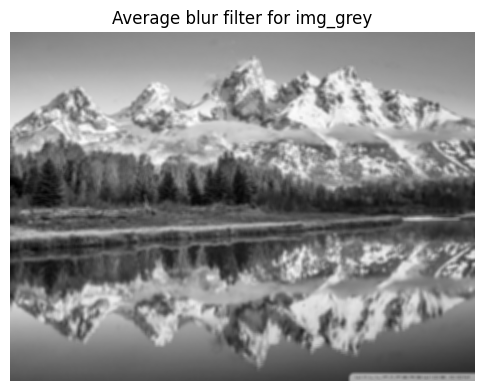

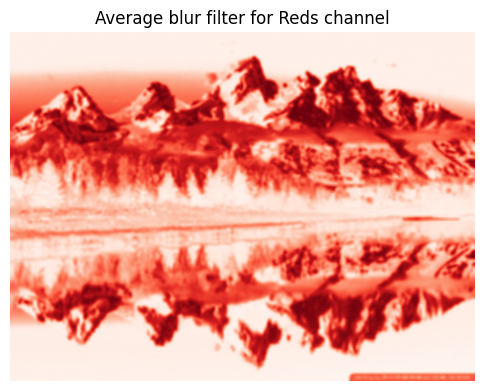

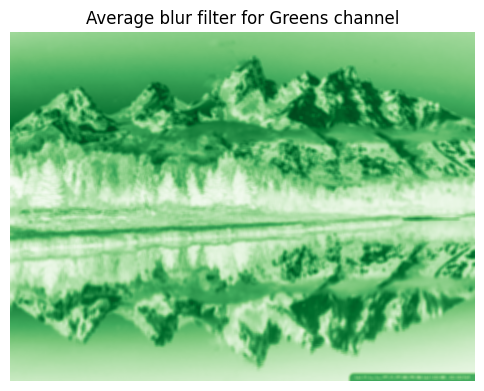

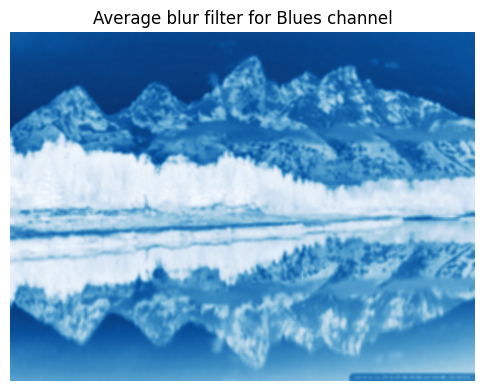

In [240]:
#Task 2
#Average Blur
def average_blur_gray(img, ksize):
  img_h=img.shape[0]
  img_w=img.shape[1]
  k=ksize
  kernel=np.ones((k,k),dtype=int)
  arr2=conv3D(img,kernel)
  return arr2
plt.figure(figsize=(6,6))
plt.imshow(average_blur_gray(img_grey,6),cmap='gray')
plt.axis('off')
plt.title("Average blur filter for img_grey")
plt.show()
array=["Reds","Greens","Blues"]
for i in range(3):
  plt.figure(figsize=(6,6))
  plt.imshow(average_blur_gray(img_rgb[:,:,i],6),cmap=f'{array[i]}')
  plt.title(f"Average blur filter for {array[i]} channel")
  plt.axis("off")

[[0.00086505 0.00692042 0.01384083 0.00692042 0.00086505]
 [0.00692042 0.05536332 0.11072664 0.05536332 0.00692042]
 [0.01384083 0.11072664 0.22145329 0.11072664 0.01384083]
 [0.00692042 0.05536332 0.11072664 0.05536332 0.00692042]
 [0.00086505 0.00692042 0.01384083 0.00692042 0.00086505]]


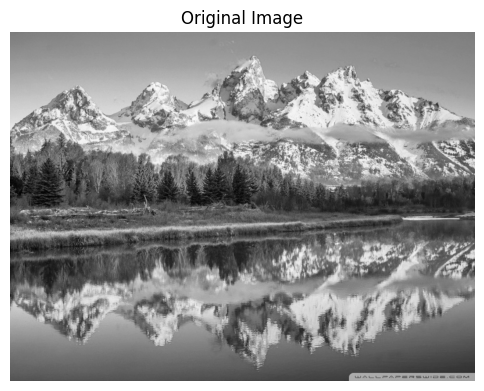

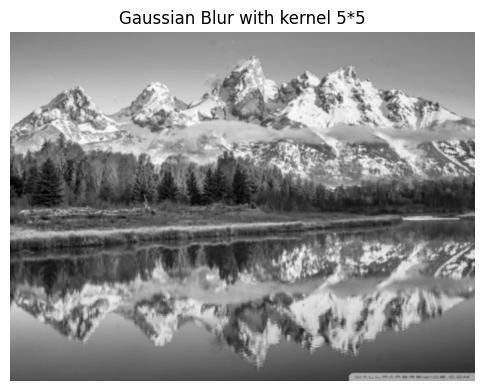

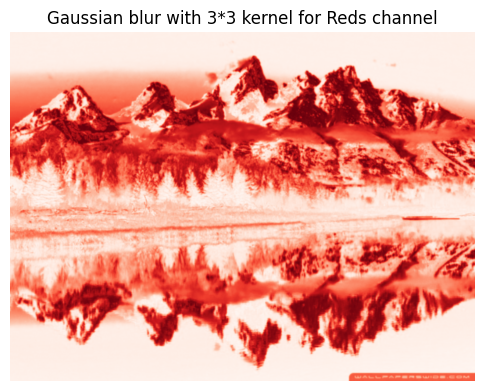

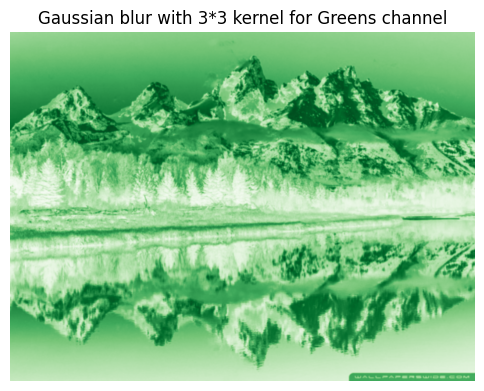

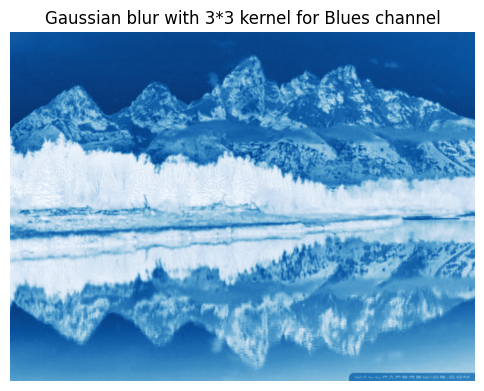

In [241]:
#Task 3
#Gaussian Blur
#sigma=0.8493218(from calculations using the kernel from lecture 3)
import math
def gaussian_kernel(ksize, sigma):
  arr=[]
  for i in range(ksize):
    arr_1=[]
    for j in range(ksize):
      x=np.array([i-ksize//2,j-ksize//2])
      y=np.array([0,0])
      squared_distance = np.linalg.norm(x - y)**2
      s=np.exp(-squared_distance / (2 * (sigma**2)))
      arr_1.append(s)
    arr.append(arr_1)
  arr=np.floor(arr/arr[0][0])
  arr/=np.sum(arr)
  return arr
sigma=math.sqrt(1/(math.log(4)))
print((gaussian_kernel(5,sigma)))
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.axis("off")
plt.imshow(img_grey,cmap='gray')
plt.figure(figsize=(6,6))
plt.title("Gaussian Blur with kernel 5*5")
plt.axis("off")
plt.imshow(conv3D(img_grey,gaussian_kernel(5,sigma)),cmap='gray')
array=["Reds","Greens","Blues"]
for i in range(3):
  plt.figure(figsize=(6,6))
  plt.imshow(conv3D(img_rgb[:,:,i],gaussian_kernel(3,sigma)),cmap=f'{array[i]}')
  plt.title(f"Gaussian blur with 3*3 kernel for {array[i]} channel")
  plt.axis("off")

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [242]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

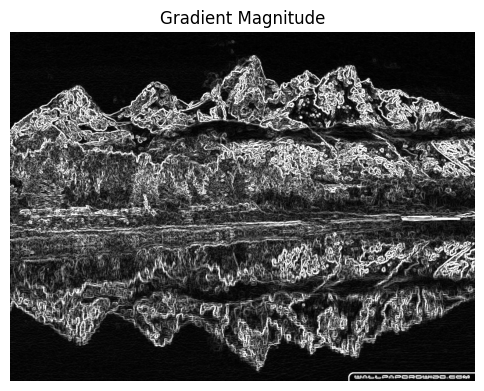

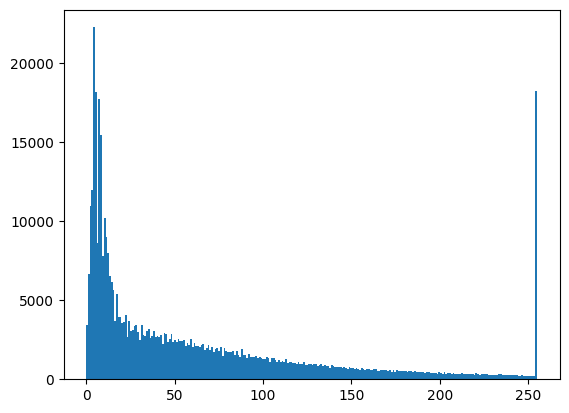

Text(0.5, 1.0, 'Gradient Magnitude with threshold')

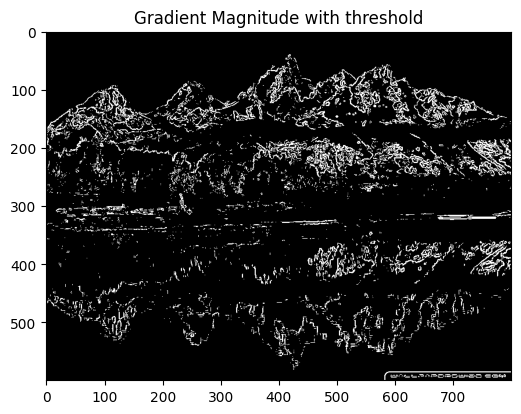

In [243]:
#Gx
def sobel_x(img):
  kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=int)
  arr=conv3D(img,kernel)
  return arr
#Gy
def sobel_y(img):
  kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=int)
  arr=conv3D(img,kernel)
  return arr
#Gradient magnitude
def gradient_magnitude(img):
  arr1=sobel_x(img)
  arr2=sobel_y(img)
  arr3=np.sqrt(np.square(arr1)+np.square(arr2))
  return np.clip(arr3,0,255)
plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude(img_grey),cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")
plt.show()
plt.hist(gradient_magnitude(img_grey).ravel(),bins=256)
plt.show()
threshold=np.where(gradient_magnitude(img_grey)>195,255,0)
plt.figure(figsize=(6,6))
plt.imshow(threshold,cmap='gray')
plt.title("Gradient Magnitude with threshold")

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [244]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

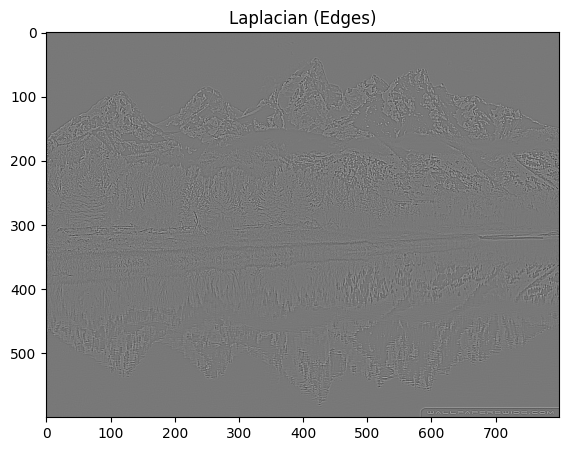

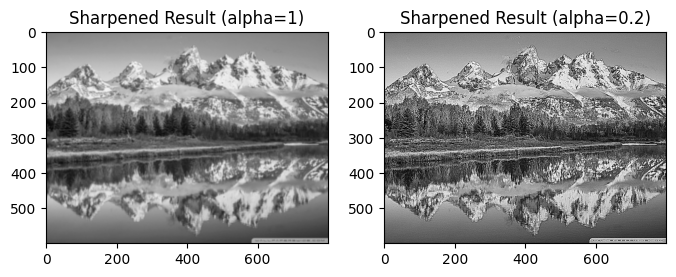

In [245]:
#Task 1
laplacian_kernel=np.array([[1,1,1],[1,-8,1],[1,1,1]],dtype=float)
lap_img=conv3D(img_grey,laplacian_kernel)
img_float = img_grey.astype(float)
lap_img_arr = np.array(lap_img,dtype=float)
sharp_gaussian = img_float - 0.2*lap_img_arr
sharp_gaussian = np.clip(sharp, 0, 255)
sharp_2_gaussian=img_float-lap_img_arr
sharp_2_gaussian=np.clip(sharp_2,0,255)
plt.figure(figsize=(10,5))
plt.title("Laplacian (Edges)")
plt.imshow(lap_img_arr, cmap='gray')
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("Sharpened Result (alpha=1)")
plt.imshow(sharp_2_gaussian.astype(np.uint8), cmap='gray')
plt.subplot(1,2,2)
plt.title("Sharpened Result (alpha=0.2)")
plt.imshow(sharp_gaussian.astype(np.uint8), cmap='gray') # Convert back to uint8 for display
plt.show()


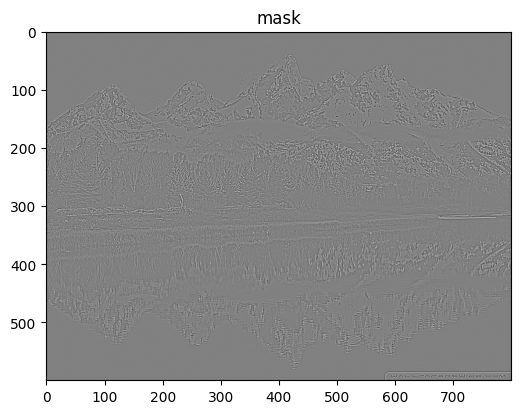

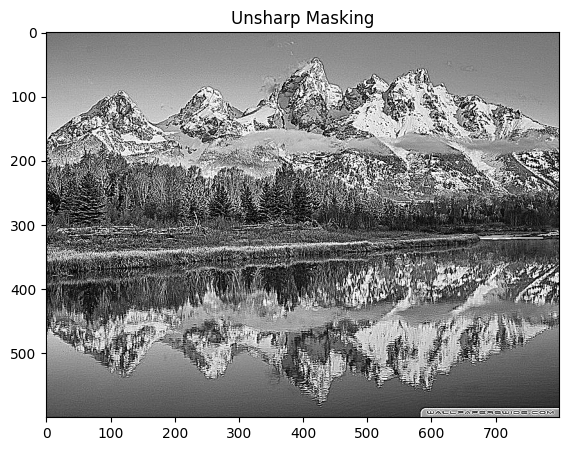

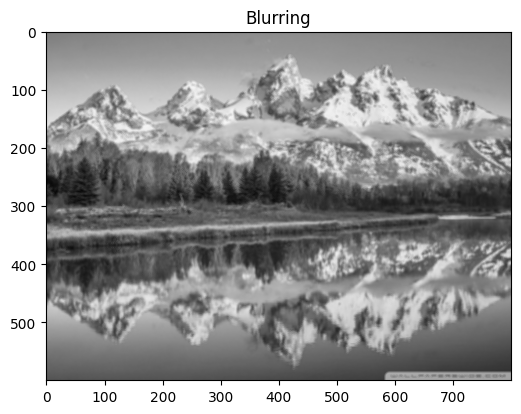

In [246]:
#Task 2
kernel=gaussian_kernel(5,sigma)
blurred = conv3D(img_grey, kernel)
blurred = np.array(blurred)
img_float = img_grey.astype(np.float32)
mask = img_grey - blurred
sharp = img_grey + 10*mask
sharp_2=img_grey-1.75*mask
sharp = np.clip(sharp, 0, 255).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(mask,cmap='grey')
plt.title("mask")
plt.figure(figsize=(10,5))
plt.imshow(sharp, cmap='gray')
plt.title("Unsharp Masking")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(sharp_2,cmap='grey')
plt.title("Blurring")
plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [247]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

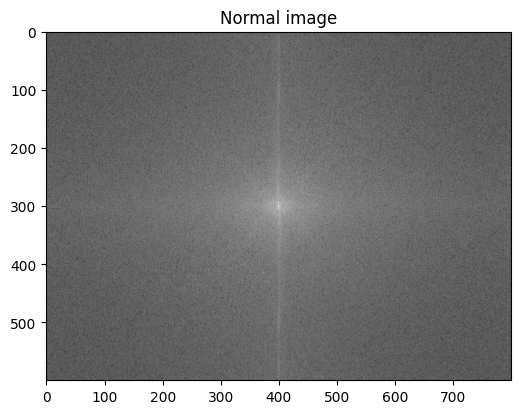

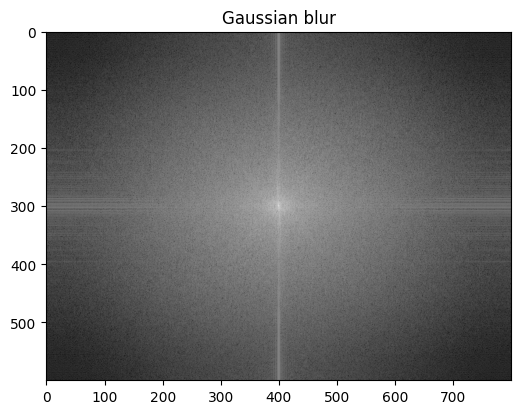

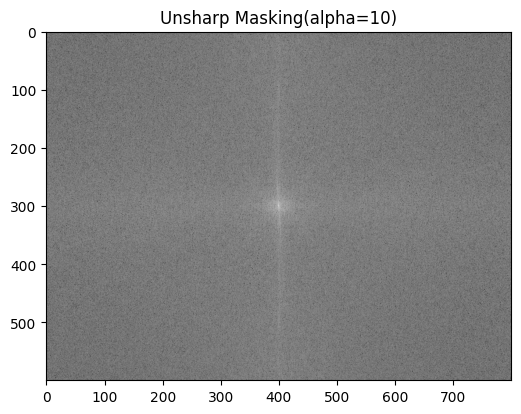

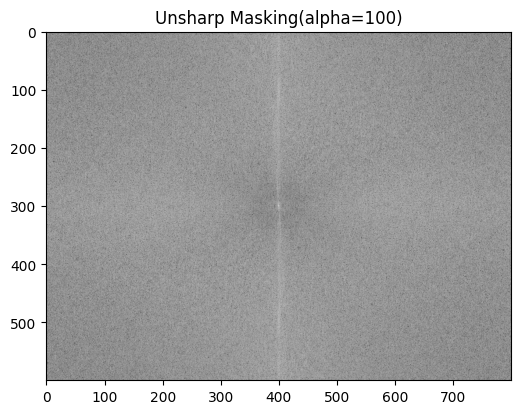

In [248]:
#Magnitude spectrum
def magnitude_spectrum(img):
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
  return magnitude_spectrum
#Original image
mag_img=magnitude_spectrum(img_grey)
#Gaussian image
mag_img_gaussian=magnitude_spectrum(conv3D(img_grey,gaussian_kernel(5,sigma)))
#Unsharp mask image
mag_img_unsharp=magnitude_spectrum(sharp)
sharp_2_5= img_grey + 100*mask
mag_img_unsharp_5=magnitude_spectrum(sharp_2_5)
plt.figure(figsize=(6,6))
plt.title("Normal image")
plt.imshow(mag_img*500000,cmap='grey')
plt.figure(figsize=(6,6))
plt.title("Gaussian blur")
plt.imshow(mag_img_gaussian*100000,cmap='grey')
plt.figure(figsize=(6,6))
plt.title("Unsharp Masking(alpha=10)")
plt.imshow(mag_img_unsharp*500000,cmap='grey')
plt.figure(figsize=(6,6))
plt.title("Unsharp Masking(alpha=100)")
plt.imshow(mag_img_unsharp_5*500000,cmap='grey')
#Clearly gaussian blur's fft image is darker around the edges which indicates high frequencies have been removed
#unsharp masking has boosted the high frequency part of the fft image indicated the edges and fine details are seen more clearly

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

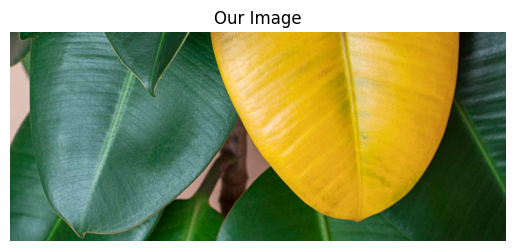

In [249]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [250]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

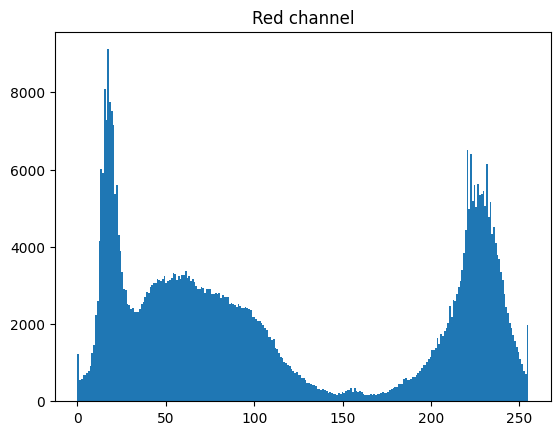

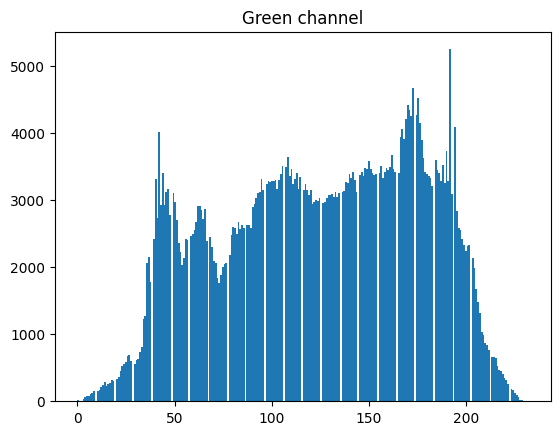

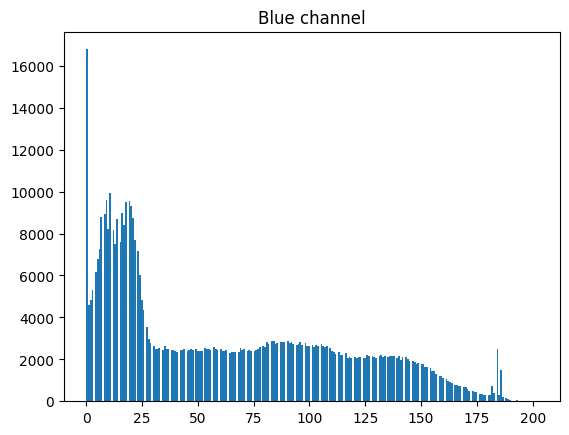

In [253]:
R,G,B=img_part5[:,:,0],img_part5[:,:,1],img_part5[:,:,2]
plt.title("Red channel")
plt.hist(R.ravel(),bins=256)
plt.show()
plt.title("Green channel")
plt.hist(G.ravel(),bins=256)
plt.show()
plt.title("Blue channel")
plt.hist(B.ravel(),bins=256)
plt.show()


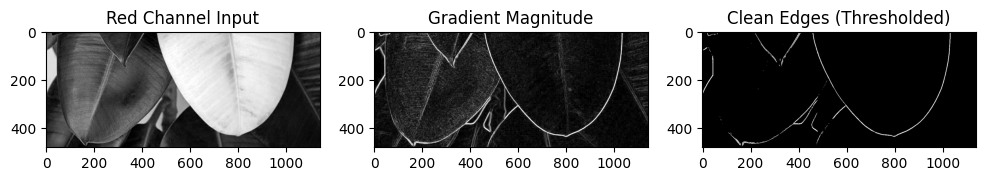

In [263]:
#The Red color is very concentrated in yellow than green so using the red channel to find the mask is effective
import cv2
R,G,B=img_part5[:,:,0],img_part5[:,:,1],img_part5[:,:,2]
R_edge_magnitude=gradient_magnitude(R)
_,binary_edges = cv2.threshold(R_edge_magnitude, 195, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Red Channel Input")
plt.imshow(R, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Gradient Magnitude")
plt.imshow(R_edge_magnitude, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Clean Edges (Thresholded)")
plt.imshow(binary_edges, cmap='gray')
plt.show()
#The other colours also appear due to the yello edges present in other green leaves too


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
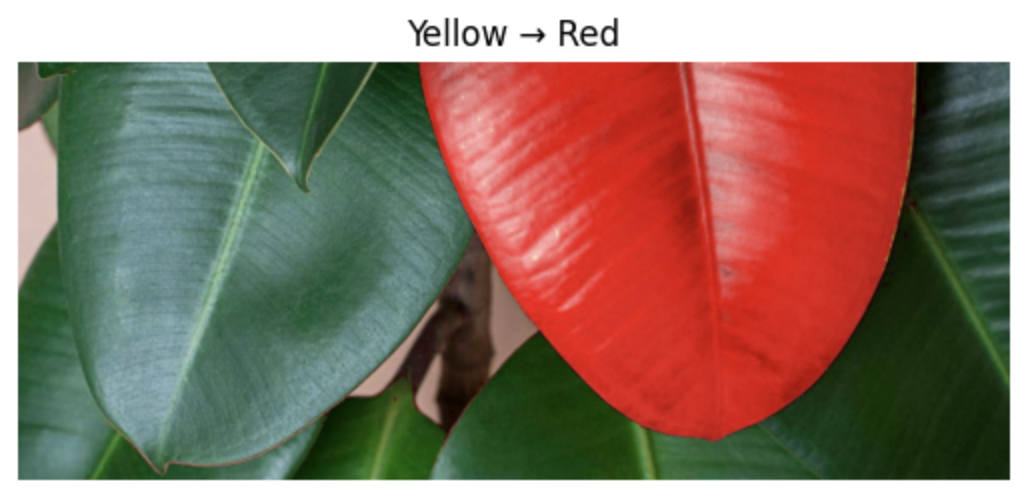

Also, we can change to a less brighter colour
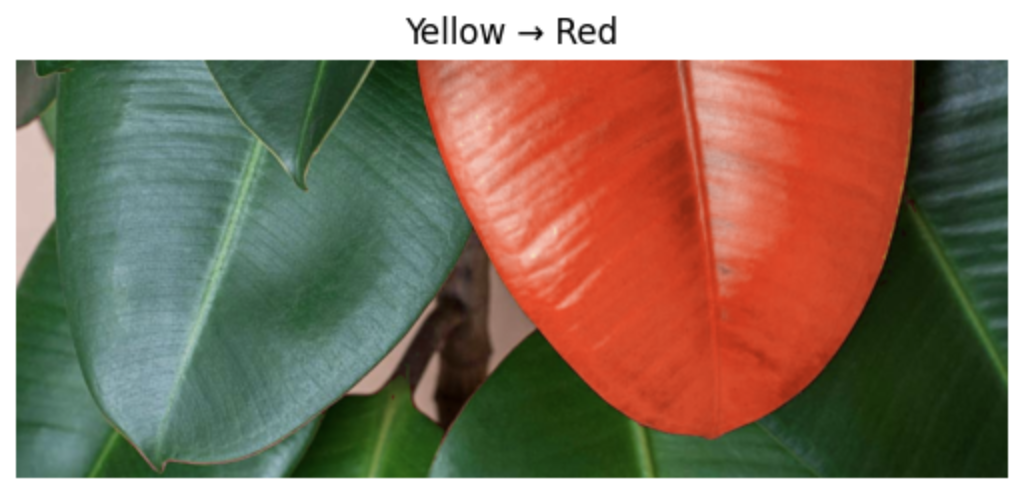

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.